# **Project Name**    -  Credit Card Default Prediction



##### **Project Type**    - Classification 
##### **Contribution**    - Team
##### **Team Member 1 -** Aishwarya Raj
##### **Team Member 2 -** Durgesh Soni
##### **Team Member 3 -** Sanjay Kumareshan
##### **Team Member 4 -** Shashanka Sekhar Nayak
##### **Team Member 5 -** Yash Soni

# **GitHub Link -**

https://github.com/yashsoni294/Credit_Card_Default_Prediction_Capstone_Classification_Project

# **Problem Statement**


Instances of credit/debit card fraud have surged considerably, with a staggering 52,304 cases reported during FY'19 alone. This alarming rise in banking fraud necessitates the prompt detection of such illicit transactions in order to protect both consumers and financial institutions. Each fraudulent credit card transaction is a direct financial liability for the bank, as they are liable for these illicit transactions. Moreover, such fraudulent activities can also have an adverse impact on overall customer satisfaction.

**The aim of this project is to identify and predict fraudulent credit card transactions using machine learning models.**

# **Data Understanding :**

**Data Source**: https://www.kaggle.com/mlg-ulb/creditcardfraud

The project's data set was obtained from Kaggle and contains data on credit card transactions made by European cardholders over a 48-hour period in September 2013. The data set consists of 284,807 transactions, out of which only 492 were fraudulent. This means that the data set is imbalanced, with the occurrence of fraudulent transactions being a mere 0.172% of the total transactions. The data set was processed with Principal Component Analysis (PCA) to maintain confidentiality, resulting in the 'V1' to 'V28' features being the principal components. The 'time' feature indicates the time elapsed in seconds between the first transaction and the subsequent ones, while the 'amount' feature refers to the transaction amount. The 'class' feature represents the classification of the transactions, with '1' indicating fraudulent and '0' indicating non-fraudulent transactions. 

The distribution plots for the data set variables showed a Gaussian distribution, indicating that the data might have undergone prior transformations.

In [1]:
# Importing Used python libraries :

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import roc_auc_score 

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.5 MB/s eta 0:00:00


# EDA and Data Preparation

In [2]:
#To read csv File from locally stored file
df_credit = pd.read_csv('/content/creditcard.csv')
df_credit.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [ ]:
# Examining the shape of dataset imported:
df_credit.shape

(284807, 31)

In [ ]:
# Lets check the numeric distribution of the data:
df_credit.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ... -3.405756e-13 -5.723197e-13 -9.725856e-13  1.464150e-12   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean  -6.987102e-13 -5.617874e-13  3.332082e-12 -3.518874e-12      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [ ]:
# Examining the data frame for the shape, datatypes, NUlls etc
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Checking the fraud/Non_Fraud related records
df_credit['Class'].value_counts() # The target variable is very unbiased

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# finding % values of class
(df_credit.groupby('Class')['Class'].count()/df_credit['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [ ]:
# checking if any null values
df_credit.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [3]:
df_credit.dropna(inplace = True) # Droping the null values 
df_credit.isnull().sum() # checking for the null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df_credit.head(2)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 31 columns]

In [ ]:
#observe the different feature type present in the data
#lets check data types of the features
df_credit.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# correlation matrix of the dataframe
corr = df_credit.corr()
corr

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  3.777823e-12 -2.118614e-12 -1.733159e-13   
V2     -0.010593  3.777823e-12  1.000000e+00  2.325661e-12 -2.314981e-12   
V3     -0.419618 -2.118614e-12  2.325661e-12  1.000000e+00  2.046235e-13   
V4     -0.105260 -1.733159e-13 -2.314981e-12  2.046235e-13  1.000000e+00   
V5      0.173072 -3.473231e-12 -1.831952e-12 -4.032993e-12 -2.552389e-13   
V6     -0.063016 -1.306165e-13  9.438444e-13 -1.574471e-13  1.084041e-12   
V7      0.084714 -1.116494e-13  5.403436e-12  3.405586e-12  8.135064e-13   
V8     -0.036949  2.114527e-12  2.133785e-14 -1.272385e-12  7.334818e-13   
V9     -0.008660  3.016285e-14  3.238513e-13 -6.812351e-13 -7.143069e-13   
V10     0.030617 -2.615192e-12  1.463282e-12 -1.609126e-12 -1.938143e-12   
V11    -0.247689  1.866551e-12 -8.314960e-13  8.707055e-13  1.874473e-12   
V12     0.124348 -1.238745e-12  6.139448e-13 -2.730043e-12  5.393827e-13   
V13    -0.065902  7.589589e-13 -1.181068e-12 -1.020592e-12  6.813810e-13   
V14    -0.098757 -1.871054e-13 -3.384684e-13 -5.597874e-13 -1.404120e-12   
V15    -0.183453 -3.601390e-13  2.196083e-13  6.442512e-13  1.526382e-12   
V16     0.011903 -1.142884e-12 -8.000510e-13 -8.748795e-13  3.095722e-13   
V17    -0.073297  1.671073e-12  2.028957e-12 -1.058101e-12  1.151414e-14   
V18     0.090438 -5.738830e-13 -1.916566e-14 -8.846578e-13 -1.309615e-12   
V19     0.028975 -2.770259e-12 -2.237098e-13 -1.061131e-12 -9.754131e-13   
V20    -0.050866  2.662926e-13  5.839893e-13  1.873059e-12 -2.347029e-12   
V21     0.044736 -3.276238e-12  2.280202e-12  6.736294e-13 -2.696370e-12   
V22     0.144059  2.281863e-12 -2.548560e-13 -8.909339e-13  4.347776e-13   
V23     0.051142 -2.969746e-12 -4.856120e-12  4.147209e-12 -4.160969e-12   
V24    -0.016182 -1.029876e-12  6.431308e-13  3.407636e-12 -2.368743e-12   
V25    -0.233083  1.144179e-12 -9.423730e-13  5.712956e-13  1.619944e-12   
V26    -0.041407  1.835263e-12 -4.129100e-13 -2.577274e-12 -3.043100e-13   
V27    -0.005135  7.624804e-12 -9.856545e-13 -5.041444e-12 -1.456066e-12   
V28    -0.009413 -9.769215e-13  2.525513e-12  5.189109e-12 -2.832372e-12   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1     -3.473231e-12 -1.306165e-13 -1.116494e-13  2.114527e-12  3.016285e-14   
V2     -1.831952e-12  9.438444e-13  5.403436e-12  2.133785e-14  3.238513e-13   
V3     -4.032993e-12 -1.574471e-13  3.405586e-12 -1.272385e-12 -6.812351e-13   
V4     -2.552389e-13  1.084041e-12  8.135064e-13  7.334818e-13 -7.143069e-13   
V5      1.000000e+00 -6.934789e-14  1.573956e-11 -2.038243e-12 -1.000756e-12   
V6     -6.934789e-14  1.000000e+00 -2.798968e-12 -5.446480e-13  2.036743e-12   
V7      1.573956e-11 -2.798968e-12  1.000000e+00  5.528803e-12  5.088082e-13   
V8     -2.038243e-12 -5.446480e-13  5.528803e-12  1.000000e+00 -2.243172e-12   
V9     -1.000756e-12  2.036743e-12  5.088082e-13 -2.243172e-12  1.000000e+00   
V10    -7.200329e-13  7.429770e-13  1.674650e-12 -1.660630e-12  1.185391e-12   
V11    -5.928181e-13  1.014893e-12 -8.525291e-13  1.296877e-12 -3.970652e-13   
V12     1.812994e-12 -9.265590e-13 -2.826770e-13 -3.860109e-13 -1.904908e-12   
V13    -7.021996e-14  1.484679e-12 -8.171731e-13  7.722897e-13  8.754859e-13   
V14    -1.113015e-13 -1.212766e-12  2.038217e-12 -2.596182e-12 -1.271311e-12   
V15    -1.593594e-12 -1.053548e-12  1.074440e-12  1.648898e-12  8.628709e-13   
V16    -1.619090e-14  1.374197e-12 -1.478776e-12 -1.830899e-12  1.239835e-12   
V17     1.713794e-13  7.431528e-13 -1.231314e-12  7.025405e-13 -1.450585e-12   
V18     1.101433e-12  6.859871e-13 -4.281952e-13  1.499555e

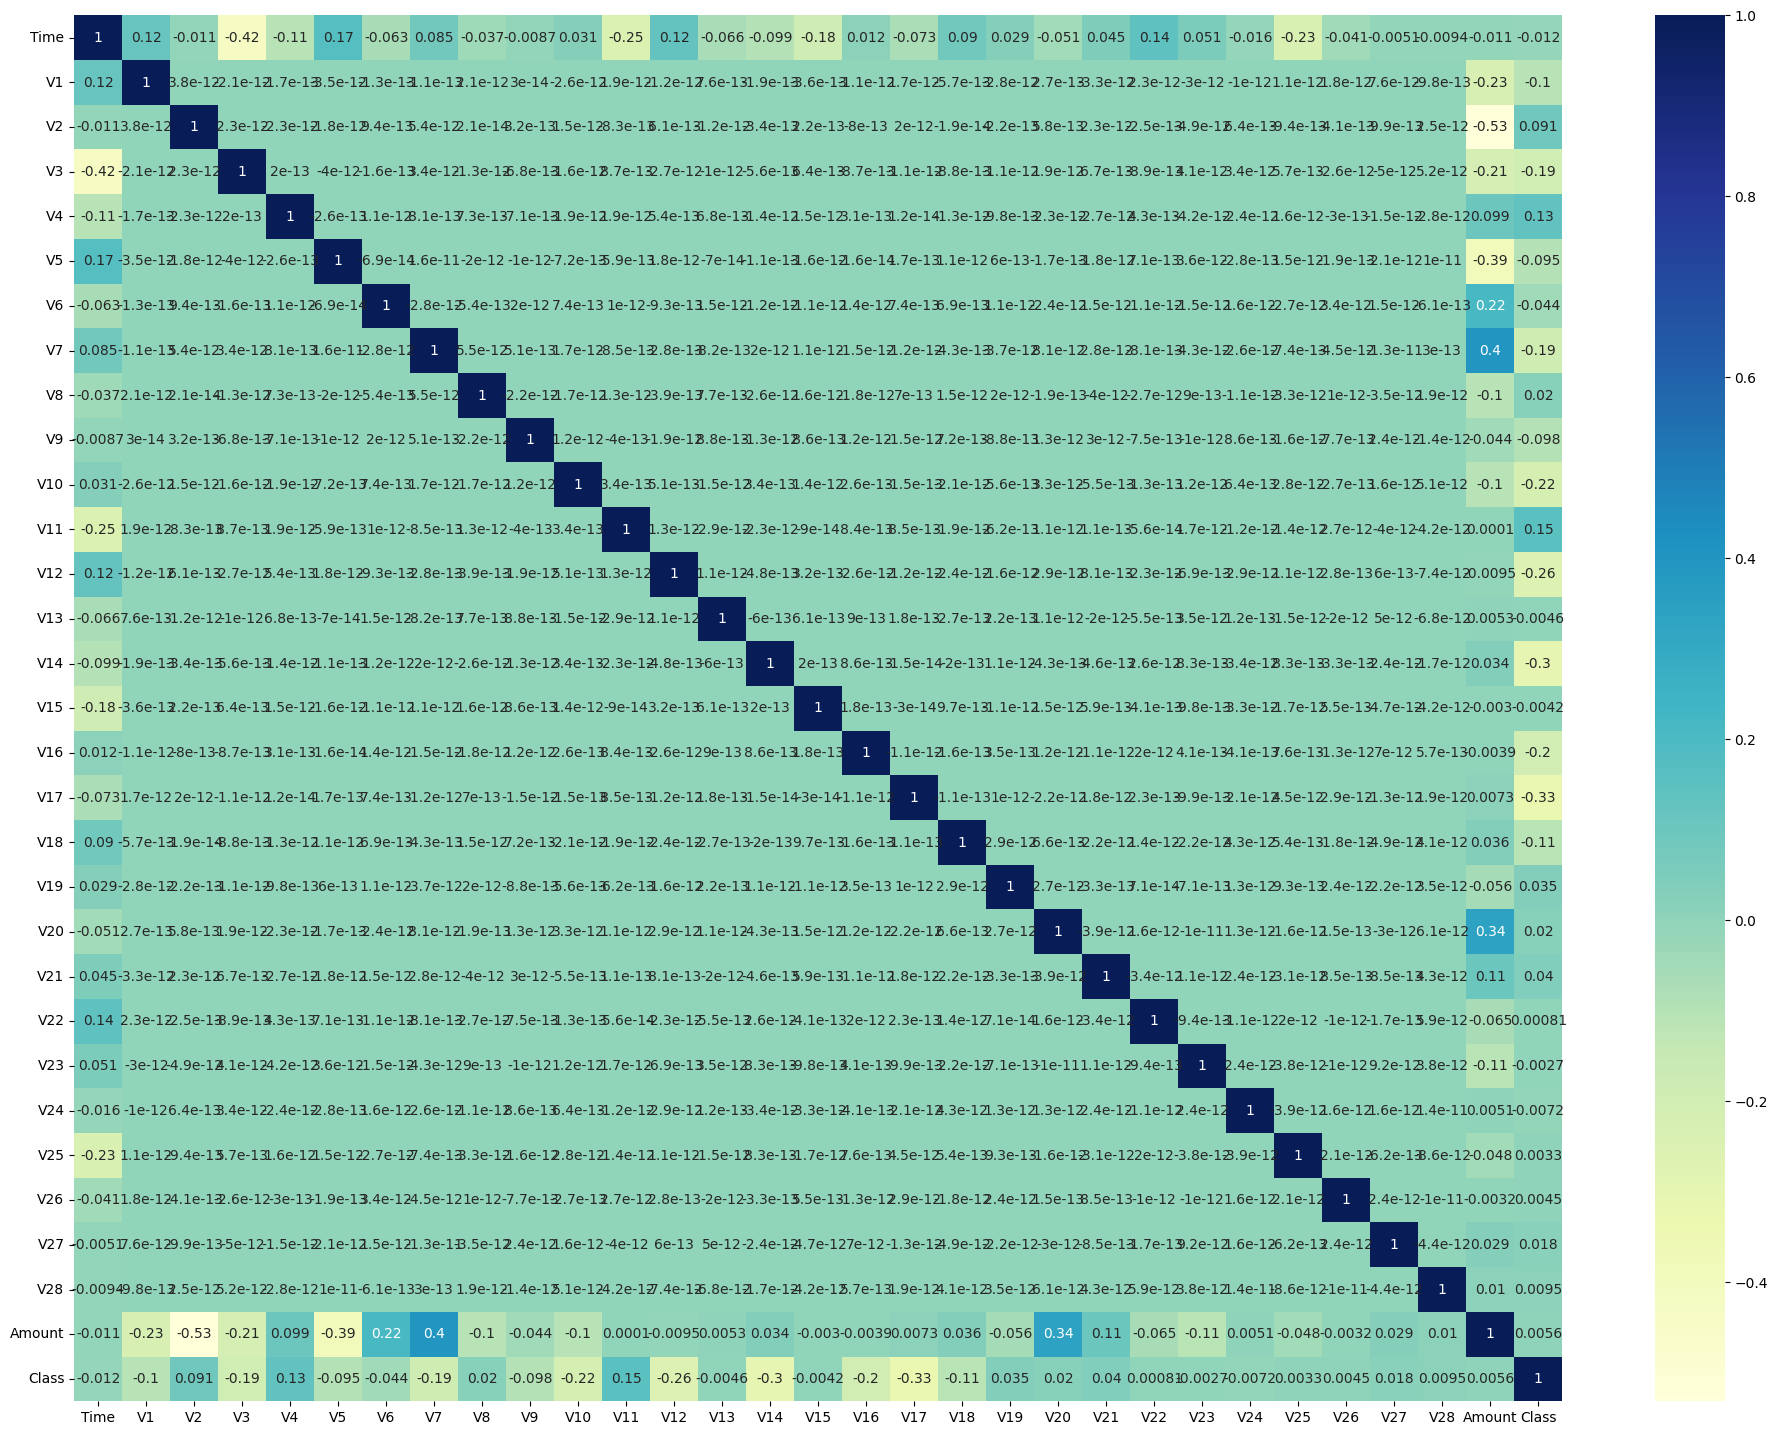

In [ ]:
# plotting correlations on a heatmap

# setting the figure size
plt.figure(figsize=(24,18))

# heatmap using Seaborn 
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

Here we will observe the distribution of our classes

In [ ]:
classes=df_credit['Class'].value_counts()
normal_share=classes[0]/df_credit['Class'].count()*100 # % of normal share
fraud_share=classes[1]/df_credit['Class'].count()*100 # % of fraude share

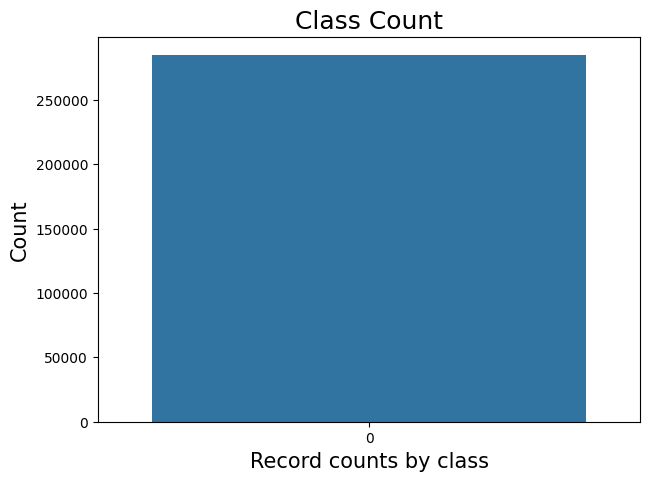

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(7,5)) # setting the figure size
# sns.countplot(df_credit['Class'])
sns.countplot(data = df_credit['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

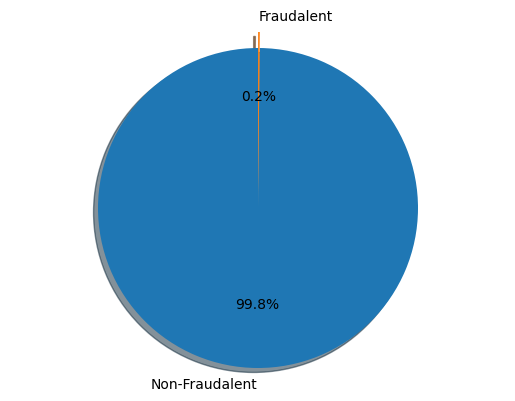

In [ ]:
# Dsitribution of the Fraudalent vs Non-fraudalent transaction in Percentages On Pie chart 
classes=df_credit['Class'].value_counts()
normal_share=classes[0]/df_credit['Class'].count()*100
fraud_share=classes[1]/df_credit['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
print('The percentage Non-Fraudalent Transaction is ', round(df_credit['Class'].value_counts()[0]/len(df_credit) * 100,2), '% of the dataset')
print('The percentage Fraudalent Transaction is ', round(df_credit['Class'].value_counts()[1]/len(df_credit) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df_credit['Class'].value_counts()[1]/df_credit['Class'].value_counts()[0] * 100,2))

The percentage Non-Fraudalent Transaction is  99.83 % of the dataset
The percentage Fraudalent Transaction is  0.17 % of the dataset
The ratio of imbalance is 0.17


In [ ]:
df_credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**We have 492 fraudalent transactions out of 284315 total credit card transactions.**

The distribution of the target variable indicates that our problem is highly imbalanced, with a significantly larger number of genuine transactions compared to fraudulent transactions. As a result, if we simply predict the majority class, which is genuine transactions, our model would achieve a high accuracy but would not perform well in identifying fraudulent transactions. To address this issue, we need to use alternative evaluation metrics, such as ROC-AUC, precision, and recall, that are not affected by imbalanced data and provide a more accurate representation of our model's performance.

In [4]:
# Create a scatter plot to observe the distribution of classes with time
#As time is given in relative fashion, we will need to use pandas.Timedelta which Represents a duration, the difference between two dates or times.

Delta_Time = pd.to_timedelta(df_credit['Time'], unit='s')
#Create derived columns Mins and hours
df_credit['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df_credit['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df_credit['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

Text(0.5, 1.05, 'Time vs Class Distribution')

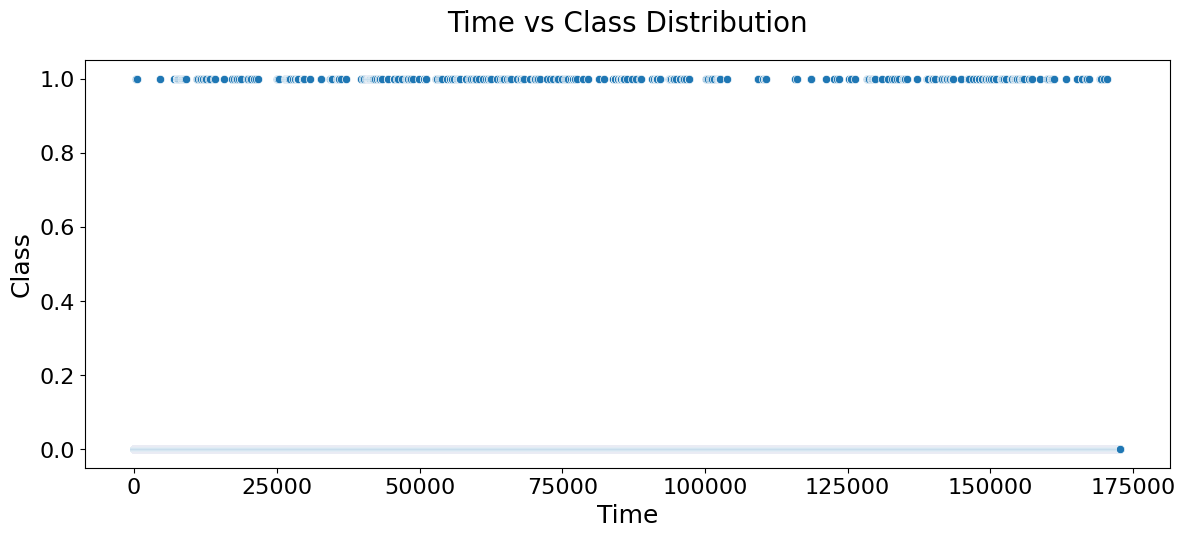

In [ ]:
# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with time

fig = plt.figure(figsize=(14, 18)) #setting the figure size
cmap = sns.color_palette('Set2')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot( x = df_credit['Time'], y='Class', palette=cmap, data = df_credit )
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)

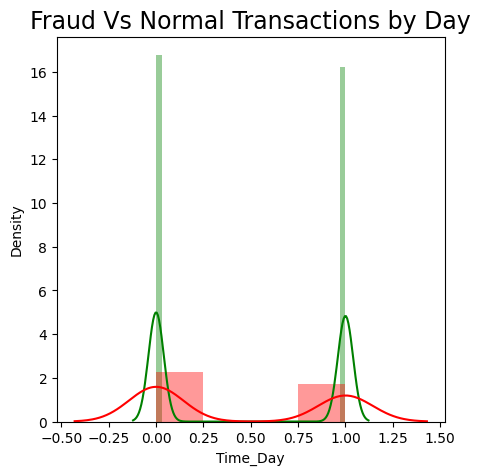

In [ ]:
# The fraus Vs normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df_credit[df_credit['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df_credit[df_credit['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

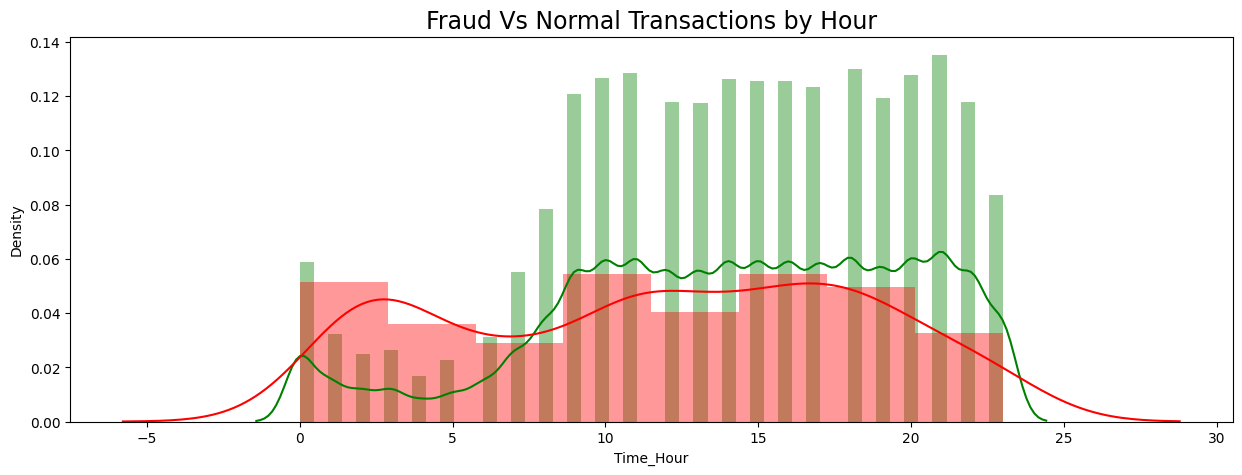

In [ ]:
# The fraus Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df_credit[df_credit['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df_credit[df_credit['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

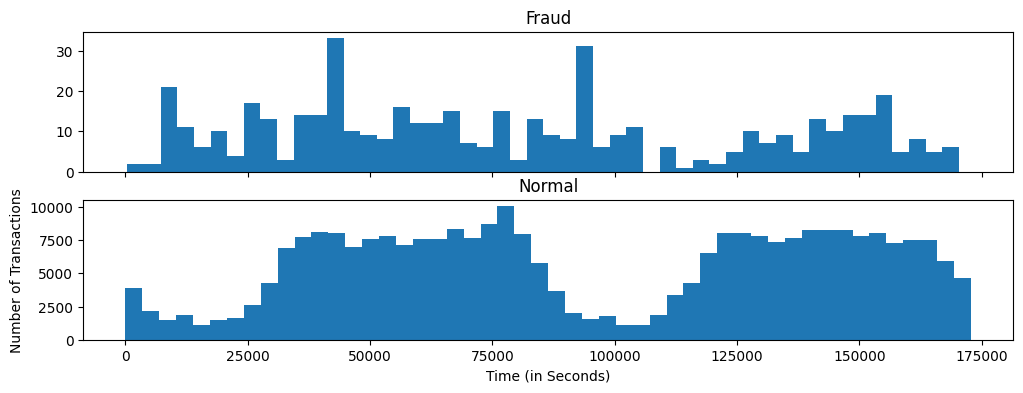

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df_credit.Time[df_credit.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df_credit.Time[df_credit.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [5]:
# Create a scatter plot to observe the distribution of classes with Amount
#To clearly the data of frauds and no frauds
df_Fraud = df_credit[df_credit['Class'] == 1]
df_Regular = df_credit[df_credit['Class'] == 0]

# Fraud Transaction Amount Statistics
print(df_Fraud["Amount"].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [ ]:
#Regular Transaction Amount Statistics
print(df_Regular["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.05, 'Amount vs Class Distribution')

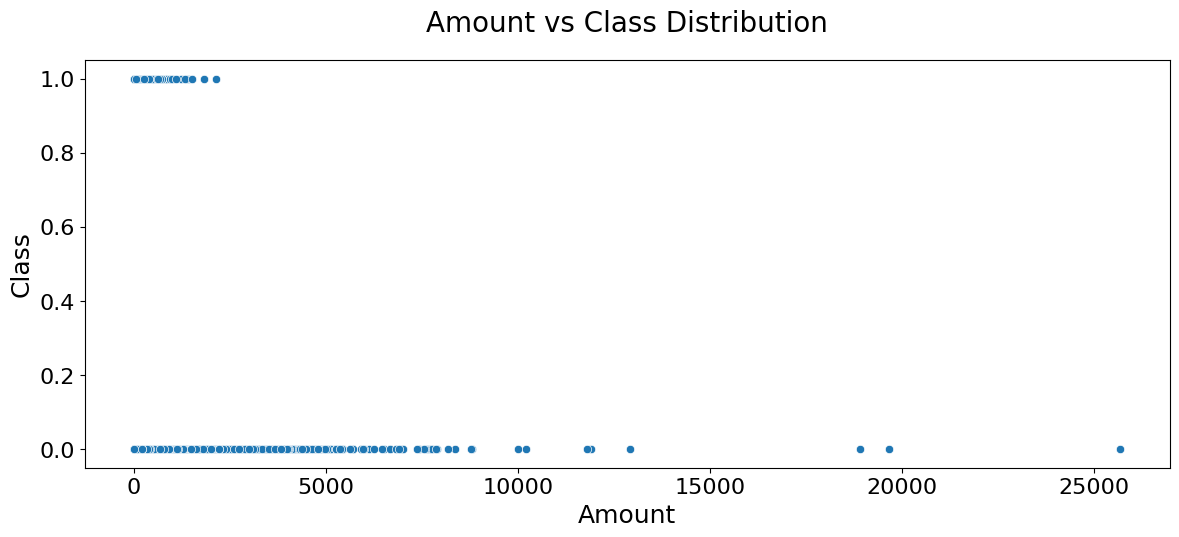

In [ ]:
# Creating a scatter plot to observe the distribution of classes with Amount

# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with Amount


fig = plt.figure(figsize=(14, 18)) # Setting the figure size of the plot
cmap = sns.color_palette('Set1')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df_credit['Amount'], y='Class', palette=cmap, data=df_credit)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)

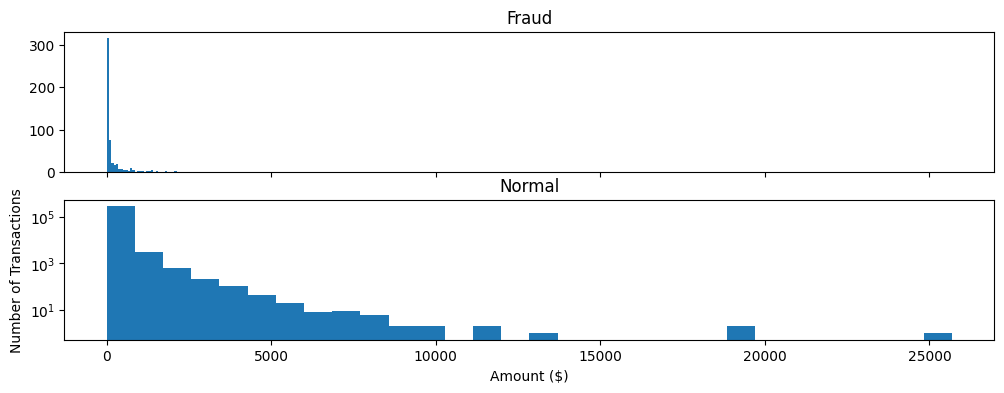

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

# ax1.hist(df_credit.Amount[df_credit.Class == 1], bins = bins)
ax1.hist(df_credit["Amount"][df_credit["Class"] == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df_credit.Amount[df_credit.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [ ]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df_credit.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


Correlation
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413

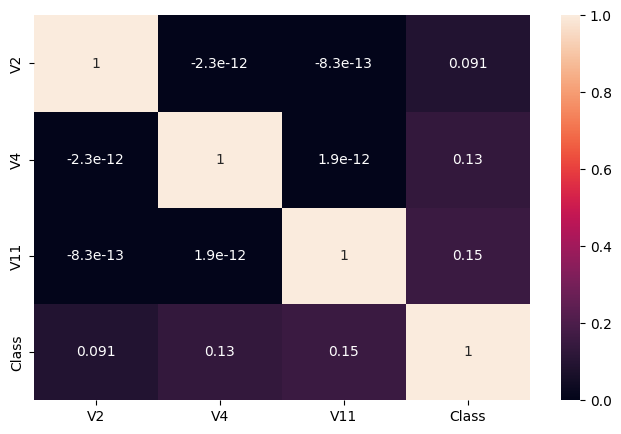

In [ ]:
# Ploting the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature = corr.index[abs(corr['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df_credit[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

**Plotting the distribution of the Variable**

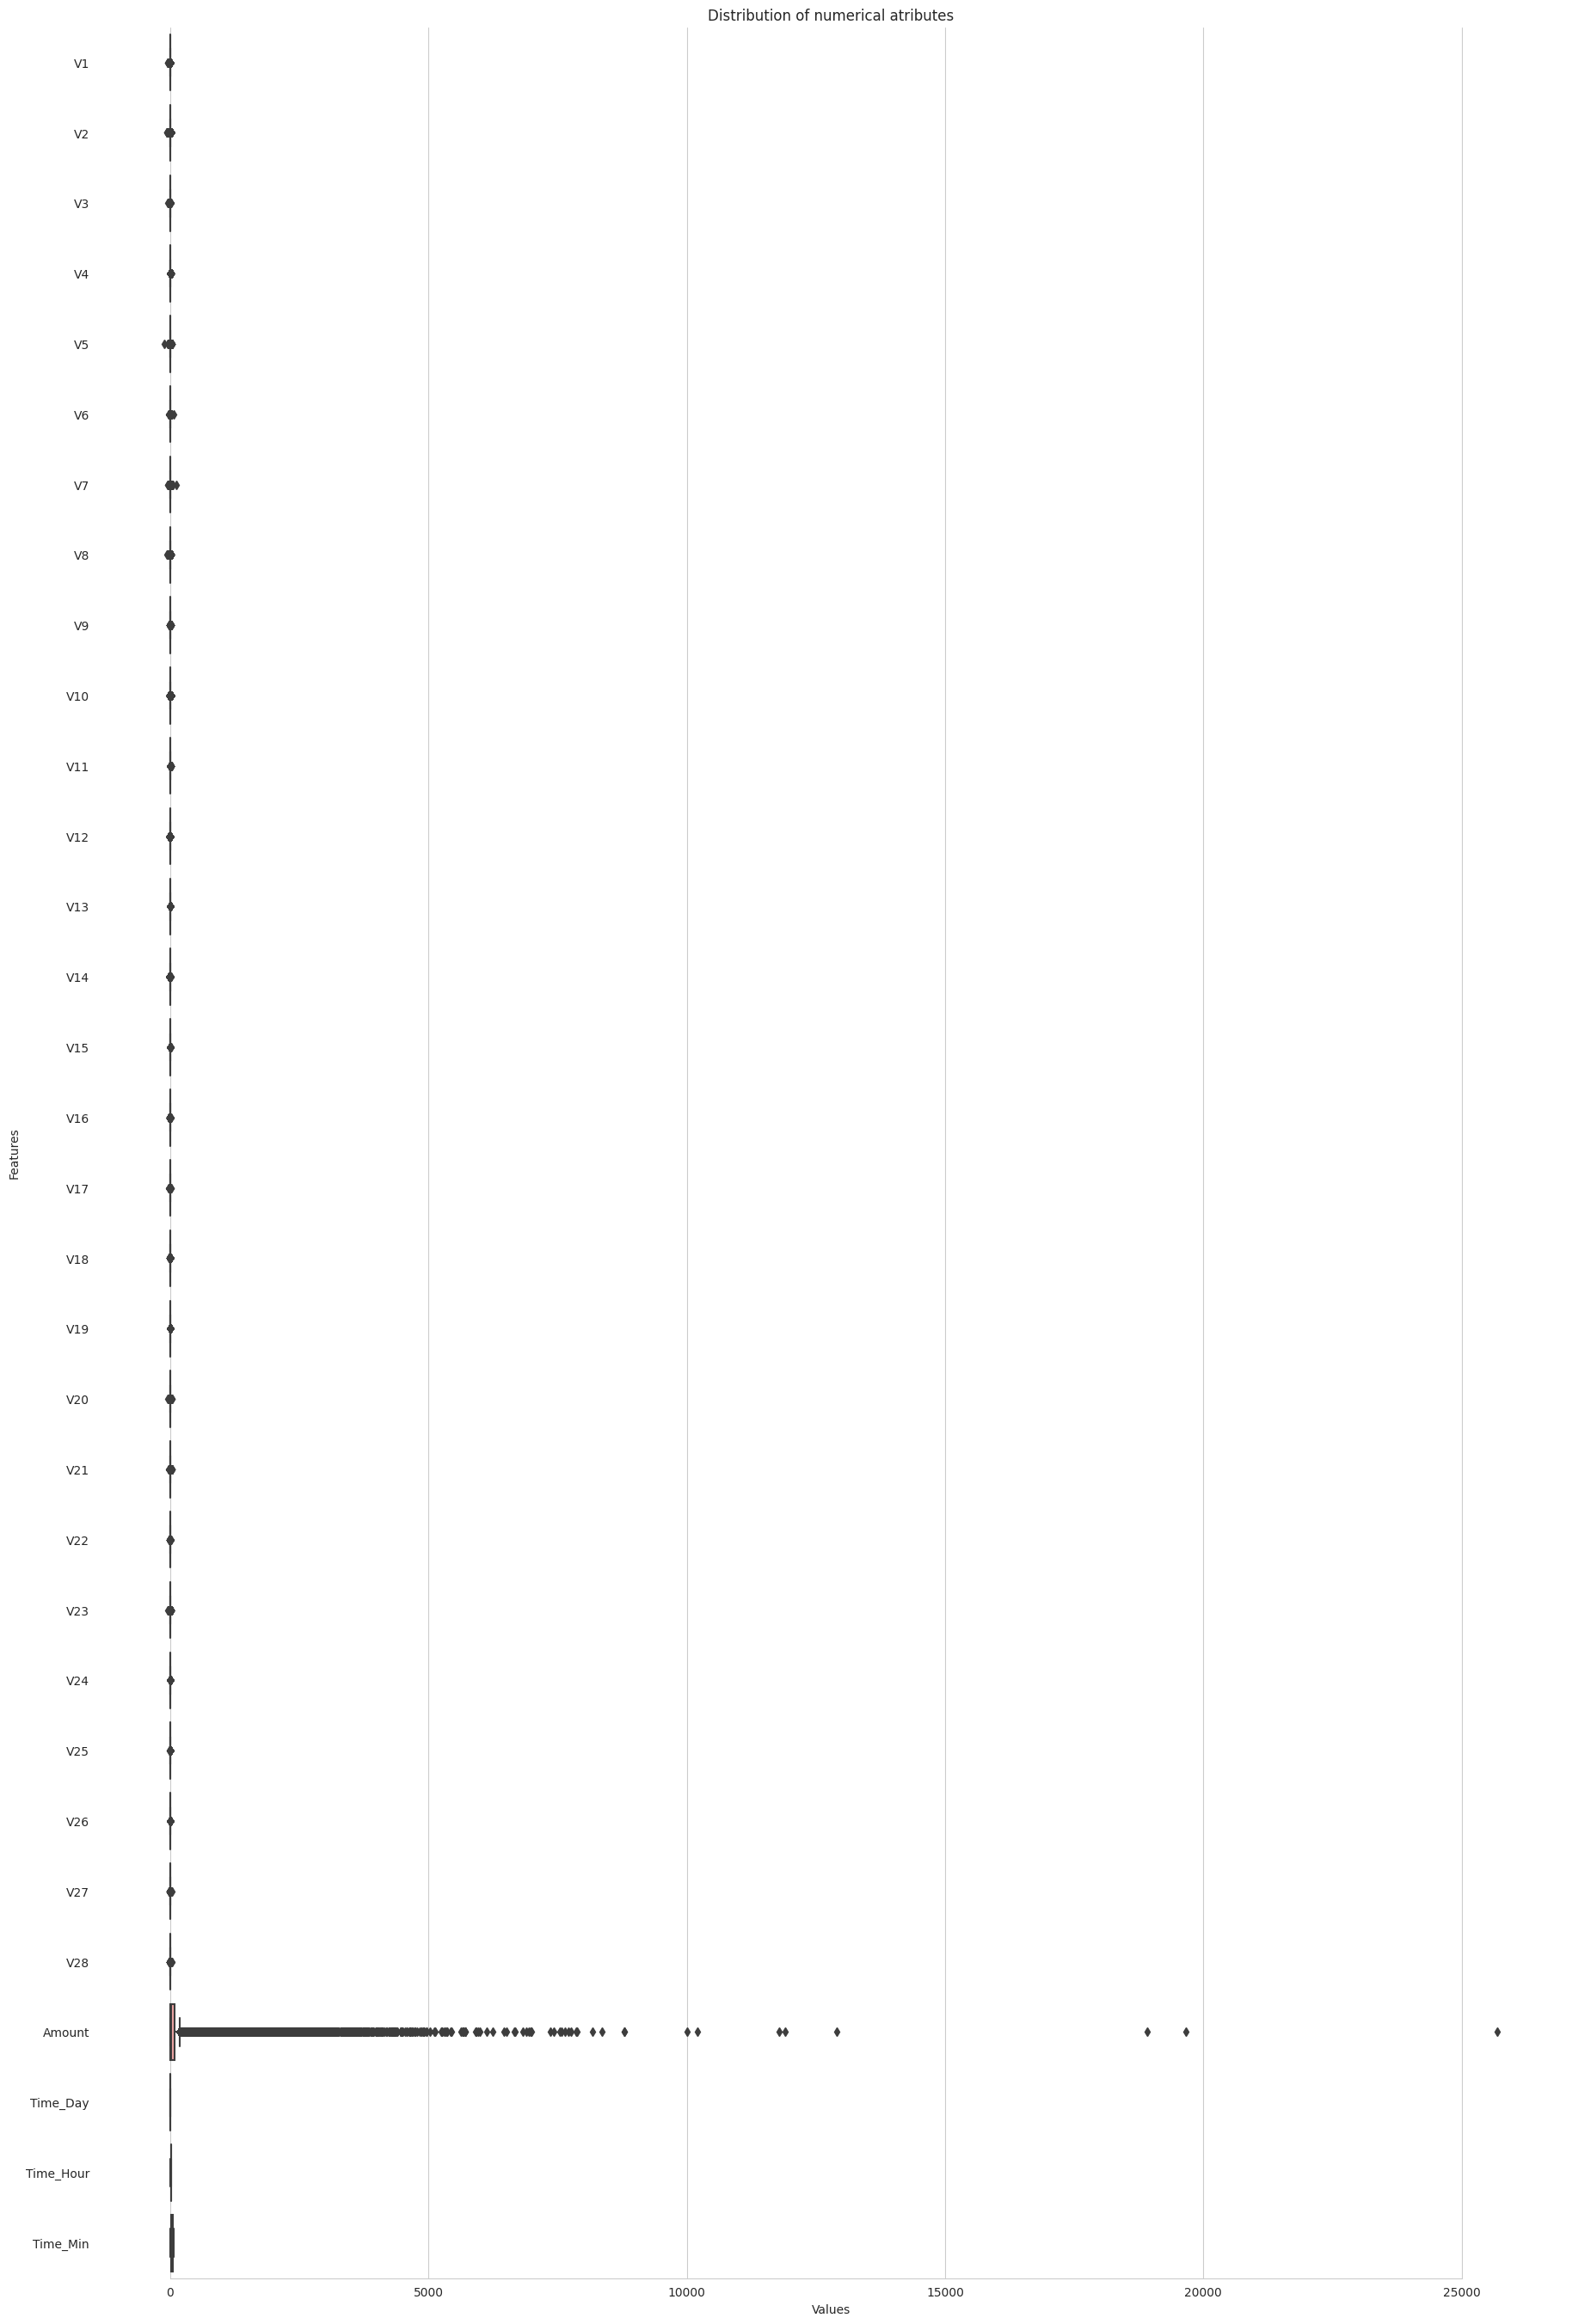

In [ ]:
# Boxplot to understand the distribution of numerical attributes :

# Selecting only numerical feature from the dataframe:
numeric_features = df_credit.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation : 
li_not_plot = ['Class','Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(22,34)) # setting the figure size
# Using log scale:
#ax.set_xscale("log")
ax = sns.boxplot(data=df_credit[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

In [6]:
# Droping the  unnecessary columns
# As we have derived the Day/Hour/Minutes from the time column we will drop Time
df_credit.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
df_credit.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

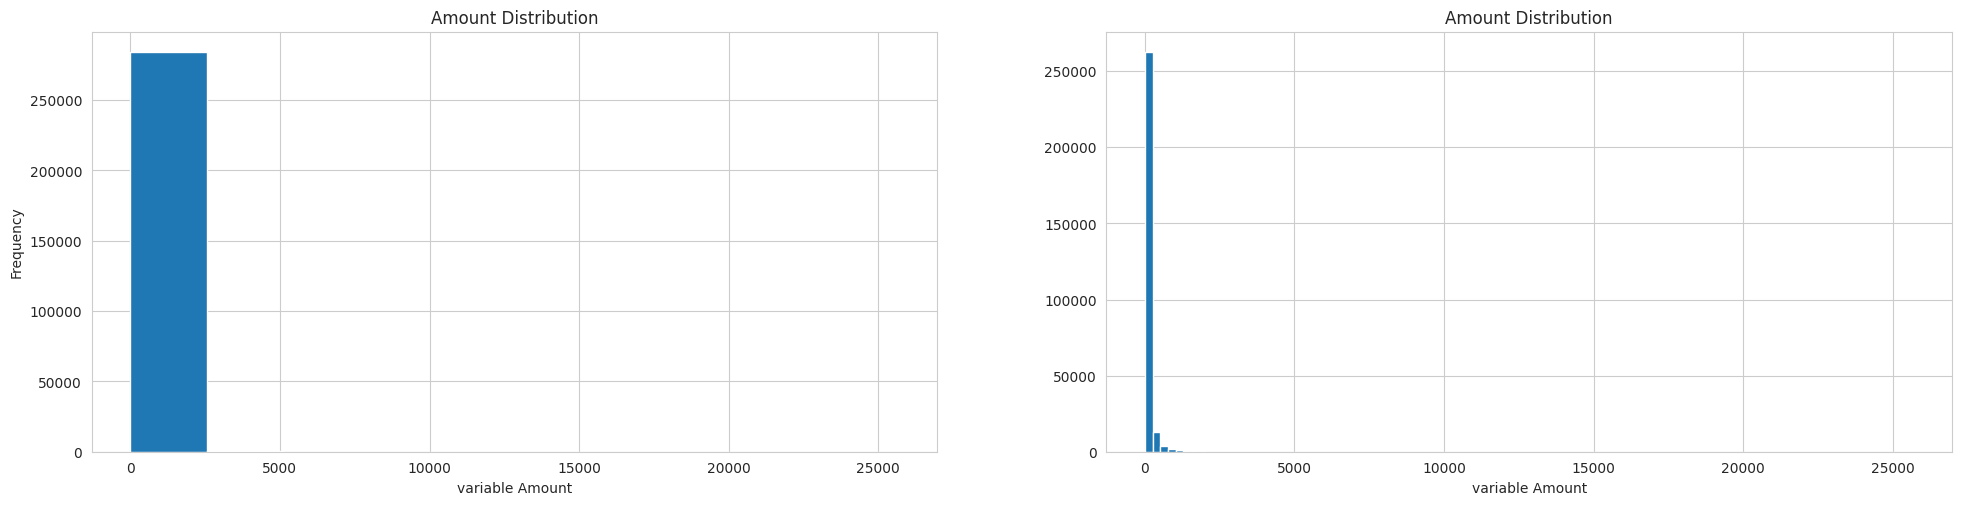

In [ ]:
# Understanding the Amount variable as it is not PCA transformed variable :

plt.figure(figsize=(24, 12)) # Setting the plot size

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df_credit['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df_credit['Amount'],bins=100)
plt.show()

**Splitting the data into train & test data**

In [7]:
# Create X and y dataset for independent and dependent data
y= df_credit['Class']
X = df_credit.drop(['Class'], axis=1)

In [ ]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Time_Hour  
0  0.128539 -0.189115  0.133558 -0.021053  149.62          0  
1  0.167170  0.125895 -0.008983  0.014724    2.69          0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66          0  
3  0.647376 -0.221929  0.062723  0.061458  123.50          0  
4 -0.206010  0.502292  0.219422  0.215153   69.99          0  

[5 rows x 30 columns]

In [8]:
from sklearn import model_selection # for train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

Preserve X_test & y_test to evaluate on the test data once you build the model


In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


Plotting the distribution of a variable

In [9]:
cols = list(X.columns.values)

In [ ]:
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hour']

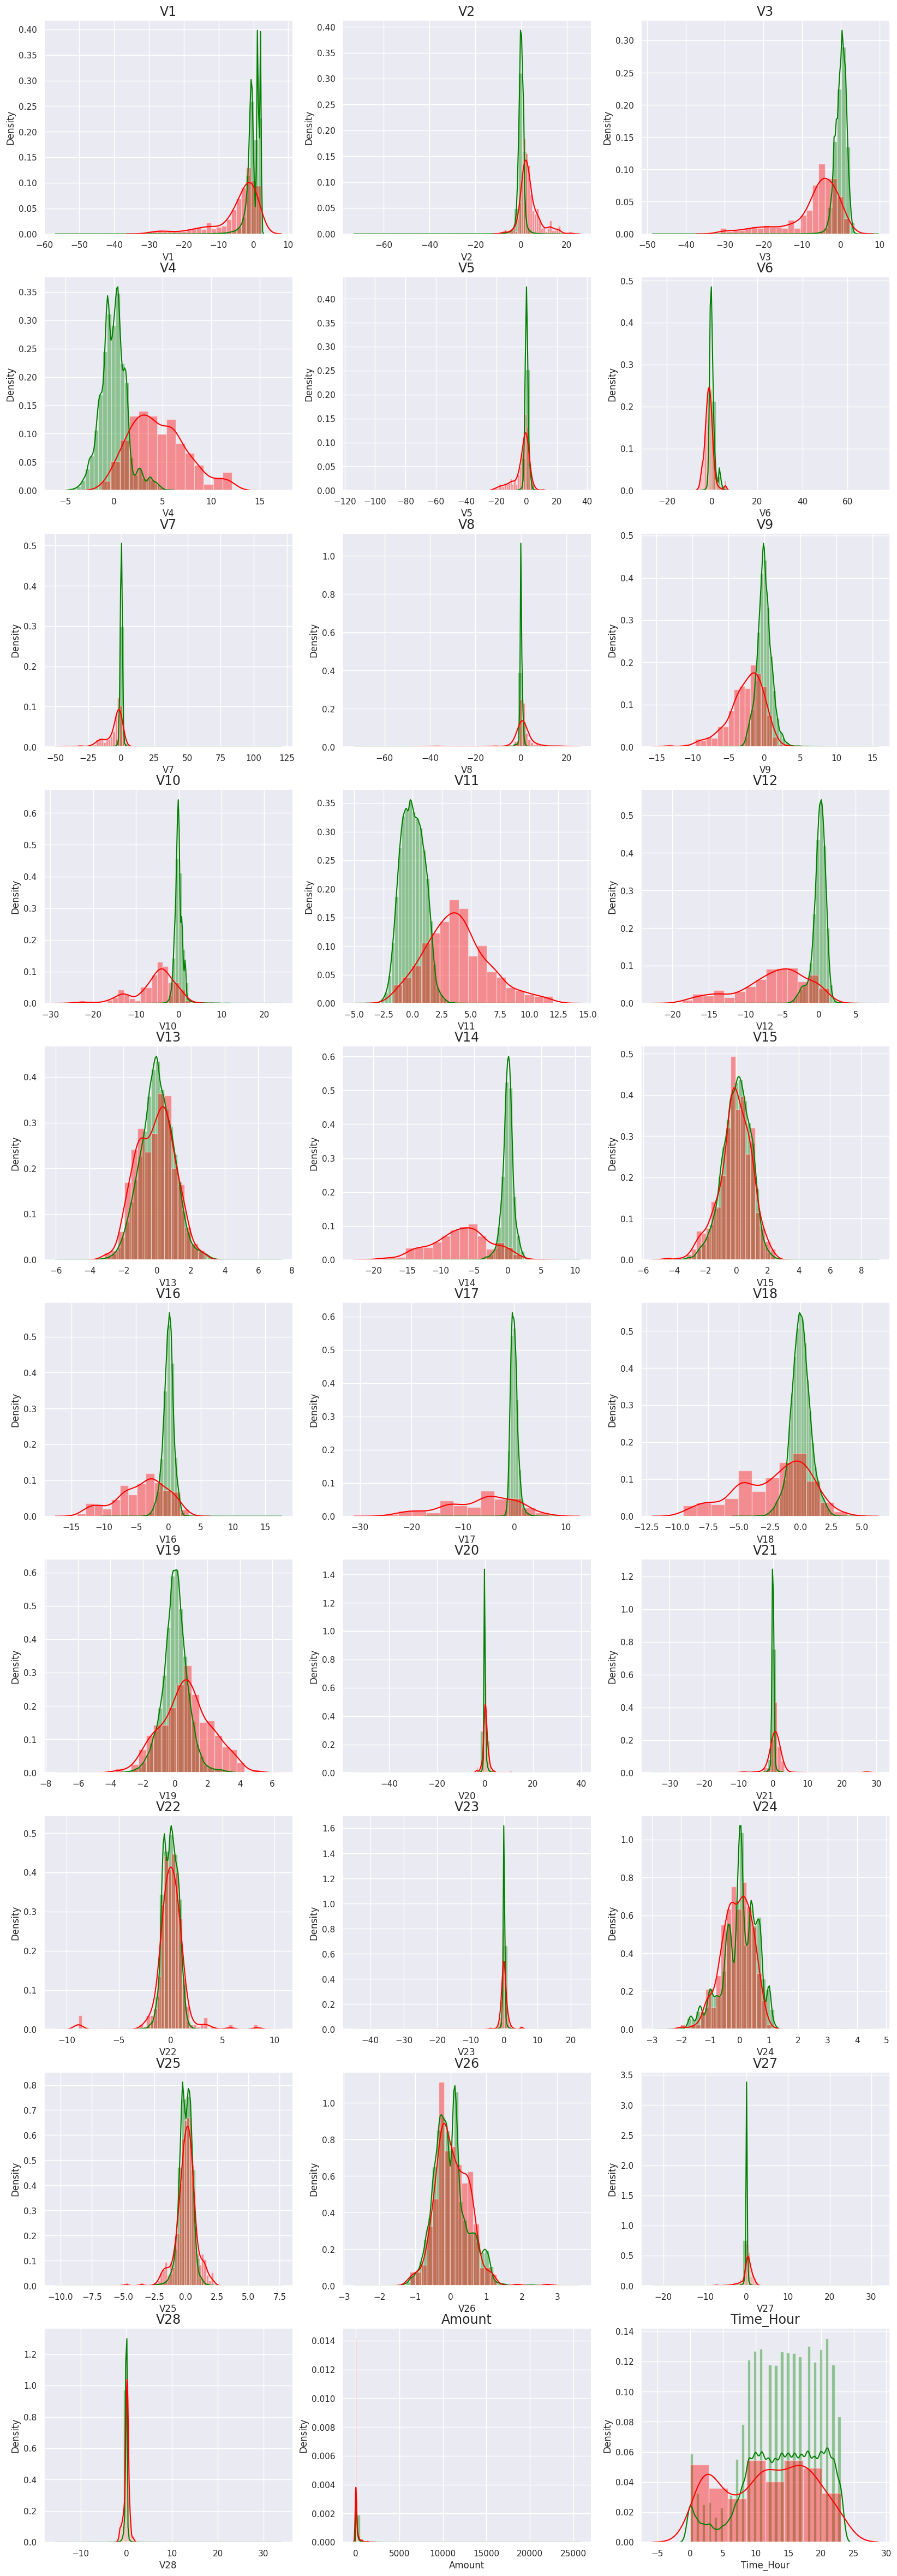

In [ ]:
# Ploting the histogram of a variable from the dataset to see the skewness in the distribustion
normal_records = df_credit.Class == 0
fraud_records = df_credit.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

# **Create model functions for Logistic Regress, KNN, SVM, Decision Tree, Random Forest, XGBoost**

In [ ]:
# Creating a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [11]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf() # This clears the previous chart 
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [12]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  """
  This function is building and running logistic regression models with L1 and L2 regularization on the input data. 
  It takes the input data and splits it into training and testing datasets. It then uses KFold cross-validation to 
  tune the regularization parameter for both L1 and L2 regularization, and fits the logistic regression models to the
   training data.

  """

  # Logistic Regression
  from sklearn import linear_model # import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,
  'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,
  'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,
    'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,
    'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [ ]:
def buildAndRunKNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  
  """This function is building and running a K-nearest neighbors (KNN) classification model on a given dataset, 
  evaluating its performance, and saving the results to a pandas DataFrame. """

  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [ ]:
def buildAndRunSVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  """
  This function builds and runs an SVM (Support Vector Machine) model with a sigmoid kernel on the input training and
   test data. It takes in several parameters such as the dataframe to store the results, the type of data imbalance 
   handling, the input training and test data.
   """
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [ ]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  """
    This function builds and runs a decision tree model with the 'gini' and 'entropy' criteria. The function takes as
    input a dataframe for storing the results of the models, the data imbalance handling method, the training and testing 
    data, and the target variables.
   """
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [ ]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  """
  This function builds and runs a Random Forest model on the input data and evaluates its performance.
  Finally, the function adds the evaluation results to the df_Results DataFrame and returns it."""
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [ ]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  """
  This function builds and runs an XGBoost model on the provided training and test data, and evaluates the model's 
  performance using various metrics.Finally, the function plots the ROC curve for the model and appends the model's 
  evaluation metrics to the provided df_Results dataframe, which is returned by the function. """
  
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

# **If there is skewness present in the distribution use:**

Power Transformer package present in the preprocessing library provided by sklearn to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [ ]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

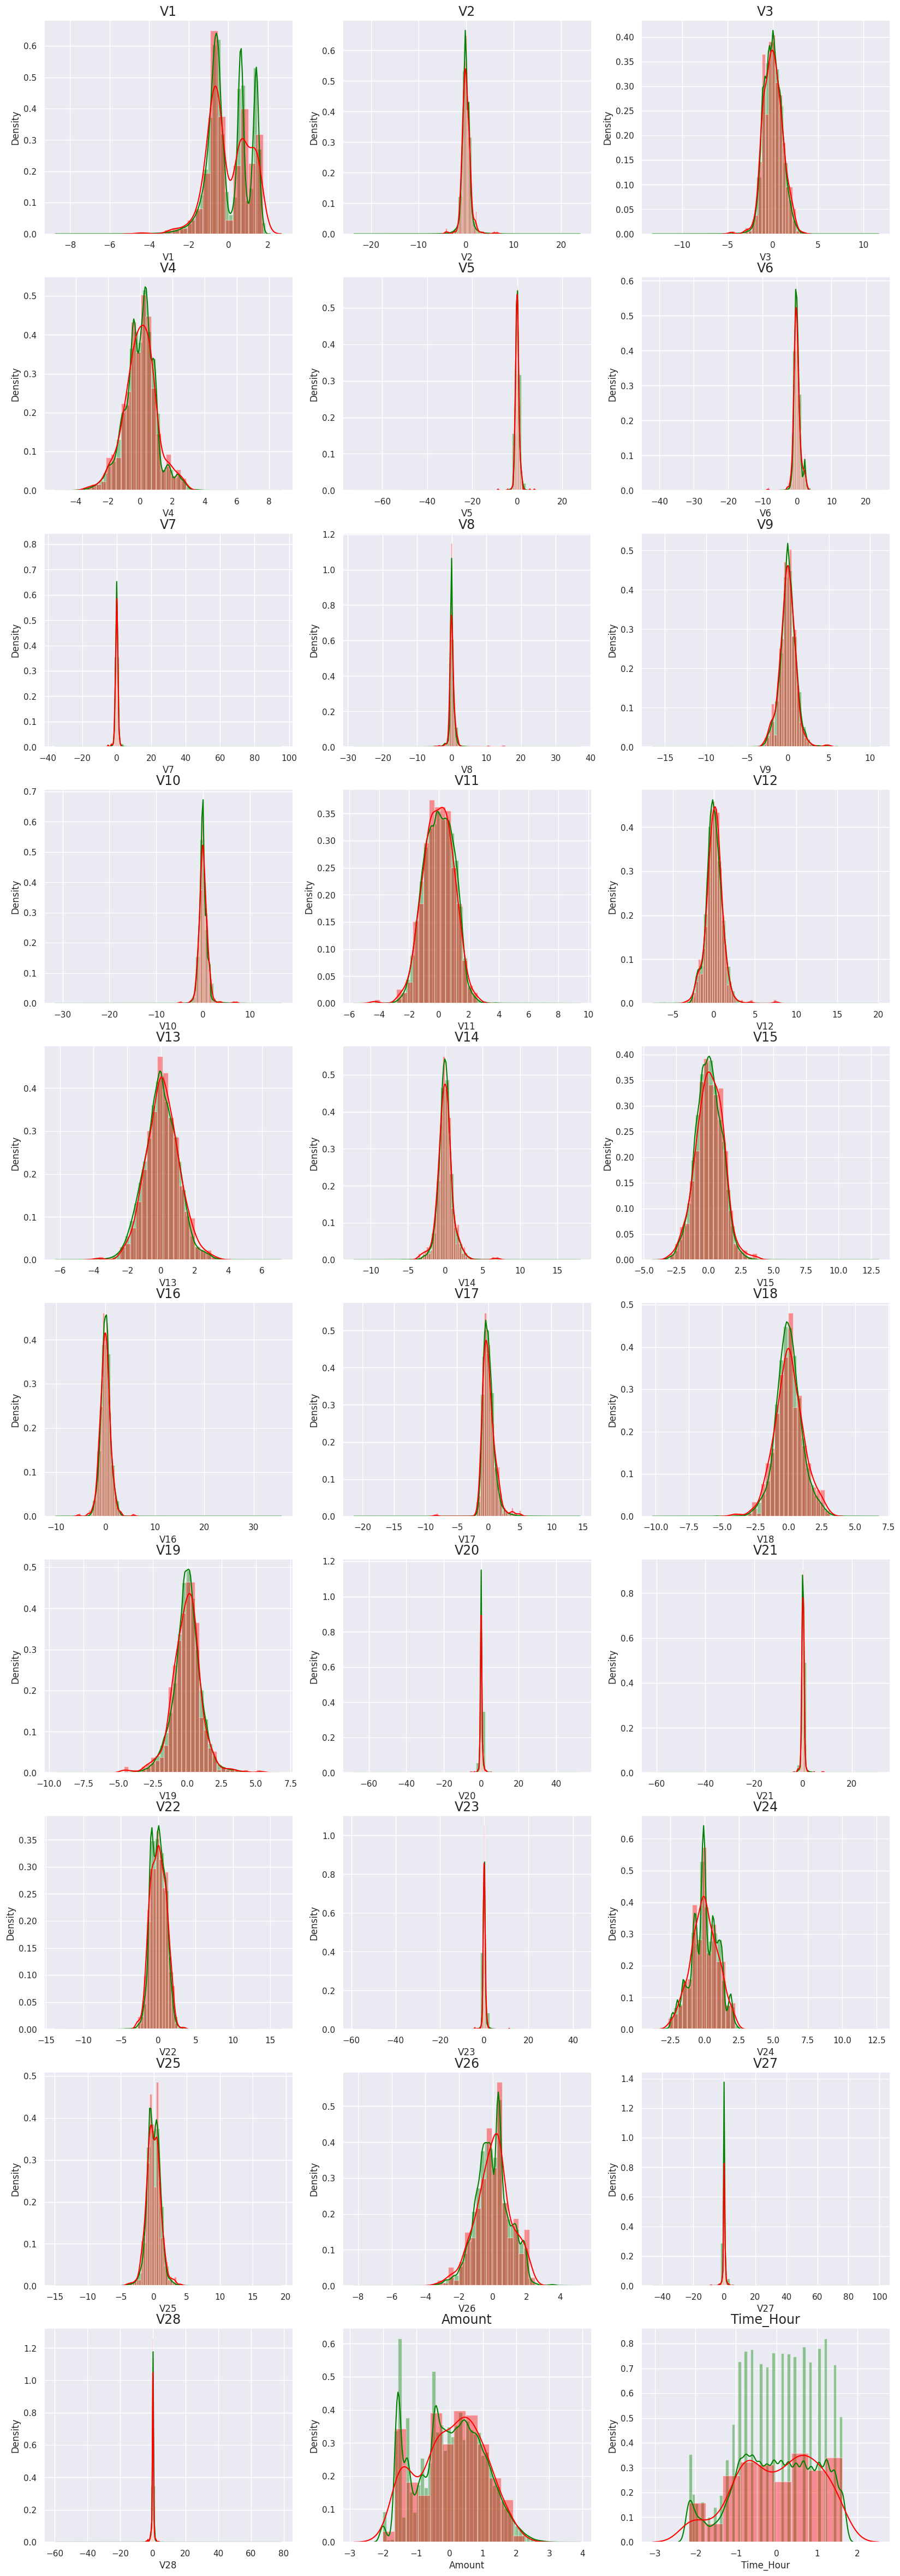

In [ ]:
# plot the histogram of a variable from the train dataset again to see the result 

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

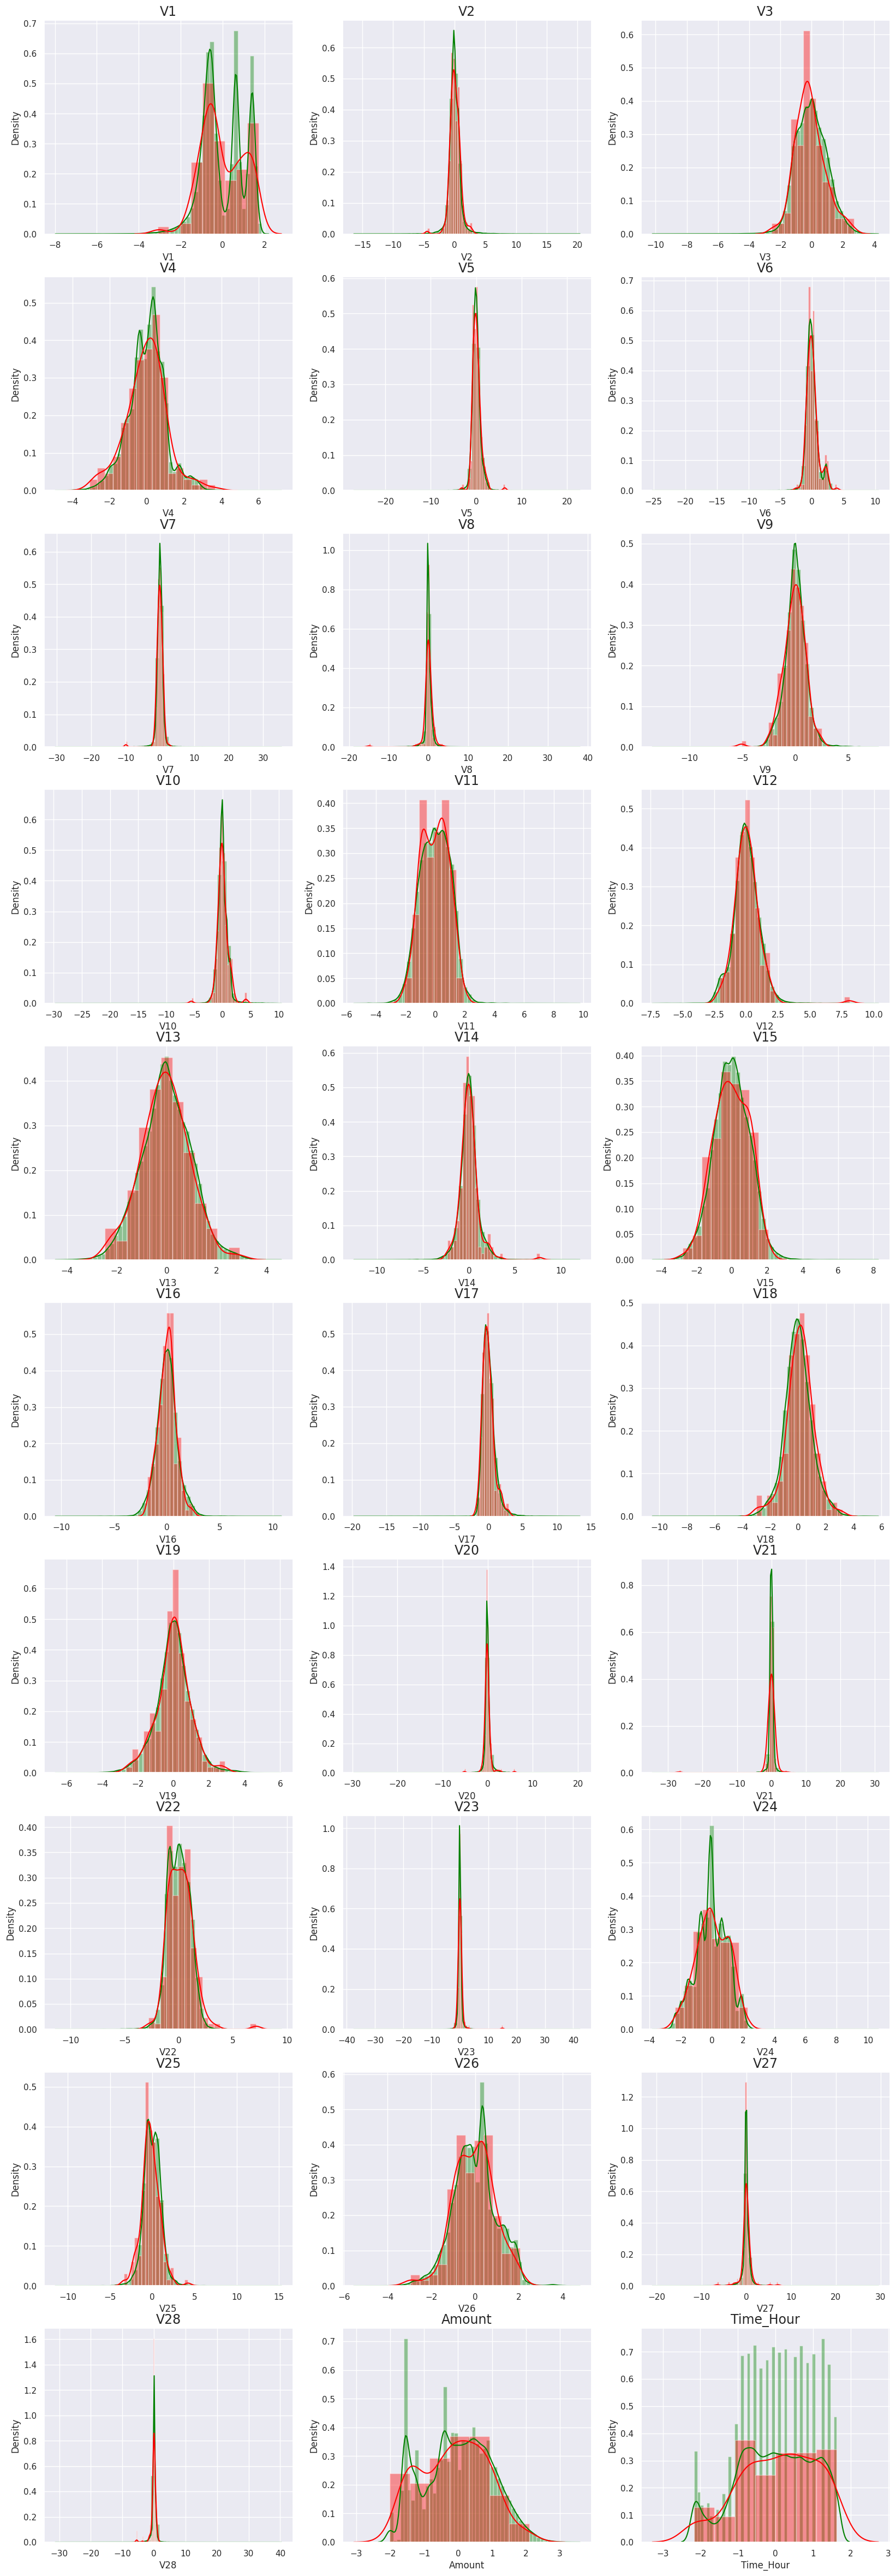

In [ ]:
# plot the histogram of a variable from the test dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test_pt_df[col][normal_records], color='green')
  sns.distplot(X_test_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

# **Model Building**
Building different models on the imbalanced dataset and see the result

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.983760023970567
Max auc_roc for l1: 0.985410899045824
Parameters for l2 regularisations
[[-0.09276541 -0.06828297 -0.28652331  0.55493742  0.02789795  0.01396825
  -0.06824953 -0.20408006 -0.18143666 -0.20371292  0.17699967 -0.50183429
  -0.11614819 -0.66830552 -0.0815942  -0.18013738 -0.08164991  0.03866811
  -0.03807332 -0.02310099  0.10465199  0.10090233 -0.03198749 -0.02939204
   0.01001787  0.00785392 -0.04474827 -0.02229527  0.02208228  0.08474082]]
[-8.07230494]
{1: array([[0.90398235, 0.90383704, 0.90383704, 0.90383704, 0.90383704,
        0.90419481, 0.96804377, 0.99255279, 0.99488378, 0.99521346,
        0.99521346, 0.99521346, 0.99521346, 0.99521346, 0.99521346,
        0.99521346, 0.99521346, 0.99521346, 0.99521346, 0.99521346],
       [0.9306611 , 0.9306611 , 0.9306611 , 0.9306611 , 0.9306611 ,
        0.93091836, 0.96502028, 0.98005776, 0.97844439, 0.97856203,
        0.97856203, 0.97856203, 0.9785620

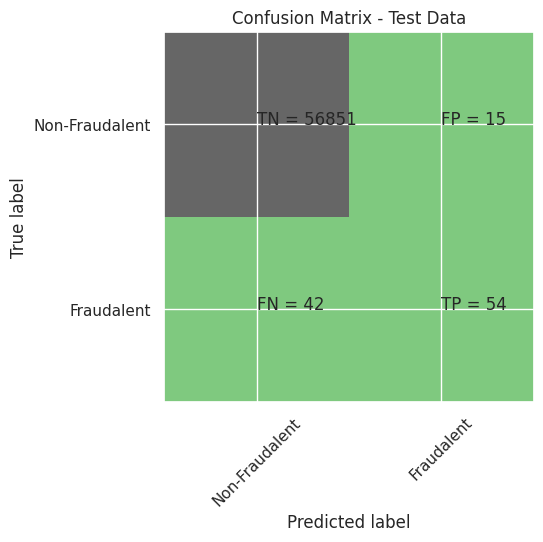

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9988413328183702
Confusion Matrix


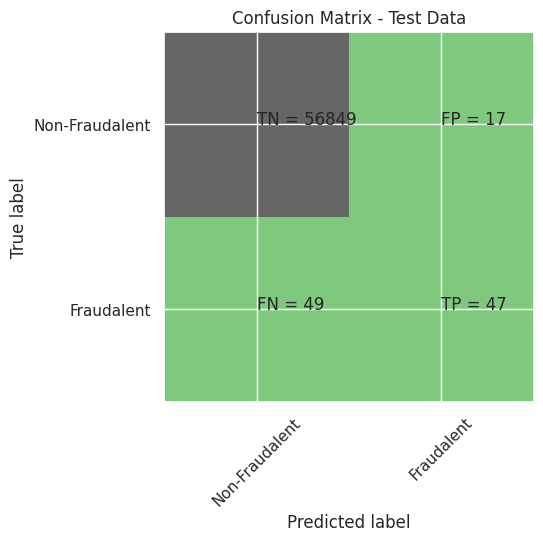

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9668061026506759
l2 threshold: 0.001289178561205442
ROC for the test dataset 96.7%


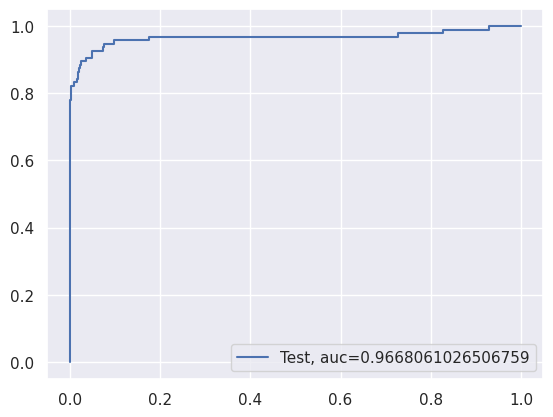

l1 roc_value: 0.9639030791685718
l1 threshold: 0.009276493867768918
ROC for the test dataset 96.4%


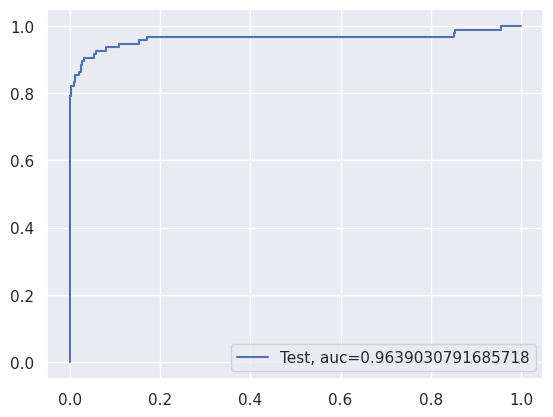

Time Taken by Model: --- 195.54812598228455 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9992977774656788
Confusion Matrix


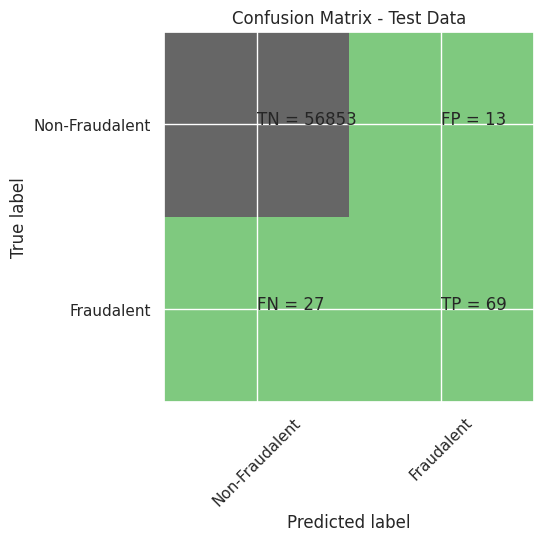

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.72      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.900851068740548
KNN threshold: 0.2
ROC for the test dataset 90.1%


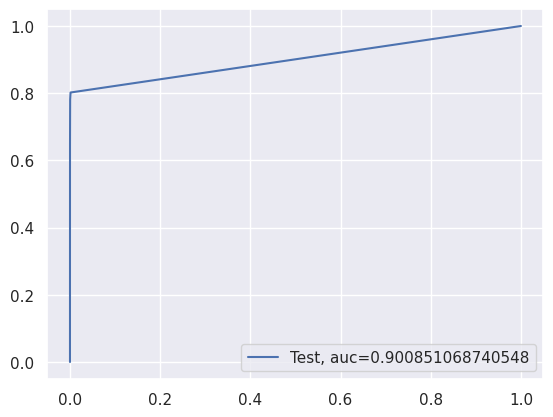

Time Taken by Model: --- 274.2009882926941 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9988062216916541
Confusion Matrix


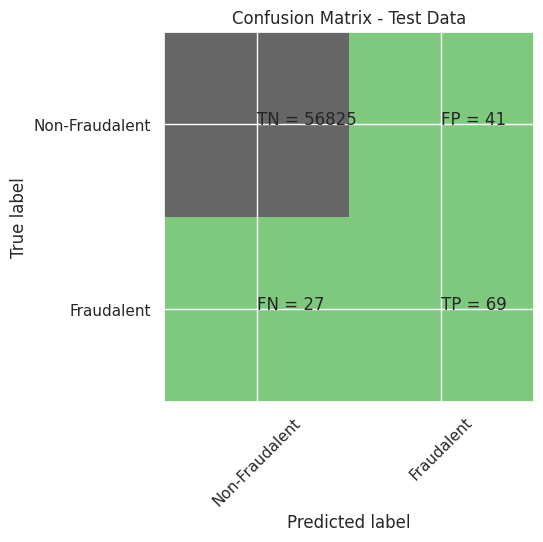

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.63      0.72      0.67        96

    accuracy                           1.00     56962
   macro avg       0.81      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value: 0.8590145033939437
Tree threshold: 1.0
ROC for the test dataset 85.9%


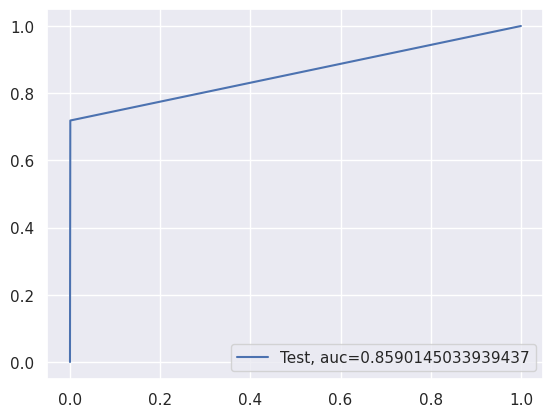

entropy score: 0.9990519995786665
Confusion Matrix


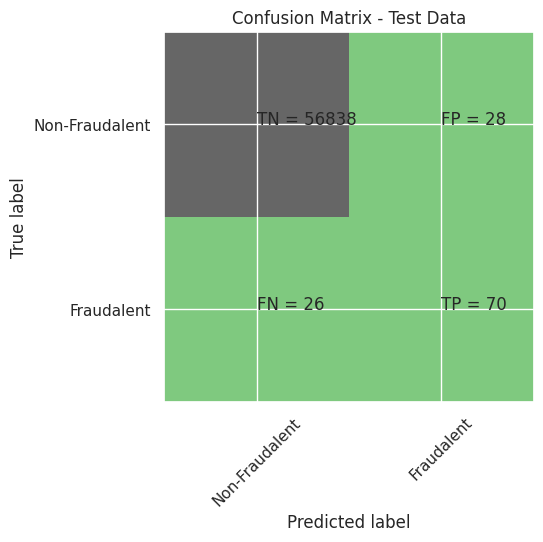

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.73      0.72        96

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value: 0.8643371405291973
Tree threshold: 1.0
ROC for the test dataset 86.4%


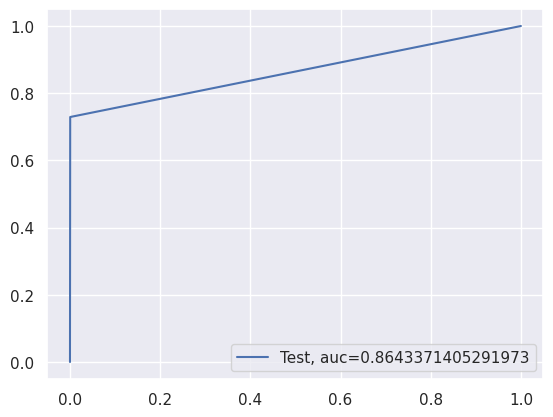

Time Taken by Model: --- 40.18485140800476 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


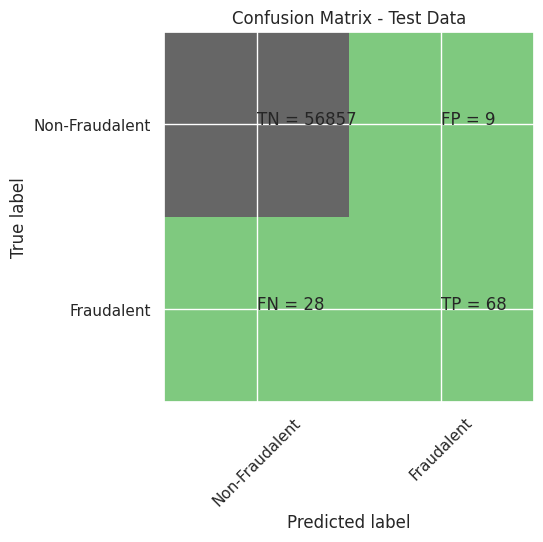

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.940564037972309
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


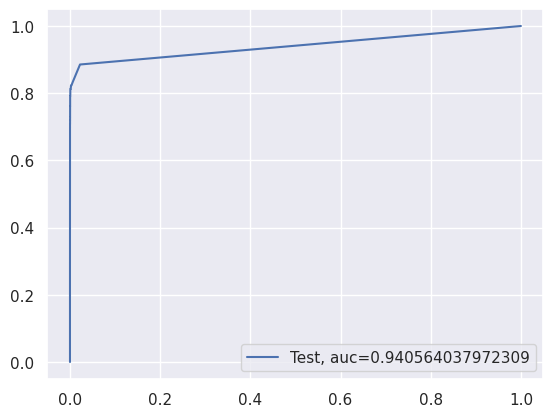

Time Taken by Model: --- 309.05535984039307 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994557775359011
Confusion Matrix


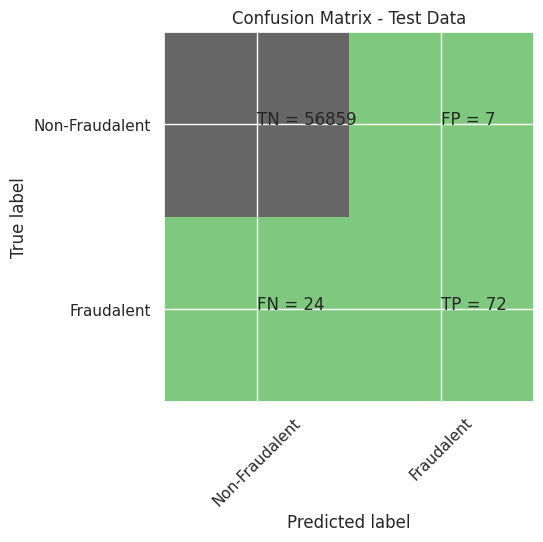

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.75      0.82        96

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

XGboost roc_value: 0.9729984744838744
XGBoost threshold: 5.146709372638725e-05
ROC for the test dataset 97.3%


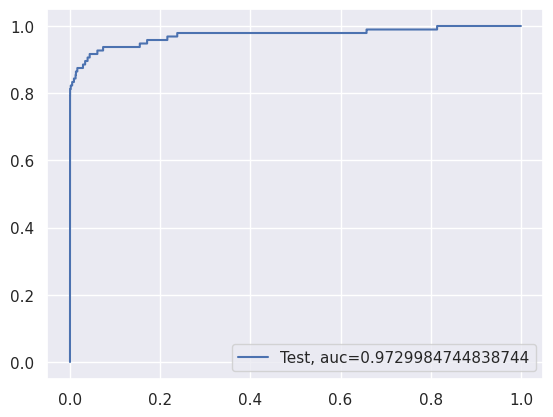

Time Taken by Model: --- 126.50281071662903 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9985604438046417
Confusion Matrix


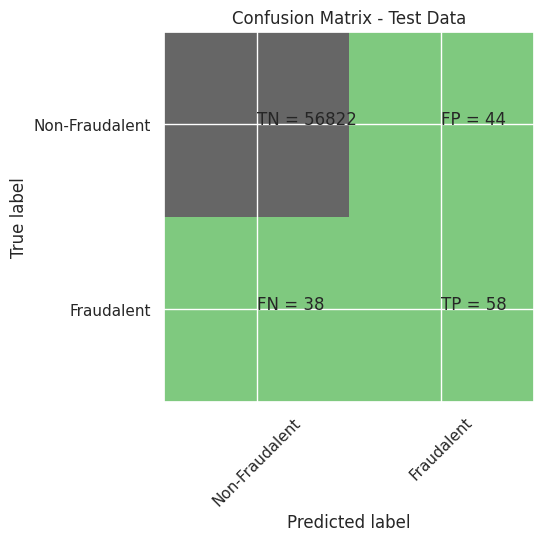

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.78      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8913107312219368
SVM threshold: 0.0008932376280598059
ROC for the test dataset 89.1%


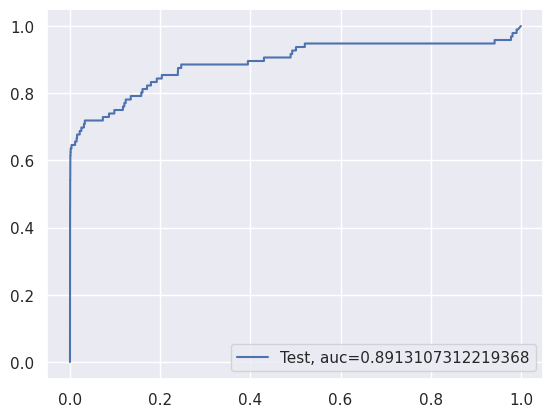

Time Taken by Model: --- 107.11717486381531 seconds ---


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results.head()

Data_Imbalance_Handiling                                       Model  \
0        Power Transformer  Logistic Regression with L2 Regularisation   
1        Power Transformer  Logistic Regression with L1 Regularisation   
2        Power Transformer                                         KNN   
3        Power Transformer               Tree Model with gini criteria   
4        Power Transformer            Tree Model with entropy criteria   

   Accuracy  roc_value  threshold  
0  0.998999   0.966806   0.001289  
1  0.998841   0.963903   0.009276  
2  0.999298   0.900851   0.200000  
3  0.998806   0.859015   1.000000  
4  0.999052   0.864337   1.000000

# Perform cross validation with RepeatedKFold

In [ ]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [    10     21     22 ... 284792 284797 284805]
TRAIN: [     0      1      3 ... 284803 284805 284806] TEST: [     2      7     11 ... 284799 284800 284804]
TRAIN: [     0      1      2 ... 284802 284804 284805] TEST: [     3      5      8 ... 284801 284803 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     6     12     14 ... 284795 284796 284802]
TRAIN: [     2      3      5 ... 284804 284805 284806] TEST: [     0      1      4 ... 284775 284789 284794]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    17     19     20 ... 284797 284798 284800]
TRAIN: [     0      1      2 ... 284803 284804 284805] TEST: [     4      5      7 ... 284794 284802 284806]
TRAIN: [     0      4      5 ... 284804 284805 284806] TEST: [     1      2      3 ... 284795 284796 284799]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     6     13     24 ... 284778 284779 284793]
TRAIN: [     1     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.983934716438036
Max auc_roc for l1: 0.977435635742674
Parameters for l2 regularisations
[[ 1.16462693e-02  3.48572472e-02 -8.57448952e-02  2.34322895e-01
   8.85202444e-02 -4.47451795e-02 -2.77715715e-02 -1.22242372e-01
  -9.09648537e-02 -1.77664940e-01  1.38694968e-01 -2.01681502e-01
  -4.20640371e-02 -3.88447632e-01 -6.15156084e-03 -1.05820282e-01
  -1.00875857e-01 -7.64808815e-03  1.02534525e-02 -3.46814212e-03
   3.35991981e-02  3.21831225e-02 -3.67867352e-03 -1.32920568e-02
  -8.80848184e-03  7.11645297e-03 -1.23683734e-02 -2.55426253e-03
   2.81572812e-04  1.83568955e-03]]
[-7.41058172]
{1: array([[0.5234669 , 0.52502661, 0.54563536, 0.69646624, 0.86494216,
        0.93347878, 0.97337585, 0.98022432, 0.98367099, 0.97742863,
        0.96725753, 0.96725753, 0.96725753, 0.96725753, 0.96725753,
        0.96725753, 0.96725753, 0.96725753, 0.96725753, 0.96725753],
       [0.62154646, 0.62353395, 0.64359503, 0.77874

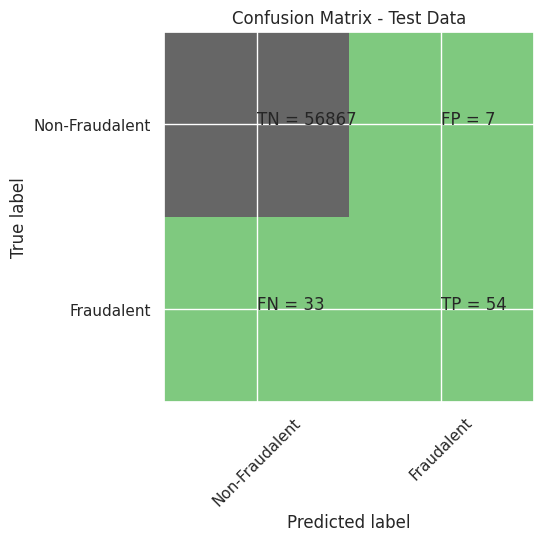

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.89      0.62      0.73        87

    accuracy                           1.00     56961
   macro avg       0.94      0.81      0.86     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9992099857797441
Confusion Matrix


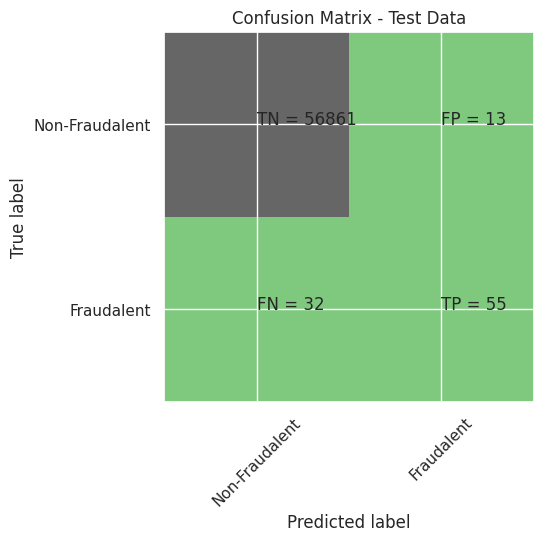

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.81      0.63      0.71        87

    accuracy                           1.00     56961
   macro avg       0.90      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9841868635608699
l2 threshold: 0.0021633037604558004
ROC for the test dataset 98.4%


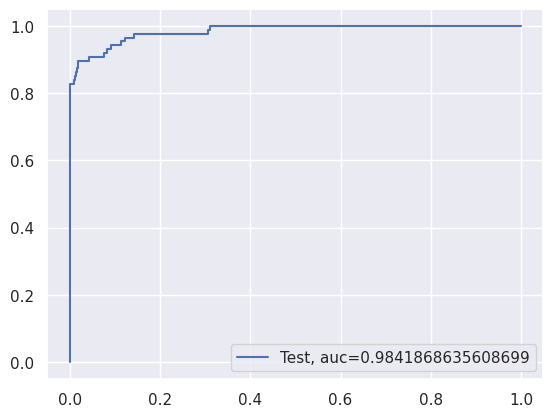

l1 roc_value: 0.8382874181645331
l1 threshold: 0.10315940491739148
ROC for the test dataset 83.8%


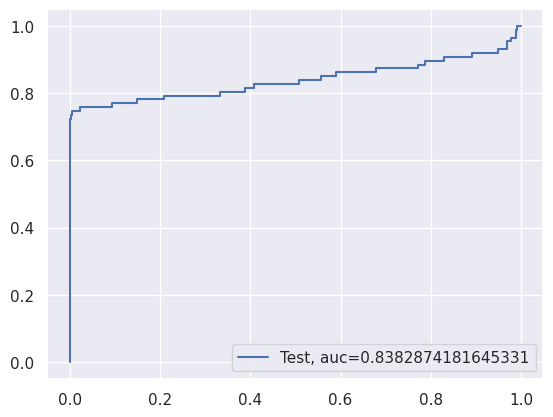

Time Taken by Model: --- 452.82869696617126 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9993328768806727
Confusion Matrix


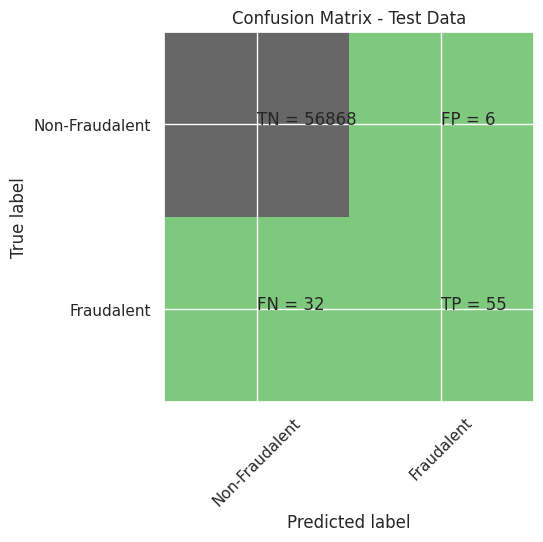

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.90      0.63      0.74        87

    accuracy                           1.00     56961
   macro avg       0.95      0.82      0.87     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8733429290559207
KNN threshold: 0.2
ROC for the test dataset 87.3%


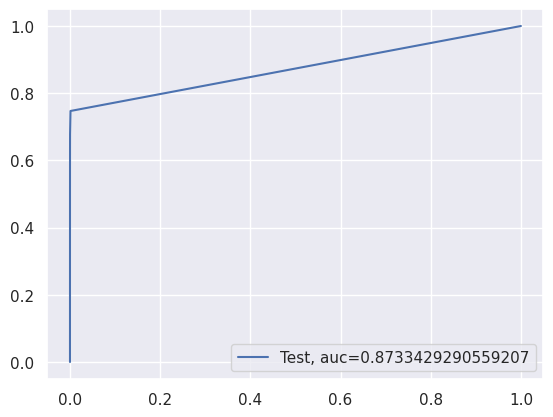

Time Taken by Model: --- 263.8541052341461 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9992450975228665
Confusion Matrix


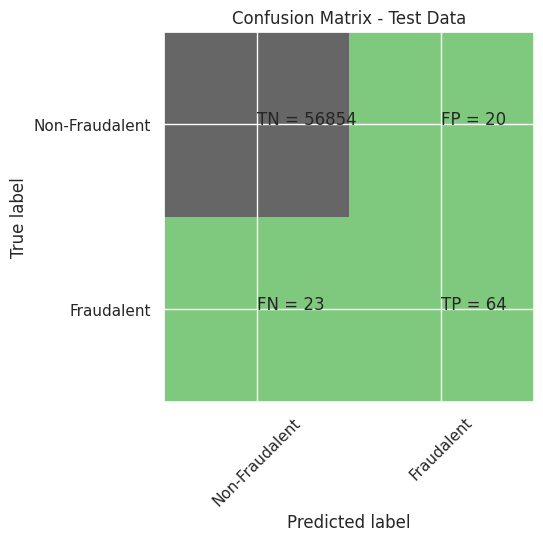

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.76      0.74      0.75        87

    accuracy                           1.00     56961
   macro avg       0.88      0.87      0.87     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8676402646867304
Tree threshold: 1.0
ROC for the test dataset 86.8%


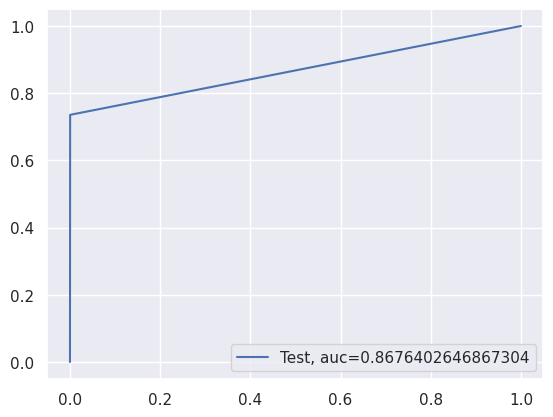

entropy score: 0.9992275416513052
Confusion Matrix


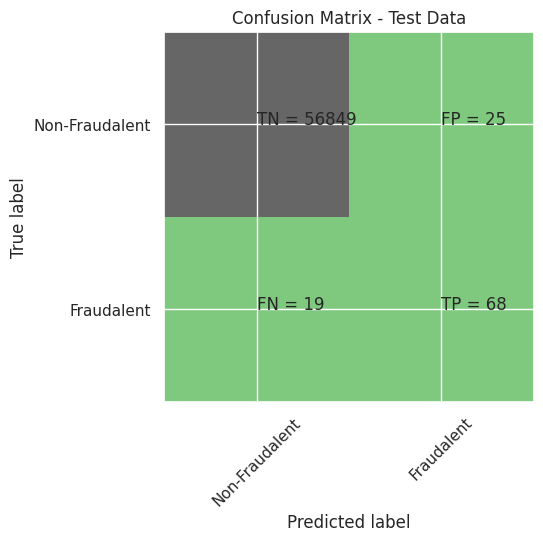

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.73      0.78      0.76        87

    accuracy                           1.00     56961
   macro avg       0.87      0.89      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8905848136170336
Tree threshold: 1.0
ROC for the test dataset 89.1%


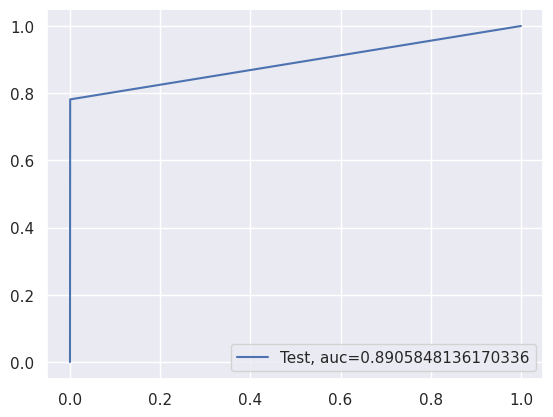

Time Taken by Model: --- 43.18634057044983 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9996313266972139
Confusion Matrix


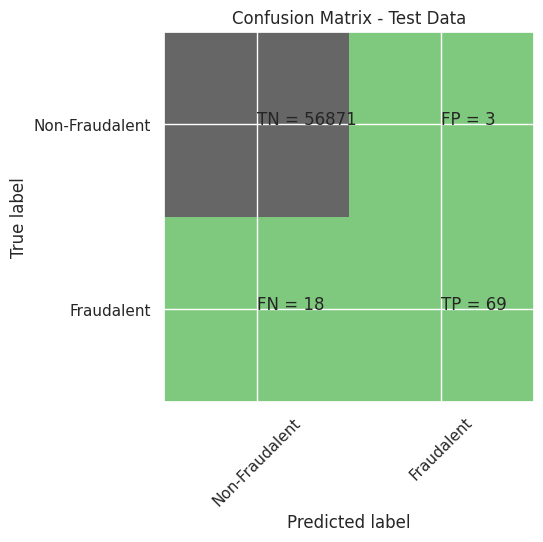

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.96      0.79      0.87        87

    accuracy                           1.00     56961
   macro avg       0.98      0.90      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9405803876203053
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


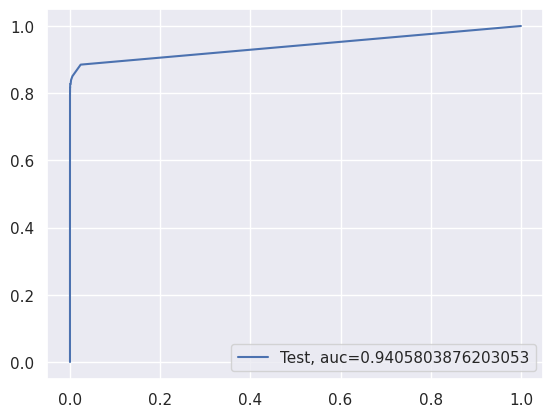

Time Taken by Model: --- 281.71803522109985 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9995962149540913
Confusion Matrix


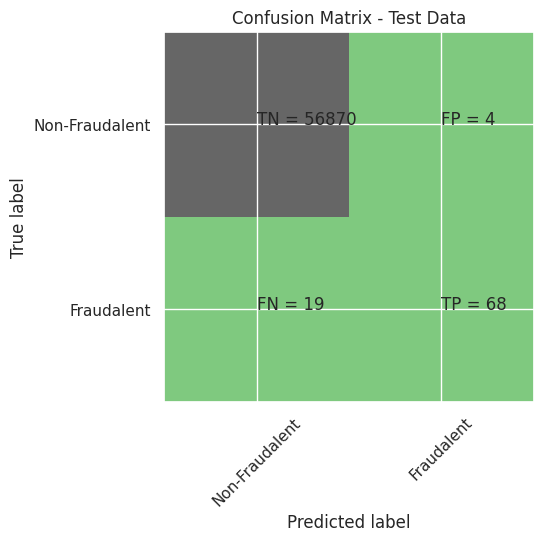

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.94      0.78      0.86        87

    accuracy                           1.00     56961
   macro avg       0.97      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9810638075132001
XGBoost threshold: 8.872655598679557e-05
ROC for the test dataset 98.1%


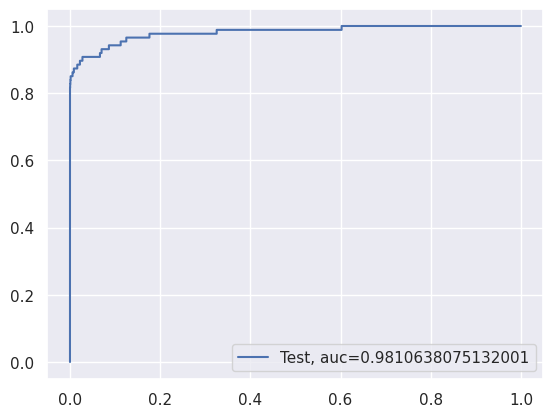

Time Taken by Model: --- 124.99899125099182 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9986130861466618
Confusion Matrix


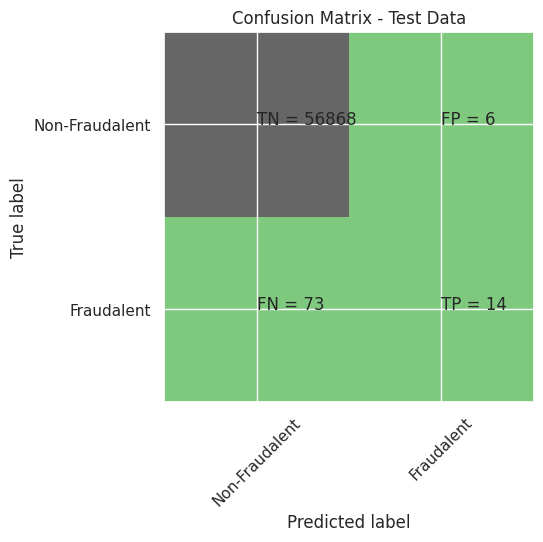

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.70      0.16      0.26        87

    accuracy                           1.00     56961
   macro avg       0.85      0.58      0.63     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.5126492561293992
SVM threshold: 0.00307075233315623
ROC for the test dataset 51.3%


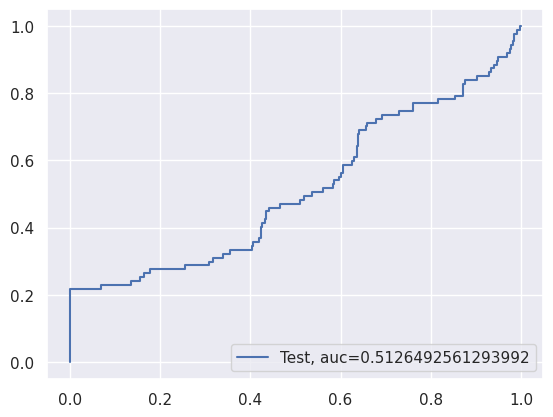

Time Taken by Model: --- 352.1962983608246 seconds ---


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results

Data_Imbalance_Handiling  \
0                Power Transformer   
1                Power Transformer   
2                Power Transformer   
3                Power Transformer   
4                Power Transformer   
5                Power Transformer   
6                Power Transformer   
7                Power Transformer   
8   RepeatedKFold Cross Validation   
9   RepeatedKFold Cross Validation   
10  RepeatedKFold Cross Validation   
11  RepeatedKFold Cross Validation   
12  RepeatedKFold Cross Validation   
13  RepeatedKFold Cross Validation   
14  RepeatedKFold Cross Validation   
15  RepeatedKFold Cross Validation   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998999   0.966806   0.001289  
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
2                                          KNN  0.999298   0.900851   0.200000  
3                Tree Model with gini criteria  0.998806   0.859015   1.000000  
4             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999456   0.972998   0.000051  
7                                          SVM  0.998560   0.891311   0.000893  
8   Logistic Regression with L2 Regularisation  0.999298   0.984187   0.002163  
9   Logistic Regression with L1 Regularisation  0.999210   0.838287   0.103159  
10                                         KNN  0.999333   0.873343   0.200000  
11               Tree Model with gini criteria  0.999245   0.867640   1.000000  
12            Tree Model with entropy criteria  0.999228   0.890585   1.000000  
13                               Random Forest  0.999631   0.940580   0.010000  
14                                     XGBoost  0.999596   0.981064   0.000089  
15                                         SVM  0.998613   0.512649   0.003071

# It seems XGBOost with Repeated KFold cross validation has provided us wih best results with ROC_Value of 0.984352

In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model on training data
XGBmodel = XGBClassifier(random_state=42) # creating a object 
XGBmodel.fit(X_train_cv,y_train_cv) # fitting on cv_data

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']

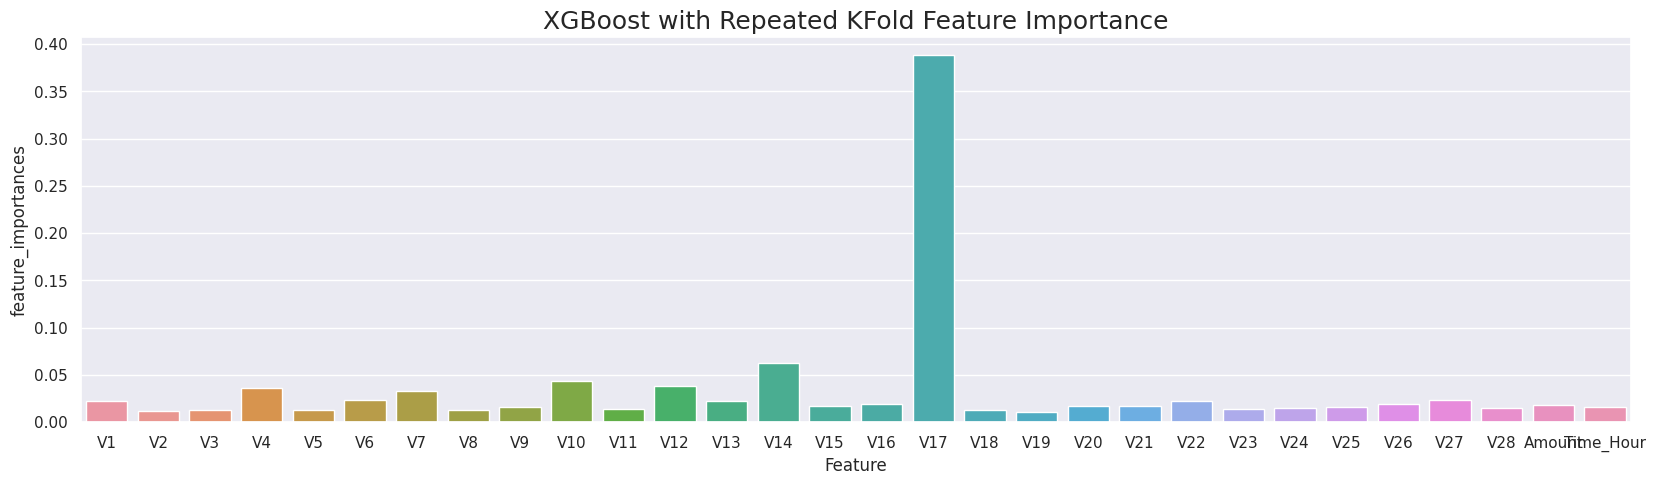

In [ ]:
plt.figure(figsize=(20,5)) # setting the figure size 
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

# Perform cross validation with StratifiedKFold

In [ ]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


**Similarly explore other algorithms by building models like:**

* KNN
* SVM
* Decision Tree
* Random Forest
* XGBoost

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9825458851679804
Max auc_roc for l1: 0.9652106893977332
Parameters for l2 regularisations
[[ 6.85527167e-03  6.17831896e-02 -6.71869528e-02  2.18616825e-01
   5.41883731e-02 -3.20392713e-02 -2.28998608e-02 -1.14990273e-01
  -6.93710555e-02 -1.63675051e-01  1.28023418e-01 -1.92152017e-01
  -3.68988965e-02 -3.60604062e-01  3.47966278e-03 -8.79629360e-02
  -7.27226579e-02 -7.04345314e-04  3.90108831e-03 -2.80761573e-02
   3.81922008e-02  2.33586090e-02 -1.16081737e-02 -9.98609146e-03
  -6.55314197e-03  6.29773501e-03 -1.01435017e-02 -1.67834219e-03
   4.00203081e-04  3.36391503e-04]]
[-7.42776654]
{1: array([[0.69243733, 0.69420039, 0.71446882, 0.83768575, 0.95579612,
        0.97136042, 0.98915673, 0.99473675, 0.99128052, 0.99118019,
        0.99118019, 0.99118019, 0.99118019, 0.99118019, 0.99118019,
        0.99118019, 0.99118019, 0.99118019, 0.99118019, 0.99118019],
       [0.60695097, 0.60860253, 0.62909124, 0.768

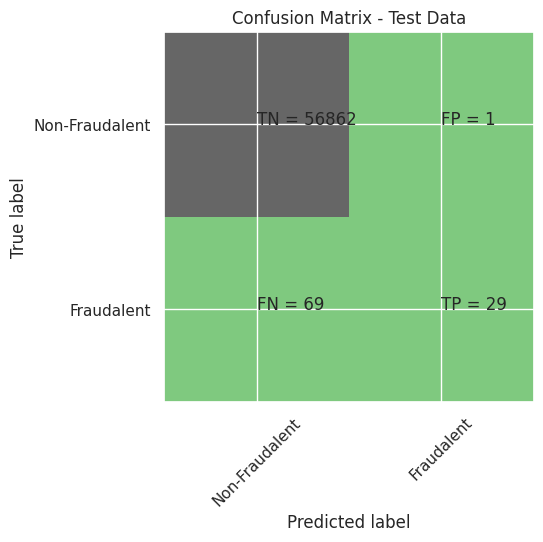

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9987535331191517
Confusion Matrix


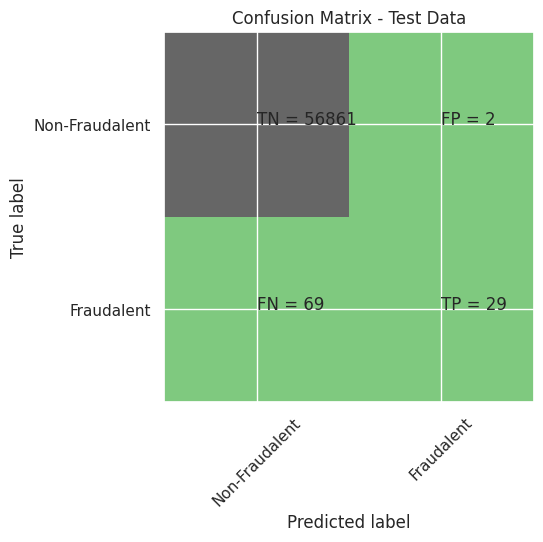

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9833375025616529
l2 threshold: 0.0015693394115907475
ROC for the test dataset 98.3%


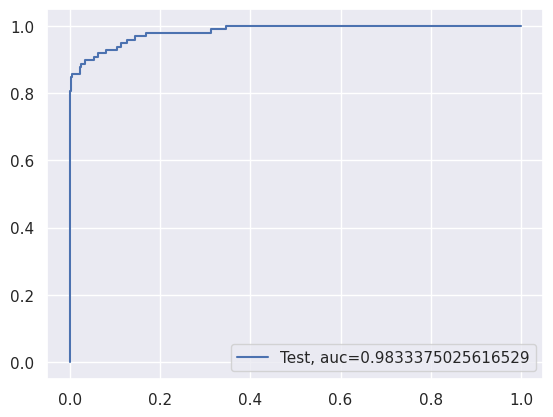

l1 roc_value: 0.8890758561483437
l1 threshold: 0.0210874927677922
ROC for the test dataset 88.9%


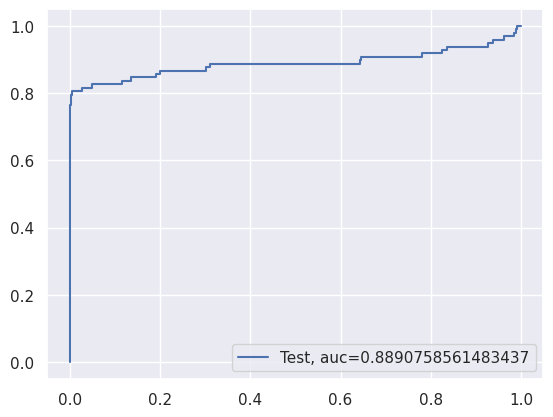

Time Taken by Model: --- 379.21594738960266 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9991924299081828
Confusion Matrix


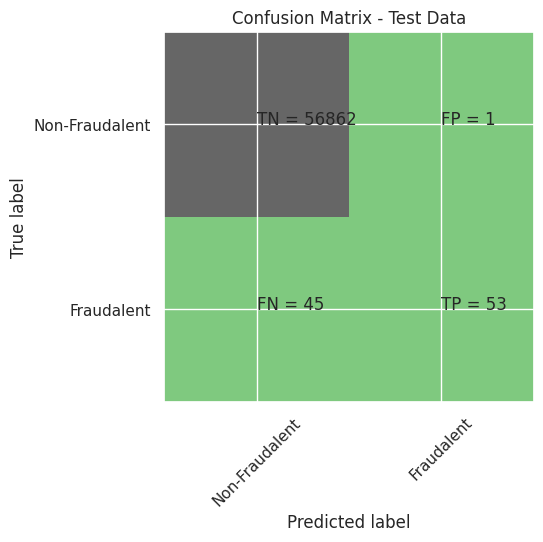

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
KNN threshold: 0.2
ROC for the test dataset 80.6%


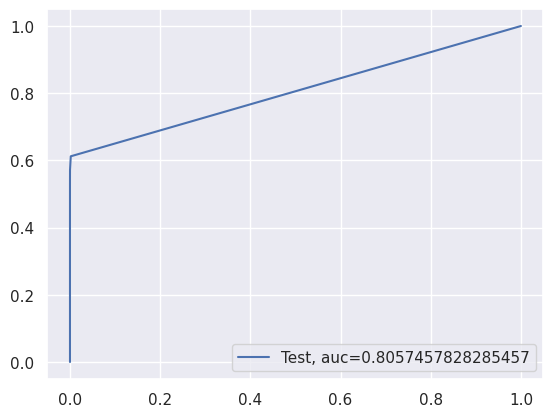

Time Taken by Model: --- 257.6817948818207 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.998841312476958
Confusion Matrix


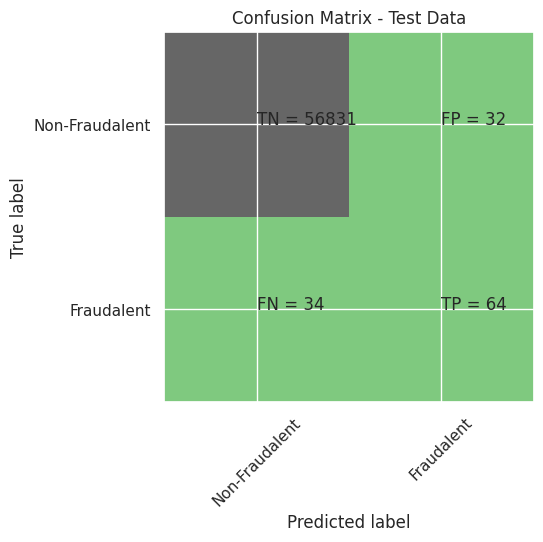

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8262492341959029
Tree threshold: 1.0
ROC for the test dataset 82.6%


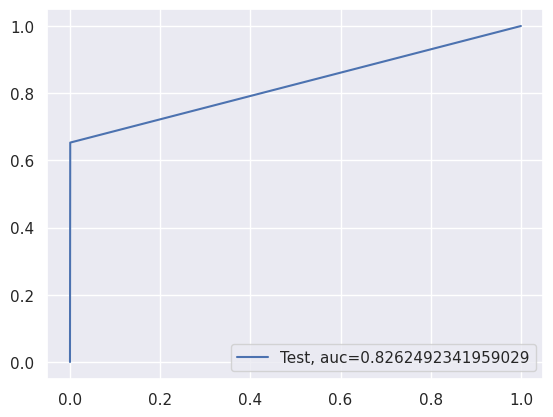

entropy score: 0.9990168711925703
Confusion Matrix


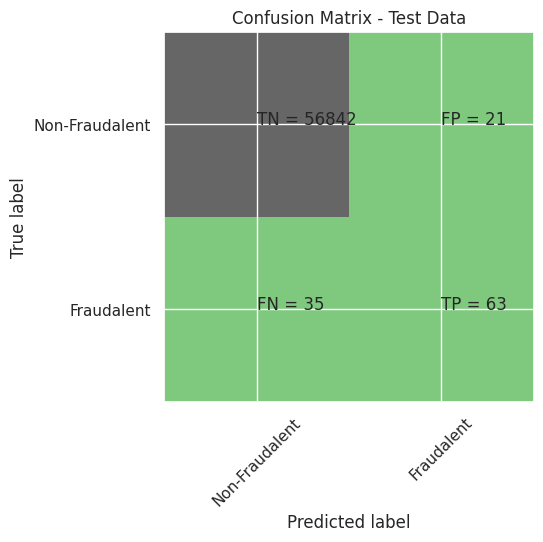

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212439170839185
Tree threshold: 1.0
ROC for the test dataset 82.1%


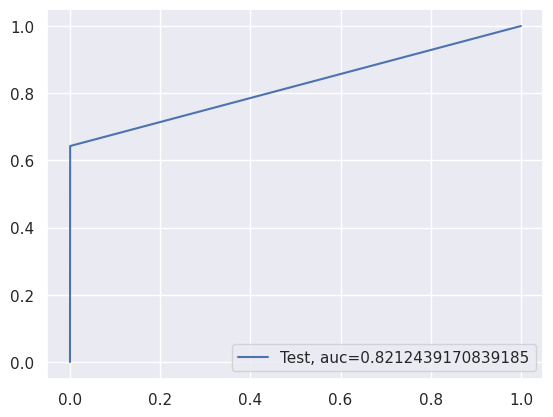

Time Taken by Model: --- 41.168081283569336 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


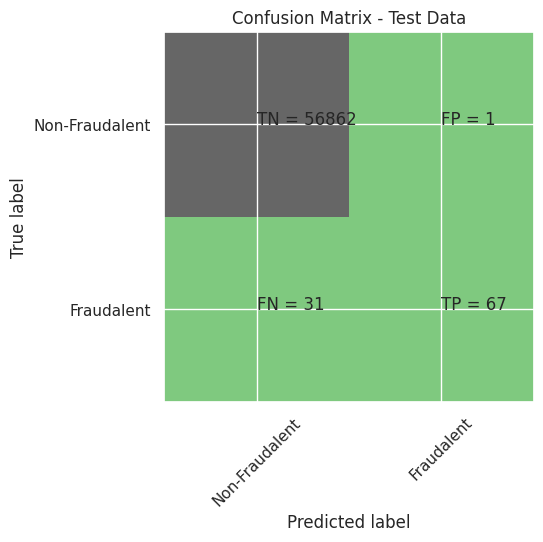

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


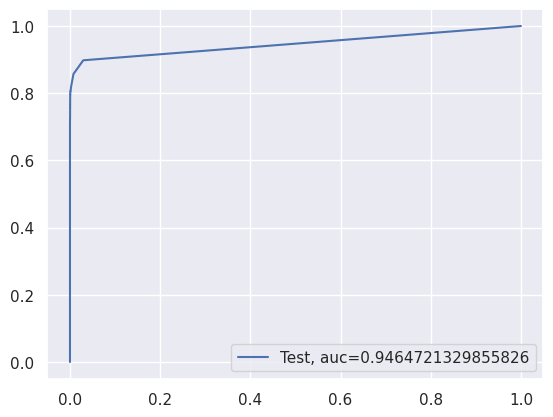

Time Taken by Model: --- 293.05119585990906 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


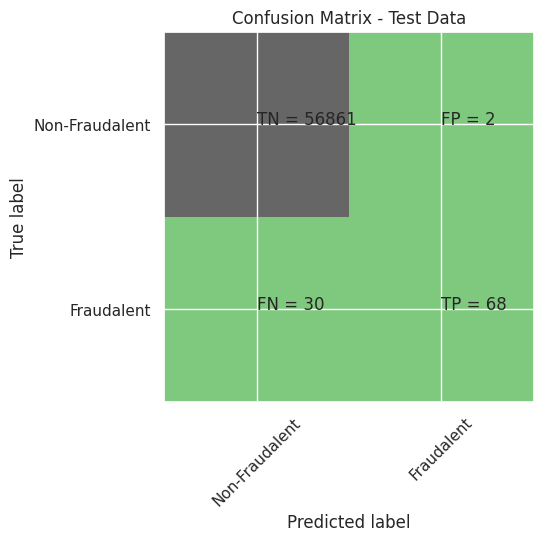

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9728125638170081
XGBoost threshold: 0.00010038274194812402
ROC for the test dataset 97.3%


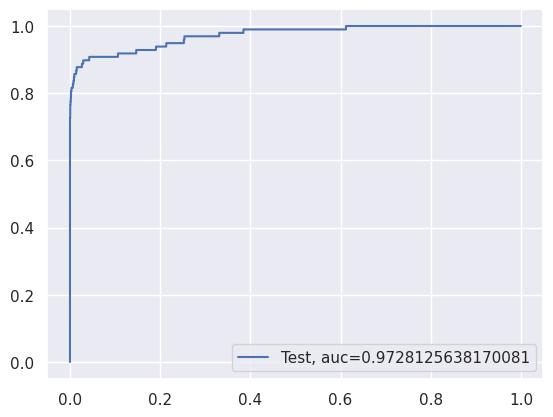

Time Taken by Model: --- 127.33547401428223 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9982795245869981
Confusion Matrix


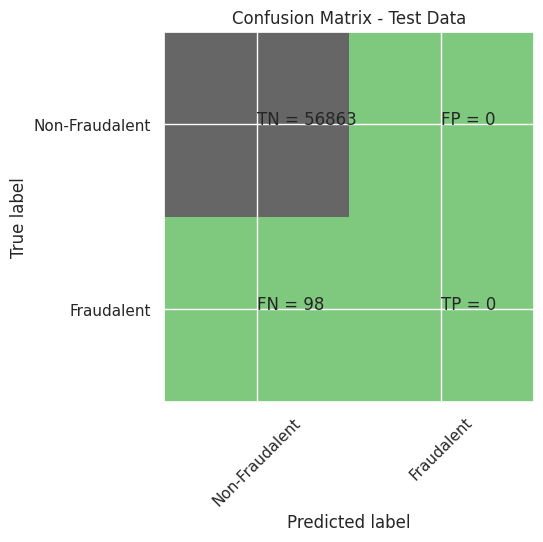

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.5982296511450543
SVM threshold: 0.0016939211610240694
ROC for the test dataset 59.8%


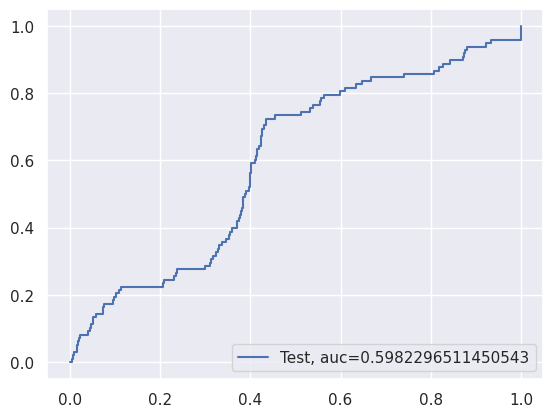

Time Taken by Model: --- 2400.1398997306824 seconds ---


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation") 
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results

Data_Imbalance_Handiling  \
0                  Power Transformer   
1                  Power Transformer   
2                  Power Transformer   
3                  Power Transformer   
4                  Power Transformer   
5                  Power Transformer   
6                  Power Transformer   
7                  Power Transformer   
8     RepeatedKFold Cross Validation   
9     RepeatedKFold Cross Validation   
10    RepeatedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
12    RepeatedKFold Cross Validation   
13    RepeatedKFold Cross Validation   
14    RepeatedKFold Cross Validation   
15    RepeatedKFold Cross Validation   
16  StratifiedKFold Cross Validation   
17  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
23  StratifiedKFold Cross Validation   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998999   0.966806   0.001289  
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
2                                          KNN  0.999298   0.900851   0.200000  
3                Tree Model with gini criteria  0.998806   0.859015   1.000000  
4             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999456   0.972998   0.000051  
7                                          SVM  0.998560   0.891311   0.000893  
8   Logistic Regression with L2 Regularisation  0.999298   0.984187   0.002163  
9   Logistic Regression with L1 Regularisation  0.999210   0.838287   0.103159  
10                                         KNN  0.999333   0.873343   0.200000  
11               Tree Model with gini criteria  0.999245   0.867640   1.000000  
12            Tree Model with entropy criteria  0.999228   0.890585   1.000000  
13                               Random Forest  0.999631   0.940580   0.010000  
14                                     XGBoost  0.999596   0.981064   0.000089  
15                                         SVM  0.998613   0.512649   0.003071  
16  Logistic Regression with L2 Regularisation  0.998771   0.983338   0.001569  
17  Logistic Regression with L1 Regularisation  0.998754   0.889076   0.021087  
18                                         KNN  0.999192   0.805746   0.200000  
19               Tree Model with gini criteria  0.998841   0.826249   1.000000  
20            Tree Model with entropy criteria  0.999017   0.821244   1.000000  
21                               Random Forest  0.999438   0.946472   0.010000  
22                                     XGBoost  0.999438   0.972813   0.000100  
23                                         SVM  0.998280   0.598230   0.001694

**As the results show Logistic Regression with L2 Regularisation for StratifiedFold cross validation provided best results**

**Proceed with the model which shows the best result**
* Apply the best hyperparameter on the model
* Predict on the test dataset

In [ ]:
# Logistic Regression Model 
from sklearn import linear_model #importing the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 


#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

Max auc_roc for l2: 0.9815437865764363
Parameters for l2 regularisations
[[ 6.98639180e-03  3.62144391e-02 -8.52901329e-02  2.27317536e-01
   8.55529216e-02 -4.54315040e-02 -3.35352580e-02 -9.90933674e-02
  -8.11981376e-02 -1.63574073e-01  1.40666108e-01 -1.83904180e-01
  -4.21566464e-02 -3.59119690e-01 -1.58478201e-02 -8.39836412e-02
  -8.47245690e-02  4.08960116e-04  6.78257713e-03 -1.48854269e-02
   3.16671873e-02  2.30254424e-02 -2.13044087e-02 -1.28747660e-02
  -1.01102138e-02  5.09031210e-03 -4.05668266e-03 -3.08684125e-03
   3.04284939e-04  1.11824331e-02]]
[-7.54033737]
{1.0: array([[0.70228238, 0.70431429, 0.72401051, 0.82766953, 0.93676454,
        0.96622657, 0.97915416, 0.98914383, 0.99080439, 0.9866418 ,
        0.9866418 , 0.9866418 , 0.9866418 , 0.9866418 , 0.9866418 ,
        0.9866418 , 0.9866418 , 0.9866418 , 0.9866418 , 0.9866418 ],
       [0.66500479, 0.66647563, 0.67990997, 0.75698254, 0.86755836,
        0.93083894, 0.96200379, 0.9555703 , 0.9304741 , 0.90755256,


In [ ]:
searchCV_l2.coef_

array([[ 6.98639180e-03,  3.62144391e-02, -8.52901329e-02,
         2.27317536e-01,  8.55529216e-02, -4.54315040e-02,
        -3.35352580e-02, -9.90933674e-02, -8.11981376e-02,
        -1.63574073e-01,  1.40666108e-01, -1.83904180e-01,
        -4.21566464e-02, -3.59119690e-01, -1.58478201e-02,
        -8.39836412e-02, -8.47245690e-02,  4.08960116e-04,
         6.78257713e-03, -1.48854269e-02,  3.16671873e-02,
         2.30254424e-02, -2.13044087e-02, -1.28747660e-02,
        -1.01102138e-02,  5.09031210e-03, -4.05668266e-03,
        -3.08684125e-03,  3.04284939e-04,  1.11824331e-02]])

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

In [ ]:
coefficients

Feature  Importance Coefficient
0          V1                0.006986
1          V2                0.036214
2          V3               -0.085290
3          V4                0.227318
4          V5                0.085553
5          V6               -0.045432
6          V7               -0.033535
7          V8               -0.099093
8          V9               -0.081198
9         V10               -0.163574
10        V11                0.140666
11        V12               -0.183904
12        V13               -0.042157
13        V14               -0.359120
14        V15               -0.015848
15        V16               -0.083984
16        V17               -0.084725
17        V18                0.000409
18        V19                0.006783
19        V20               -0.014885
20        V21                0.031667
21        V22                0.023025
22        V23               -0.021304
23        V24               -0.012875
24        V25               -0.010110
25        V26                0.005090
26        V27               -0.004057
27        V28               -0.003087
28     Amount                0.000304
29  Time_Hour                0.011182

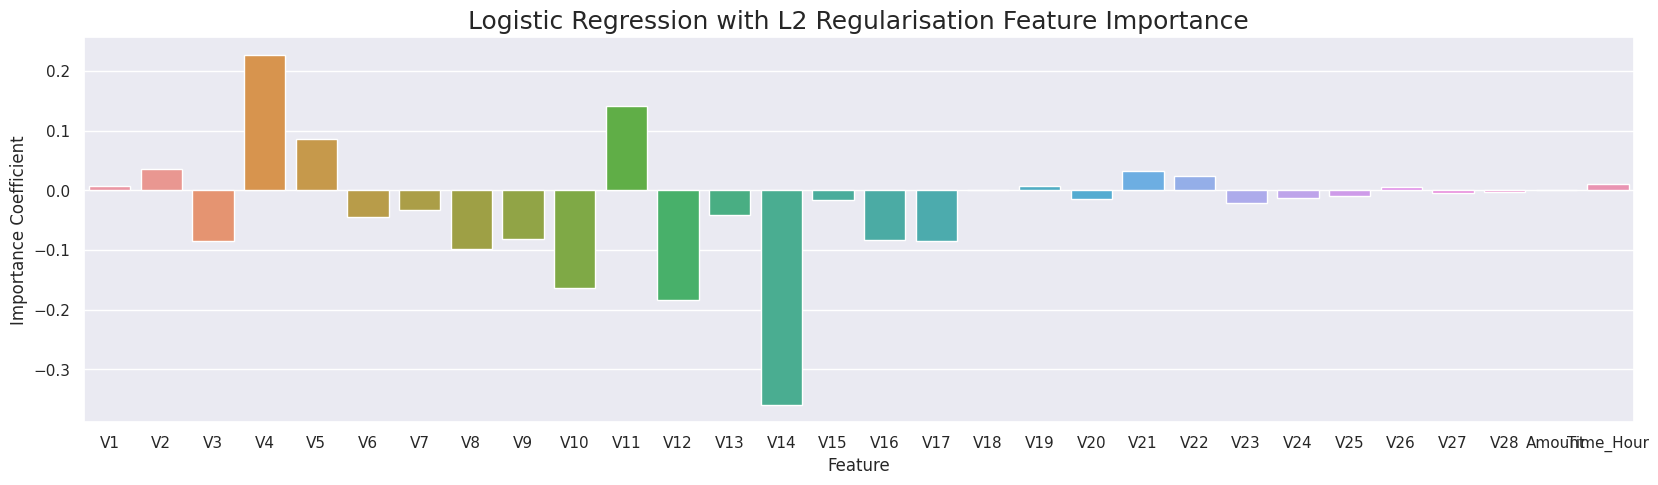

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

**Its is evident that V4, V11, v5 has + ve imporatnce whereas V14, V12, V10 seems to have -ve impact on the predictaions**

# As the models Oversampling data, take significantly longer time to run.

We will try with undersampling methods

In [ ]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler
#Define Oversampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9765620311715126
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[-0.03882767  0.04834244 -0.09318127  0.15098038  0.01215564 -0.04220613
  -0.05686099 -0.01742527 -0.04286873 -0.0967767   0.08411338 -0.11702895
  -0.02071001 -0.19276439 -0.01105513 -0.04374747 -0.05033877 -0.00460078
  -0.00944257  0.00115744  0.01111335 -0.00026568 -0.01599582 -0.00949079
   0.00384416 -0.00195644  0.00822132  0.00367493  0.00093195 -0.00274708]]
[-2.16526175]
{1.0: array([[0.55768412, 0.55810983, 0.56619838, 0.65006386, 0.82971477,
        0.91187739, 0.94891443, 0.97871435, 0.97999149, 0.97530864,
        0.97530864, 0.97530864, 0.97530864, 0.97530864, 0.97530864,
        0.97530864, 0.97530864, 0.97530864, 0.97530864, 0.97530864],
       [0.65605331, 0.65679378, 0.66679008, 0.73195113, 0.89041096,
        0.95372084, 0.97075157, 0.97741577, 0.97371344, 0.97001111,
        0.97001111, 0.97001111, 0.97001111, 0.970011

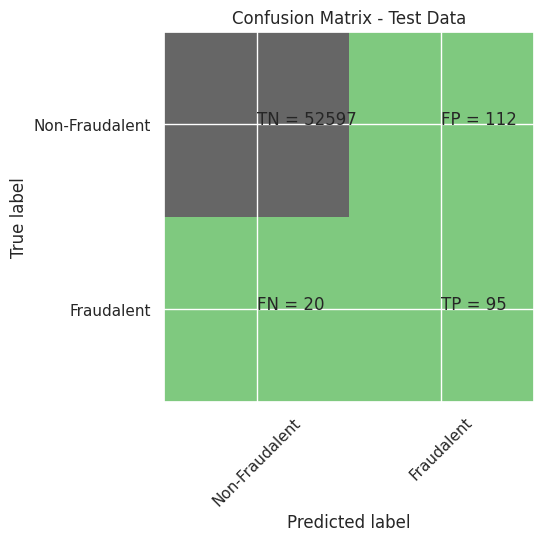

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52709
         1.0       0.46      0.83      0.59       115

    accuracy                           1.00     52824
   macro avg       0.73      0.91      0.79     52824
weighted avg       1.00      1.00      1.00     52824

Accuarcy of Logistic model with l1 regularisation : 0.997822959260942
Confusion Matrix


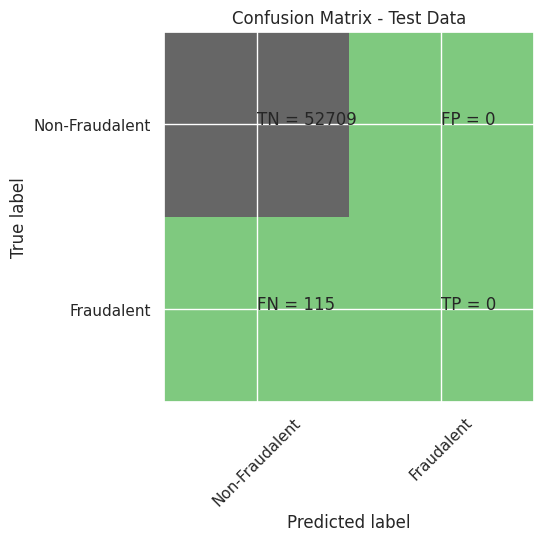

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52709
         1.0       0.00      0.00      0.00       115

    accuracy                           1.00     52824
   macro avg       0.50      0.50      0.50     52824
weighted avg       1.00      1.00      1.00     52824

l2 roc_value: 0.990486733145977
l2 threshold: 0.182707535067972
ROC for the test dataset 99.0%


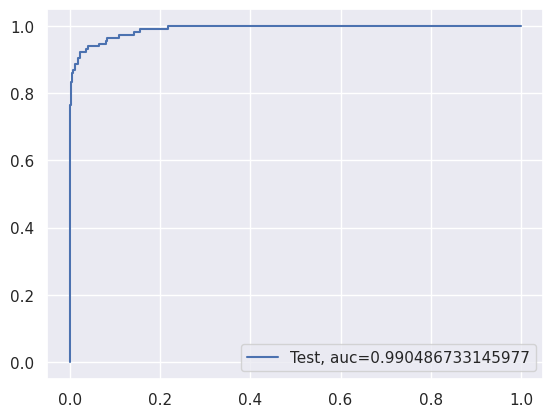

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


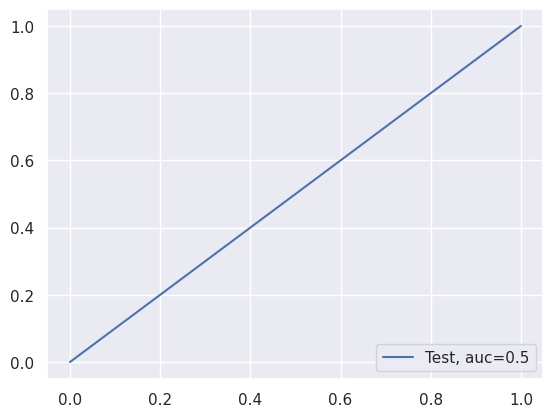

Time Taken by Model: --- 3.2810721397399902 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9796304709980312
Confusion Matrix


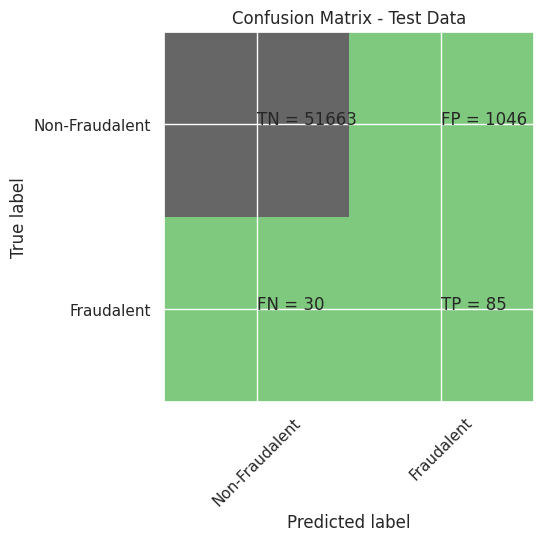

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     52709
         1.0       0.08      0.74      0.14       115

    accuracy                           0.98     52824
   macro avg       0.54      0.86      0.56     52824
weighted avg       1.00      0.98      0.99     52824

KNN roc_value: 0.9412965527708741
KNN threshold: 0.4
ROC for the test dataset 94.1%


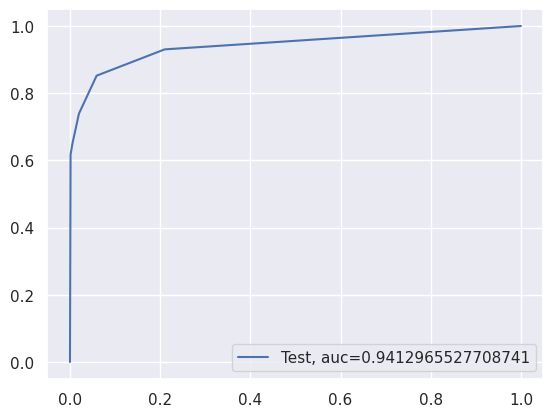

Time Taken by Model: --- 5.722022533416748 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9239928820233227
Confusion Matrix


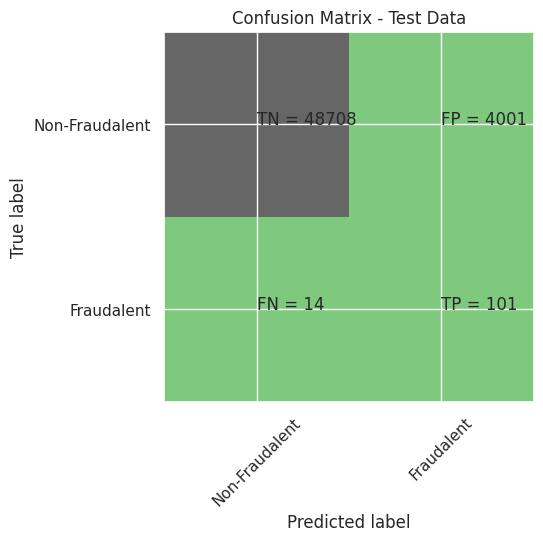

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     52709
         1.0       0.02      0.88      0.05       115

    accuracy                           0.92     52824
   macro avg       0.51      0.90      0.50     52824
weighted avg       1.00      0.92      0.96     52824

gini tree_roc_value: 0.9011767646314011
Tree threshold: 1.0
ROC for the test dataset 90.1%


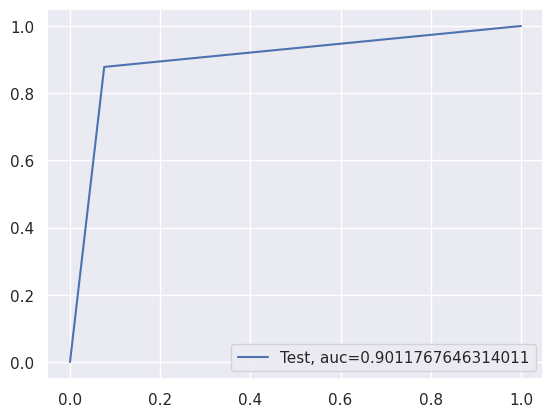

entropy score: 0.9278736937755566
Confusion Matrix


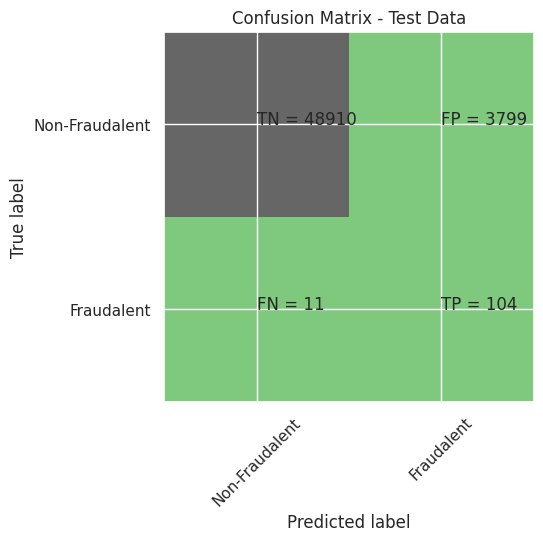

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     52709
         1.0       0.03      0.90      0.05       115

    accuracy                           0.93     52824
   macro avg       0.51      0.92      0.51     52824
weighted avg       1.00      0.93      0.96     52824

entropy tree_roc_value: 0.9161364241895824
Tree threshold: 1.0
ROC for the test dataset 91.6%


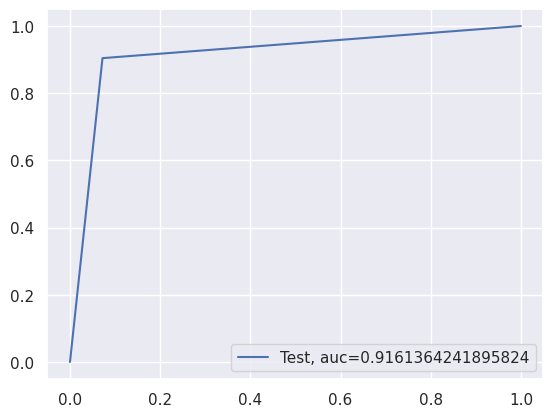

Time Taken by Model: --- 1.6125054359436035 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9895691352415569
Confusion Matrix


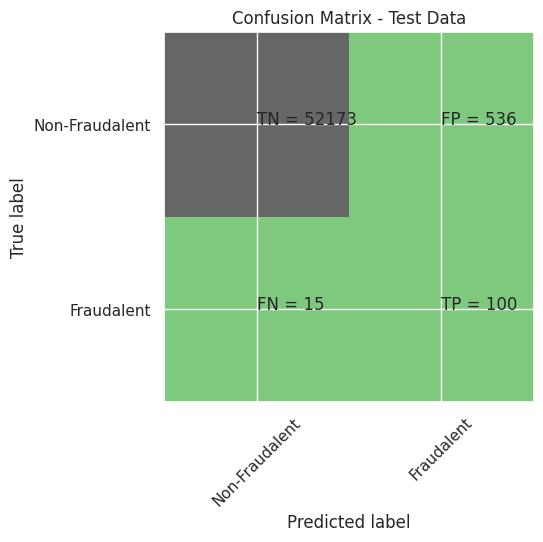

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     52709
         1.0       0.16      0.87      0.27       115

    accuracy                           0.99     52824
   macro avg       0.58      0.93      0.63     52824
weighted avg       1.00      0.99      0.99     52824

Random Forest roc_value: 0.9815424640788184
Random Forest threshold: 0.35
ROC for the test dataset 98.2%


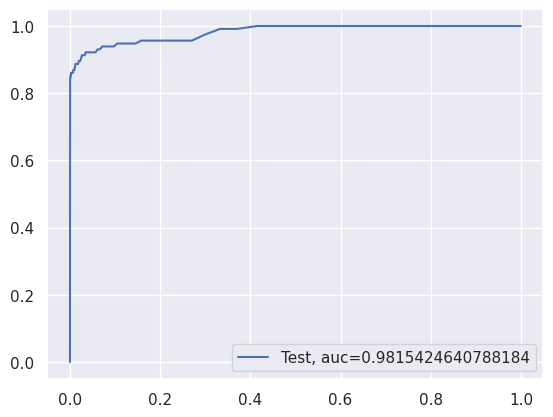

Time Taken by Model: --- 3.622451066970825 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9867295168862639
Confusion Matrix


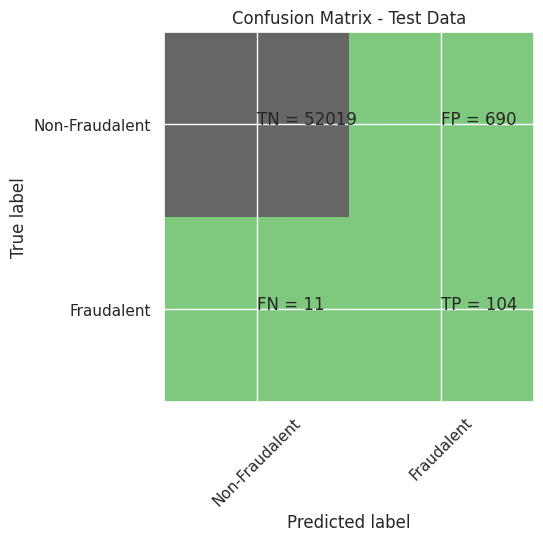

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     52709
         1.0       0.13      0.90      0.23       115

    accuracy                           0.99     52824
   macro avg       0.57      0.95      0.61     52824
weighted avg       1.00      0.99      0.99     52824

XGboost roc_value: 0.9901814474386439
XGBoost threshold: 0.08450857549905777
ROC for the test dataset 99.0%


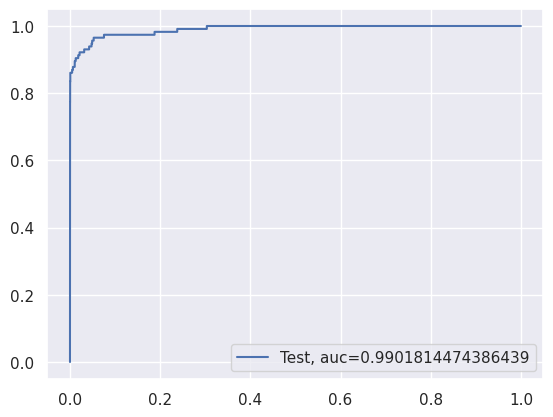

Time Taken by Model: --- 1.436969518661499 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.6676321369074663
Confusion Matrix


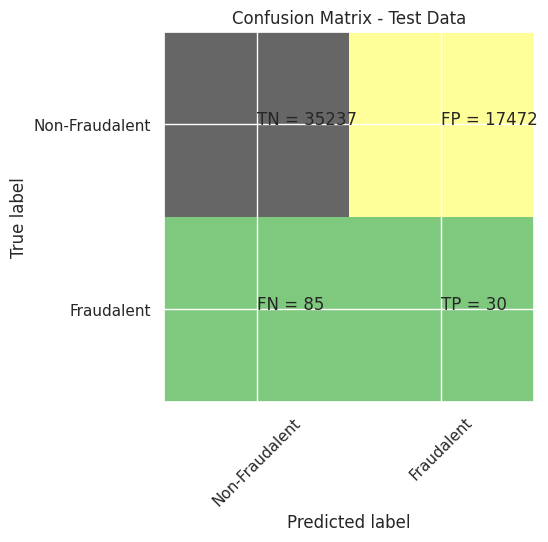

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80     52709
         1.0       0.00      0.26      0.00       115

    accuracy                           0.67     52824
   macro avg       0.50      0.46      0.40     52824
weighted avg       1.00      0.67      0.80     52824

SVM roc_value: 0.5635473522795793
SVM threshold: 0.3460501565038275
ROC for the test dataset 56.4%


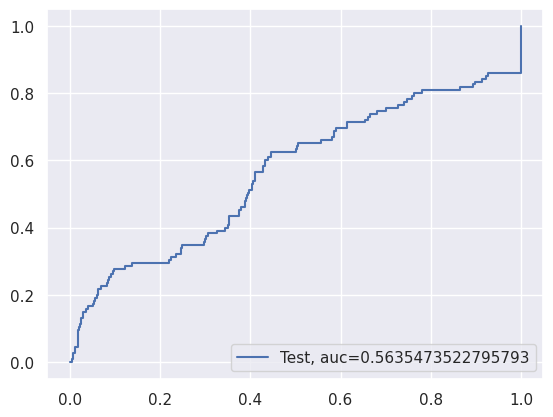

Time Taken by Model: --- 7.786978244781494 seconds ---


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Random Undersampling", X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [15]:
df_Results

Data_Imbalance_Handiling  \
0                  Power Transformer   
1                  Power Transformer   
2                  Power Transformer   
3                  Power Transformer   
4                  Power Transformer   
5                  Power Transformer   
6                  Power Transformer   
7                  Power Transformer   
8     RepeatedKFold Cross Validation   
9     RepeatedKFold Cross Validation   
10    RepeatedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
12    RepeatedKFold Cross Validation   
13    RepeatedKFold Cross Validation   
14    RepeatedKFold Cross Validation   
15    RepeatedKFold Cross Validation   
16  StratifiedKFold Cross Validation   
17  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
23  StratifiedKFold Cross Validation   
24              Random Undersampling   
25              Random Undersampling   
26              Random Undersampling   
27              Random Undersampling   
28              Random Undersampling   
29              Random Undersampling   
30              Random Undersampling   
31              Random Undersampling   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998999   0.966806   0.001289  
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
2                                          KNN  0.999298   0.900851   0.200000  
3                Tree Model with gini criteria  0.998806   0.859015   1.000000  
4             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999456   0.972998   0.000051  
7                                          SVM  0.998560   0.891311   0.000893  
8   Logistic Regression with L2 Regularisation  0.999298   0.984187   0.002163  
9   Logistic Regression with L1 Regularisation  0.999210   0.838287   0.103159  
10                                         KNN  0.999333   0.873343   0.200000  
11               Tree Model with gini criteria  0.999245   0.867640   1.000000  
12            Tree Model with entropy criteria  0.999228   0.890585   1.000000  
13                               Random Forest  0.999631   0.940580   0.010000  
14                                     XGBoost  0.999596   0.981064   0.000089  
15                                         SVM  0.998613   0.512649   0.003071  
16  Logistic Regression with L2 Regularisation  0.998771   0.983338   0.001569  
17  Logistic Regression with L1 Regularisation  0.998754   0.889076   0.021087  
18                                         KNN  0.999192   0.805746   0.200000  
19               Tree Model with gini criteria  0.998841   0.826249   1.000000  
20            Tree Model with entropy criteria  0.999017   0.821244   1.000000  
21                               Random Forest  0.999438   0.946472   0.010000  
22                                     XGBoost  0.999438   0.972813   0.000100  
23                                         SVM  0.998280   0.598230   0.001694  
24  Logistic Regression with L2 Regularisation  0.997501   0.990487   0.182708  
25  Logistic Regression with L1 Regularisation  0.997823   0.500000   1.500000  
26                                         KNN  0.979630   0.941297   0.400000  
27               Tree Model with gini criteria  0.923993   0.901177   1.000000  
28            Tree Model with entropy criteria  0.927874   0.916136   1.000000  
29                               Random Forest  0.989569   0.981542   0.350000  
30                                     XGBoost  0.986730   0.990181   0.084509  
31                                         SVM  0.667632   0.563547   0.346050

**It seems Undersampling has impoved the XGBoost Results**

# Model building with balancing Classes
**Perform class balancing with :**
* Random Oversampling
* SMOTE
* ADASYN

# Oversampling with RandomOverSampler and StratifiedKFold Cross Validation
**We will use Random Oversampling method to handle the class imbalance**

1 First we will display class distibution with and without the Random Oversampling.

2 Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

**Once we have train and test dataset we will feed the data to below models:**

* Logistic Regression with L2 Regularisation

* Logistic Regression with L1 Regularisation

* KNN

* Decision tree model with Gini criteria

* Decision tree model with Entropy criteria

* Random Forest

* XGBoost

* We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

* Once we get results for above model, we will compare the results and select model which provided best results for the Random oversampling techinique

In [16]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9867986784785906
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.33689406  0.38321098  0.2465603   0.8507552   0.33435284 -0.50694333
  -0.30737397 -0.34645848 -0.23111526 -0.61197108  0.28113058 -0.93864821
  -0.3635068  -0.85473947 -0.01964569 -0.51526692 -0.25513597 -0.07312966
   0.10199244 -0.66758054  0.10898359  0.62275883  0.11236389 -0.51320005
   0.21478413 -0.0624906  -0.30955252  0.17151758  0.0053528   0.05386888]]
[-5.34752142]
{1.0: array([[0.63566966, 0.75852781, 0.90369649, 0.95508968, 0.97683383,
        0.98438961, 0.98581062, 0.98620729, 0.98639103, 0.98646493,
        0.98647885, 0.98647885, 0.98647885, 0.98647885, 0.98647885,
        0.98647885, 0.98647885, 0.98647885, 0.98647885, 0.98647885],
       [0.64276211, 0.76477767, 0.90884559, 0.95766805, 0.9785103 ,
        0.98583437, 0.98705501, 0.98735895, 0.98757099, 0.98764885,
        0.98765648, 0.98765648, 0.98765648, 0.987656

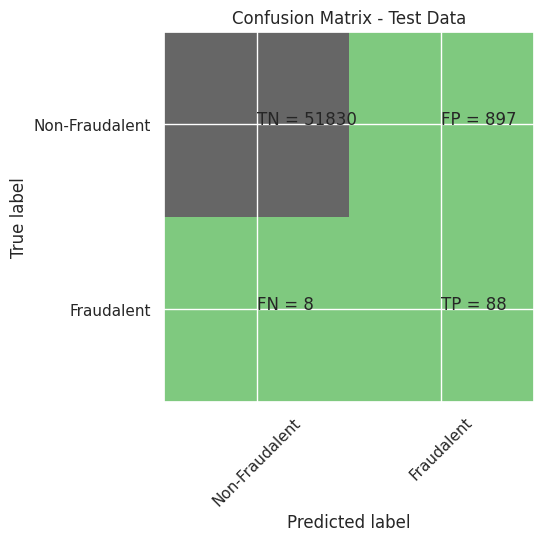

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     52727
         1.0       0.09      0.92      0.16        96

    accuracy                           0.98     52823
   macro avg       0.54      0.95      0.58     52823
weighted avg       1.00      0.98      0.99     52823

Accuarcy of Logistic model with l1 regularisation : 0.9981826098479829
Confusion Matrix


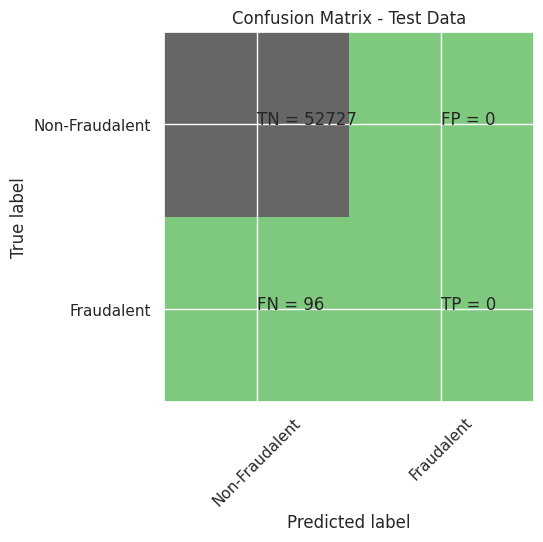

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52727
         1.0       0.00      0.00      0.00        96

    accuracy                           1.00     52823
   macro avg       0.50      0.50      0.50     52823
weighted avg       1.00      1.00      1.00     52823

l2 roc_value: 0.9819111492530709
l2 threshold: 0.5028230752942393
ROC for the test dataset 98.2%


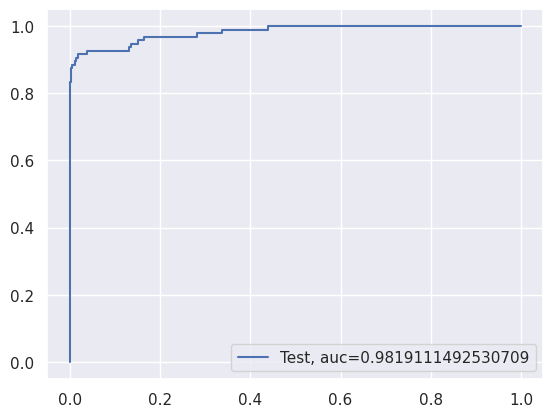

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


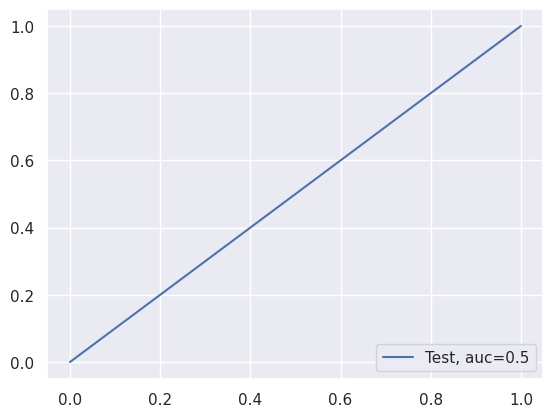

Time Taken by Model: --- 647.1702256202698 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.998163678700566
Confusion Matrix


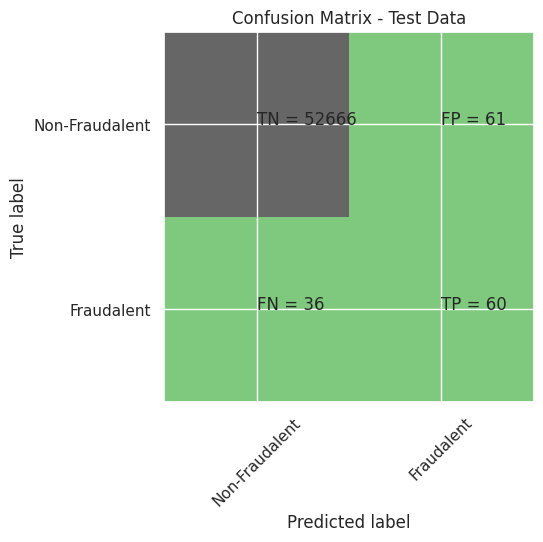

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52727
         1.0       0.50      0.62      0.55        96

    accuracy                           1.00     52823
   macro avg       0.75      0.81      0.78     52823
weighted avg       1.00      1.00      1.00     52823

KNN roc_value: 0.8119802236046049
KNN threshold: 0.6
ROC for the test dataset 81.2%


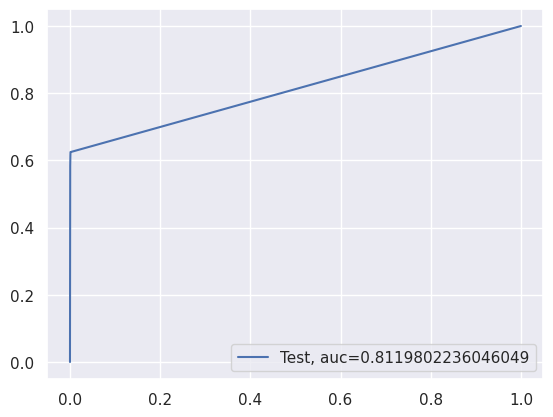

Time Taken by Model: --- 345.9835321903229 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989777180394904
Confusion Matrix


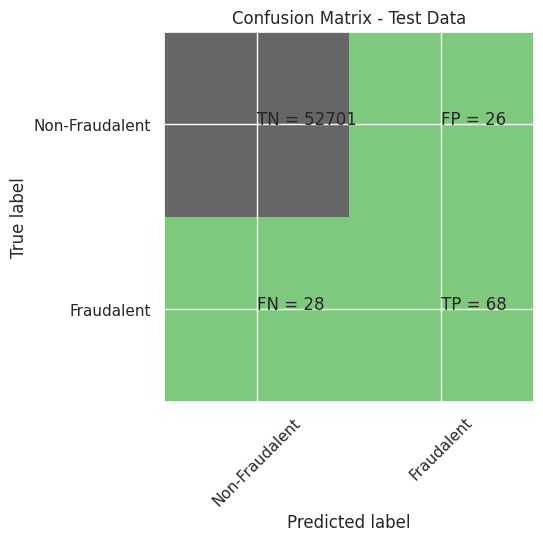

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52727
         1.0       0.72      0.71      0.72        96

    accuracy                           1.00     52823
   macro avg       0.86      0.85      0.86     52823
weighted avg       1.00      1.00      1.00     52823

gini tree_roc_value: 0.8539201136672547
Tree threshold: 1.0
ROC for the test dataset 85.4%


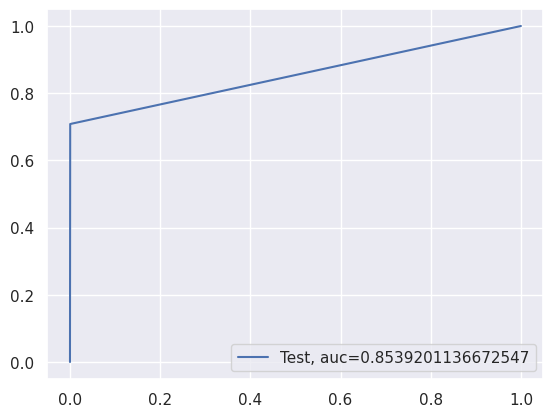

entropy score: 0.9990723737765747
Confusion Matrix


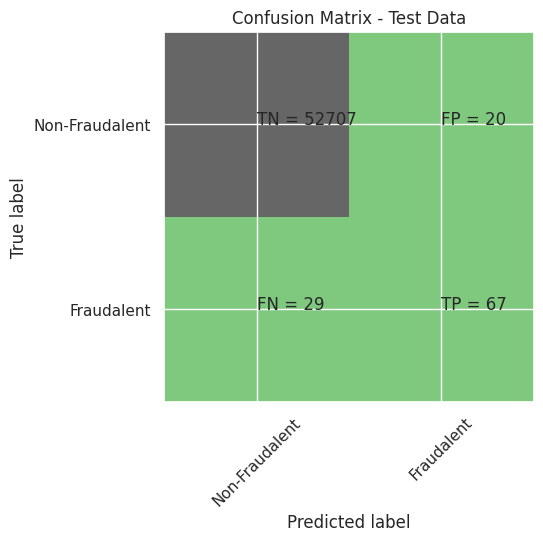

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52727
         1.0       0.77      0.70      0.73        96

    accuracy                           1.00     52823
   macro avg       0.88      0.85      0.87     52823
weighted avg       1.00      1.00      1.00     52823

entropy tree_roc_value: 0.8487686771799394
Tree threshold: 1.0
ROC for the test dataset 84.9%


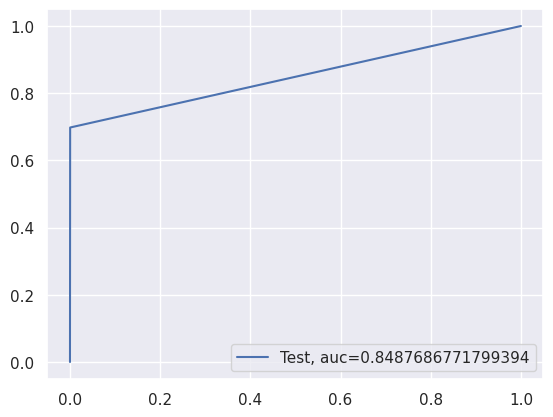

Time Taken by Model: --- 29.754592180252075 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995456524619957
Confusion Matrix


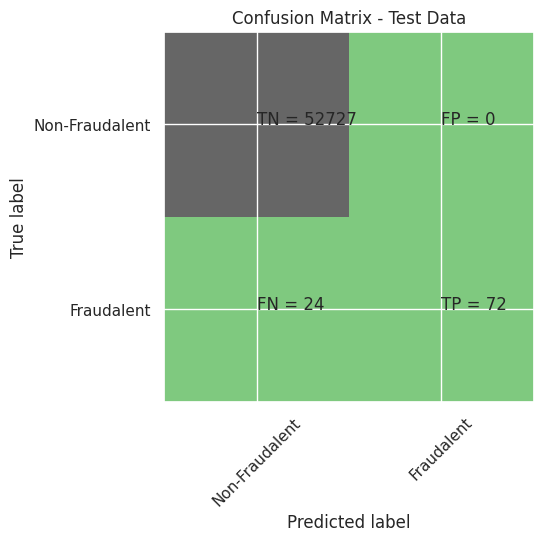

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52727
         1.0       1.00      0.75      0.86        96

    accuracy                           1.00     52823
   macro avg       1.00      0.88      0.93     52823
weighted avg       1.00      1.00      1.00     52823

Random Forest roc_value: 0.9604916598706545
Random Forest threshold: 0.01
ROC for the test dataset 96.0%


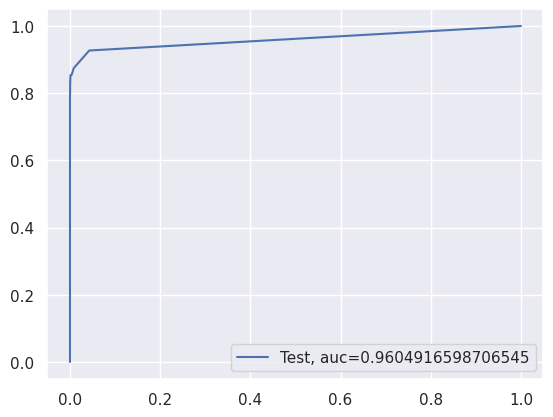

Time Taken by Model: --- 222.95907831192017 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9996024459042463
Confusion Matrix


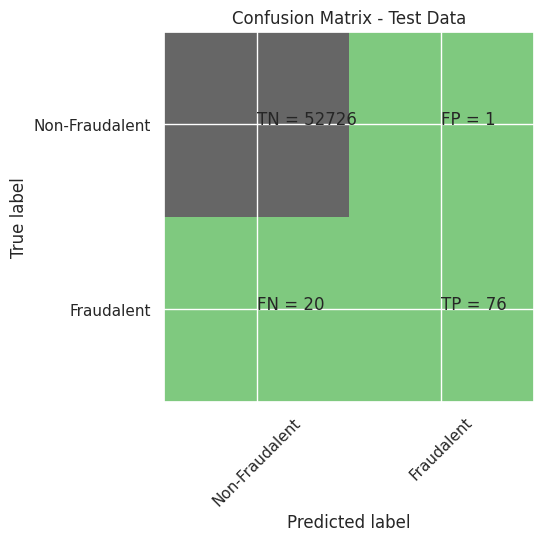

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52727
         1.0       0.99      0.79      0.88        96

    accuracy                           1.00     52823
   macro avg       0.99      0.90      0.94     52823
weighted avg       1.00      1.00      1.00     52823

XGboost roc_value: 0.9865028037501343
XGBoost threshold: 0.00011693216947605833
ROC for the test dataset 98.7%


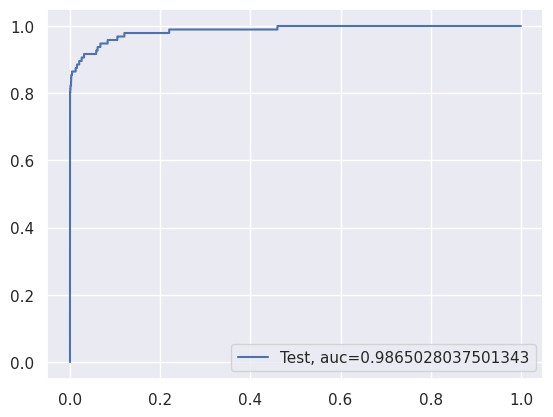

Time Taken by Model: --- 166.77595782279968 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#df_Results = buildAndRunSVMModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [18]:
df_Results

Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                 RepeatedKFold Cross Validation   
9                 RepeatedKFold Cross Validation   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16              StratifiedKFold Cross Validation   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21              StratifiedKFold Cross Validation   
22              StratifiedKFold Cross Validation   
23              StratifiedKFold Cross Validation   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28                          Random Undersampling   
29                          Random Undersampling   
30                          Random Undersampling   
31                          Random Undersampling   
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    
34  Random Oversampling with StratifiedKFold CV    
35  Random Oversampling with StratifiedKFold CV    
36  Random Oversampling with StratifiedKFold CV    
37  Random Oversampling with StratifiedKFold CV    
38  Random Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998999   0.966806   0.001289  
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
2                                          KNN  0.999298   0.900851   0.200000  
3                Tree Model with gini criteria  0.998806   0.859015   1.000000  
4             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999456   0.972998   0.000051  
7                                          SVM  0.998560   0.891311   0.000893  
8   Logistic Regression with L2 Regularisation  0.999298   0.984187   0.002163  
9   Logistic Regression with L1 Regularisation  0.999210   0.838287   0.103159  
10                                         KNN  0.999333   0.873343   0.200000  
11               Tree Model with gini criteria  0.999245   0.867640   1.000000  
12            Tree Model with entropy criteria  0.999228   0.890585   1.000000  
13                               Random Forest  0.999631   0.940580   0.010000  
14                                     XGBoost  0.999596   0.981064   0.000089  
15                                         SVM  0.998613   0.512649   0.003071  
16  Logistic Regression with L2 Regularisation  0.998771   0.983338   0.001569  
17  Logistic Regression with L1 Regularisation  0.998754   0.889076   0.021087  
18                                         KNN  0.999192   0.805746   0.200000  
19               Tree Model with gini criteria  0.998841   0.826249   1.000000  
20            Tree Model with entropy criteria  0.999017   0.821244   1.000000  
21                               Random Forest  0.999438   0.946472   0.010000  
22                                     XGBoost  0.999438   0.972813   0.000100  

# Results for Random Oversampling:
**Random Oversampling seems to have +ve change in prediction for XGBoost** Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

**Similarly explore other algorithms on balanced dataset by building models like:**
* KNN
* SVM
* Decision Tree
* Random Forest
* XGBoost

# Oversampling with SMOTE Oversamplng
**We will use SMOTE Oversampling method to handle the class imbalance**

1 First we will display class distibution with and without the SMOTE Oversampling.

2 Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:

1 Logistic Regression with L2 Regularisation

2 Logistic Regression with L1 Regularisation

3 KNN

4 Decision tree model with Gini criteria

5 Decision tree model with Entropy criteria

6 Random Forest

7 XGBoost

8 We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

9 Once we get results for above model, we will compare the results and select model which provided best results for the SMOTE oversampling techinique

**Print the class distribution after applying SMOTE**

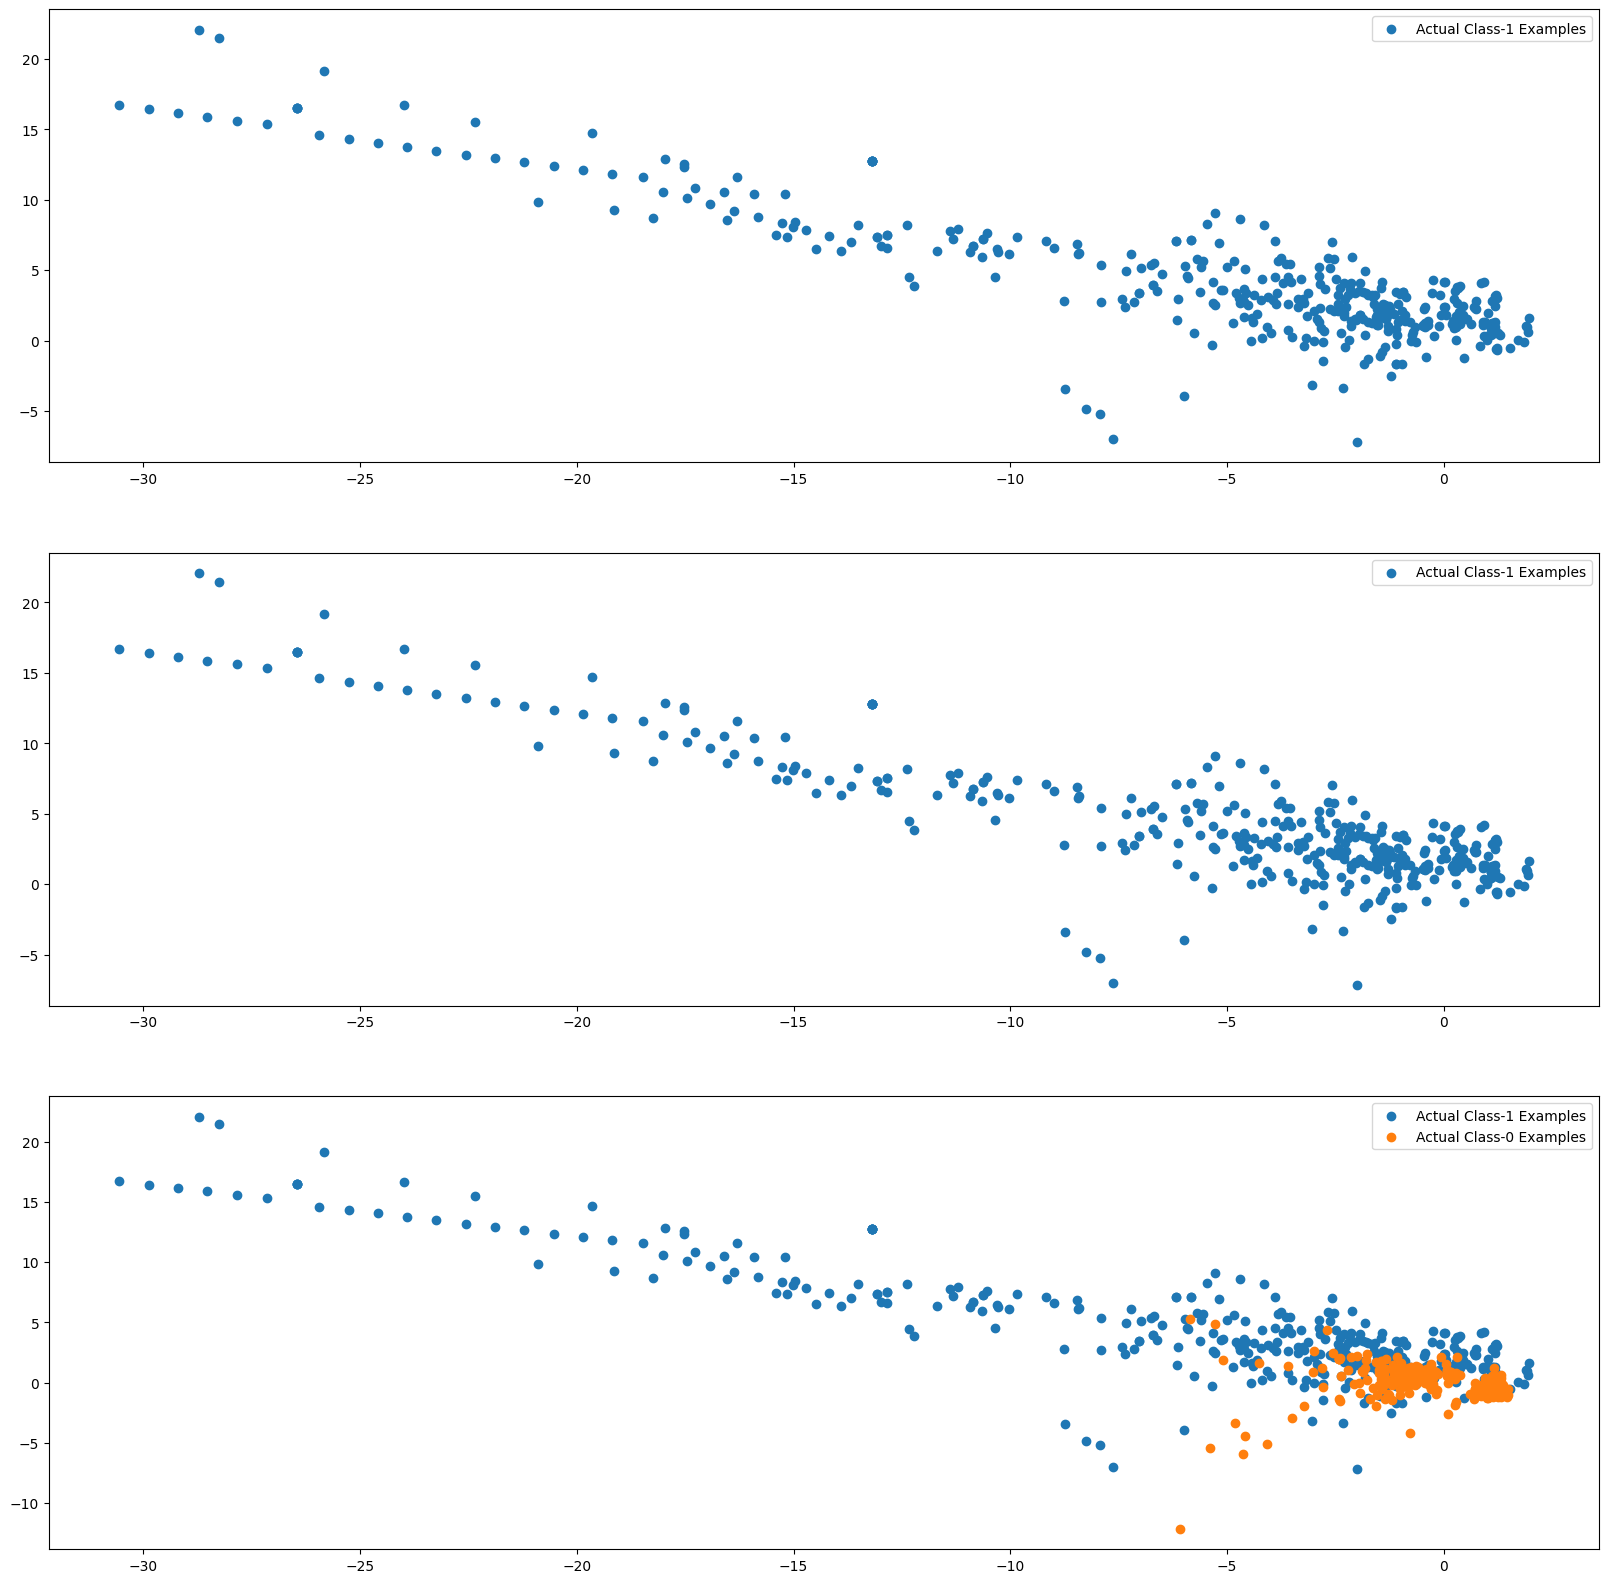

In [20]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
SMOTE = over_sampling.SMOTE(random_state=0)

X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train) 

#Create dataframe
#X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


#Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [ ]:
X_train_Smote["V26"] = X_train_Smote["V26"].astype("float64")
X_test["V26"] = X_test["V26"].astype("float64")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46462 entries, 154587 to 232309
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   V1         46462 non-null  float64
 1   V2         46462 non-null  float64
 2   V3         46462 non-null  float64
 3   V4         46462 non-null  float64
 4   V5         46462 non-null  float64
 5   V6         46462 non-null  float64
 6   V7         46462 non-null  float64
 7   V8         46462 non-null  float64
 8   V9         46462 non-null  float64
 9   V10        46462 non-null  float64
 10  V11        46462 non-null  float64
 11  V12        46462 non-null  float64
 12  V13        46462 non-null  float64
 13  V14        46462 non-null  float64
 14  V15        46462 non-null  float64
 15  V16        46462 non-null  float64
 16  V17        46462 non-null  float64
 17  V18        46462 non-null  float64
 18  V19        46462 non-null  float64
 19  V20        46462 non-null  float64
 20  

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9927821802352247
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.59082984  0.57713767  0.70253141  0.89366465  0.32043017 -0.88272416
  -0.54861387 -0.5412732  -0.43160179 -0.86898705  0.64900087 -1.0905553
  -0.33394937 -1.49799089  0.05074631 -0.71141534 -0.75236407 -0.25181041
   0.07872425 -0.97323219  0.01592463  0.54492652  0.16611892 -1.24224747
   0.78259335 -0.17479501 -0.05007518  0.54884945  0.00716293  0.00976829]]
[-5.20395161]
{1.0: array([[0.67319617, 0.79569514, 0.91726999, 0.96605645, 0.9865626 ,
        0.990018  , 0.99059986, 0.99170783, 0.99226213, 0.99239851,
        0.99241734, 0.99241734, 0.99241734, 0.99241734, 0.99241734,
        0.99241734, 0.99241734, 0.99241734, 0.99241734, 0.99241734],
       [0.66886291, 0.79357555, 0.91716236, 0.96691357, 0.98680539,
        0.99026515, 0.99103788, 0.99223477, 0.99279728, 0.99293528,
        0.99295552, 0.99295552, 0.99295552, 0.9929555

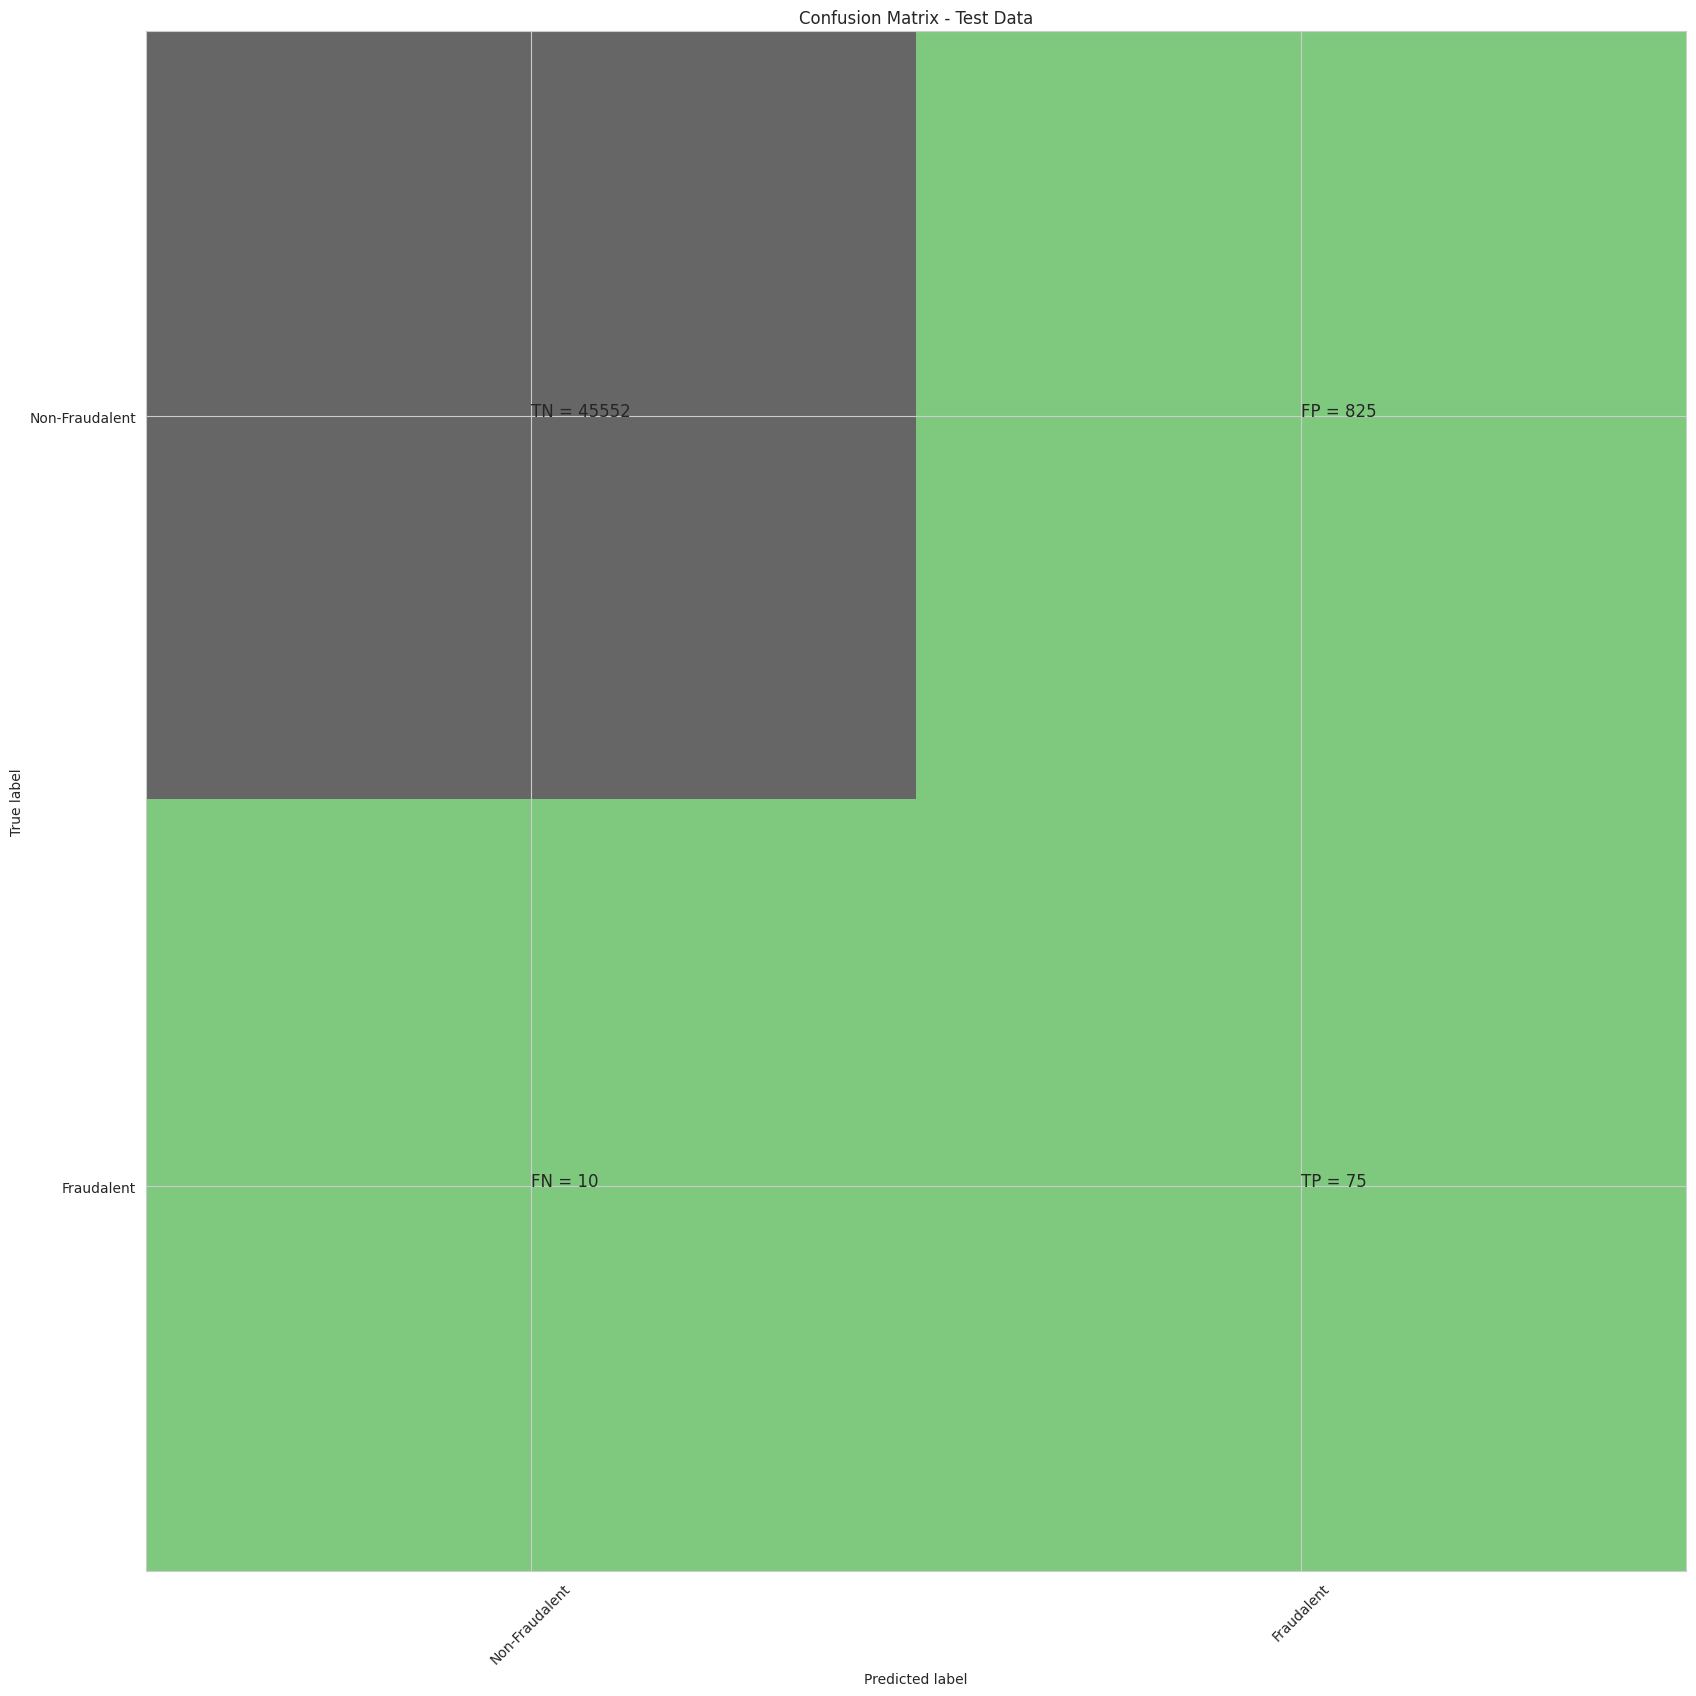

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     46377
         1.0       0.08      0.88      0.15        85

    accuracy                           0.98     46462
   macro avg       0.54      0.93      0.57     46462
weighted avg       1.00      0.98      0.99     46462

Accuarcy of Logistic model with l1 regularisation : 0.998170547974689
Confusion Matrix


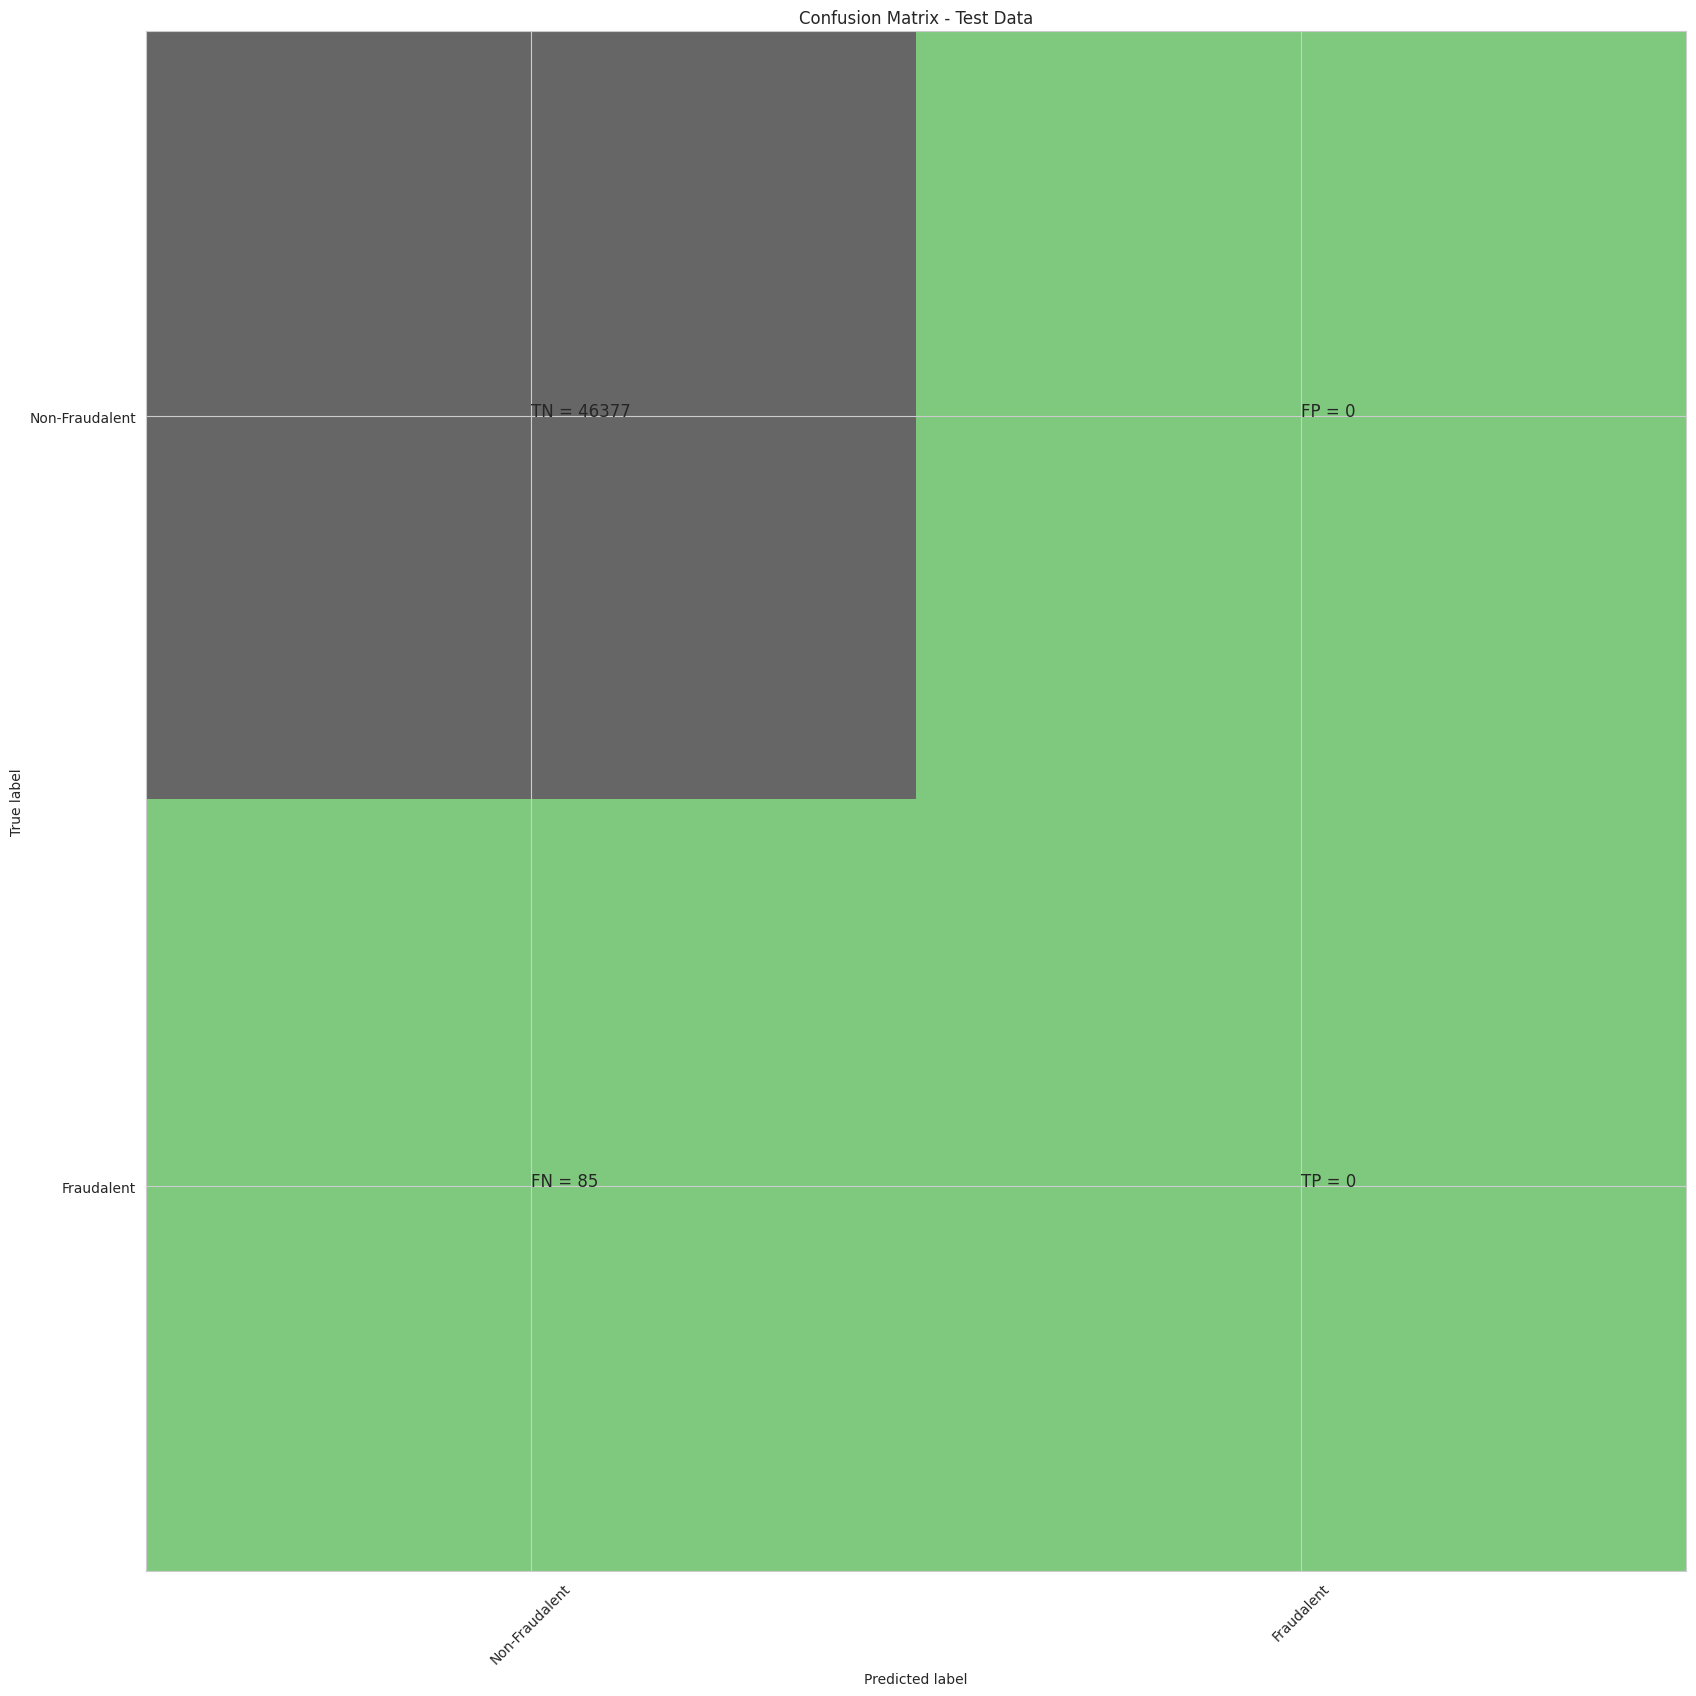

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46377
         1.0       0.00      0.00      0.00        85

    accuracy                           1.00     46462
   macro avg       0.50      0.50      0.50     46462
weighted avg       1.00      1.00      1.00     46462

l2 roc_value: 0.9658253520698012
l2 threshold: 0.45364498450569035
ROC for the test dataset 96.6%


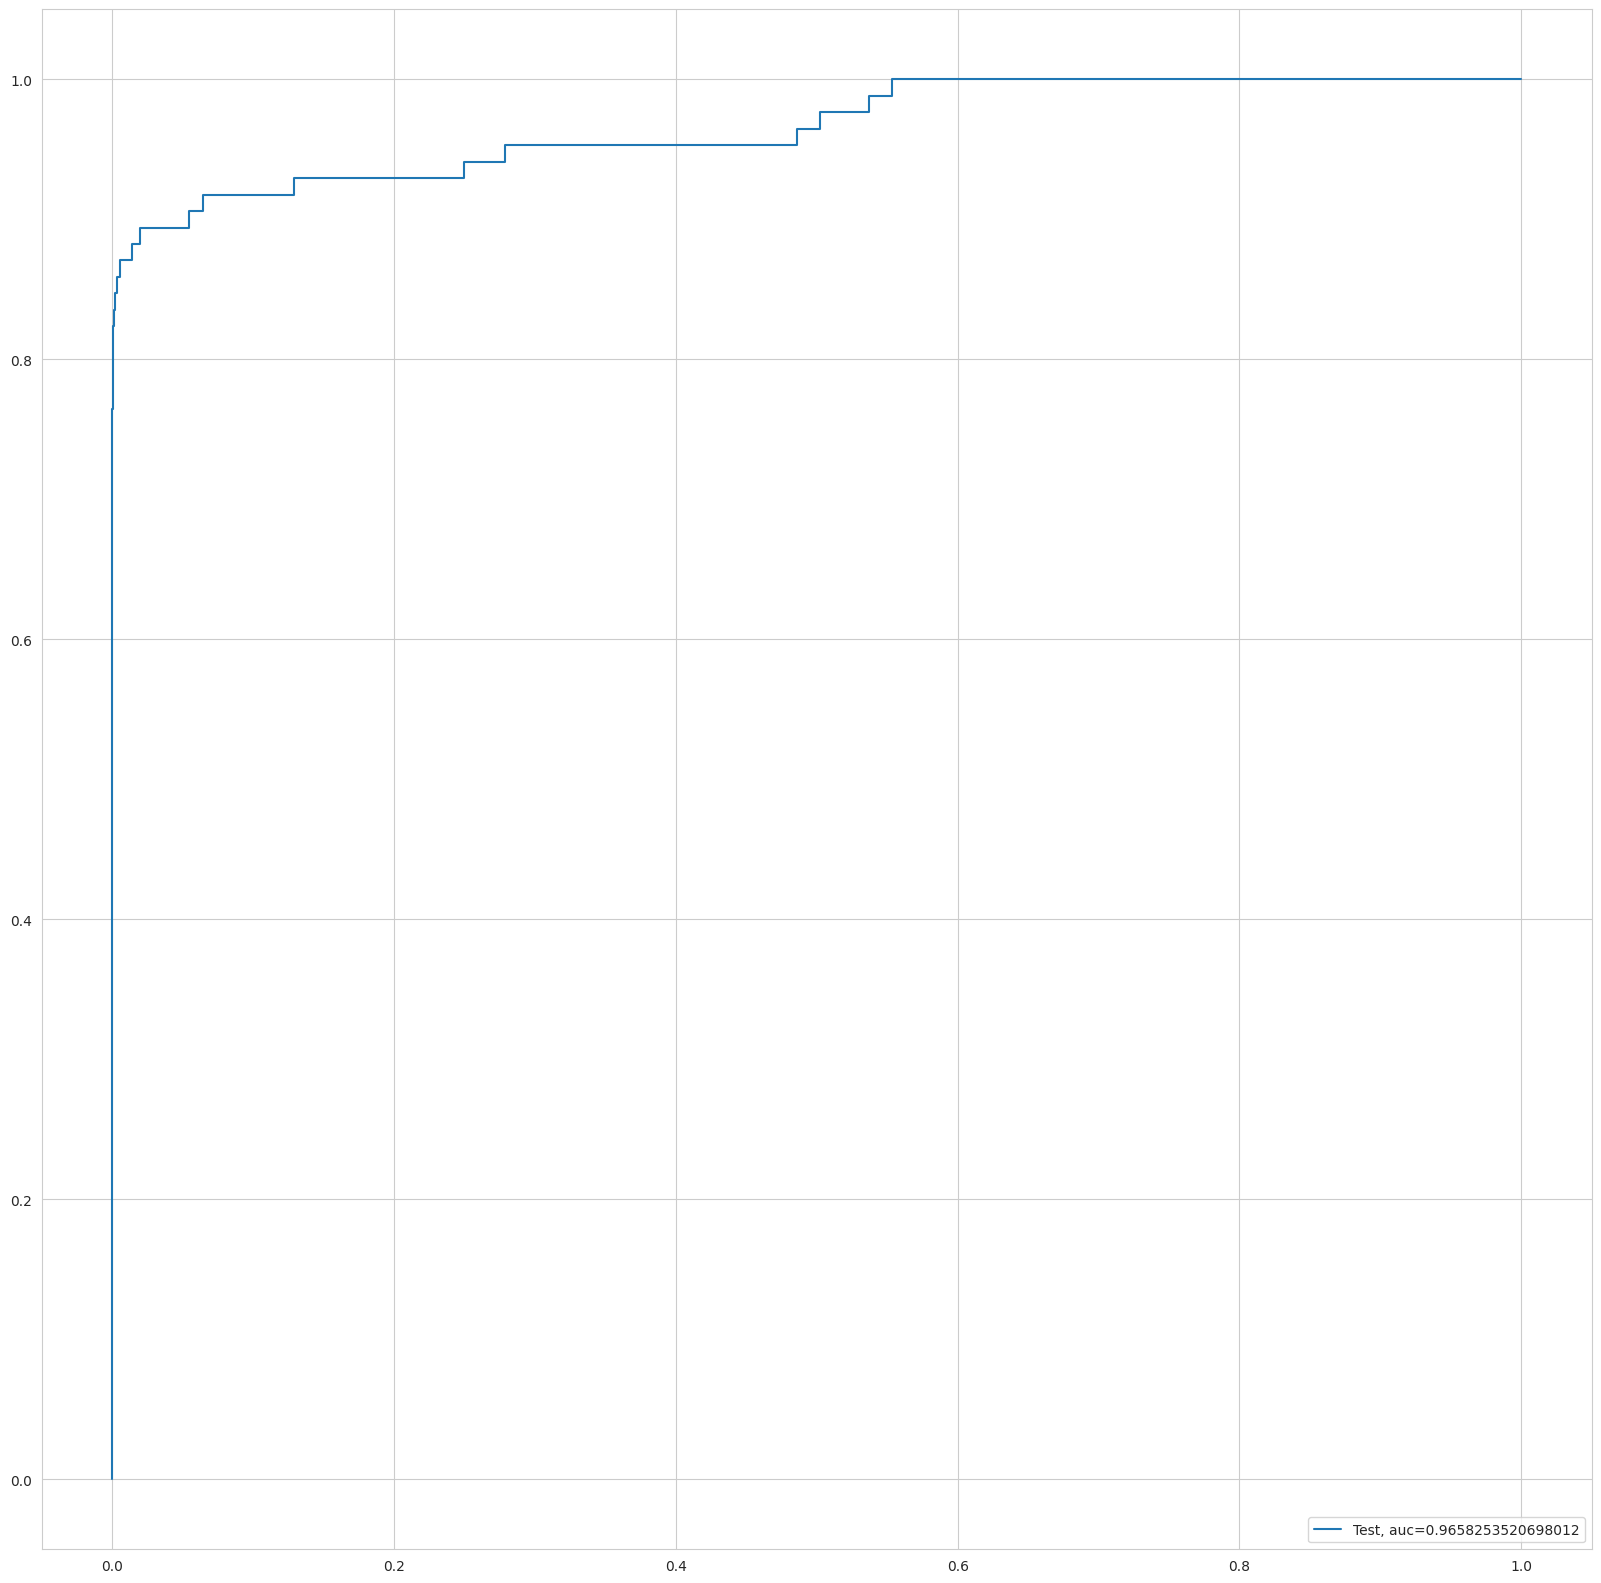

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


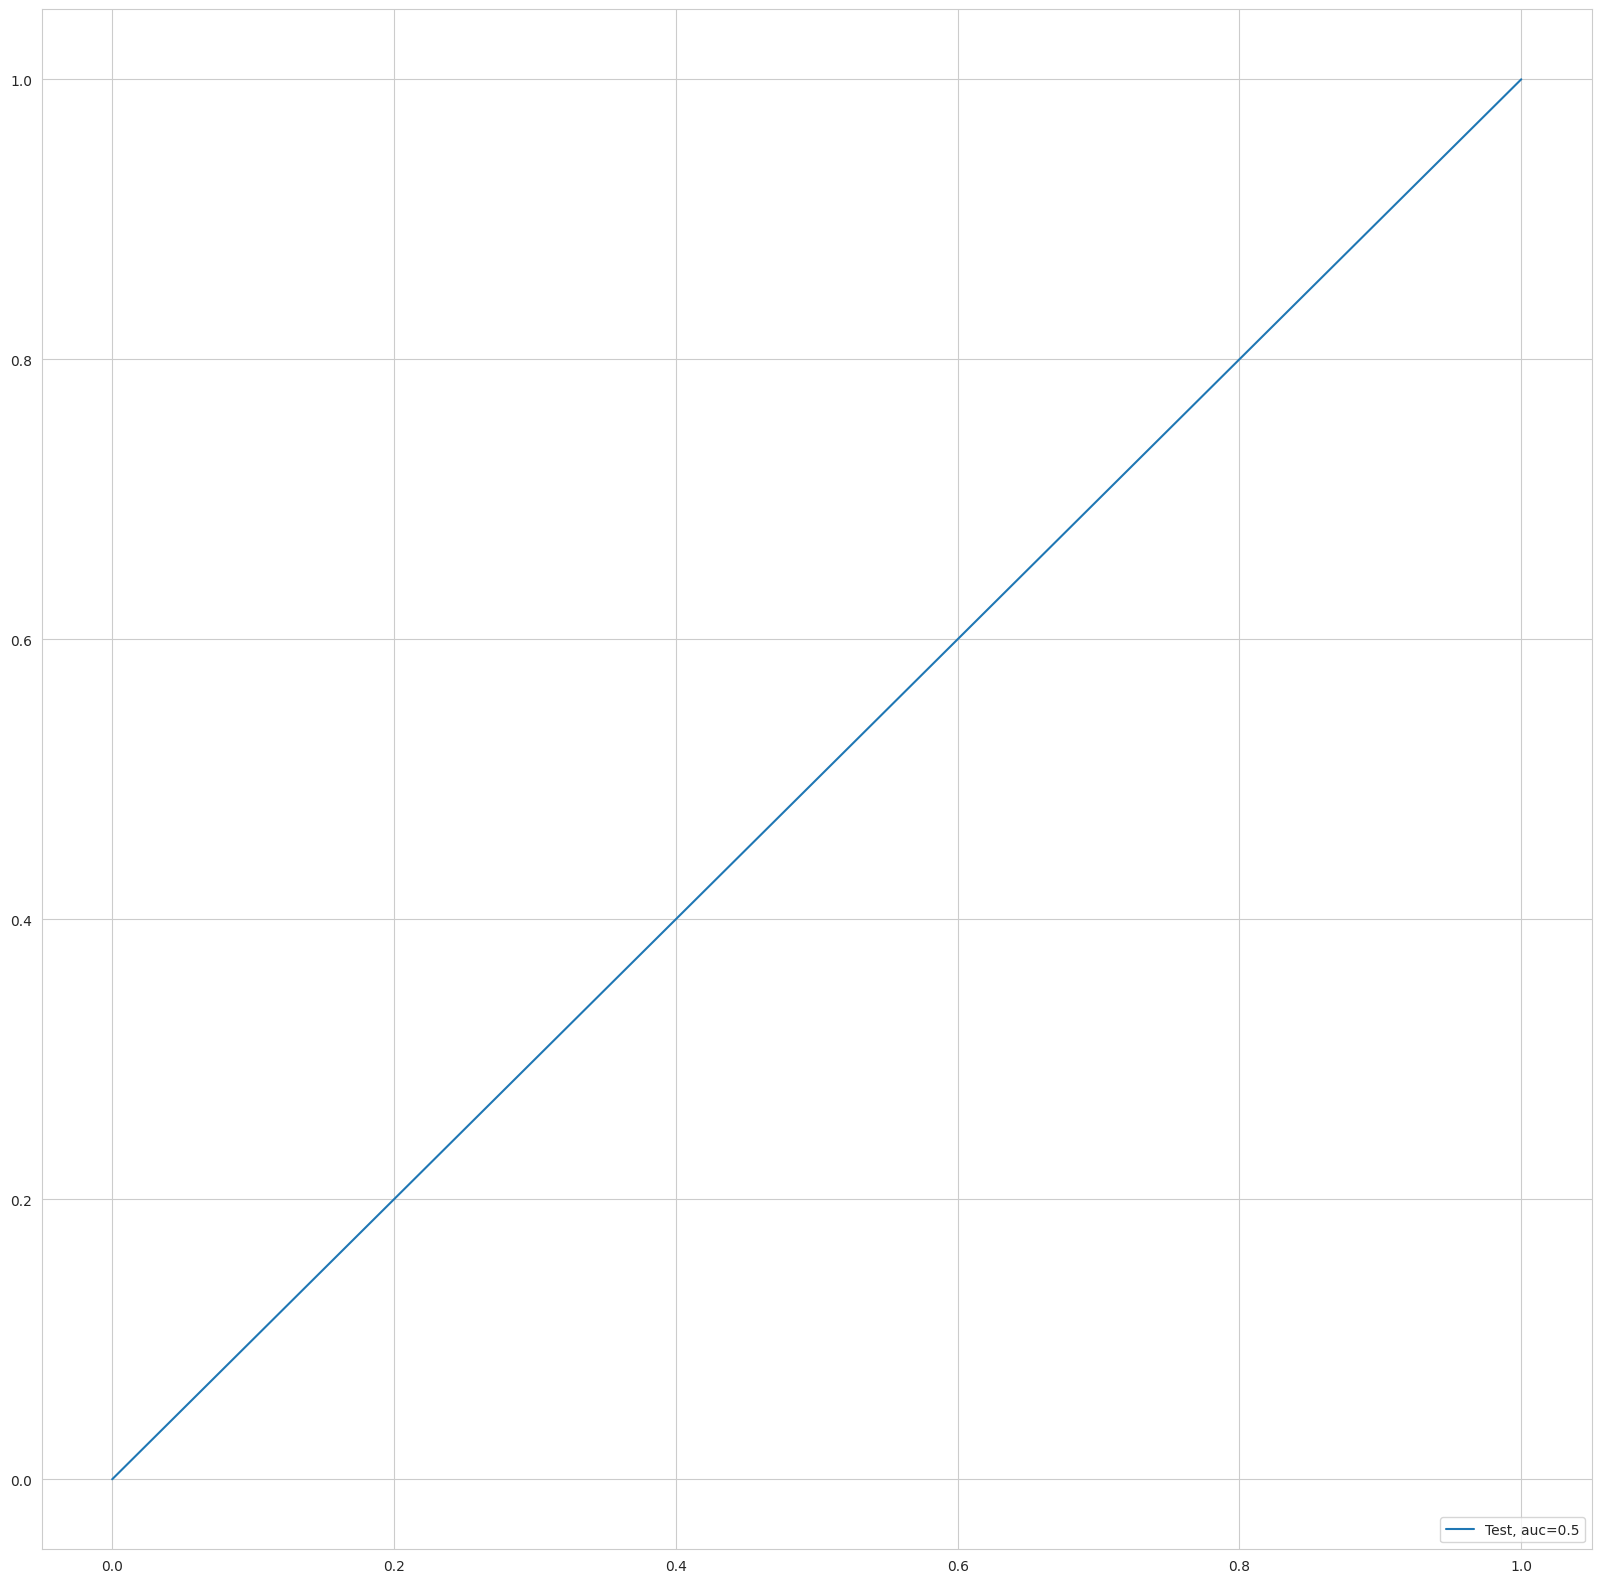

Time Taken by Model: --- 611.1230969429016 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9947914424691146
Confusion Matrix


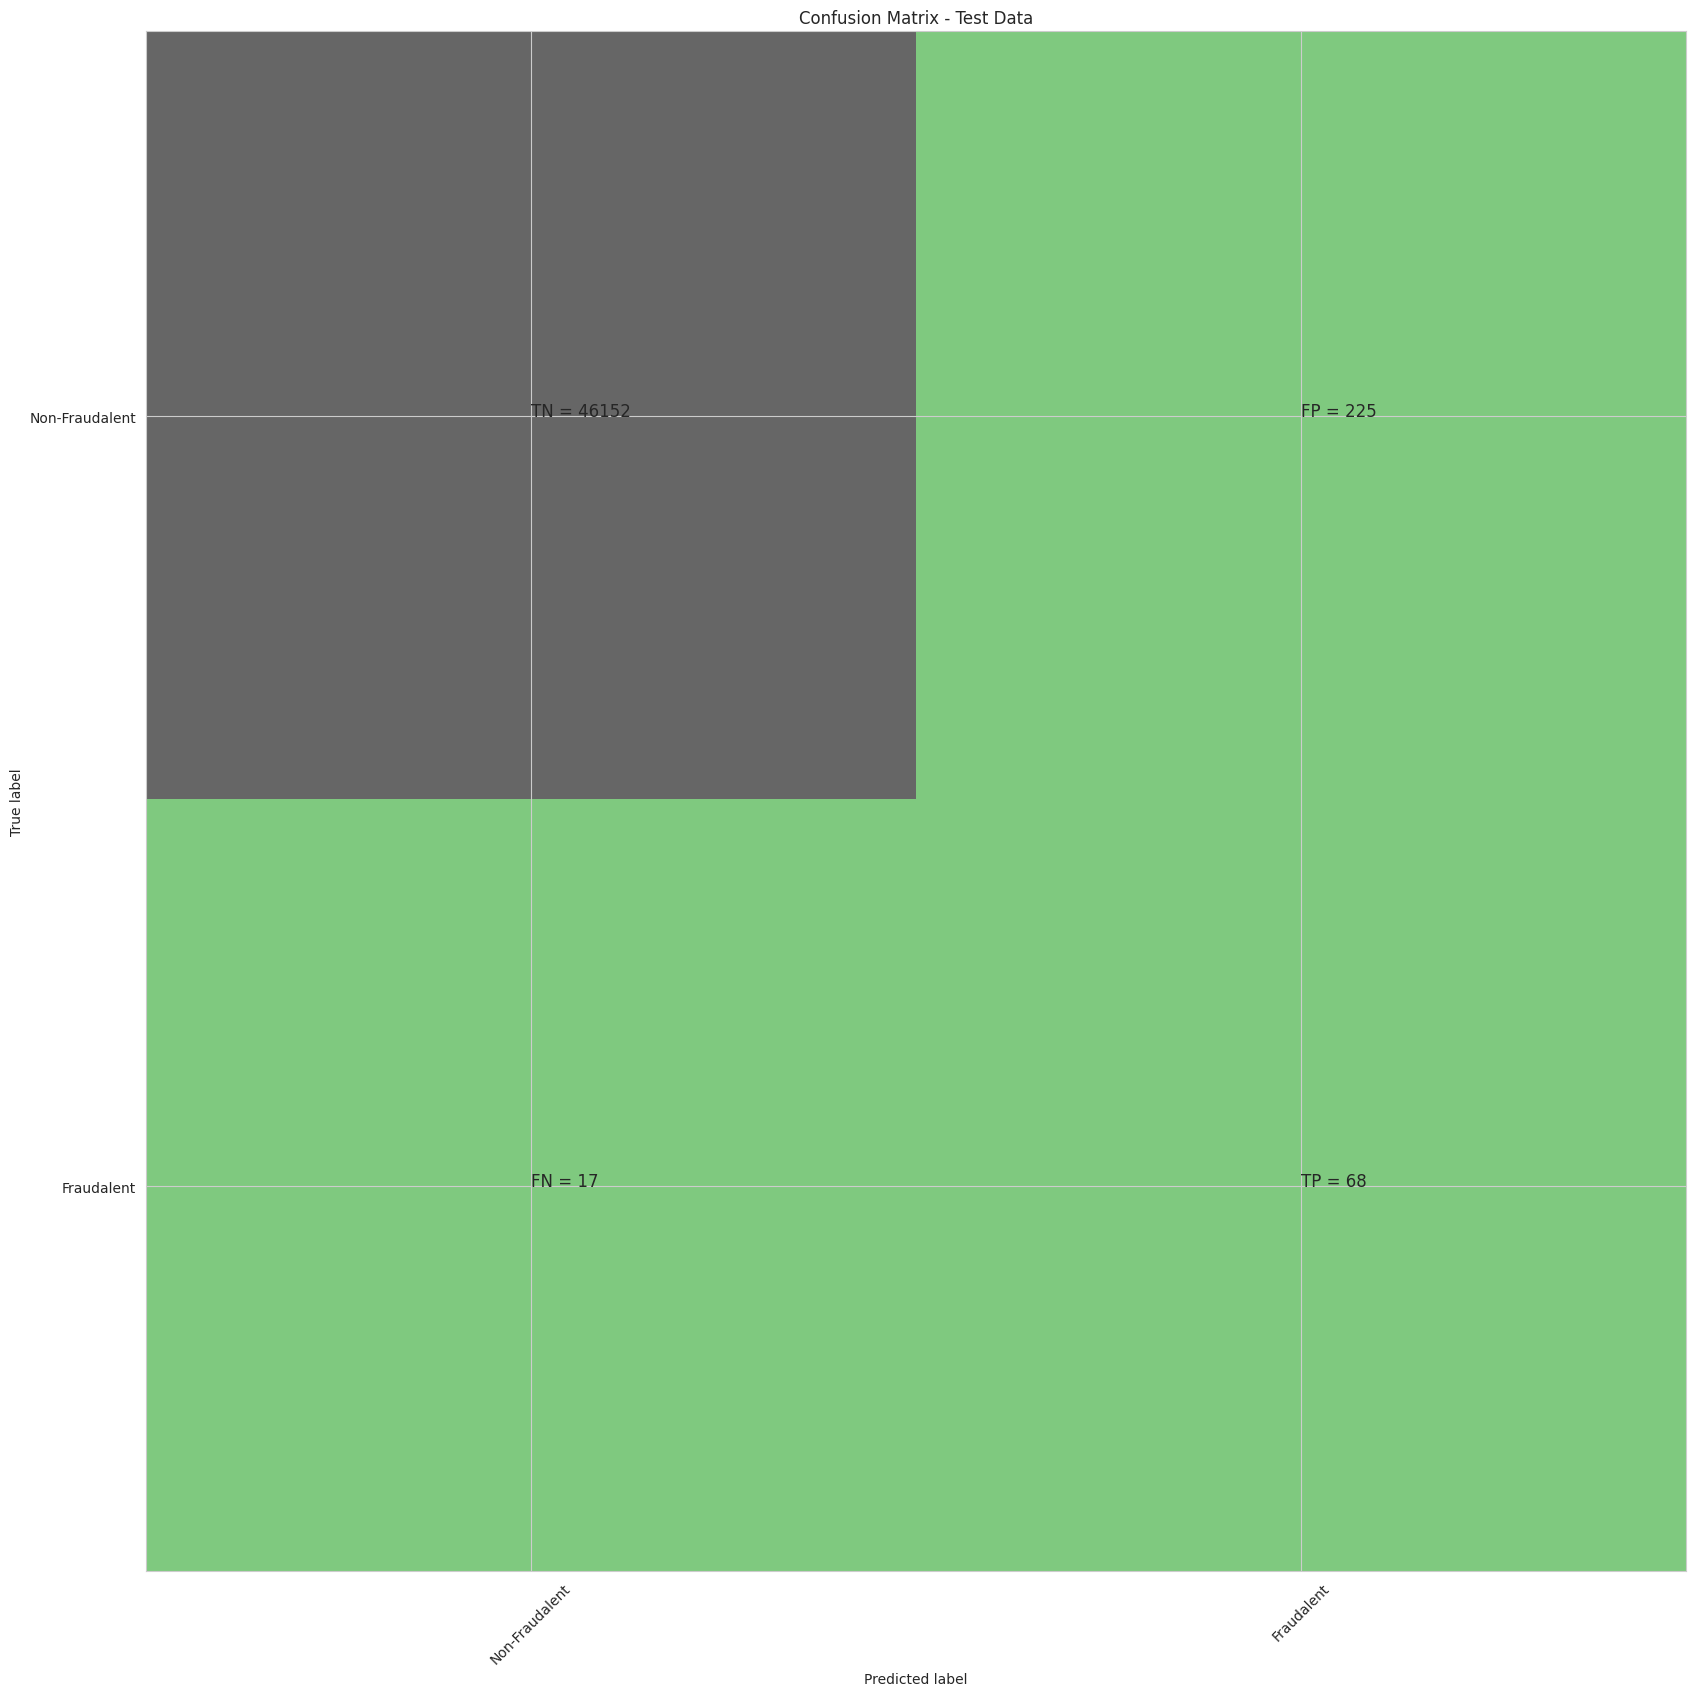

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46377
         1.0       0.23      0.80      0.36        85

    accuracy                           0.99     46462
   macro avg       0.62      0.90      0.68     46462
weighted avg       1.00      0.99      1.00     46462

KNN roc_value: 0.9159337349015549
KNN threshold: 0.2
ROC for the test dataset 91.6%


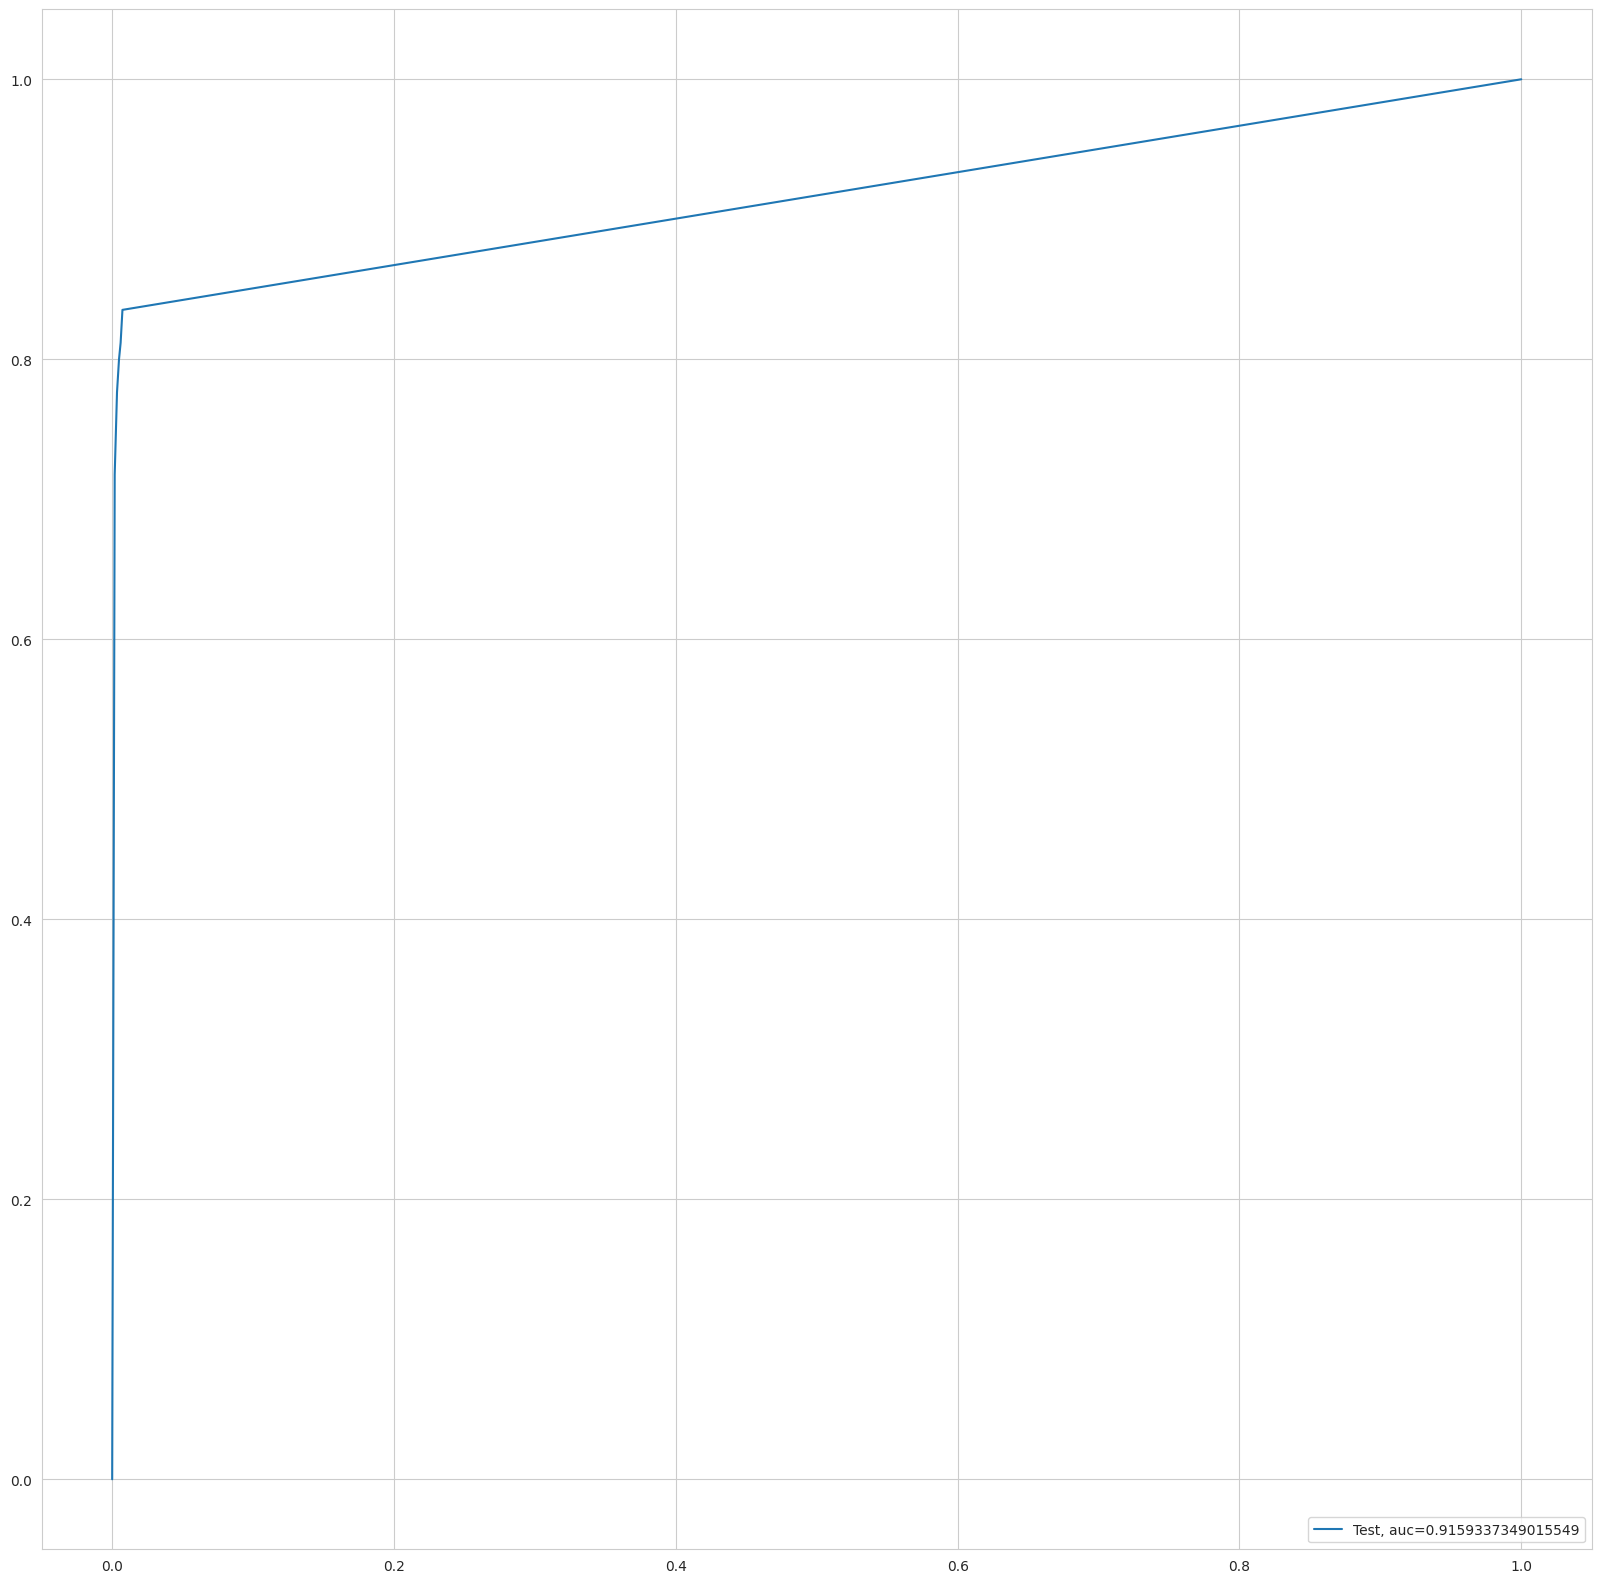

Time Taken by Model: --- 334.563693523407 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9891524256381559
Confusion Matrix


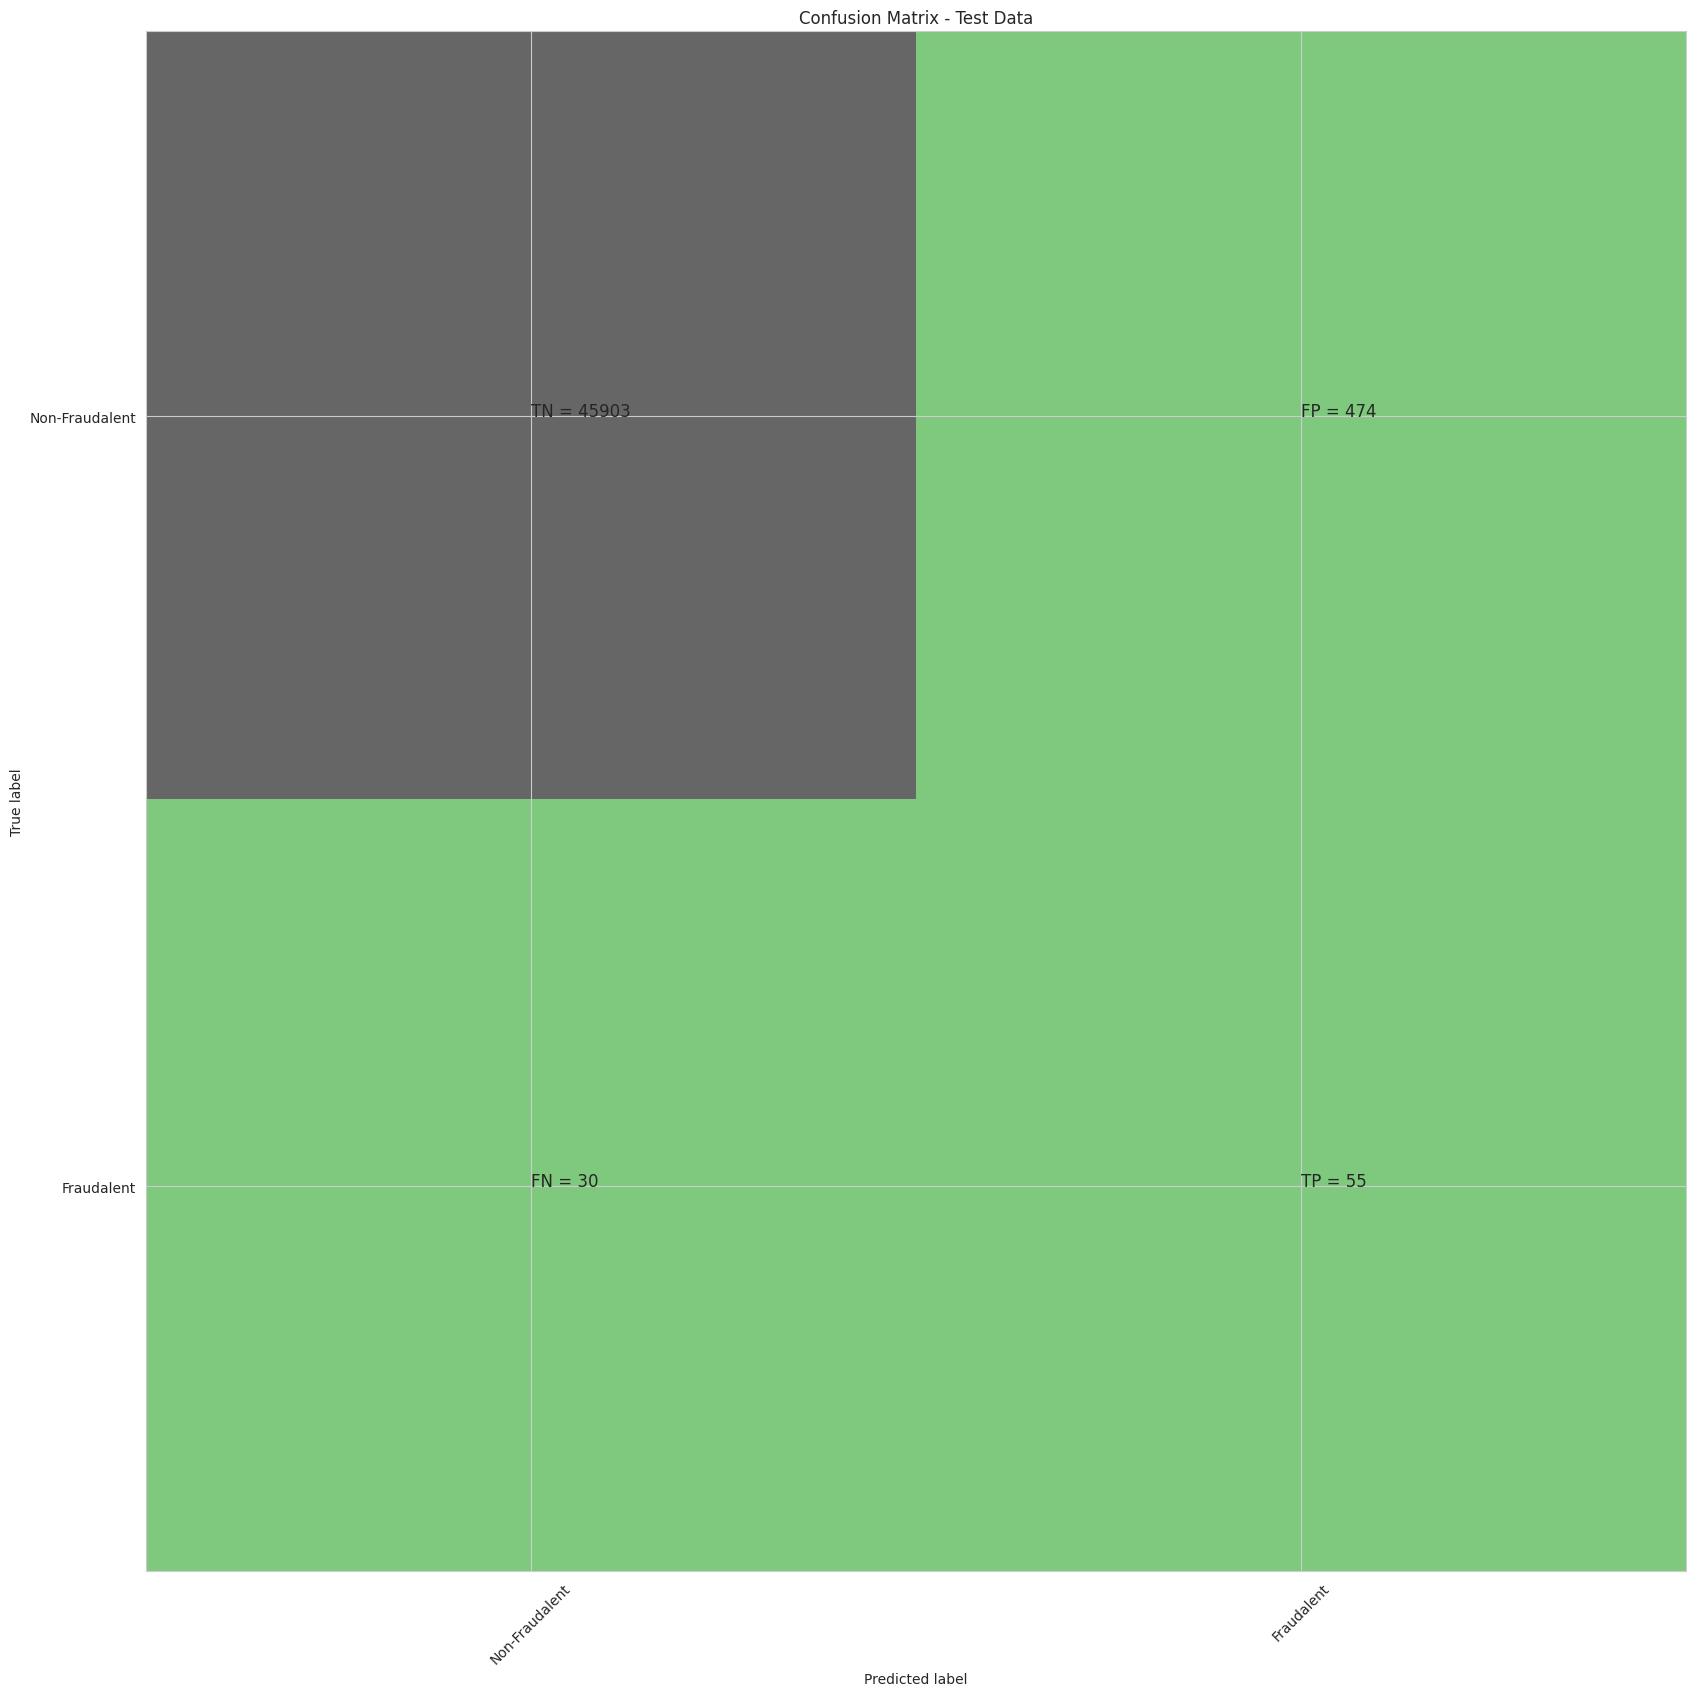

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     46377
         1.0       0.10      0.65      0.18        85

    accuracy                           0.99     46462
   macro avg       0.55      0.82      0.59     46462
weighted avg       1.00      0.99      0.99     46462

gini tree_roc_value: 0.818419120025266
Tree threshold: 1.0
ROC for the test dataset 81.8%


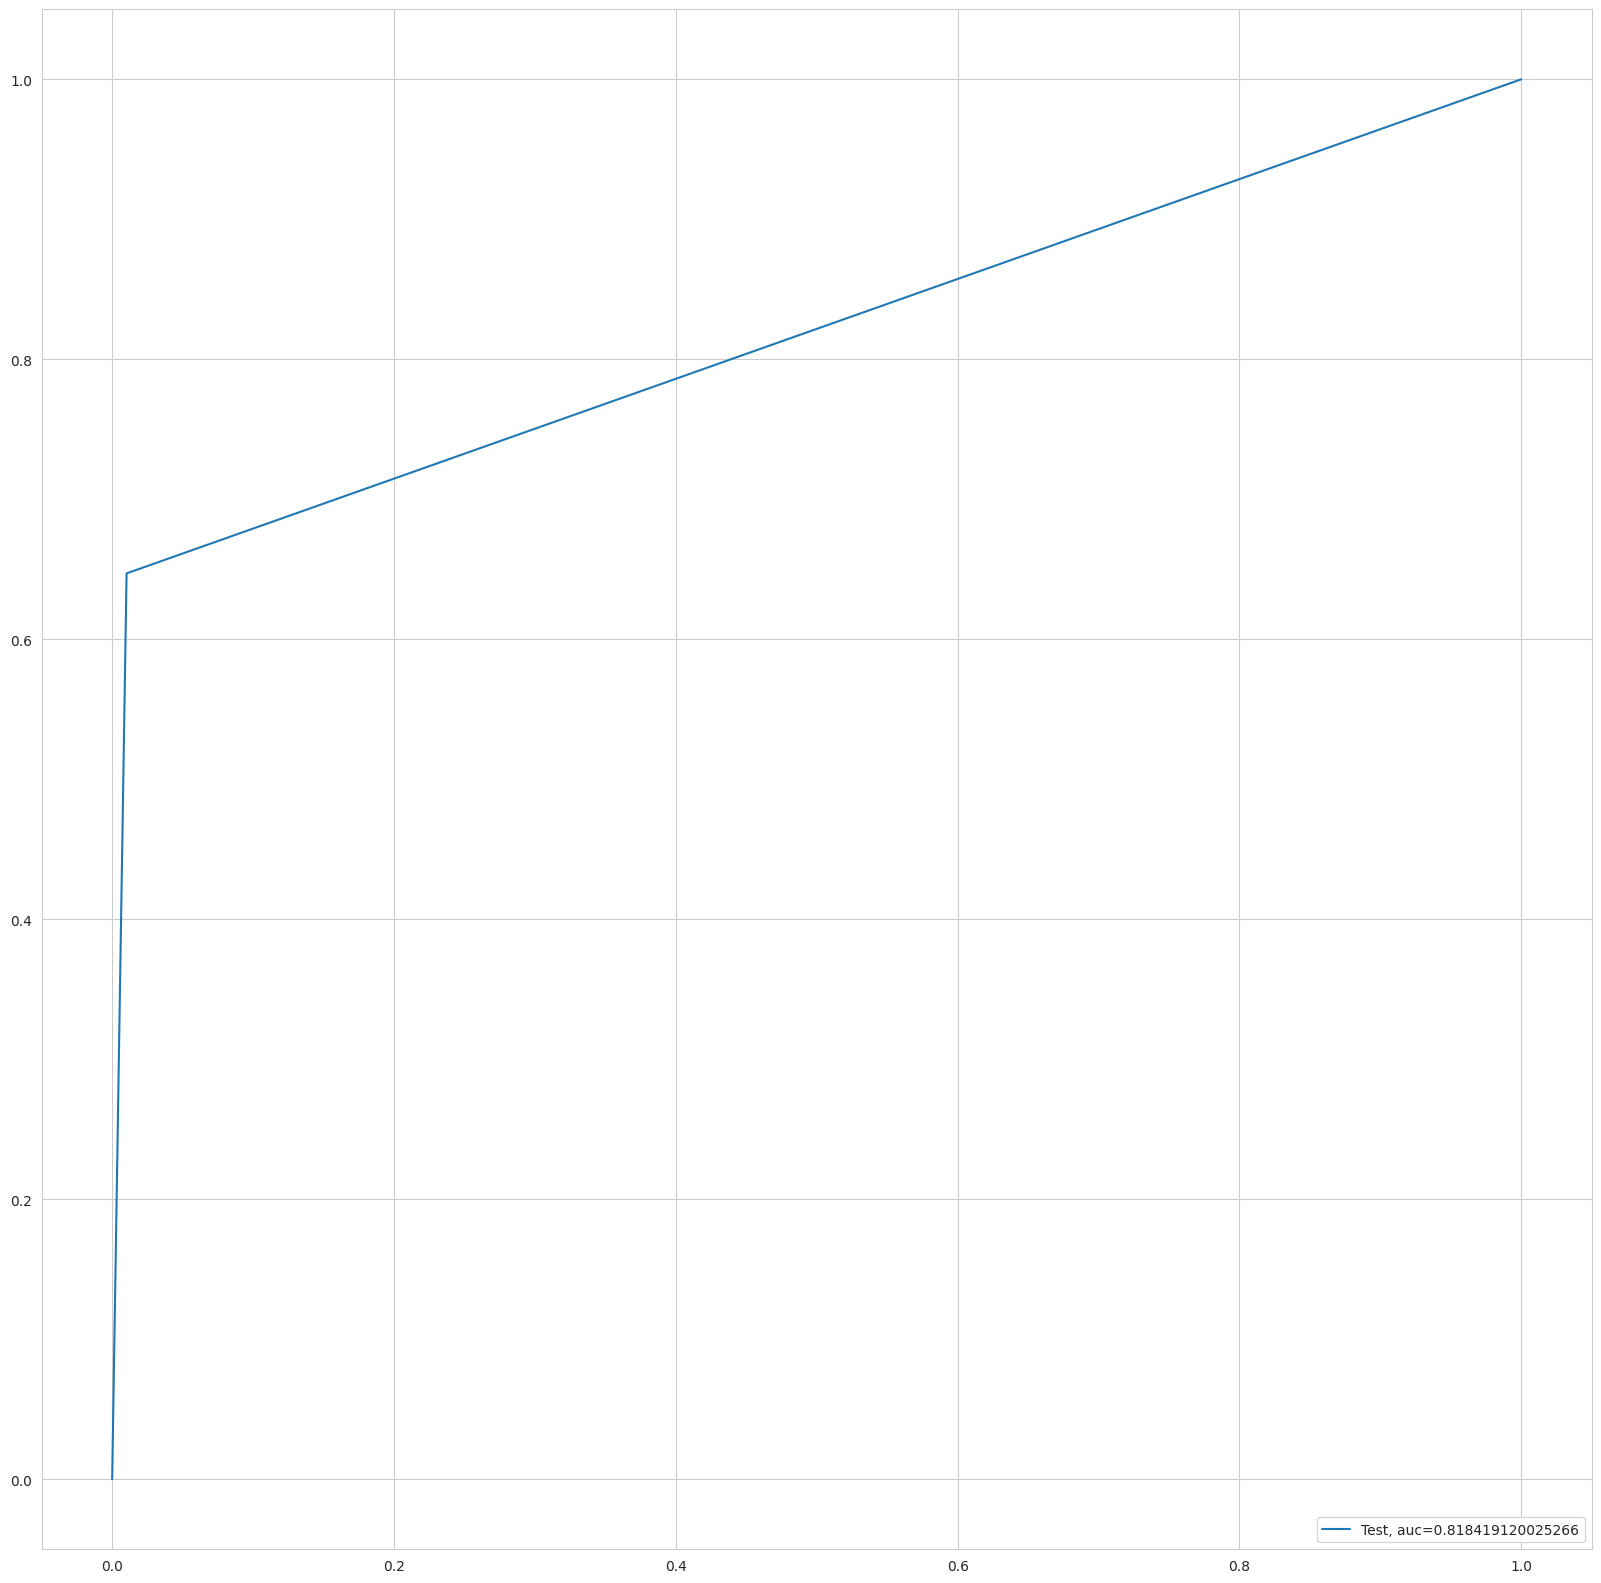

entropy score: 0.9965563255994145
Confusion Matrix


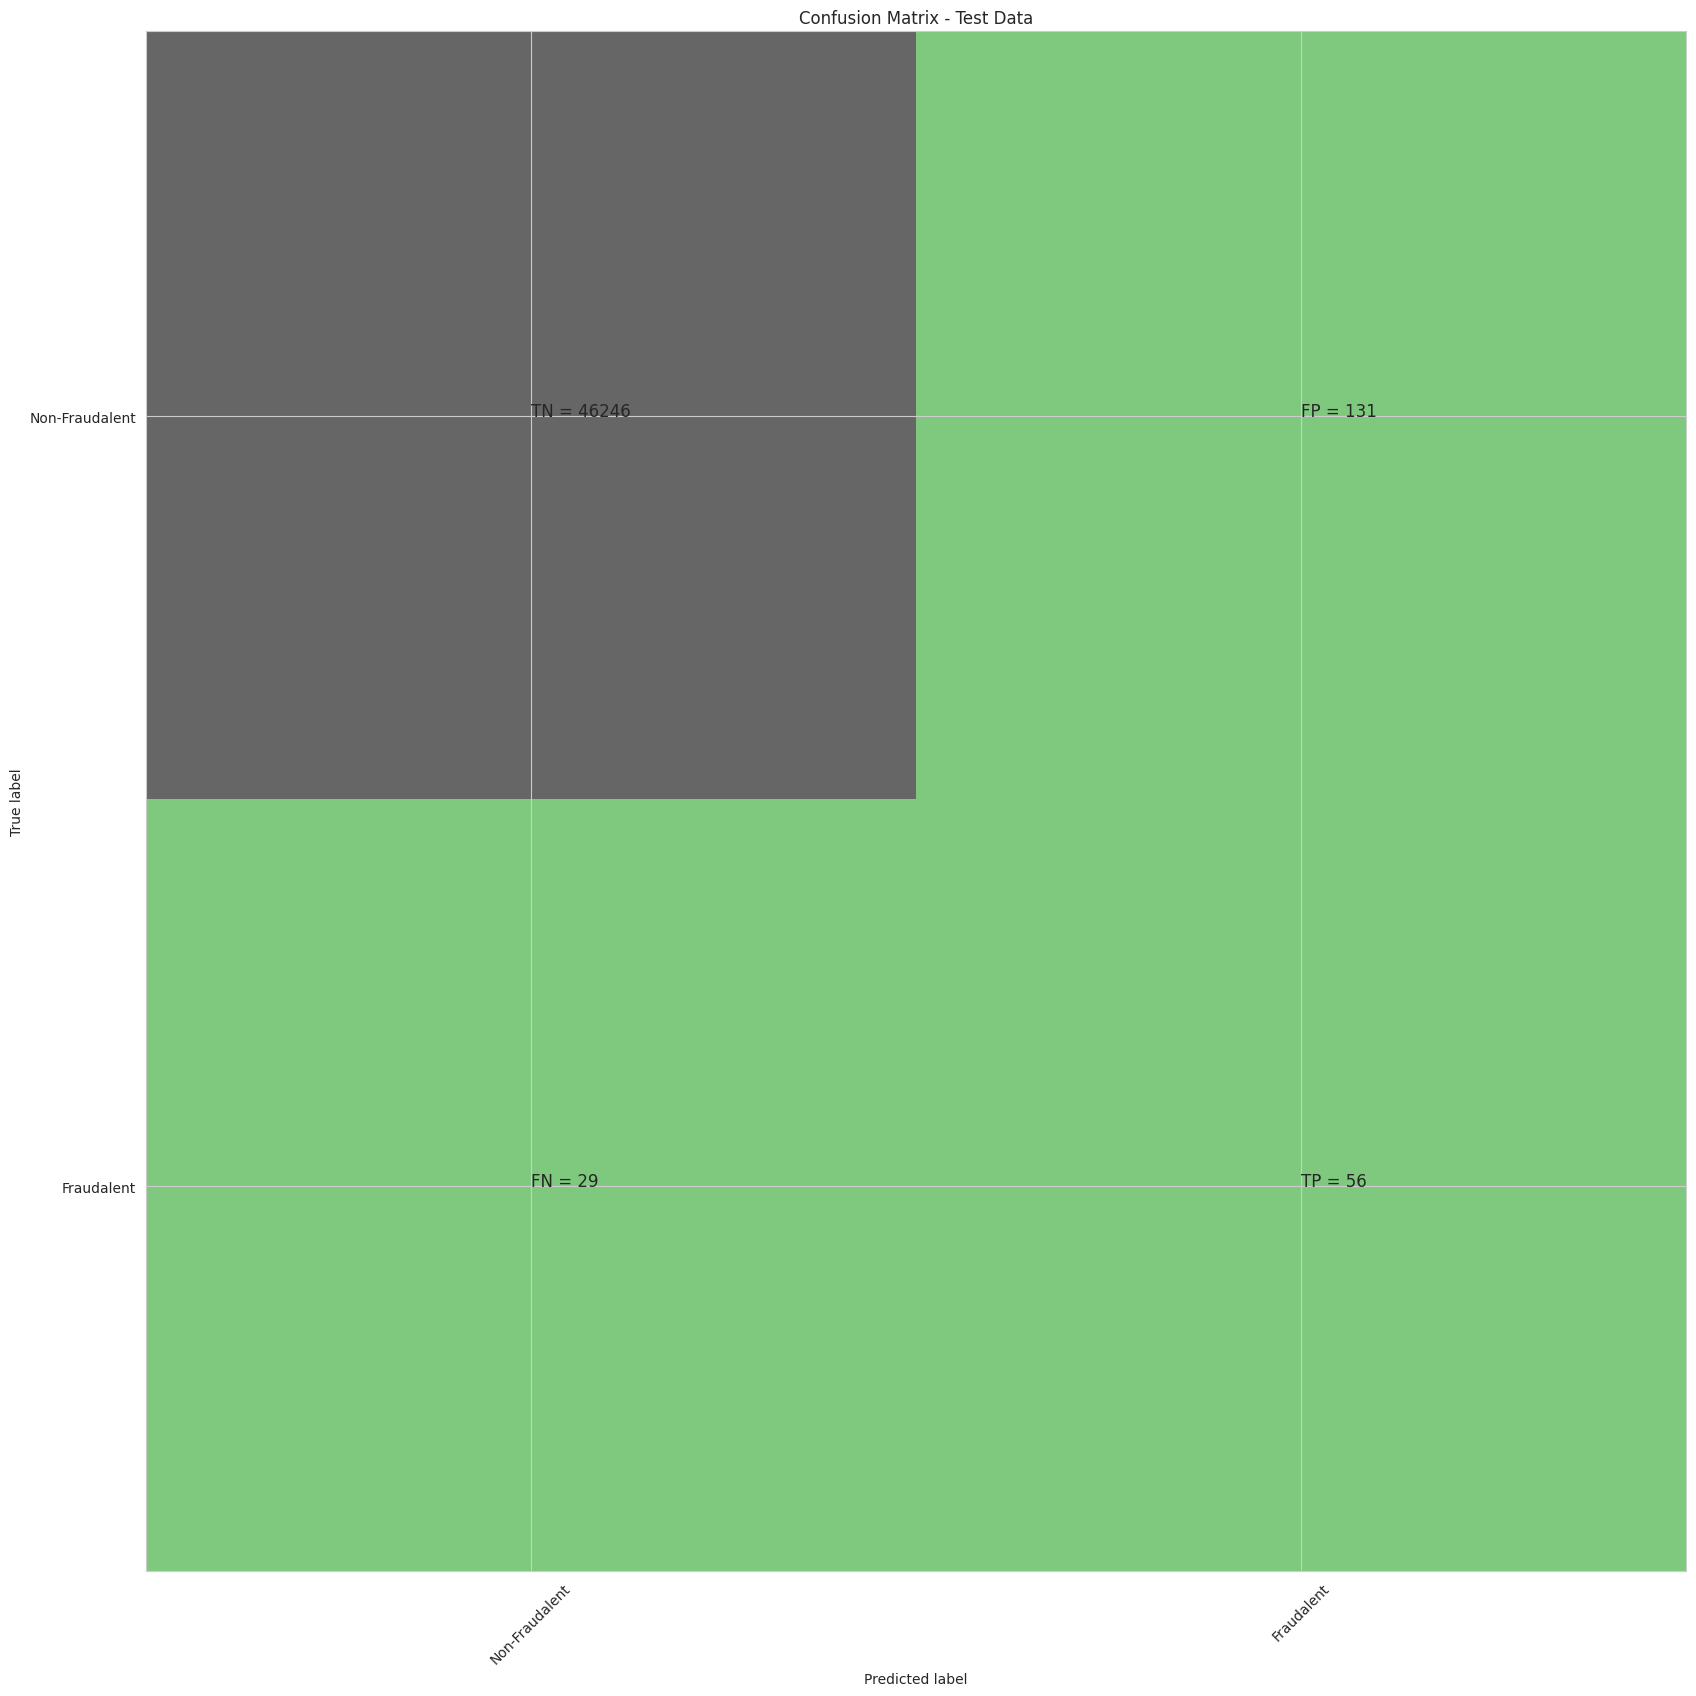

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46377
         1.0       0.30      0.66      0.41        85

    accuracy                           1.00     46462
   macro avg       0.65      0.83      0.71     46462
weighted avg       1.00      1.00      1.00     46462

entropy tree_roc_value: 0.8279994266935055
Tree threshold: 1.0
ROC for the test dataset 82.8%


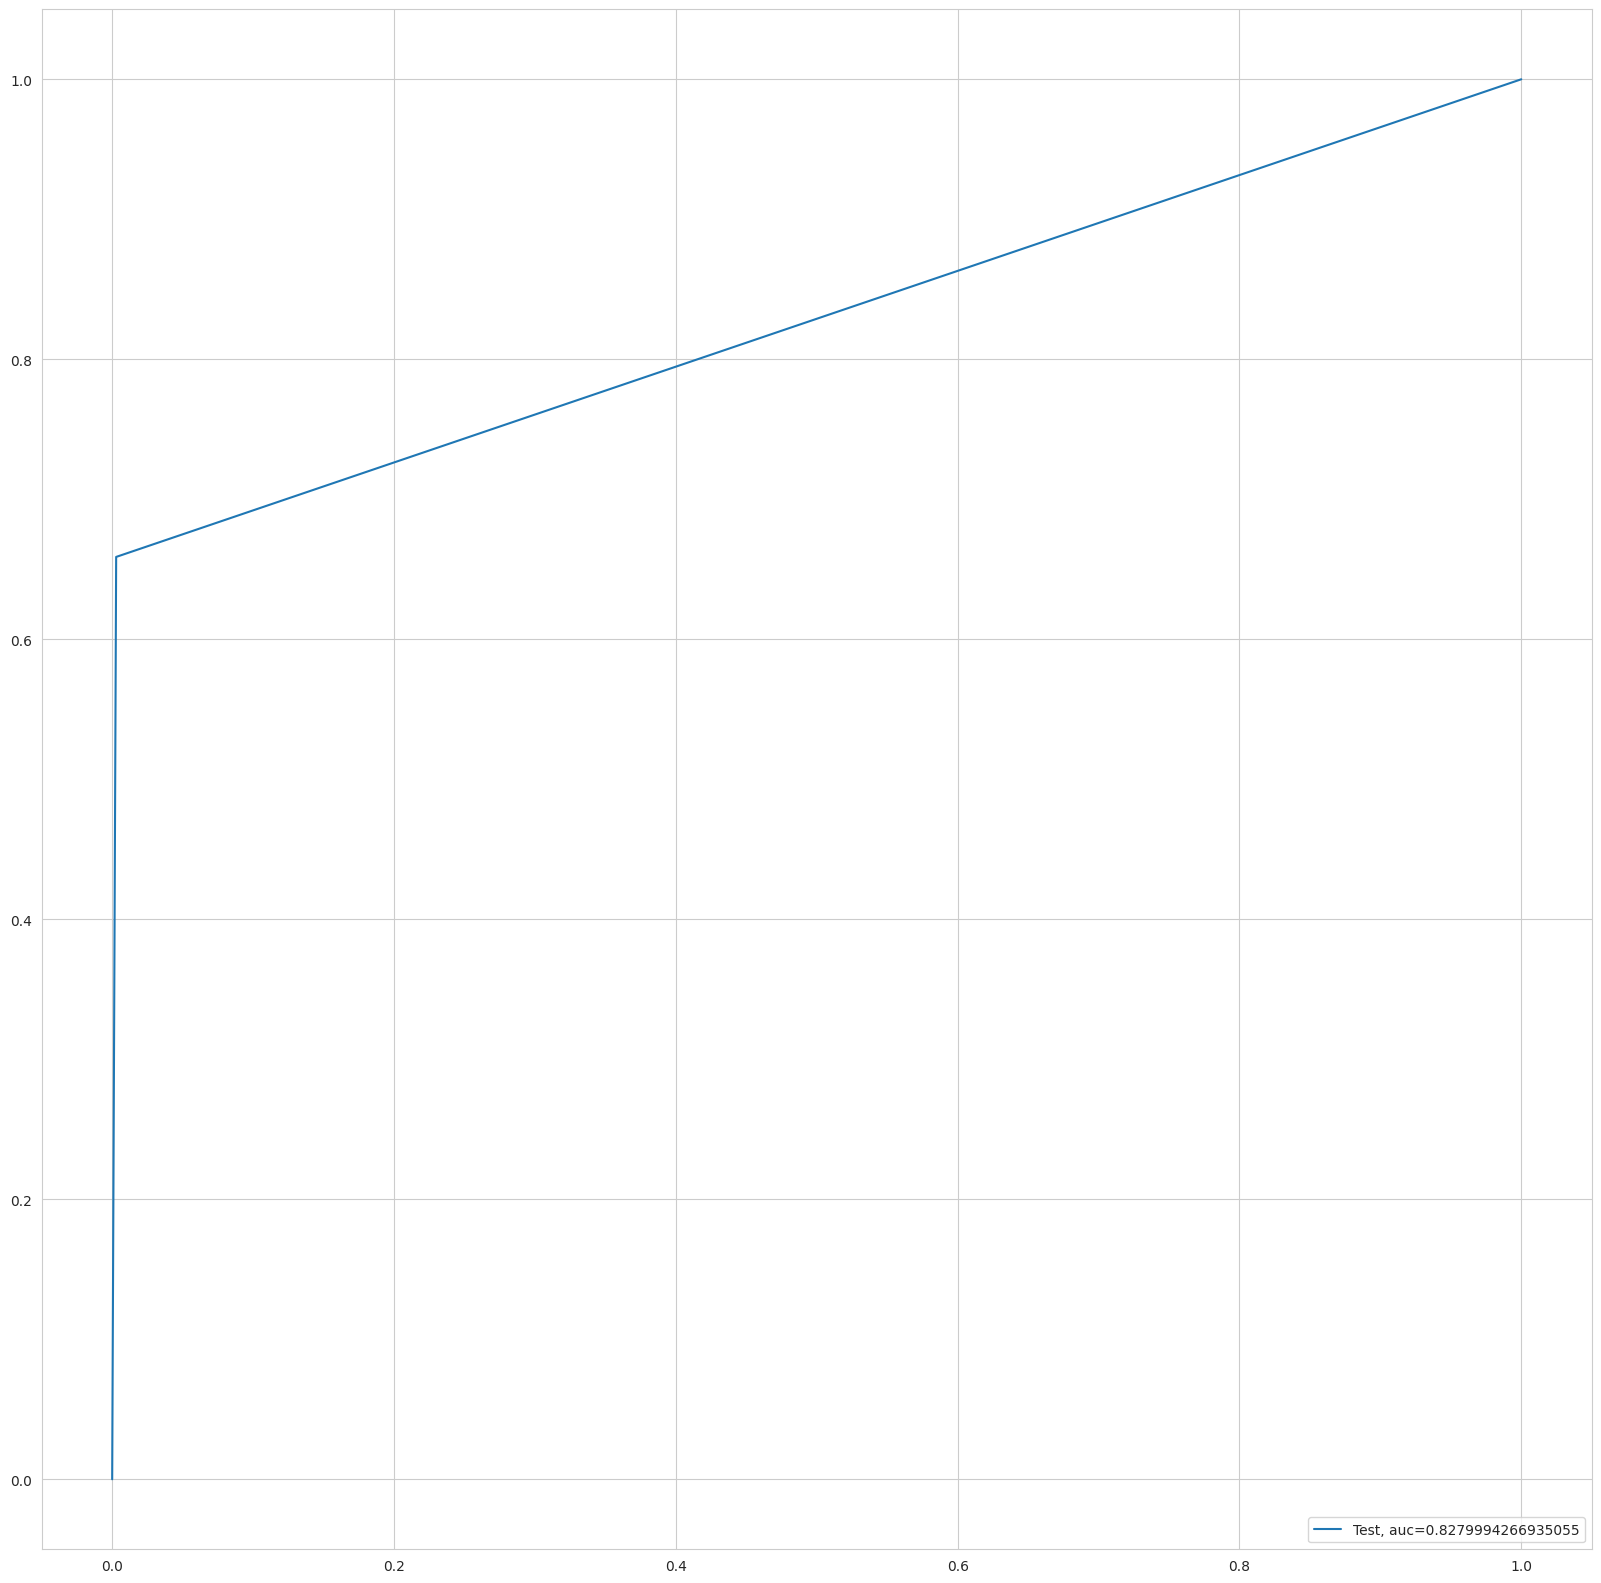

Time Taken by Model: --- 65.58035206794739 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994834488399121
Confusion Matrix


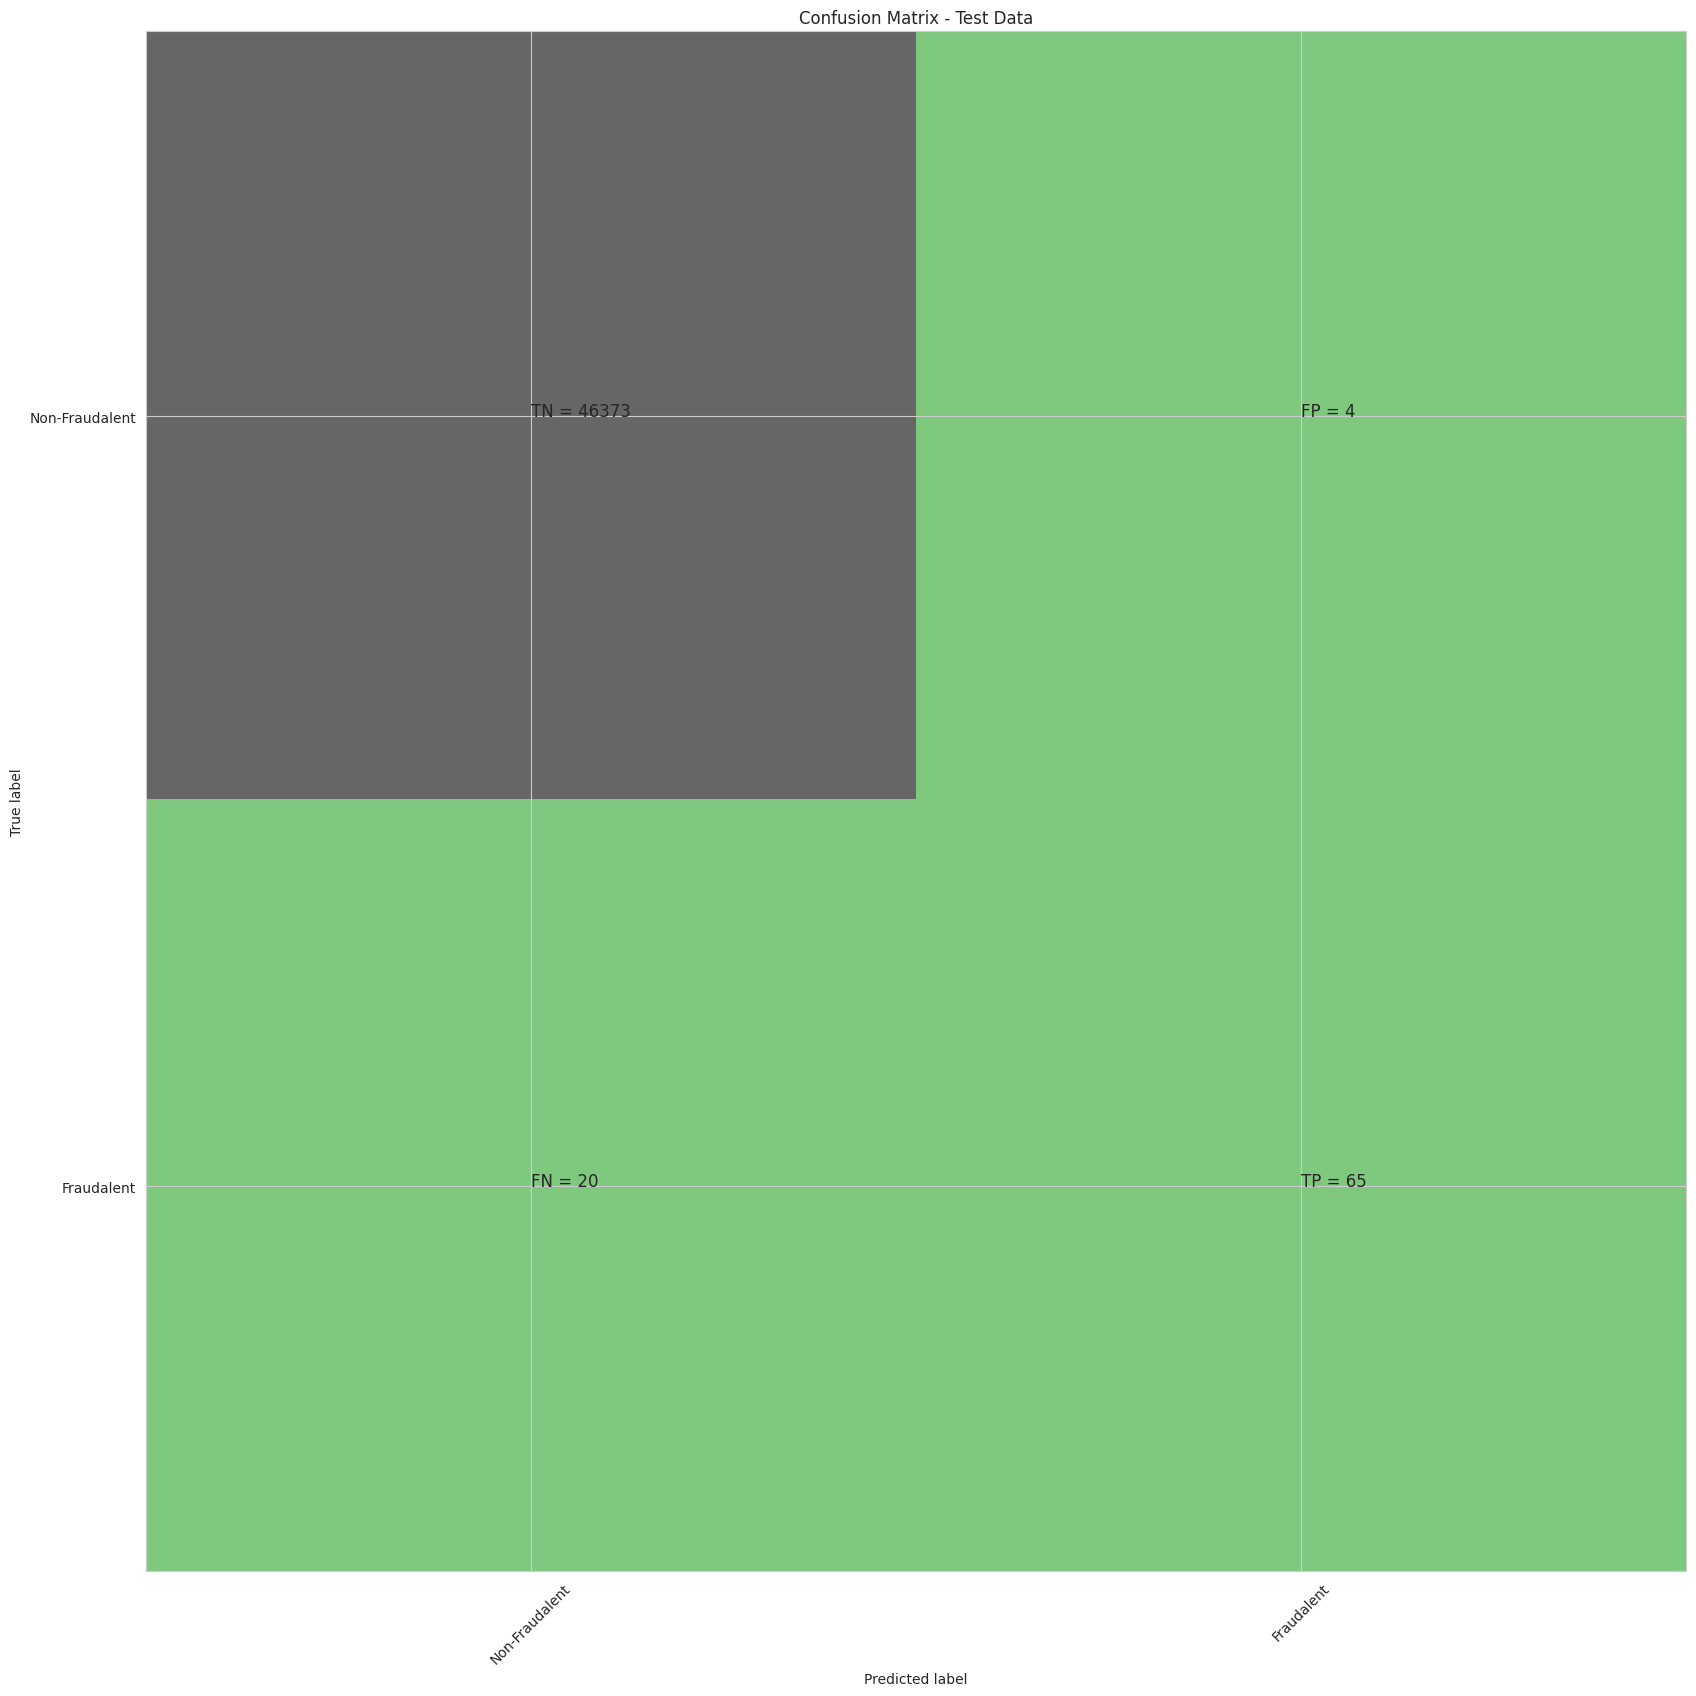

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46377
         1.0       0.94      0.76      0.84        85

    accuracy                           1.00     46462
   macro avg       0.97      0.88      0.92     46462
weighted avg       1.00      1.00      1.00     46462

Random Forest roc_value: 0.9654409069404333
Random Forest threshold: 0.06
ROC for the test dataset 96.5%


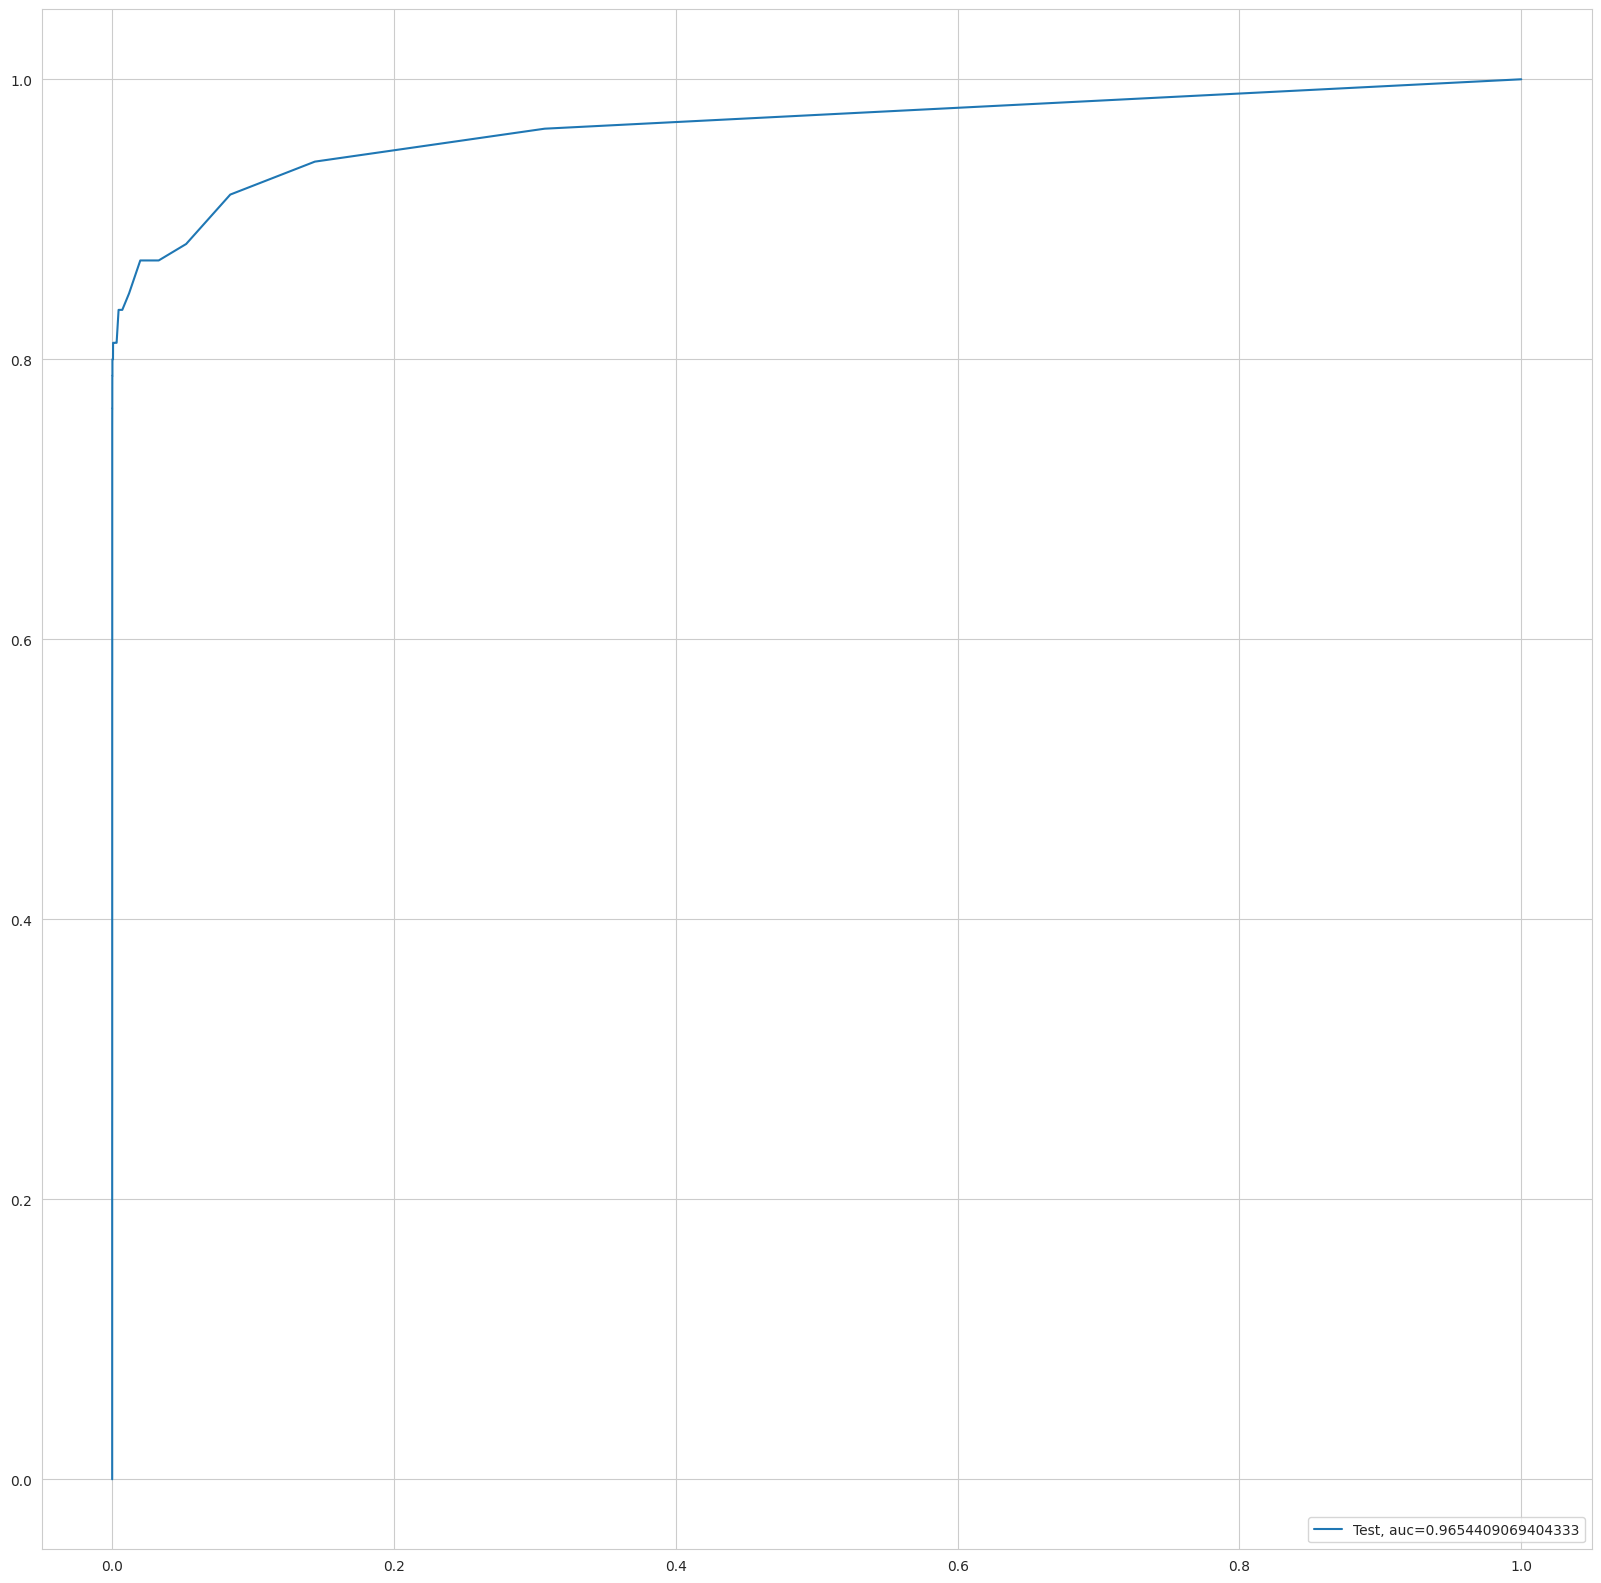

Time Taken by Model: --- 364.3110816478729 seconds ---
--------------------------------------------------------------------------------
XGBoost Model


ValueError: ignored

In [ ]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#df_Results = buildAndRunSVMModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

XGBoost Model
Model Accuracy: 0.9993327880848866
Confusion Matrix


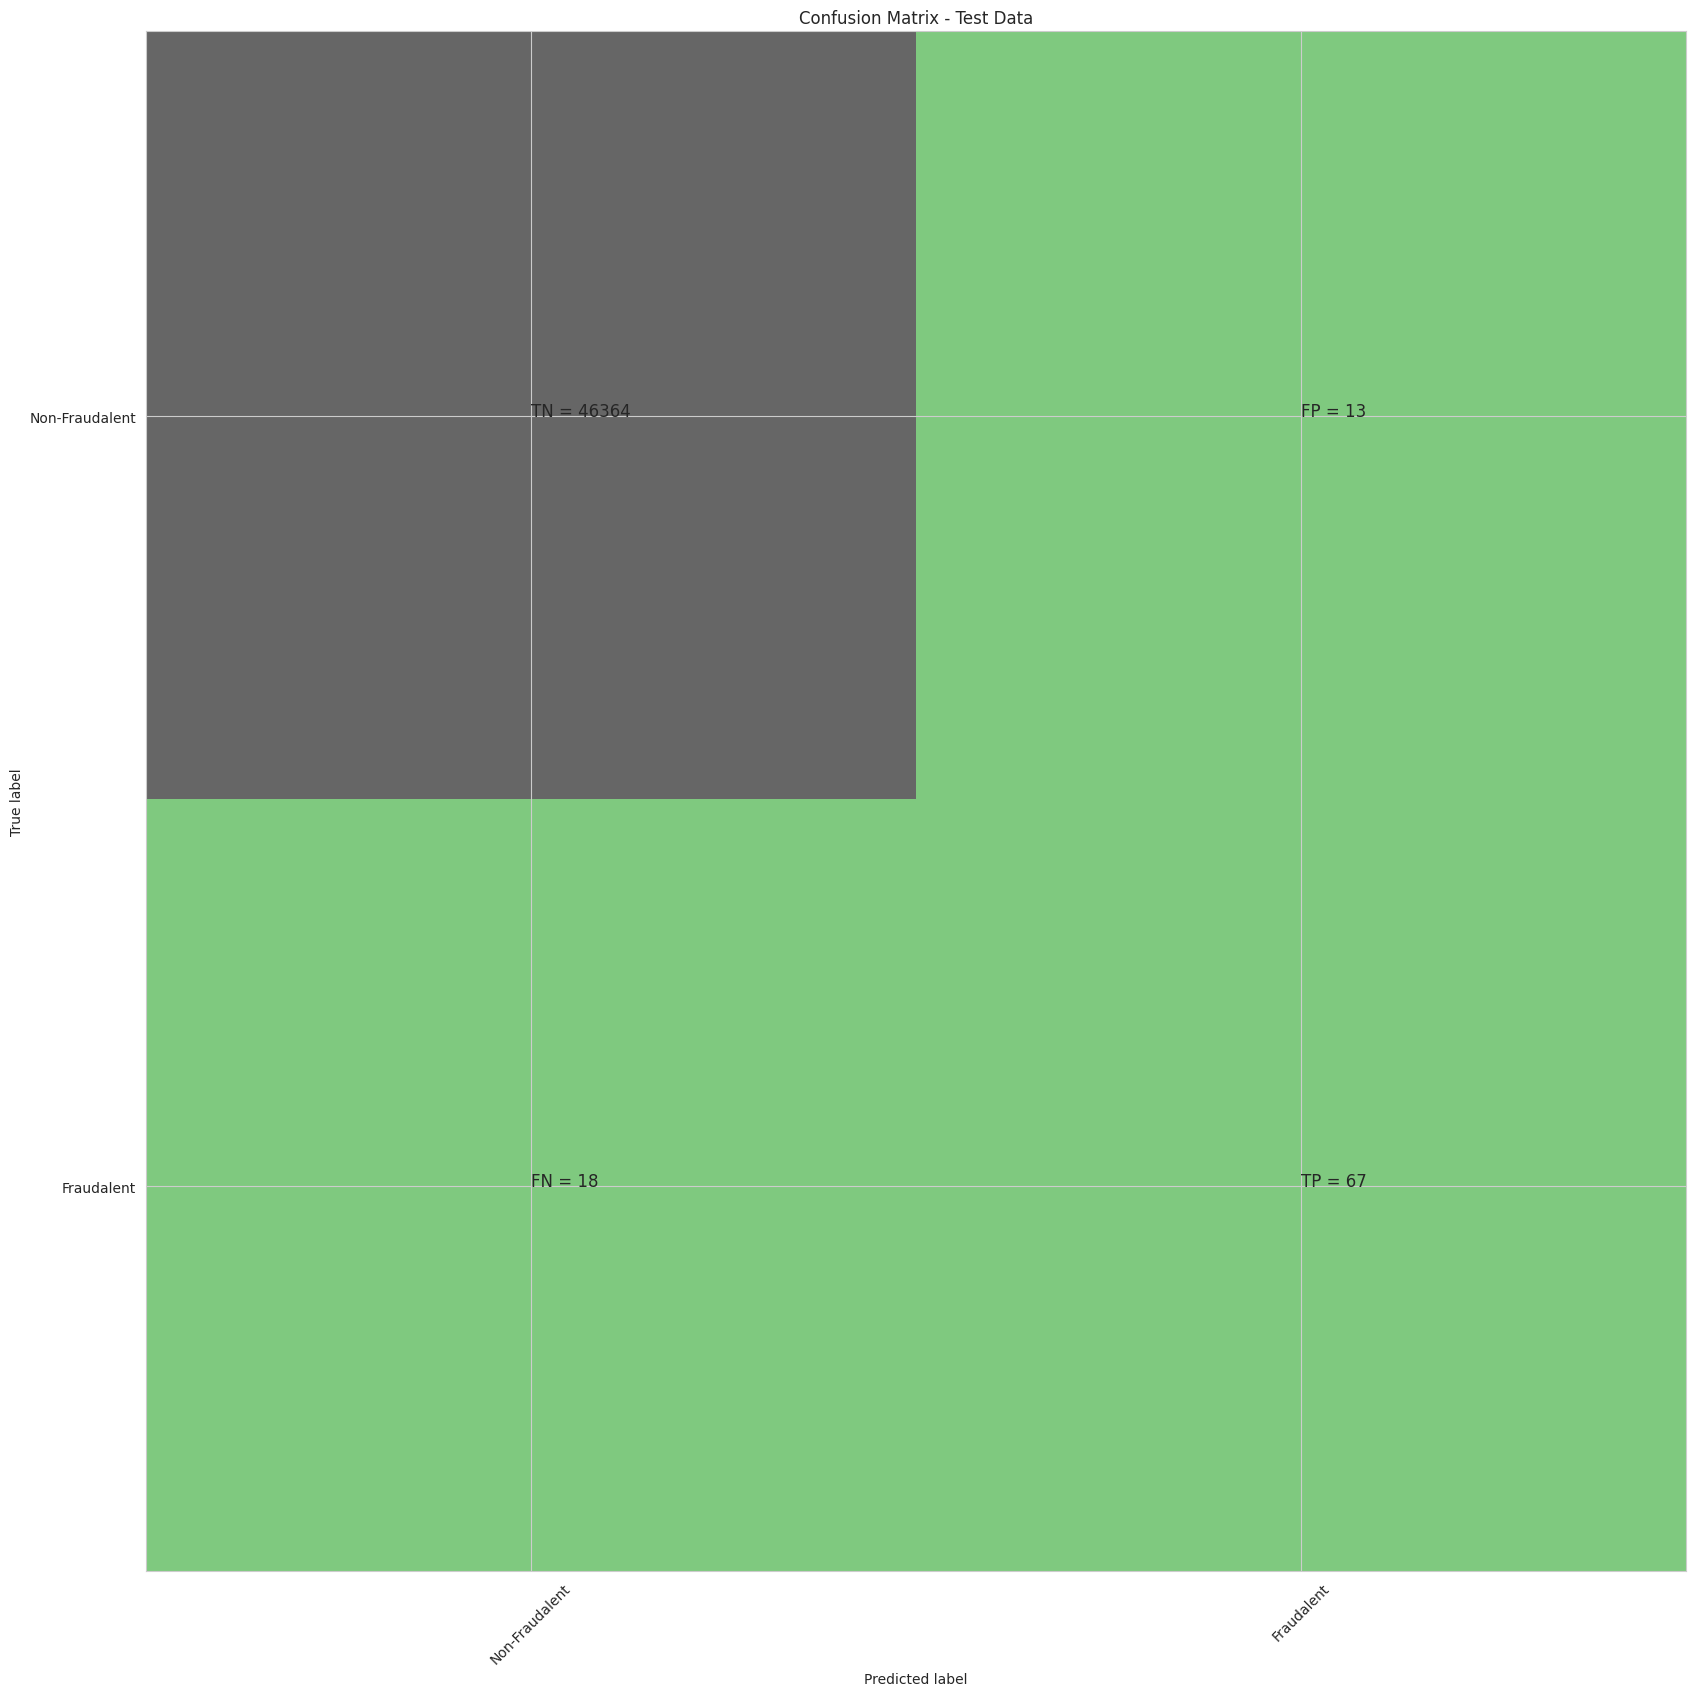

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46377
         1.0       0.84      0.79      0.81        85

    accuracy                           1.00     46462
   macro avg       0.92      0.89      0.91     46462
weighted avg       1.00      1.00      1.00     46462

XGboost roc_value: 0.9689521555436328
XGBoost threshold: 0.00026724039344117045
ROC for the test dataset 96.9%


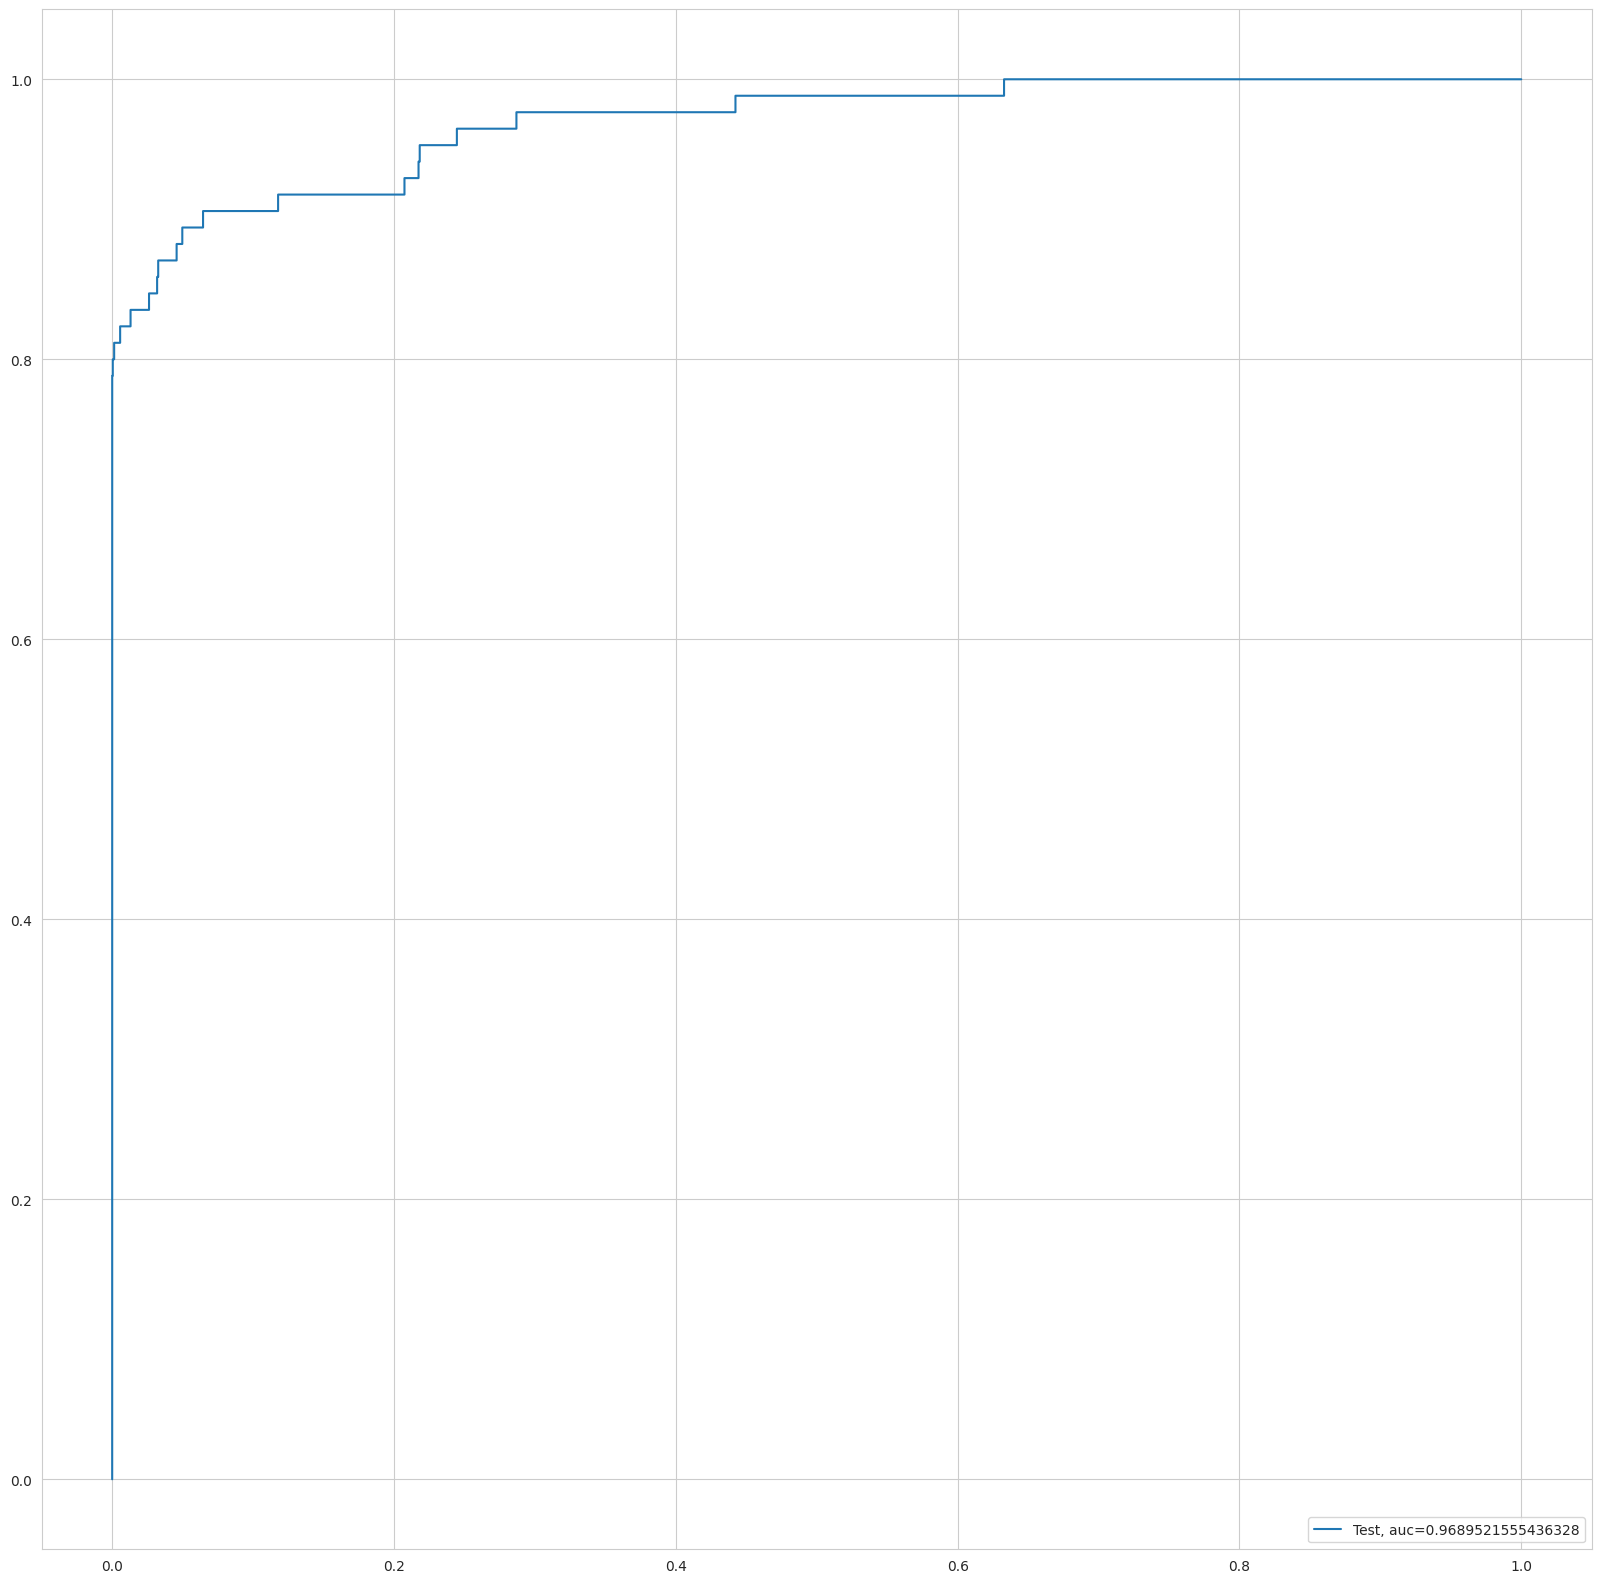

Time Taken by Model: --- 259.40434312820435 seconds ---
--------------------------------------------------------------------------------


In [ ]:
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

**Build models on other algorithms to see the better performing on SMOTE**

In [ ]:
df_Results

Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                 RepeatedKFold Cross Validation   
9                 RepeatedKFold Cross Validation   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16              StratifiedKFold Cross Validation   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21              StratifiedKFold Cross Validation   
22              StratifiedKFold Cross Validation   
23              StratifiedKFold Cross Validation   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28                          Random Undersampling   
29                          Random Undersampling   
30                          Random Undersampling   
31                          Random Undersampling   
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    
34  Random Oversampling with StratifiedKFold CV    
35  Random Oversampling with StratifiedKFold CV    
36  Random Oversampling with StratifiedKFold CV    
37  Random Oversampling with StratifiedKFold CV    
38  Random Oversampling with StratifiedKFold CV    
39   SMOTE Oversampling with StratifiedKFold CV    
40   SMOTE Oversampling with StratifiedKFold CV    
41   SMOTE Oversampling with StratifiedKFold CV    
42   SMOTE Oversampling with StratifiedKFold CV    
43   SMOTE Oversampling with StratifiedKFold CV    
44   SMOTE Oversampling with StratifiedKFold CV    
45   SMOTE Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998999   0.966806   0.001289  
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
2                                          KNN  0.999298   0.900851   0.200000  
3                Tree Model with gini criteria  0.998806   0.859015   1.000000  
4             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999456   0.972998   0.000051  
7                                          SVM  0.998560   0.891311   0.000893  
8   Logistic Regression with L2 Regularisation  0.999298   0.984187   0.002163  
9   Logistic Regression with L1 Regularisation  0.999210   0.838287   0.103159  
10                                         KNN  0.999333   0.873343   0.200000  
11               Tree Model with gini criteria  0.999245   0.867640   1.000000  
12            Tree Model with entropy criteria  0.999228   0.890585   1.000000  
13                               Random Forest  0.999631   0.940580   0.010000  
14                                     XGBoost  0.999596   0.981064   0.000089  
15                                         SVM  0.998613   0.512649   0.003071  
16  Logistic Regression with L2 Regularisation  0.998771   0.983338   0.001569  
17  Logistic Regression with L1 Regularisation  0.998754   0.889076   0.021087  
18                                      

**Results for SMOTE Oversampling:**

Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

# Oversampling with ADASYN Oversampling
**We will use ADASYN Oversampling method to handle the class imbalance**

1 First we will display class distibution with and without the ADASYN Oversampling.

2 Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:

1 Logistic Regression with L2 Regularisation

2 Logistic Regression with L1 Regularisation

3 KNN

4 Decision tree model with Gini criteria

5 Decision tree model with Entropy criteria

6 Random Forest

7XGBoost

8 We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

9 Once we get results for above model, we will compare the results and select model which provided best results for the oversampling techinique

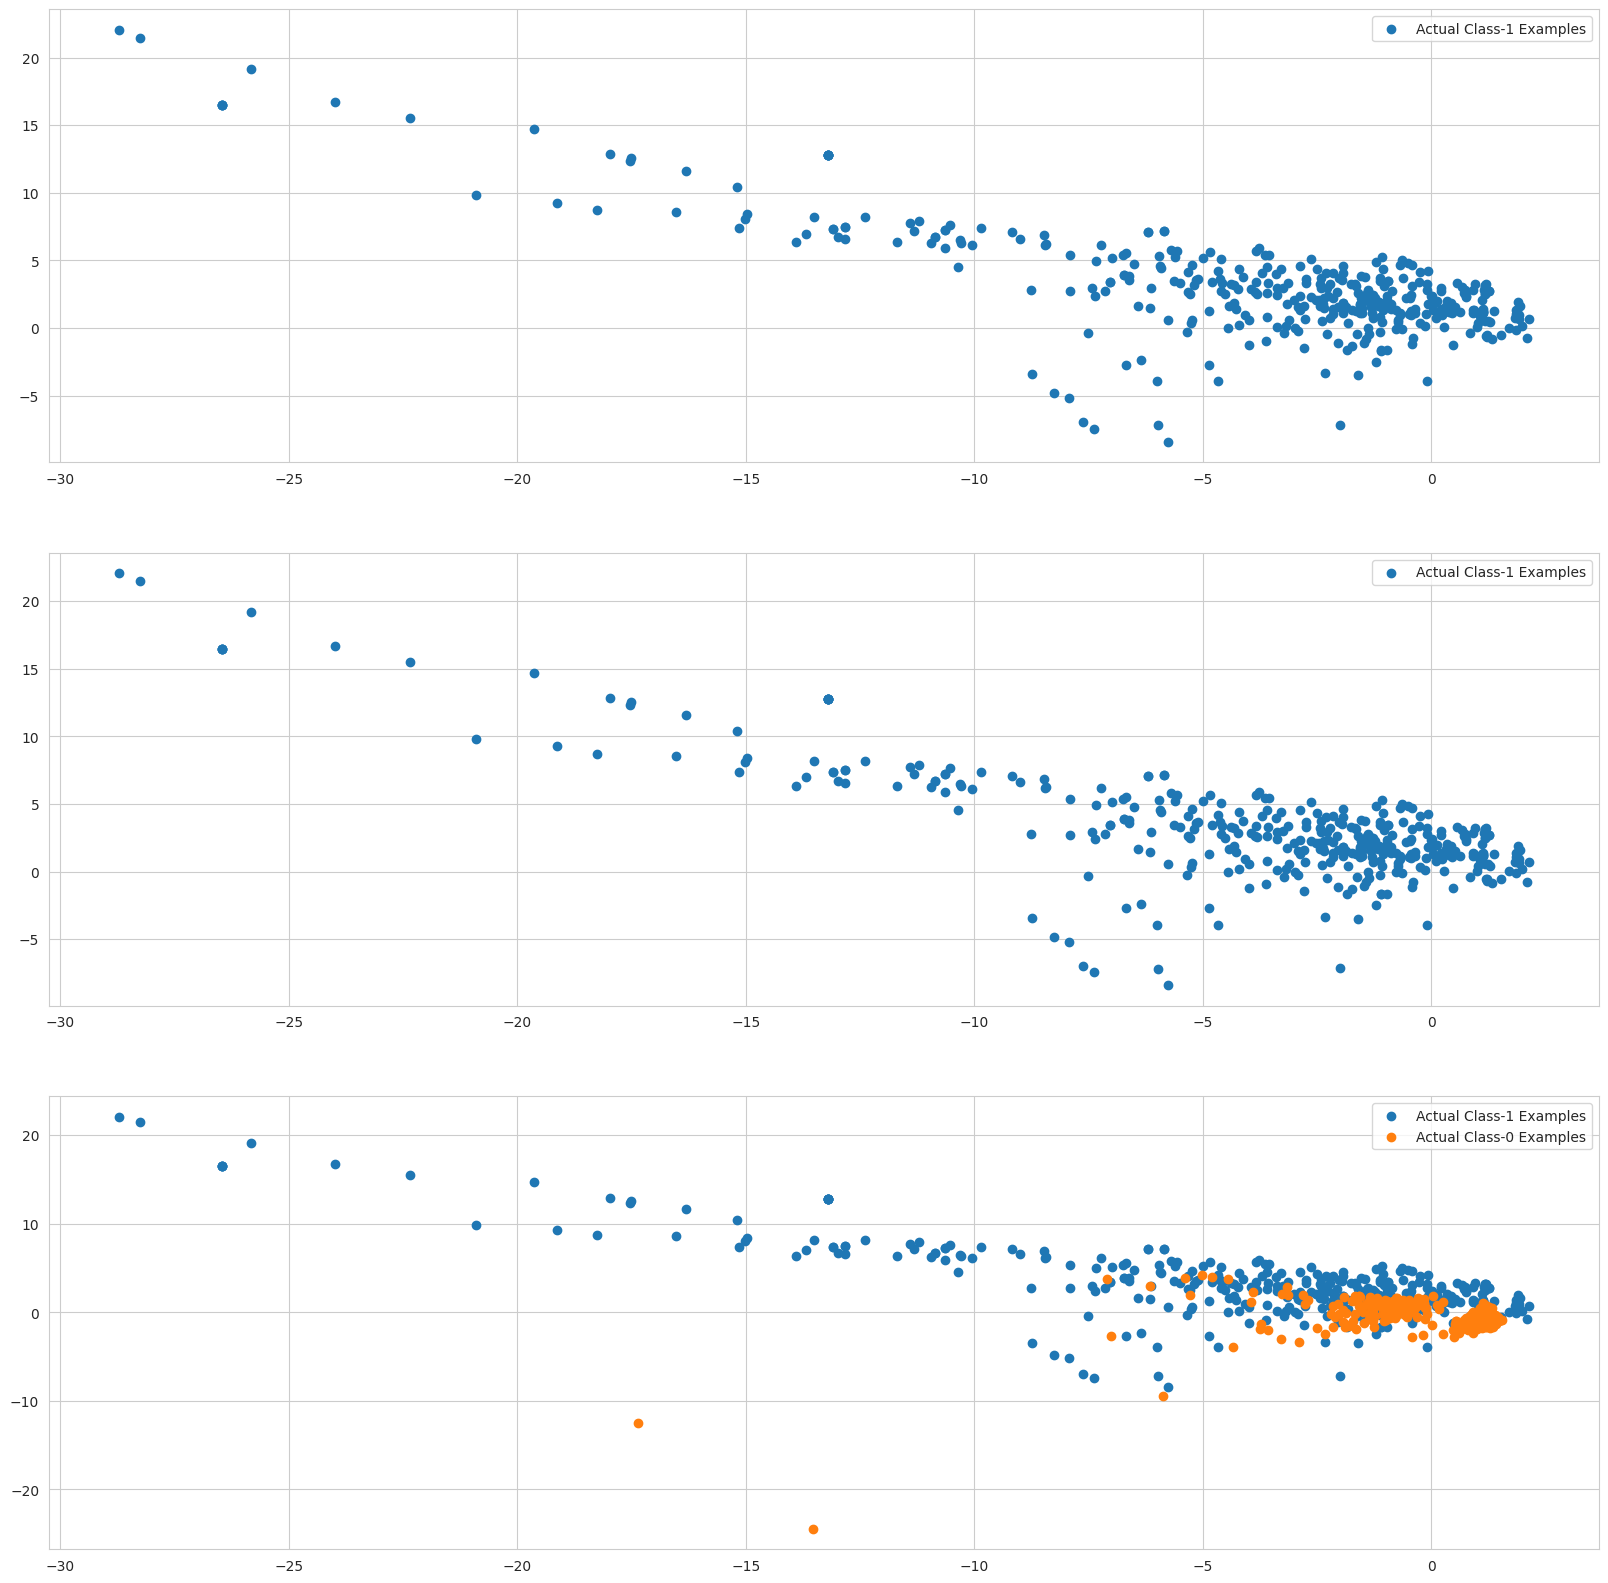

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ADASYN = over_sampling.ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train) 

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_ADASYN[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

**Build models on other algorithms to see the better performing on ADASYN**

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9831839111387699
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.80730781  0.9461123   0.92105271  0.9081473   0.53733361 -1.28254508
  -0.74947725 -0.67193321 -0.3275035  -0.84935566  0.85928036 -1.25418141
  -0.27563394 -1.97673009  0.03021703 -0.94372474 -1.04465269 -0.33143853
   0.1854702  -1.343805   -0.14678643  0.79274127  0.41822381 -1.66313399
   1.02990109 -0.05326483  0.38169831  1.06674487  0.01102446  0.02340054]]
[-5.1392265]
{1.0: array([[0.6013939 , 0.61987684, 0.69996892, 0.85398412, 0.95655963,
        0.97284051, 0.97719526, 0.9810535 , 0.98264254, 0.98305198,
        0.98311139, 0.98311139, 0.98311139, 0.98311139, 0.98311139,
        0.98311139, 0.98311139, 0.98311139, 0.98311139, 0.98311139],
       [0.60239099, 0.62094419, 0.70183562, 0.85630616, 0.95625072,
        0.97216447, 0.9767986 , 0.98070348, 0.98226429, 0.98270282,
        0.98276606, 0.98276606, 0.98276606, 0.9827660

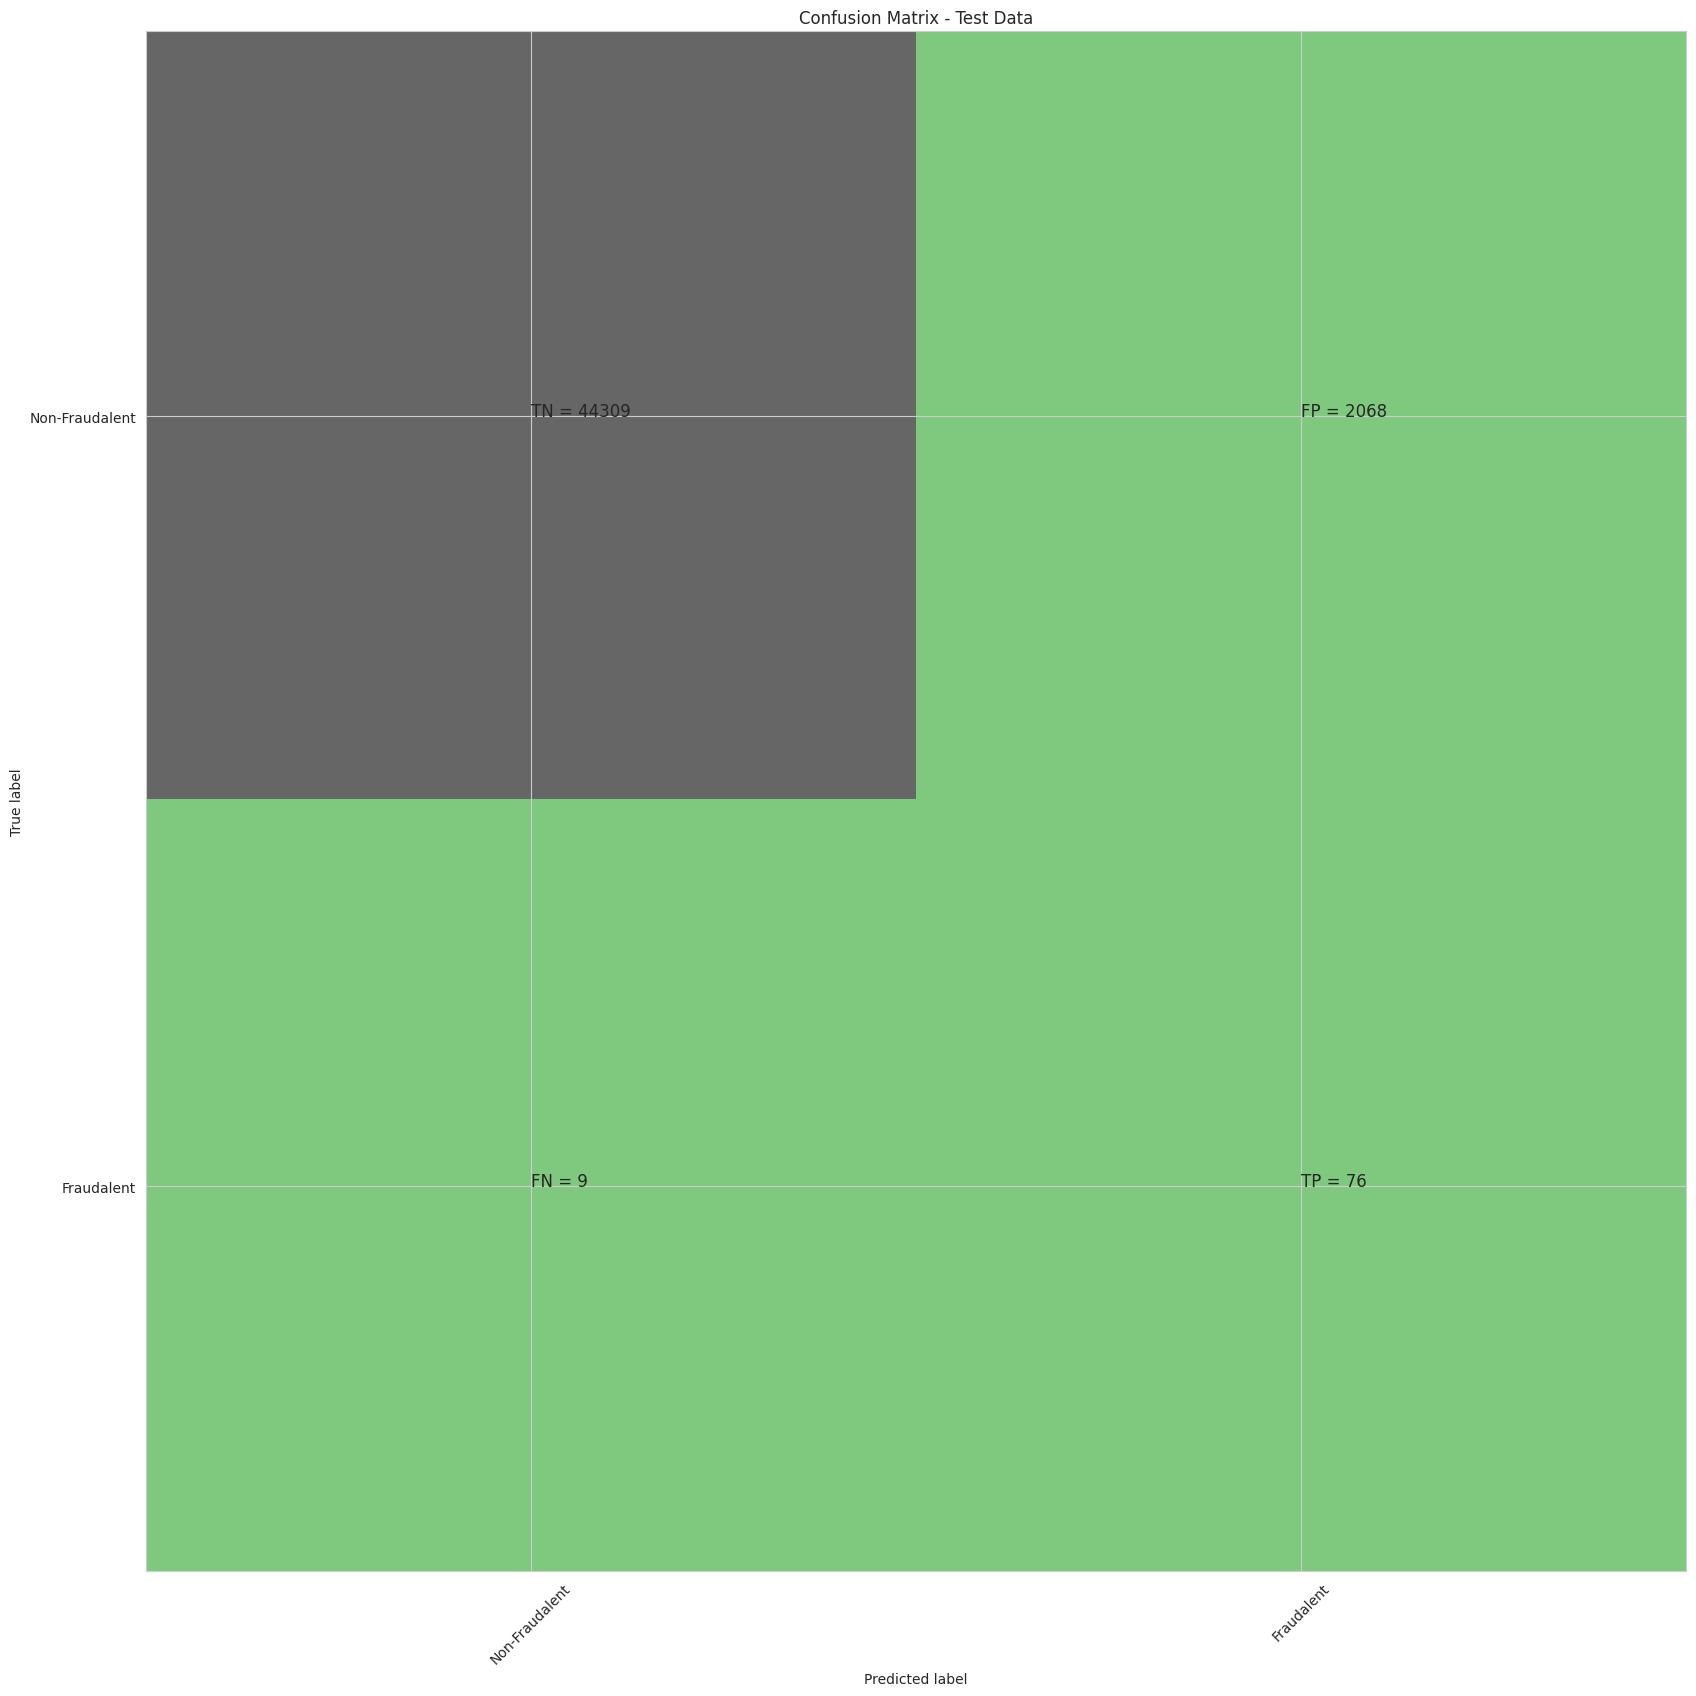

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     46377
         1.0       0.04      0.89      0.07        85

    accuracy                           0.96     46462
   macro avg       0.52      0.92      0.52     46462
weighted avg       1.00      0.96      0.98     46462

Accuarcy of Logistic model with l1 regularisation : 0.998170547974689
Confusion Matrix


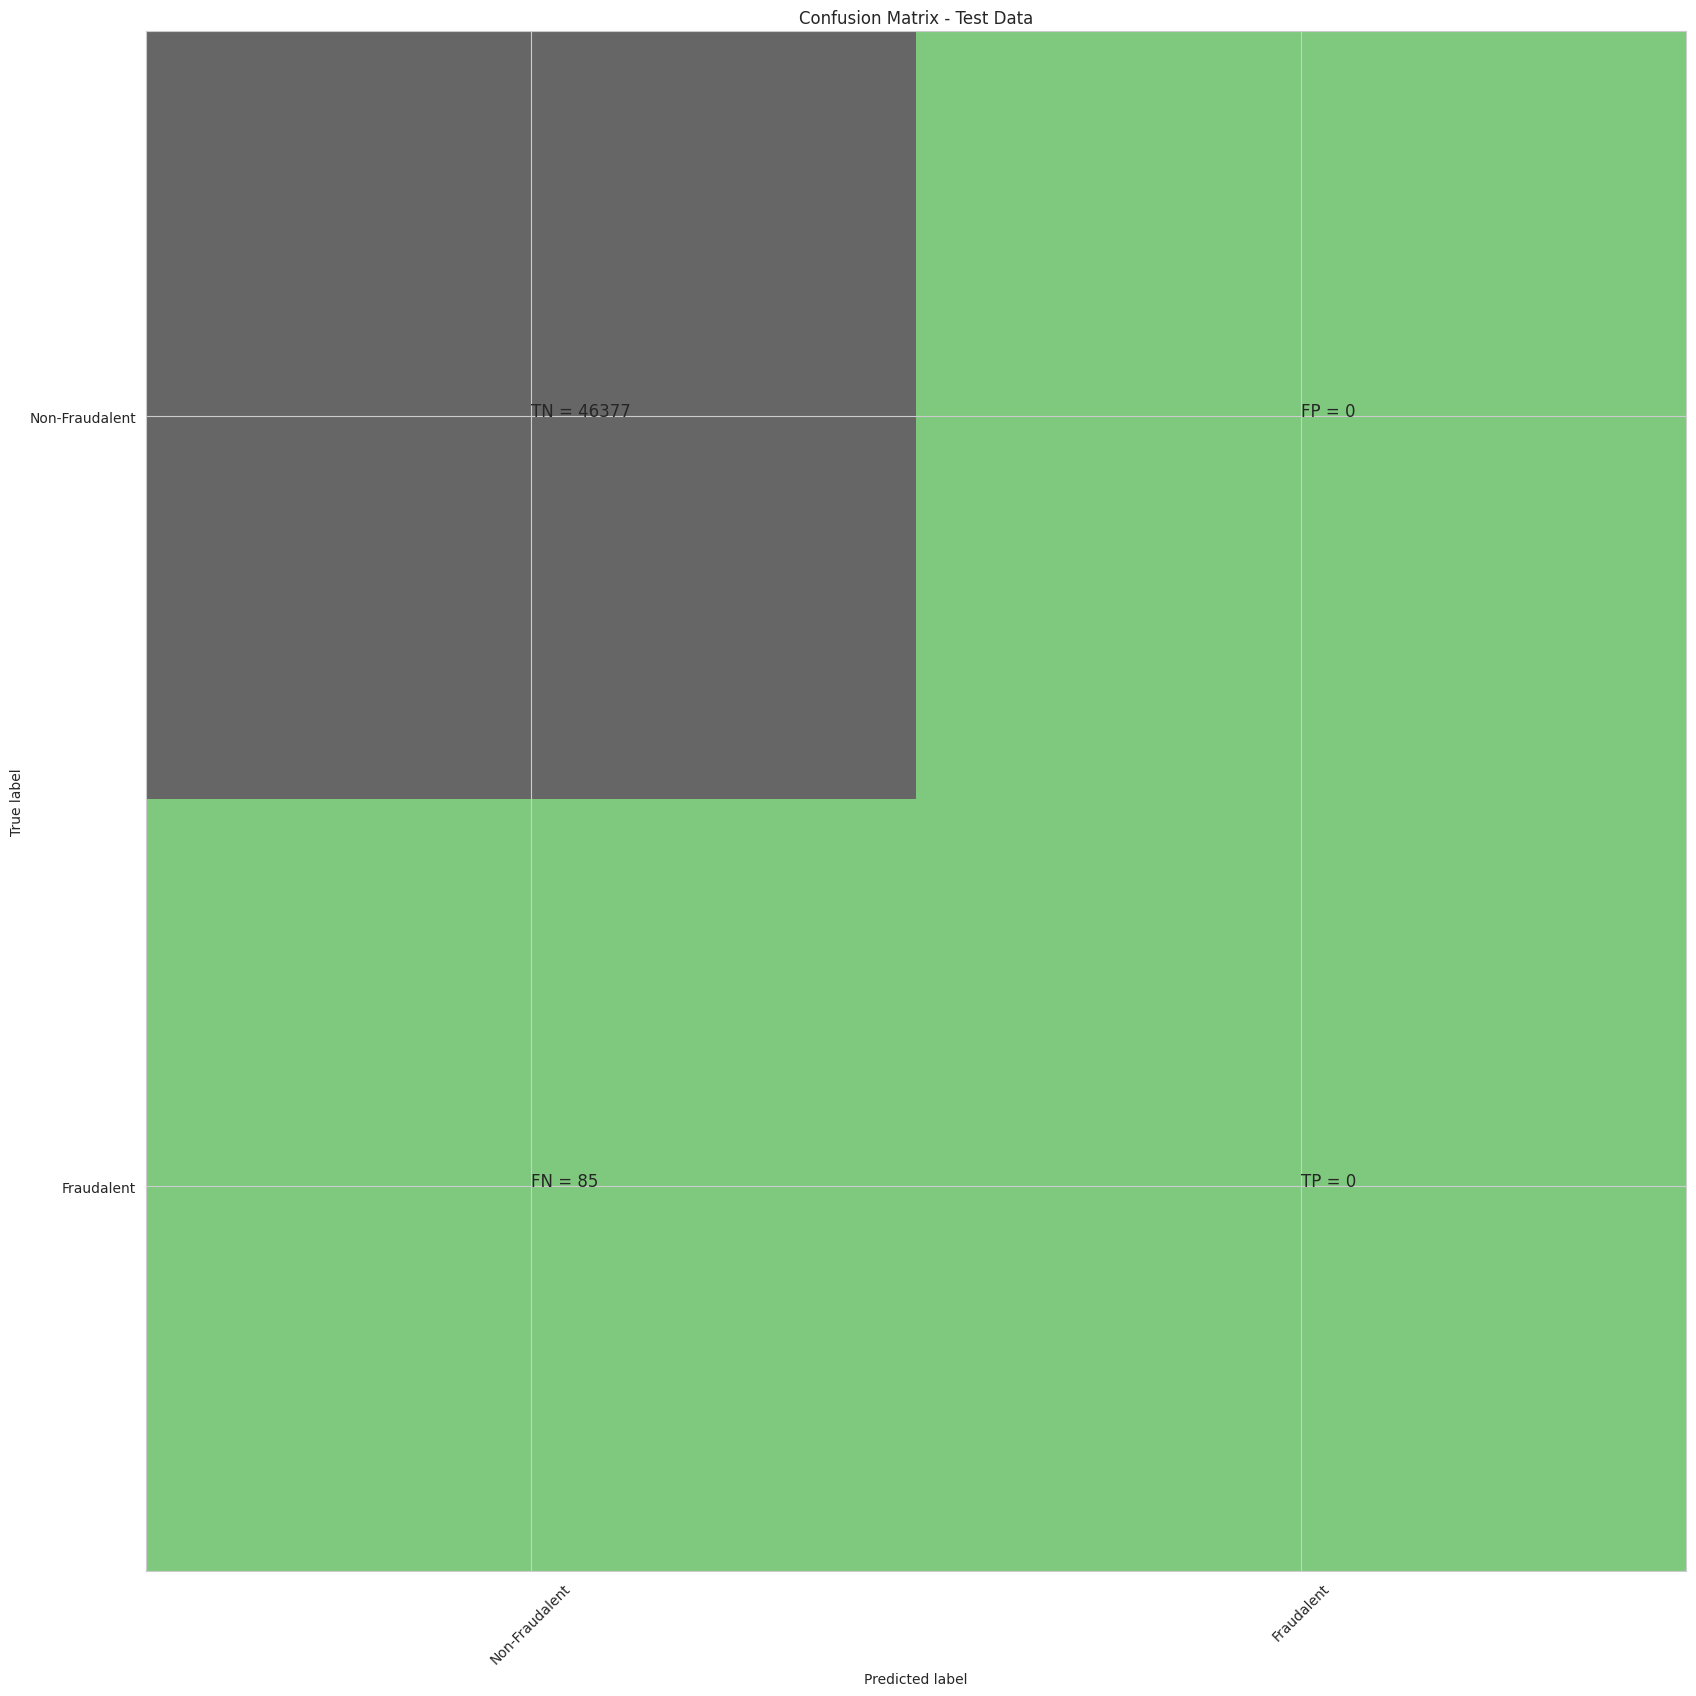

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46377
         1.0       0.00      0.00      0.00        85

    accuracy                           1.00     46462
   macro avg       0.50      0.50      0.50     46462
weighted avg       1.00      1.00      1.00     46462

l2 roc_value: 0.9633436452399706
l2 threshold: 0.8199738676371131
ROC for the test dataset 96.3%


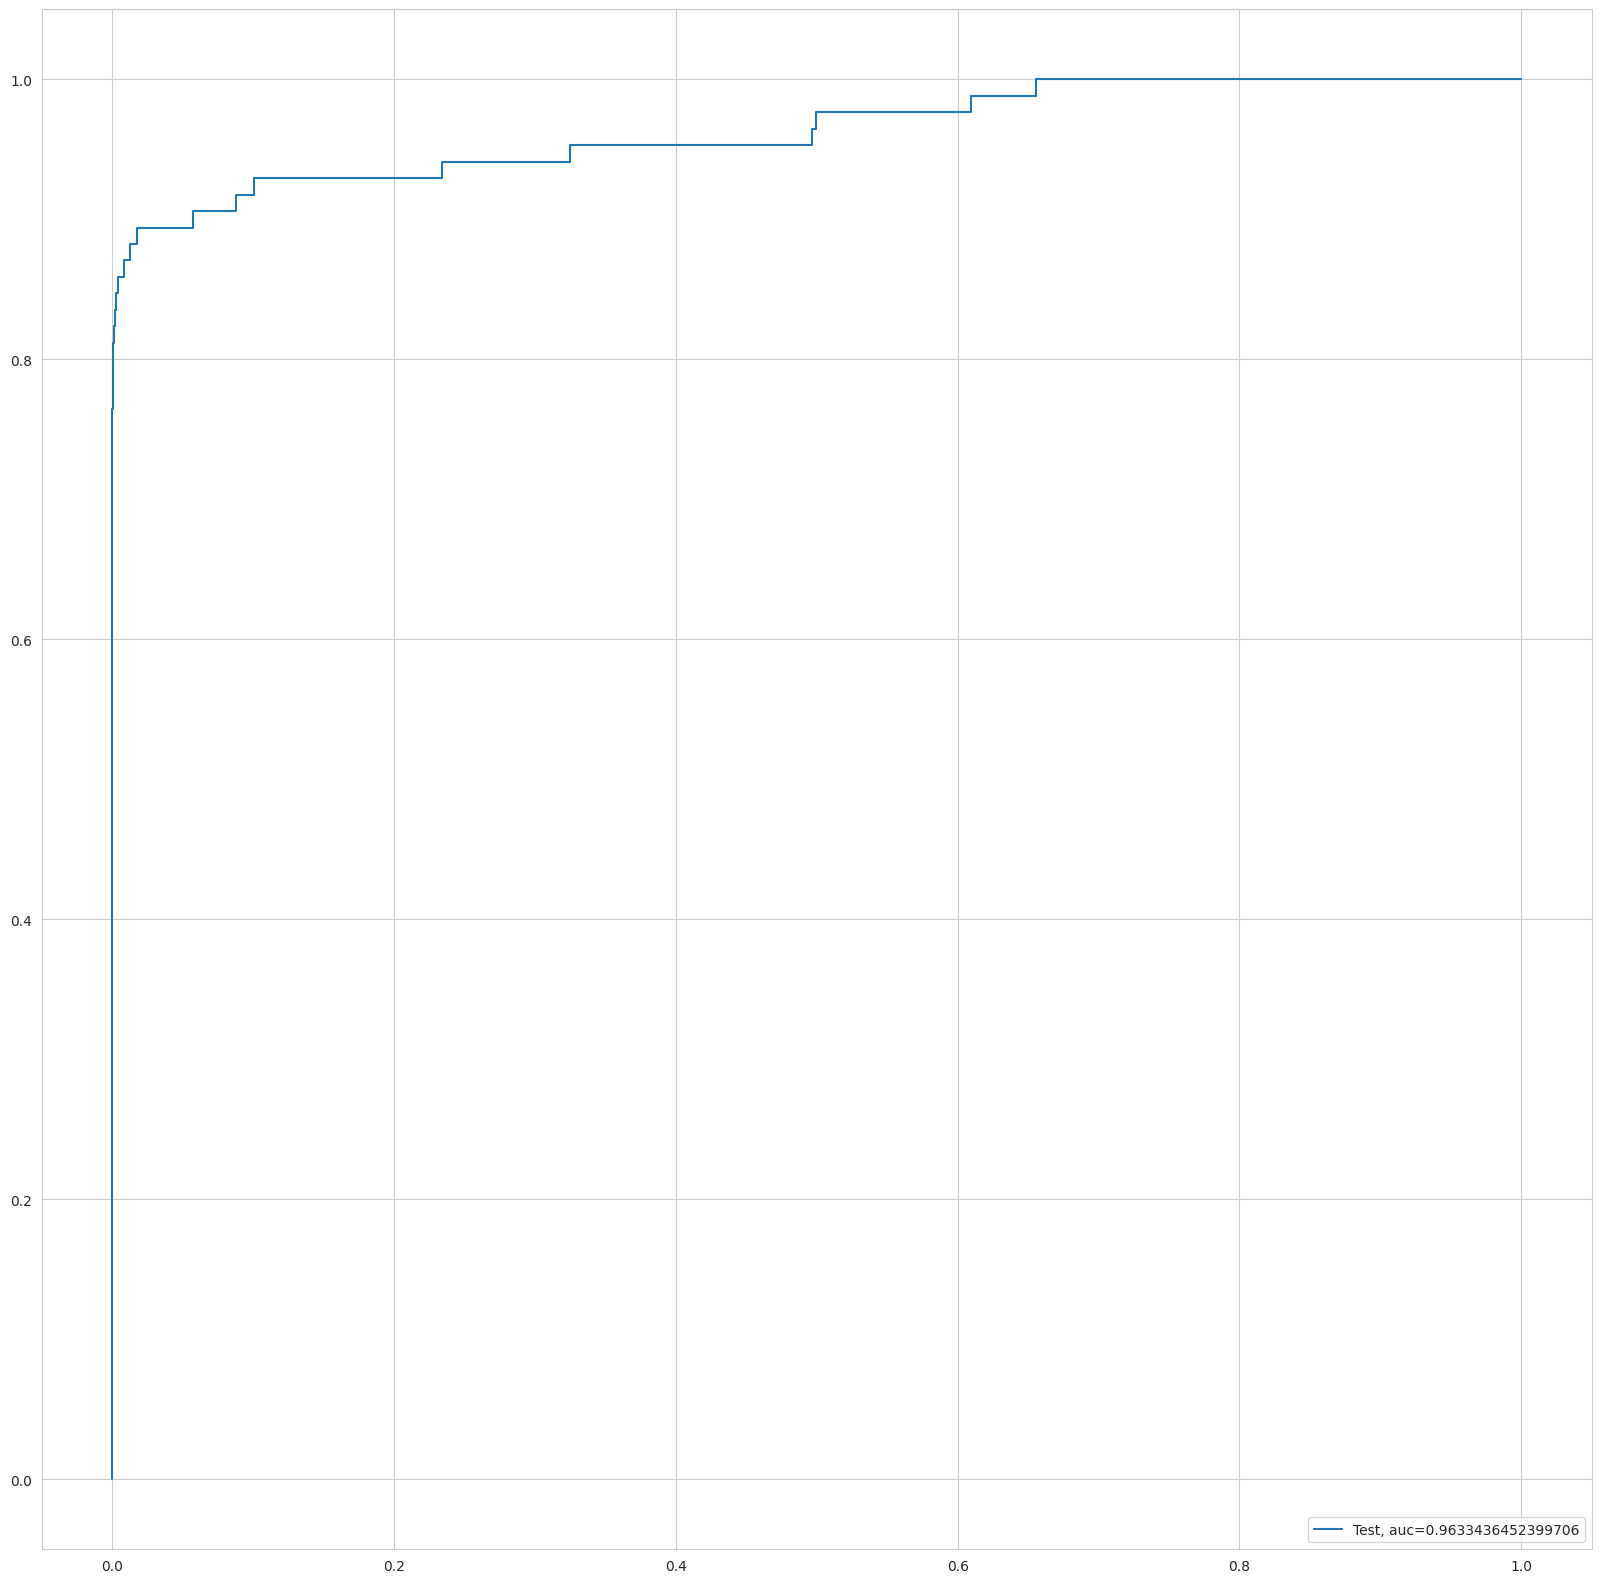

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


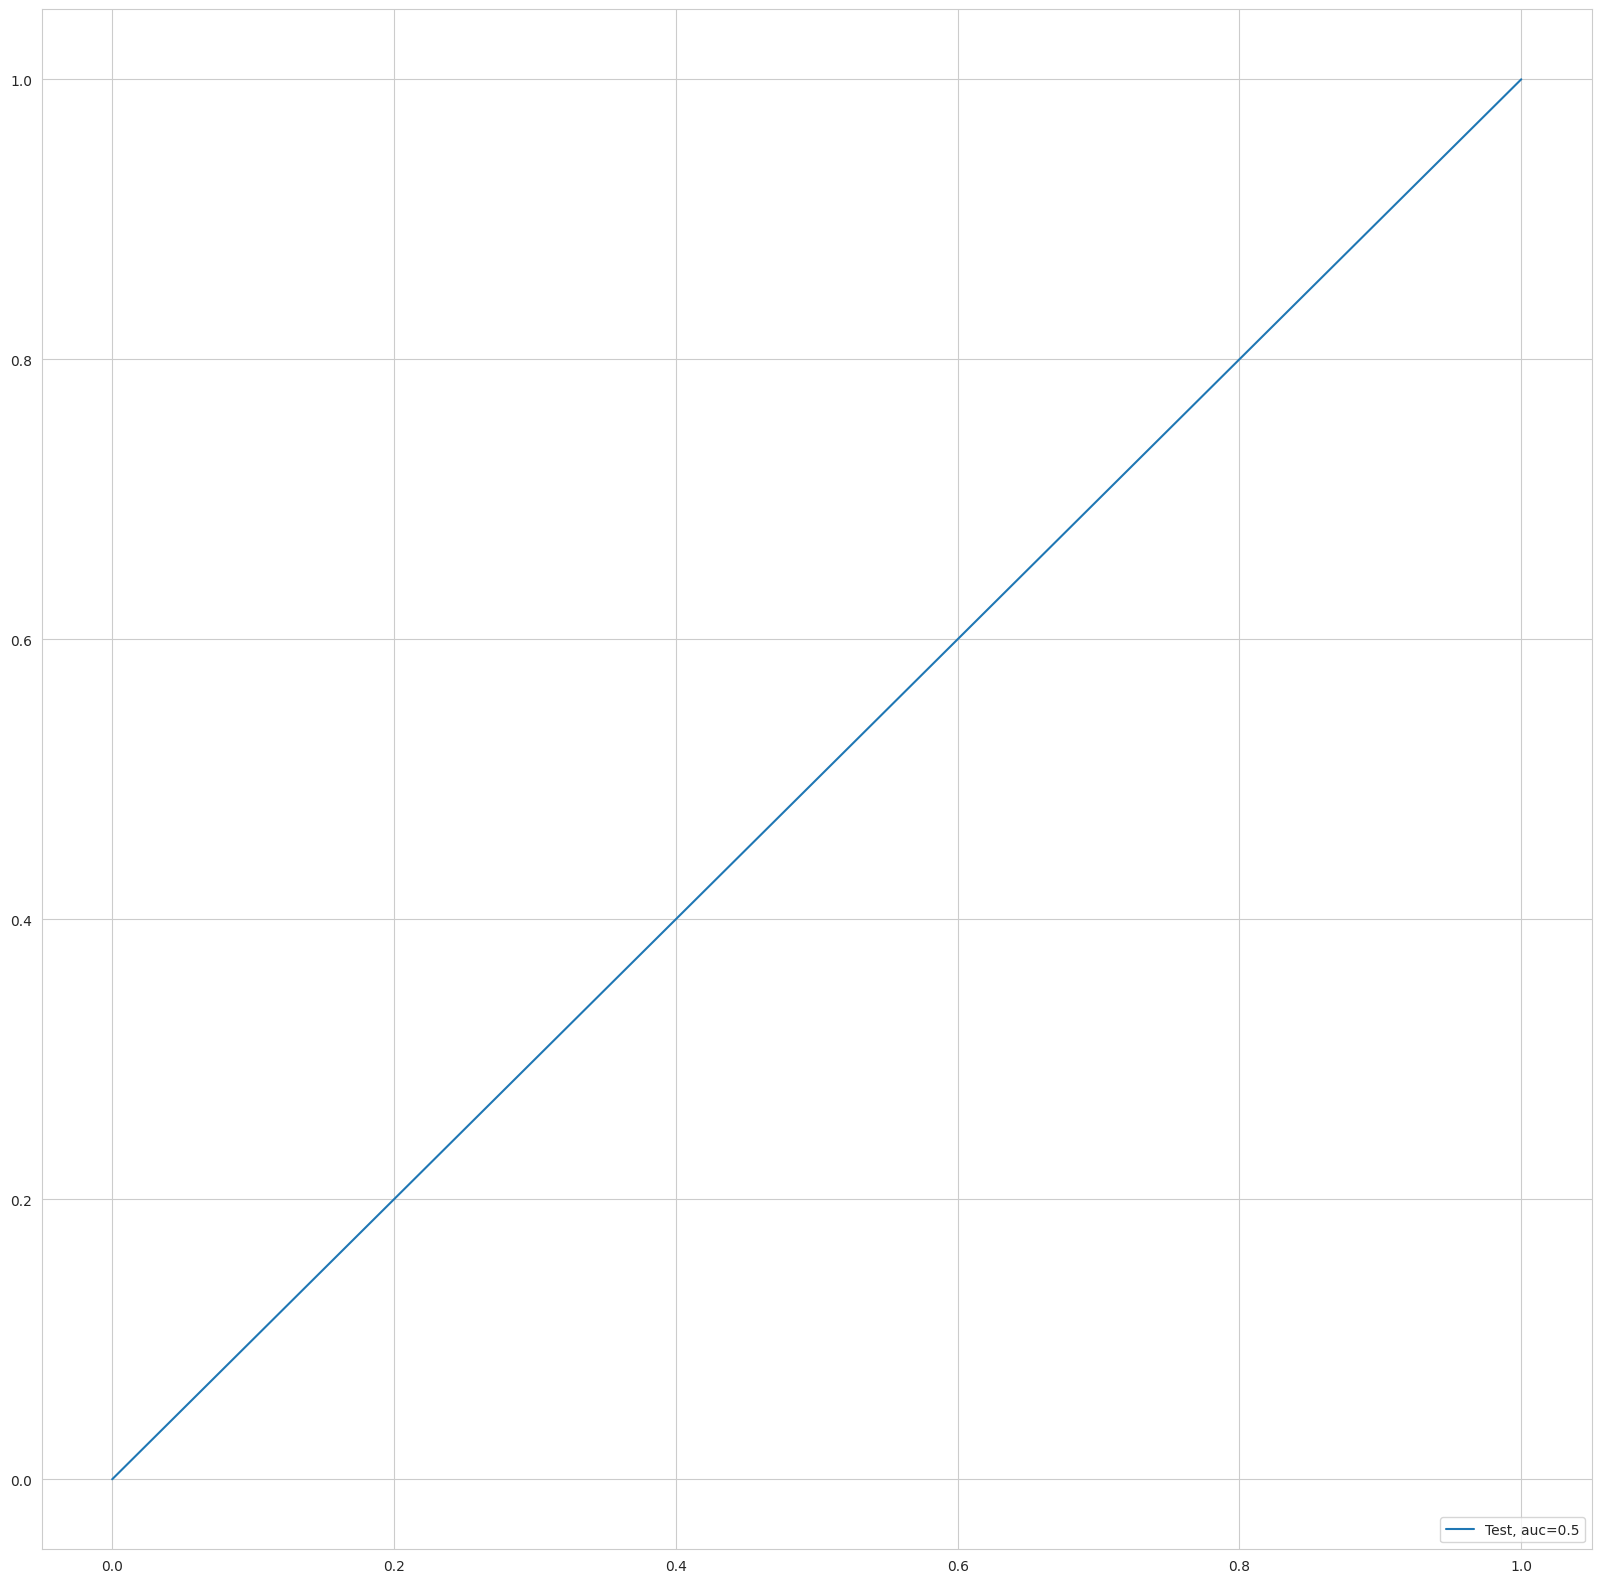

Time Taken by Model: --- 770.3473839759827 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9947053506090999
Confusion Matrix


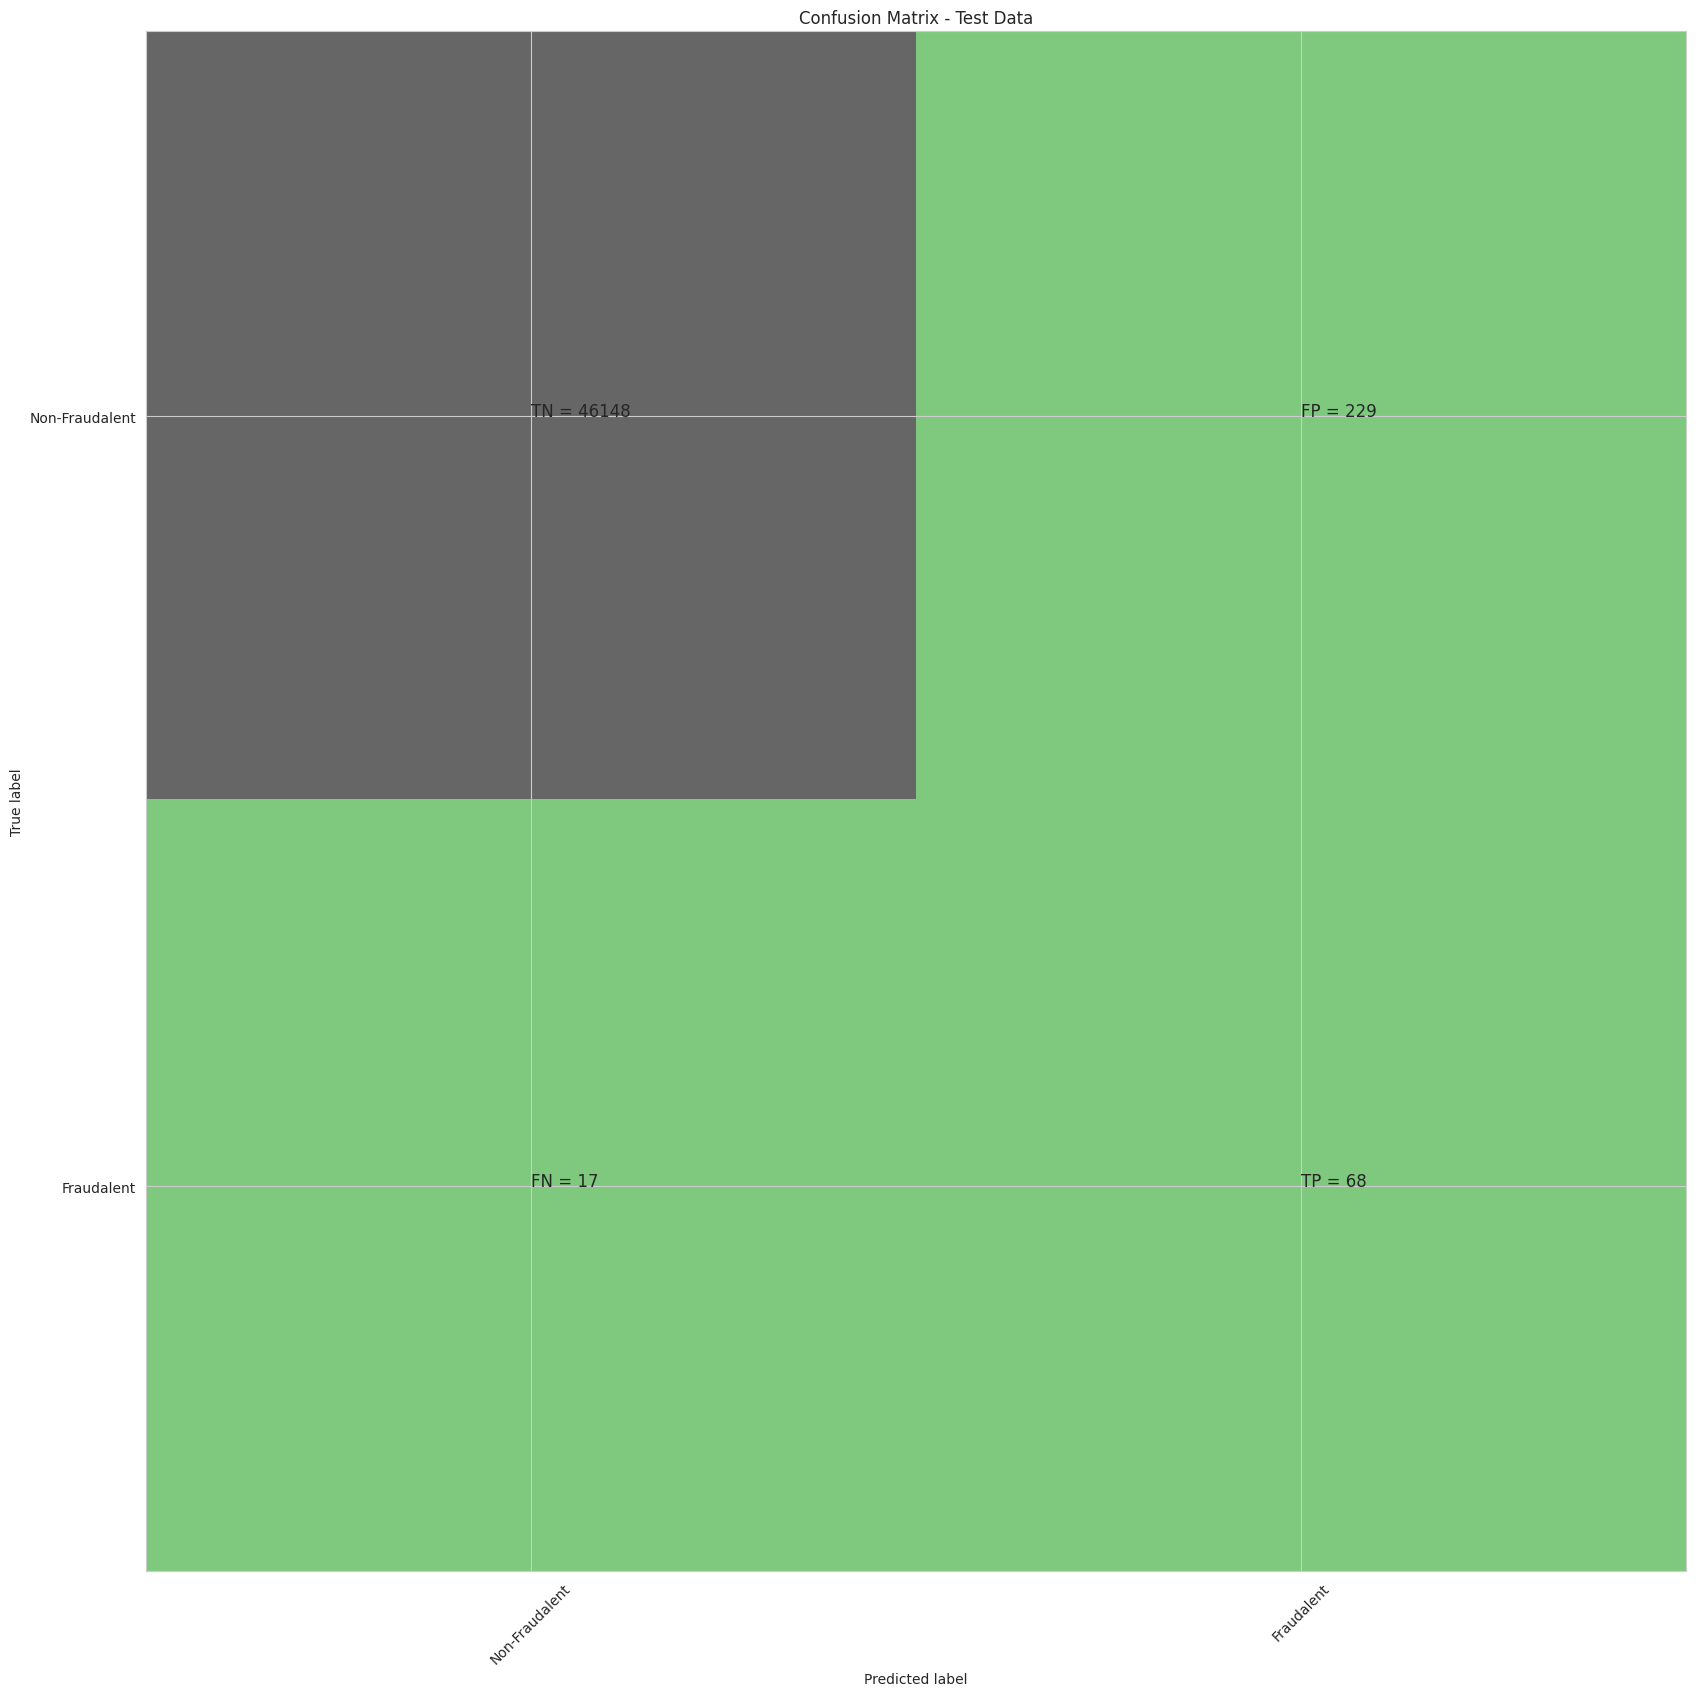

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46377
         1.0       0.23      0.80      0.36        85

    accuracy                           0.99     46462
   macro avg       0.61      0.90      0.68     46462
weighted avg       1.00      0.99      1.00     46462

KNN roc_value: 0.9158657498836265
KNN threshold: 0.2
ROC for the test dataset 91.6%


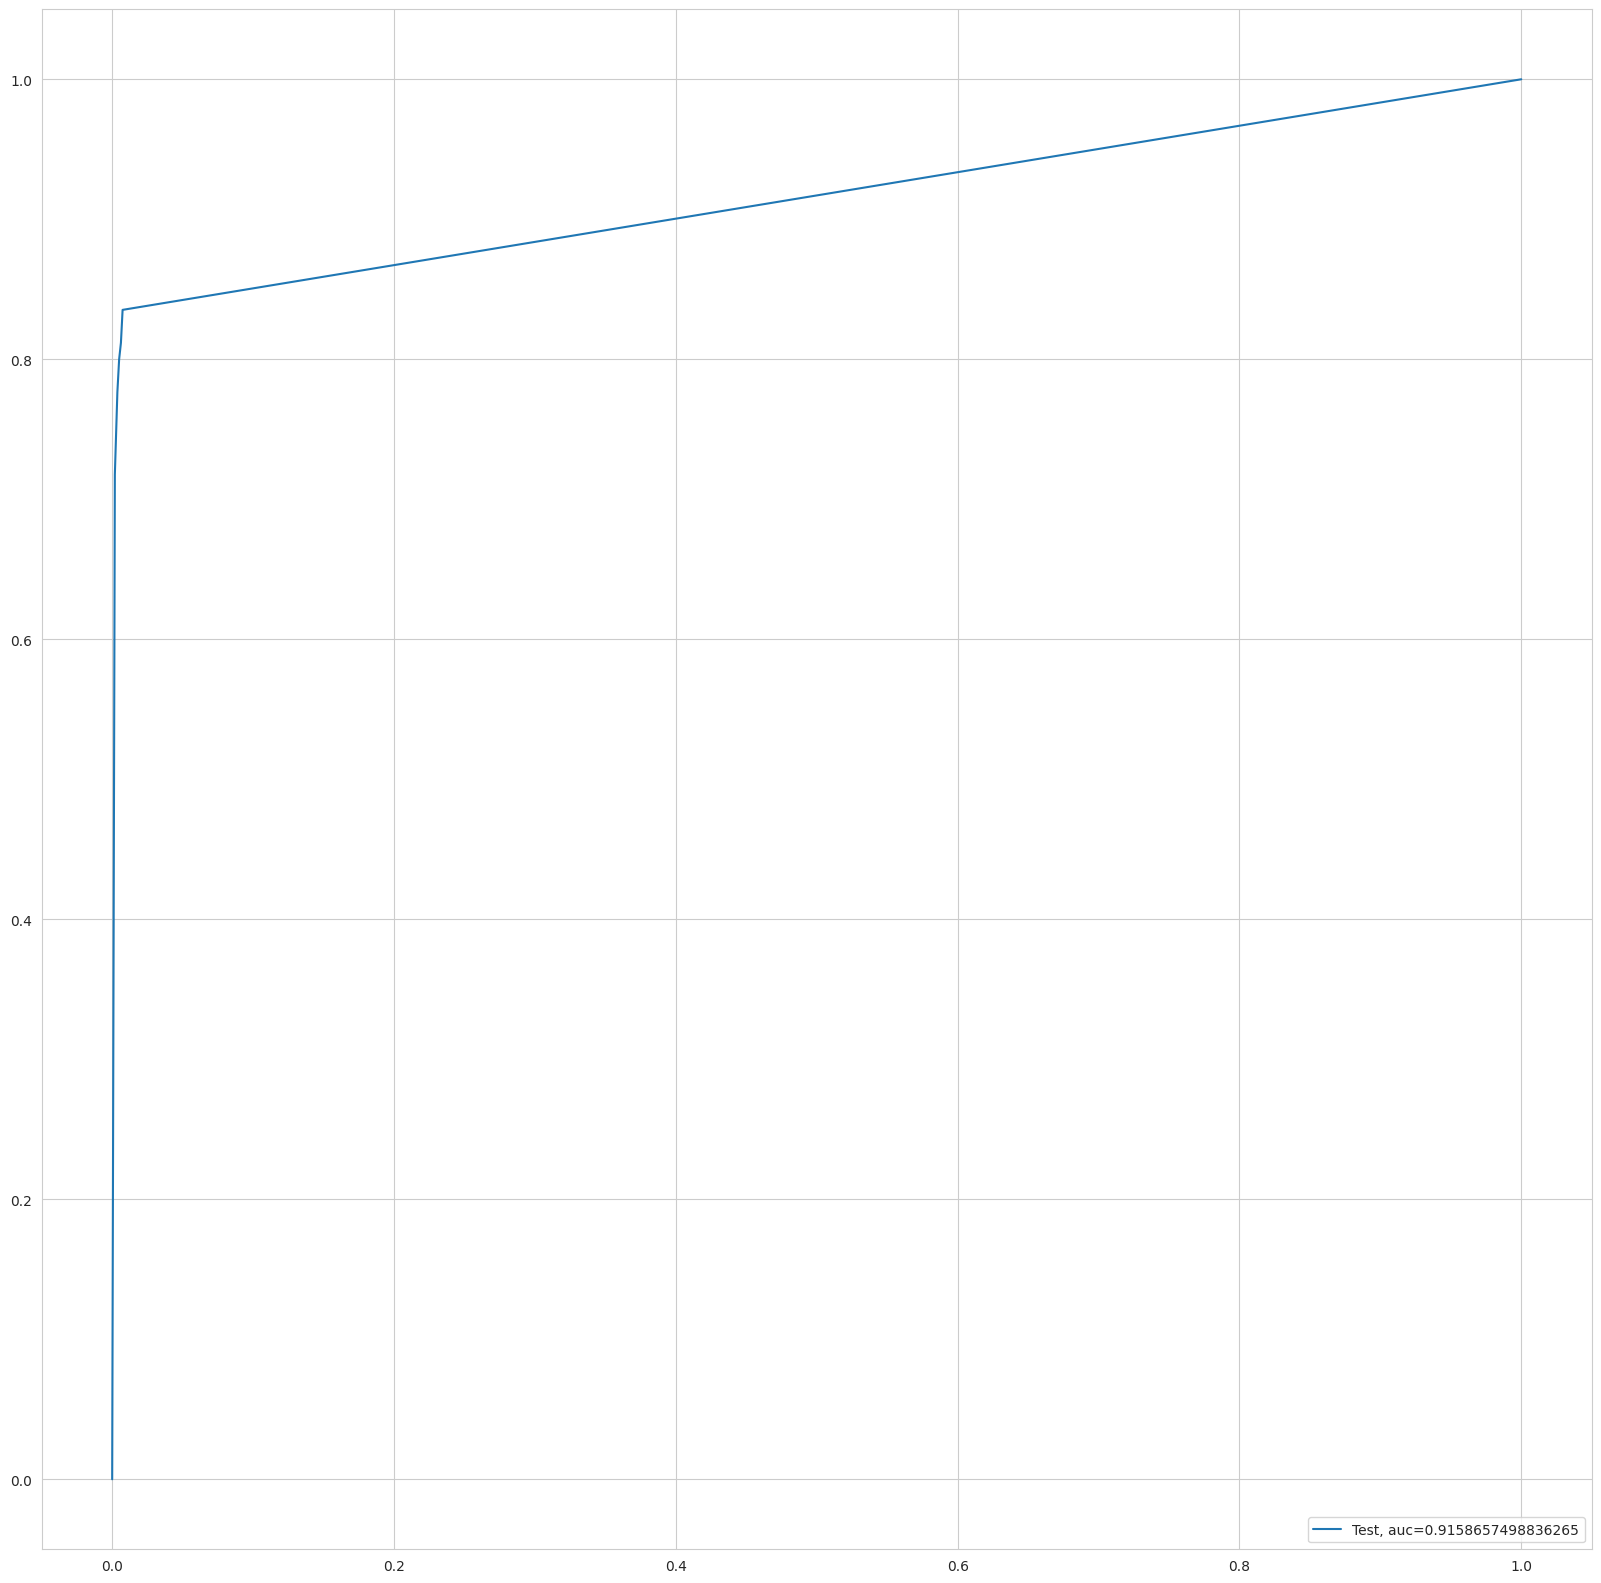

Time Taken by Model: --- 332.37960028648376 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9975248590245792
Confusion Matrix


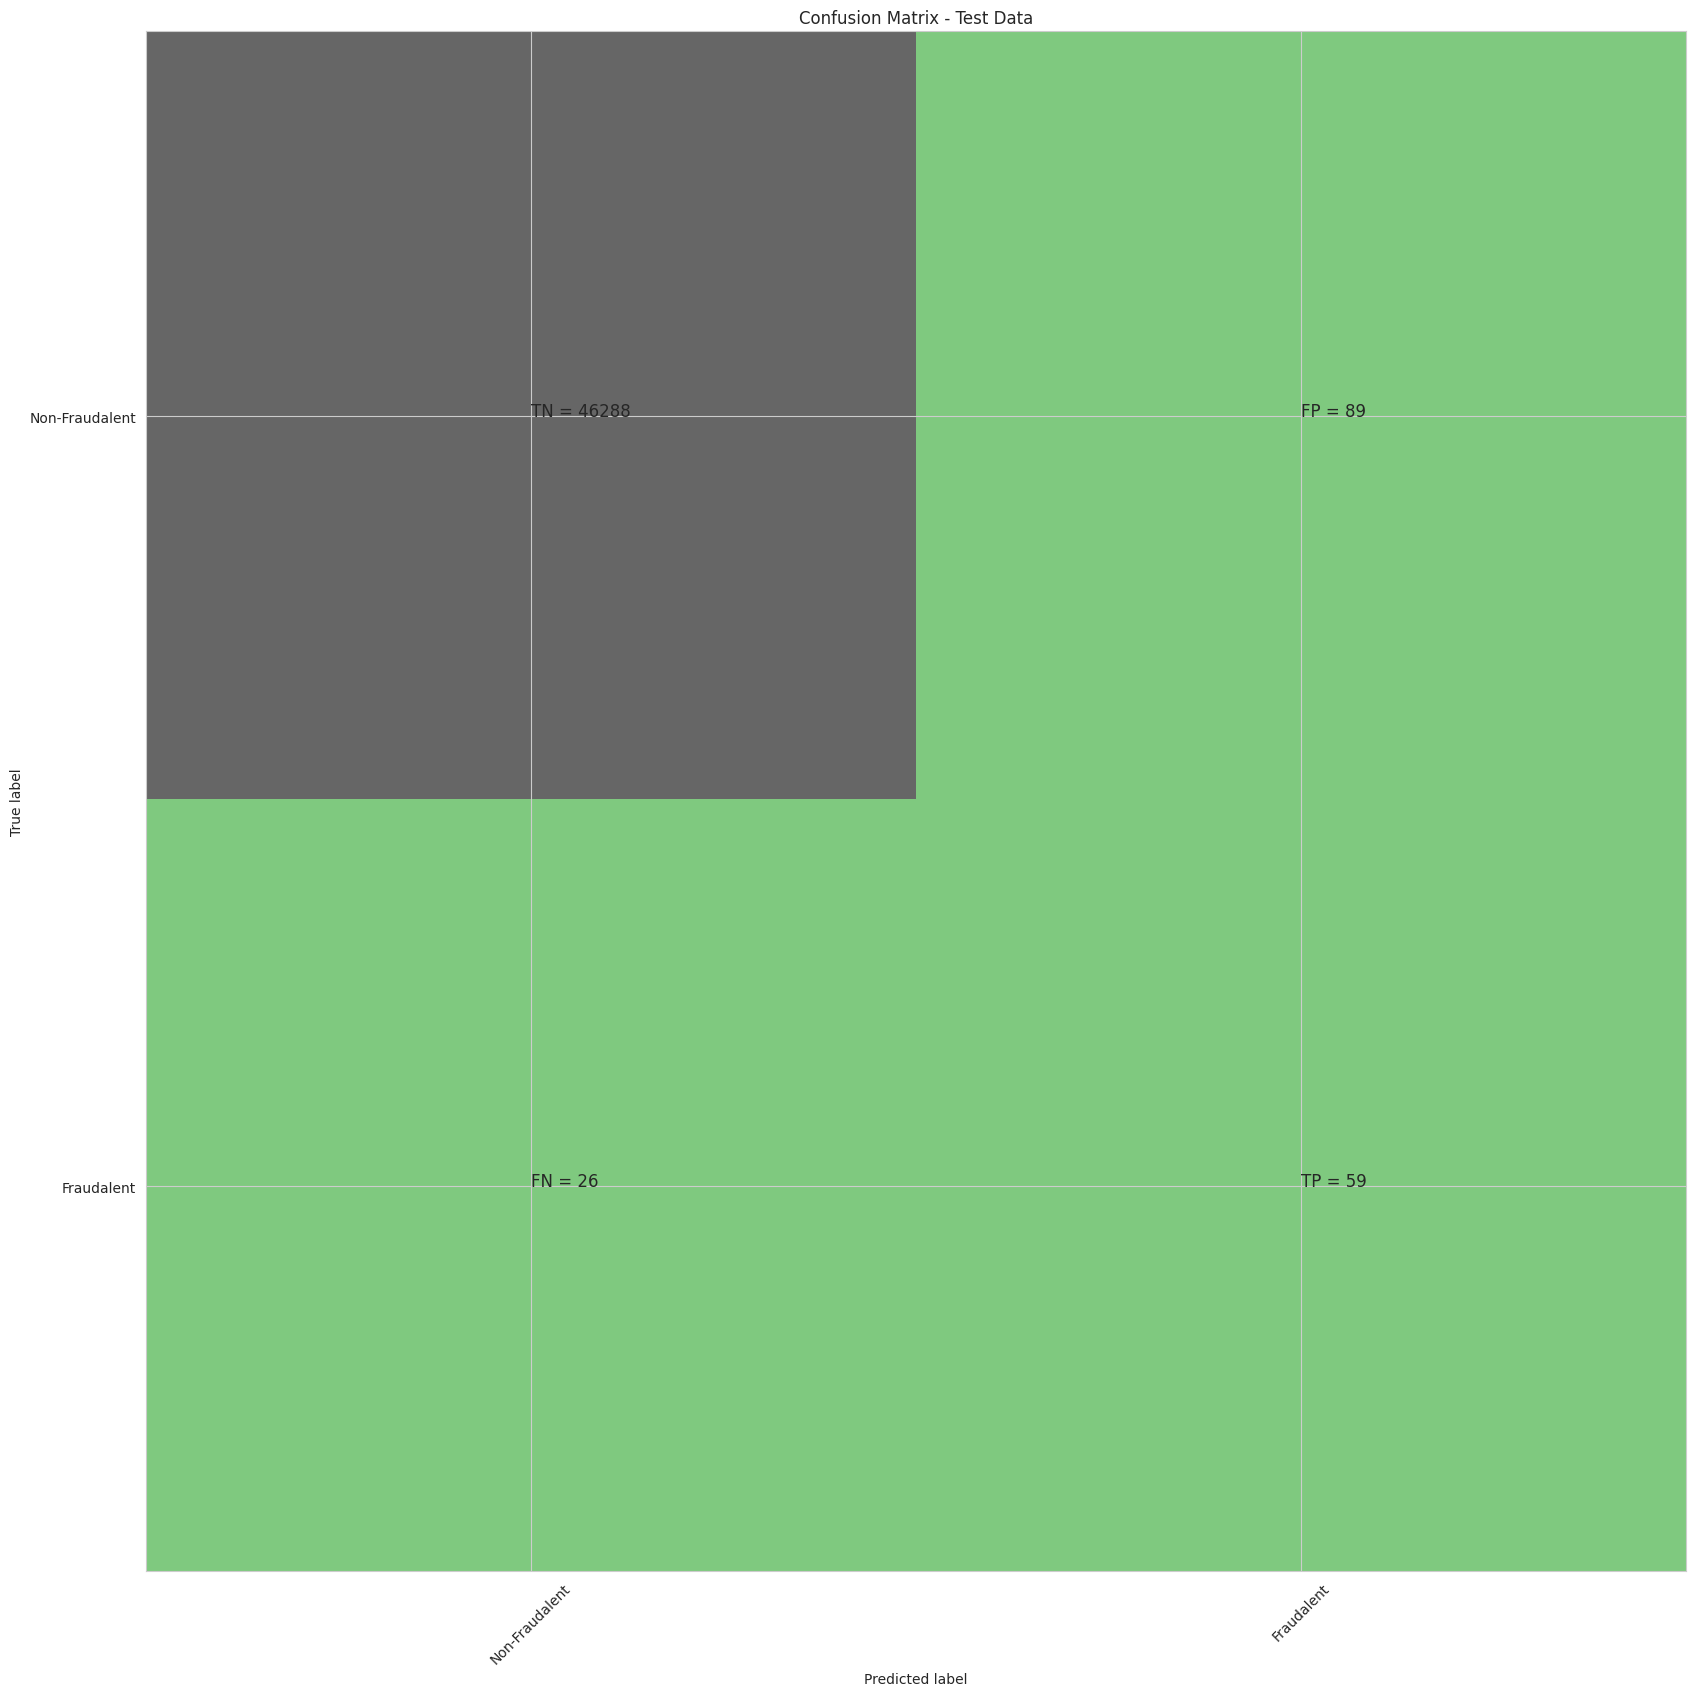

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46377
         1.0       0.40      0.69      0.51        85

    accuracy                           1.00     46462
   macro avg       0.70      0.85      0.75     46462
weighted avg       1.00      1.00      1.00     46462

gini tree_roc_value: 0.8460992961774917
Tree threshold: 1.0
ROC for the test dataset 84.6%


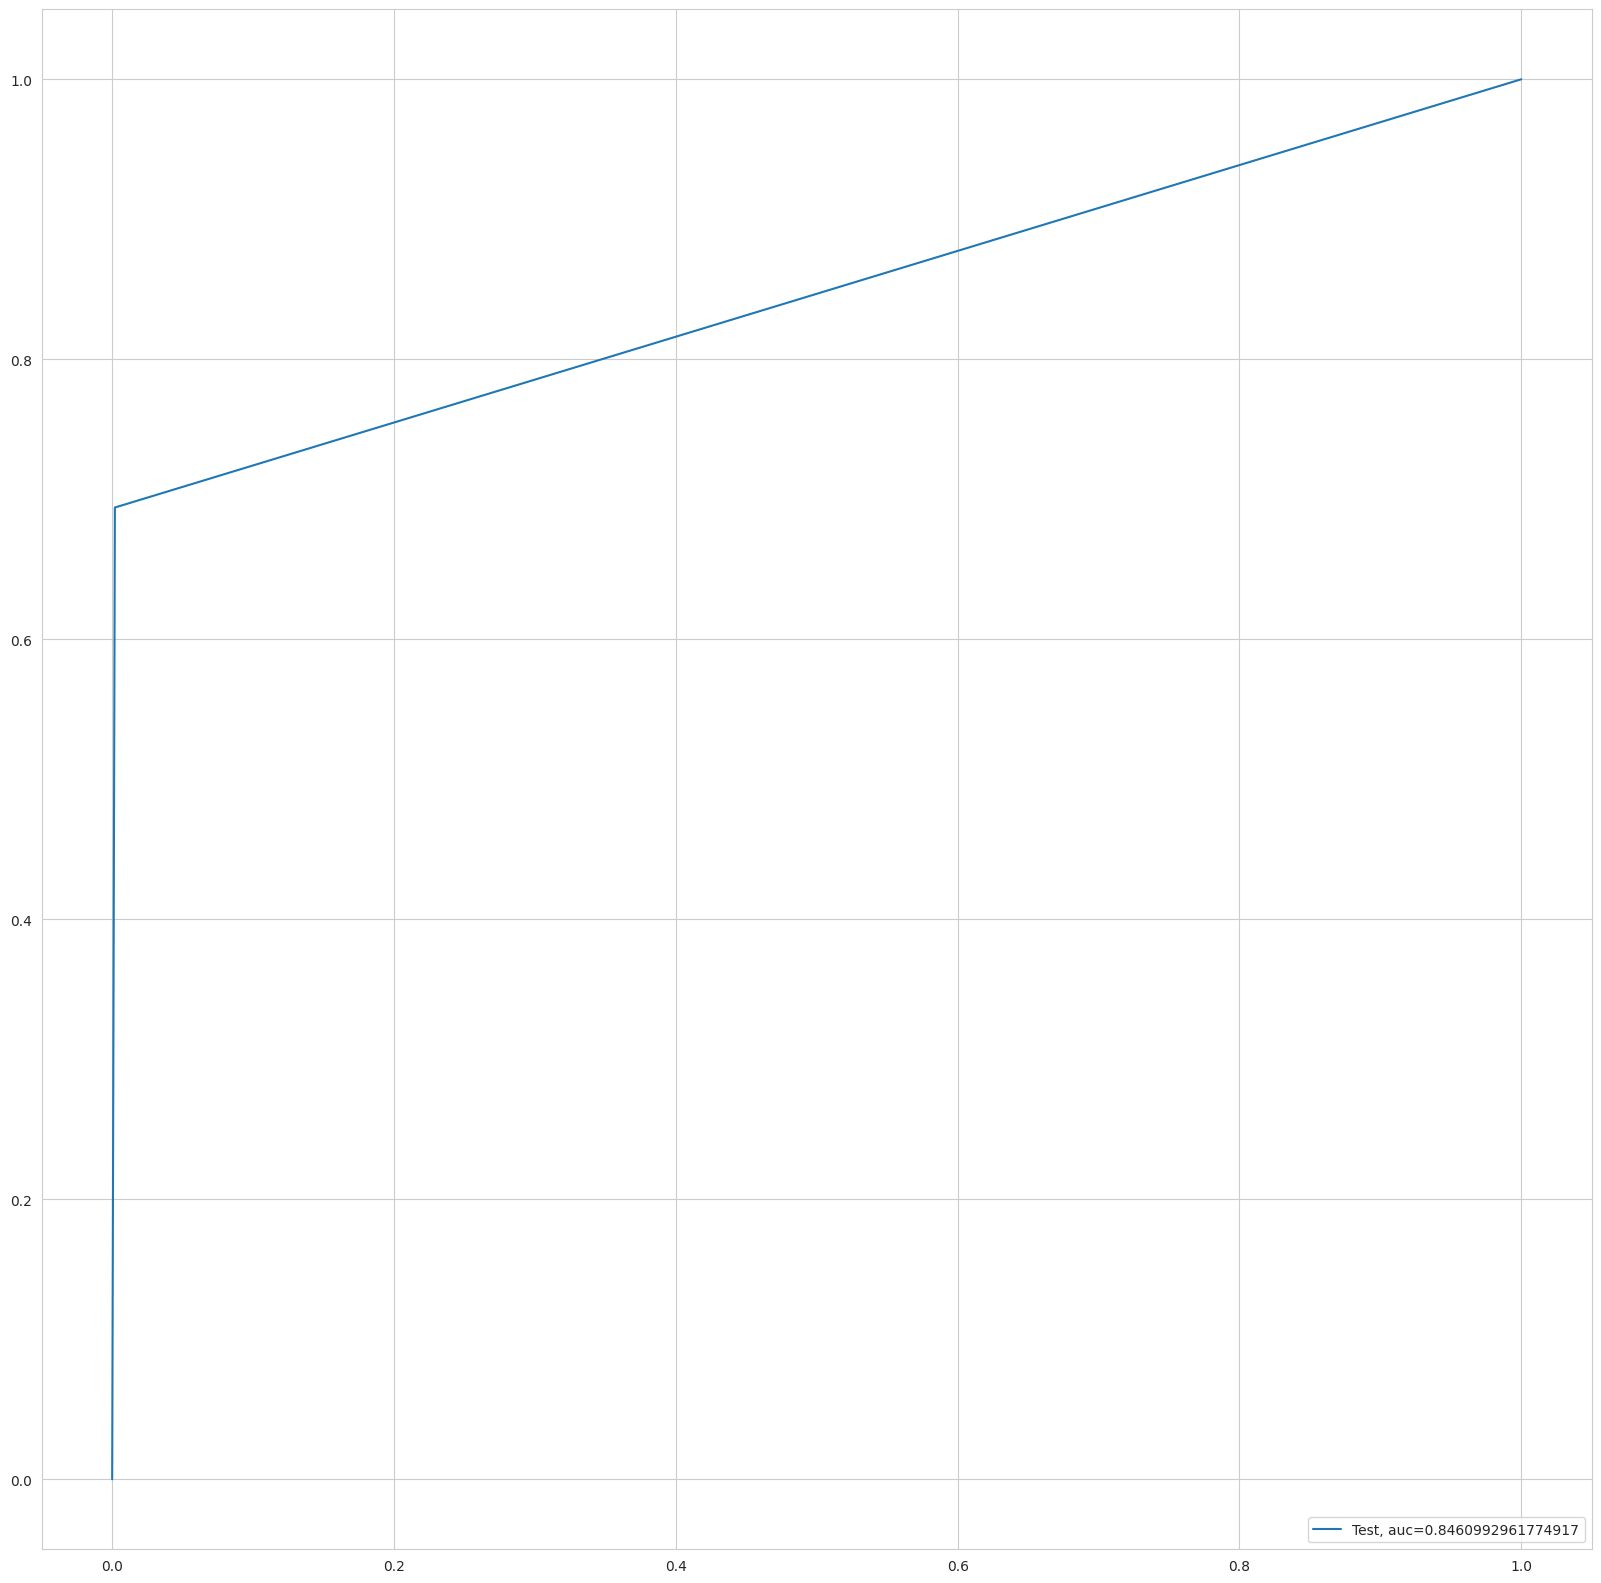

entropy score: 0.996211958159356
Confusion Matrix


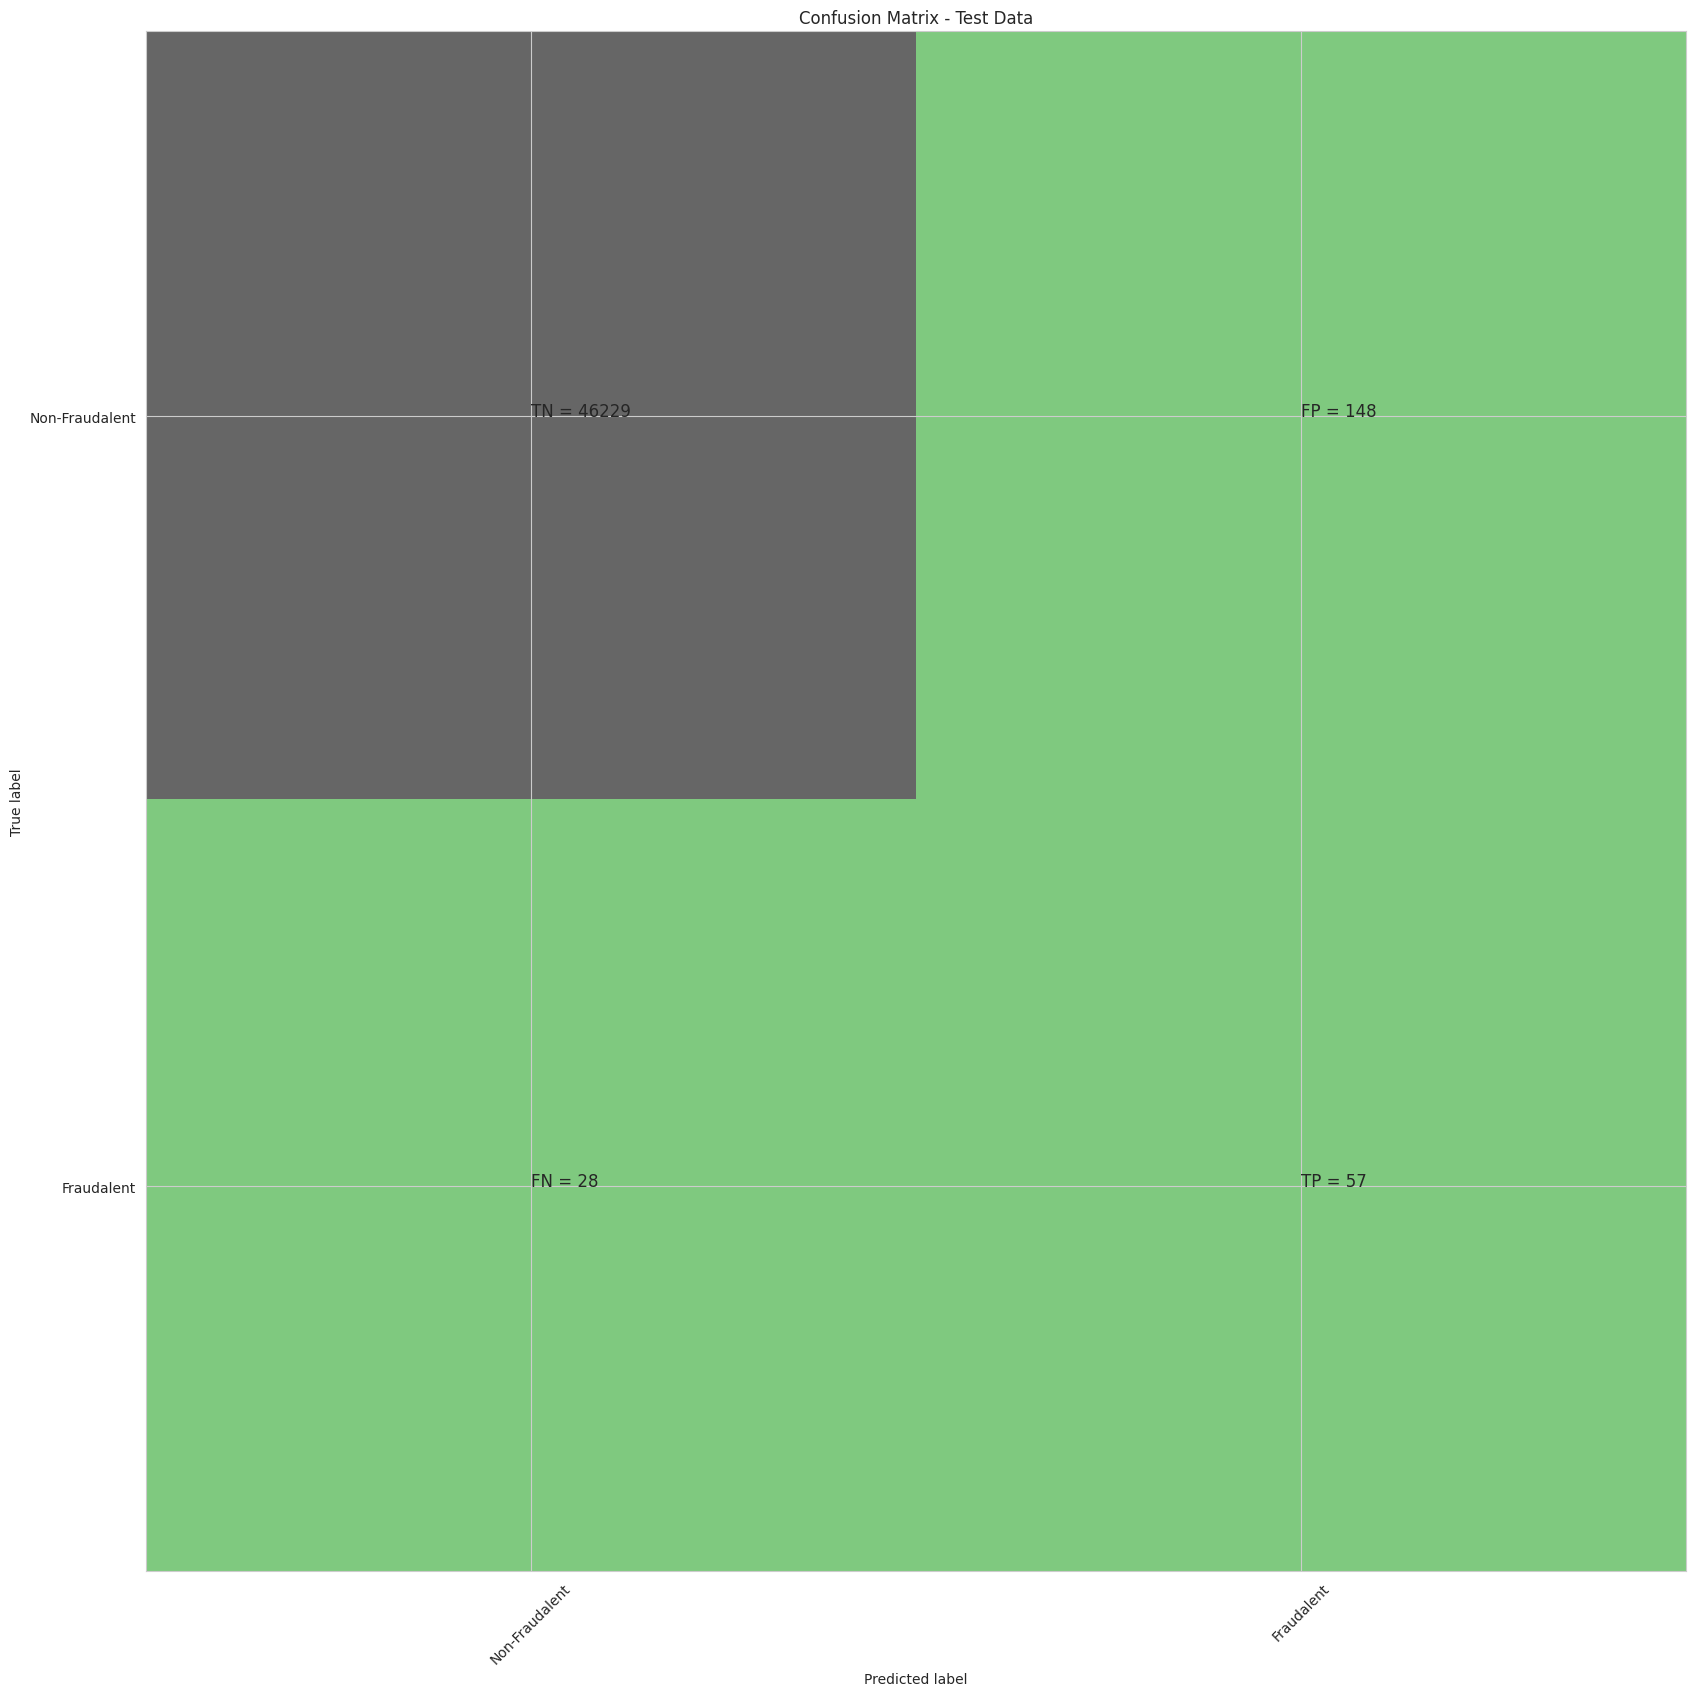

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46377
         1.0       0.28      0.67      0.39        85

    accuracy                           1.00     46462
   macro avg       0.64      0.83      0.70     46462
weighted avg       1.00      1.00      1.00     46462

entropy tree_roc_value: 0.833698499129259
Tree threshold: 1.0
ROC for the test dataset 83.4%


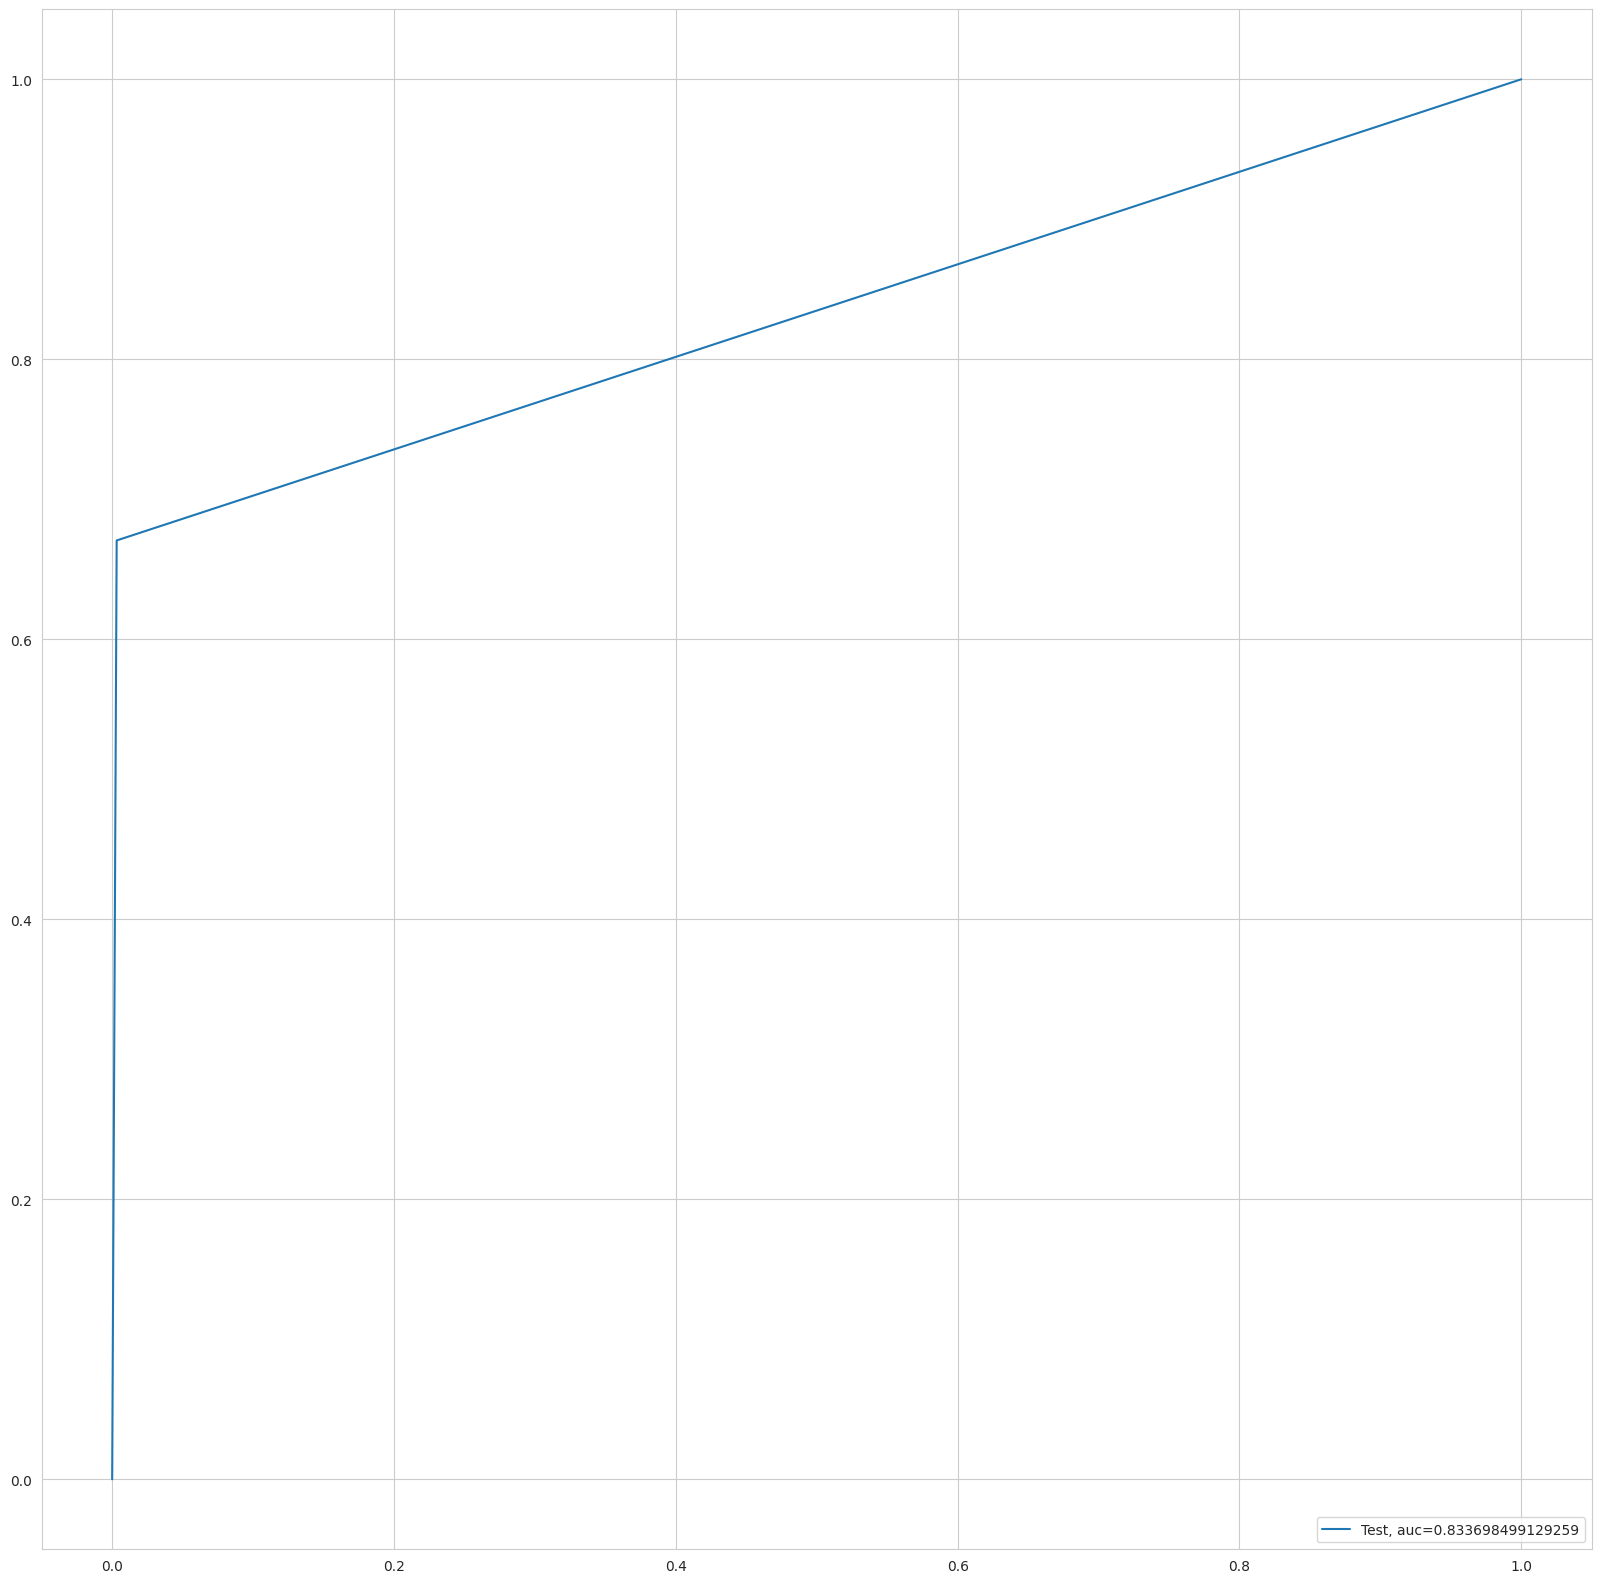

Time Taken by Model: --- 70.46631622314453 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995049718049158
Confusion Matrix


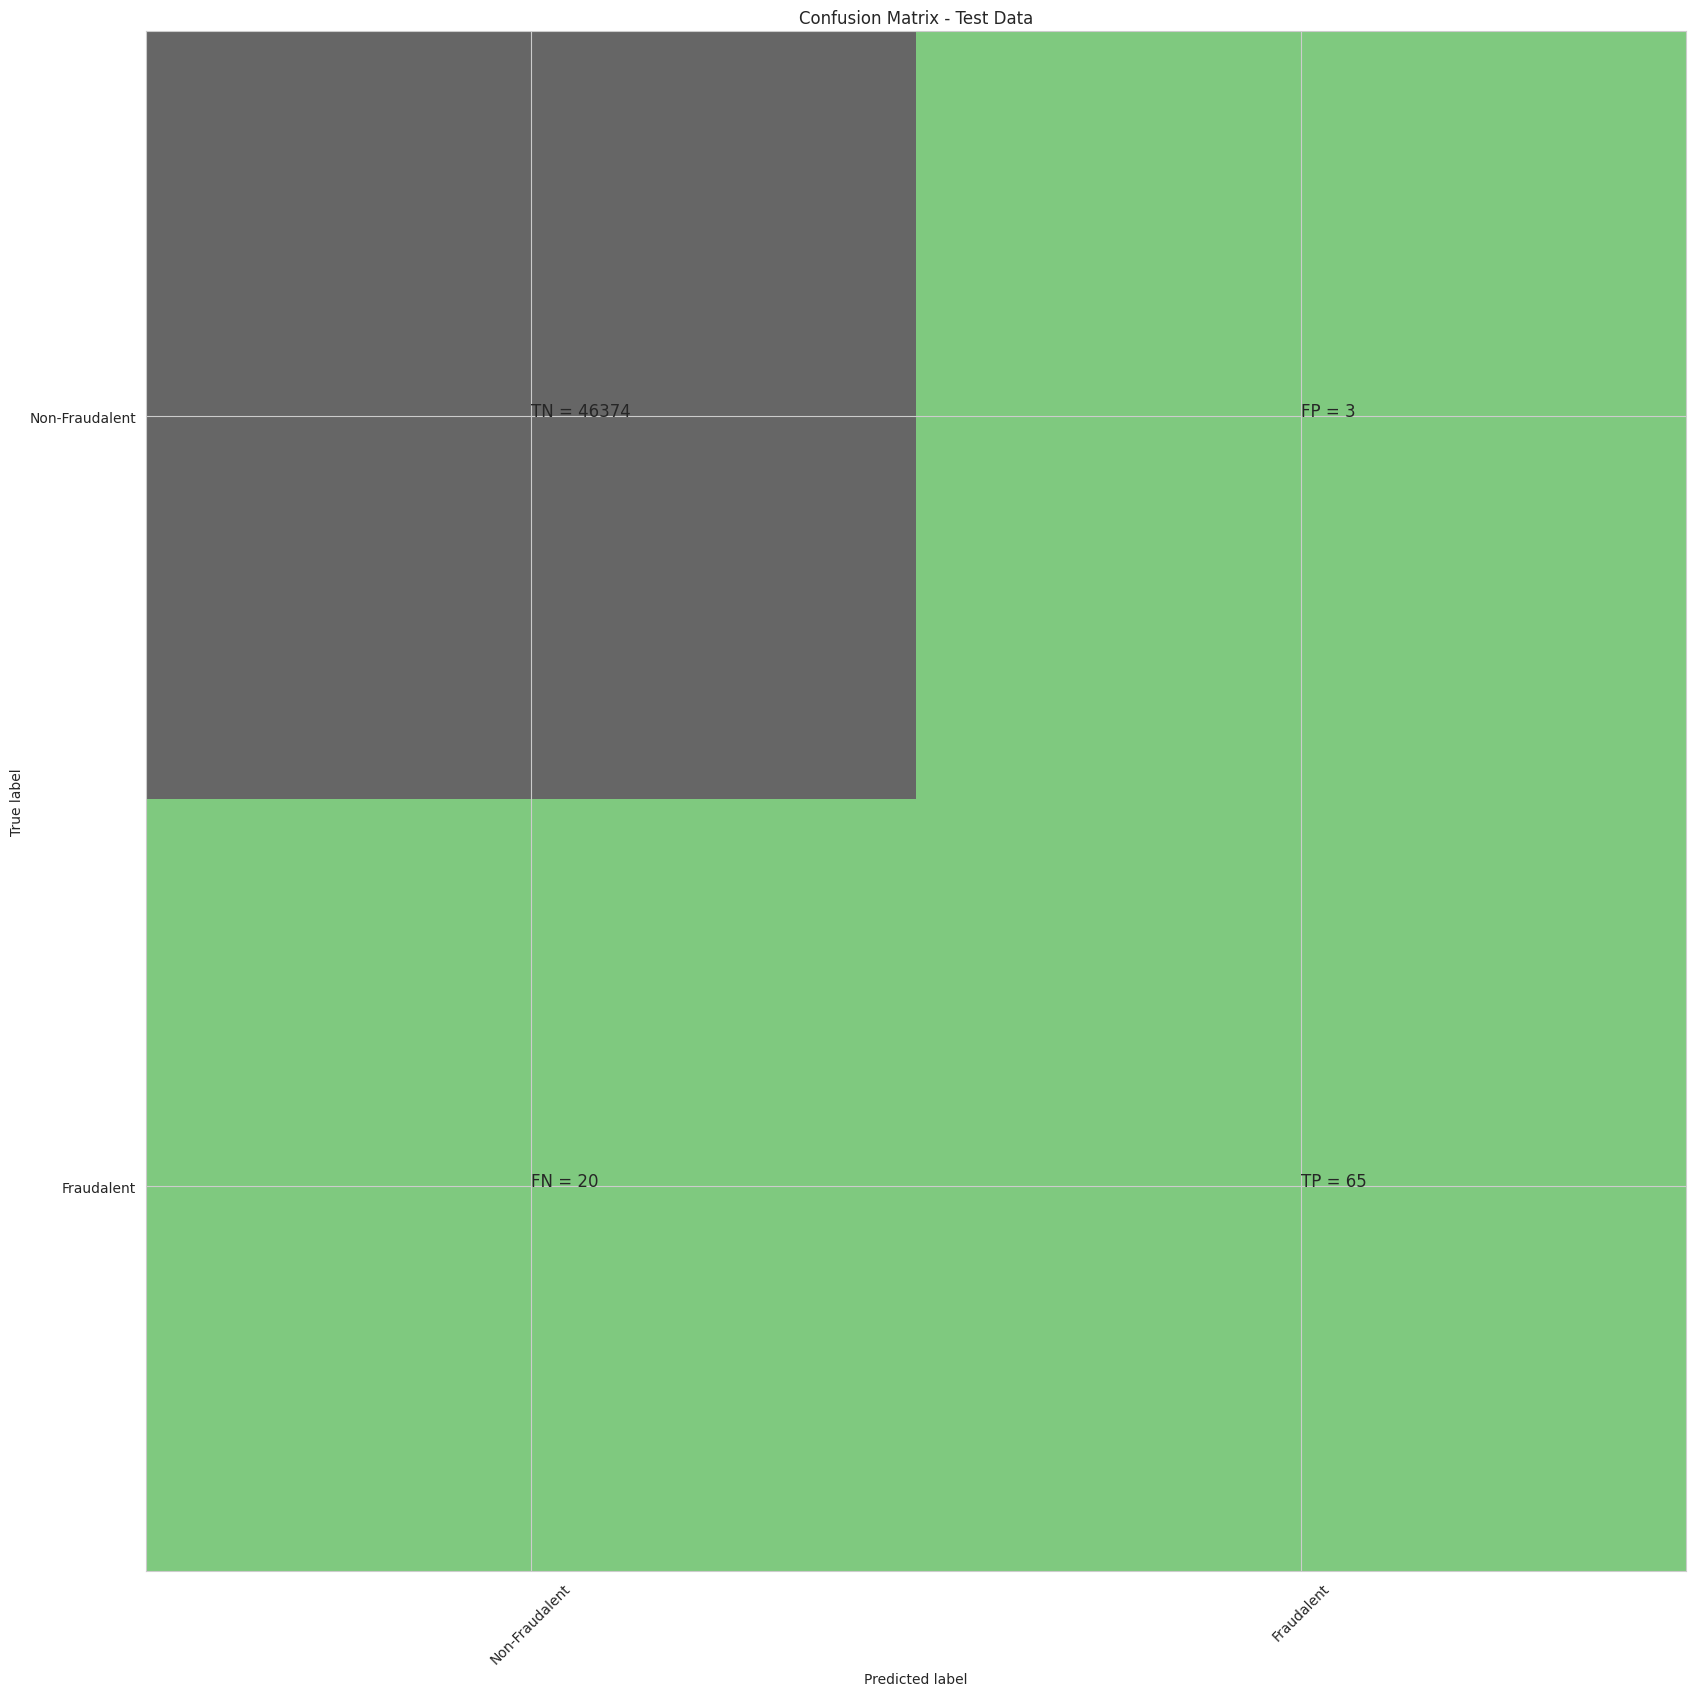

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46377
         1.0       0.96      0.76      0.85        85

    accuracy                           1.00     46462
   macro avg       0.98      0.88      0.92     46462
weighted avg       1.00      1.00      1.00     46462

Random Forest roc_value: 0.9536679566062792
Random Forest threshold: 0.09
ROC for the test dataset 95.4%


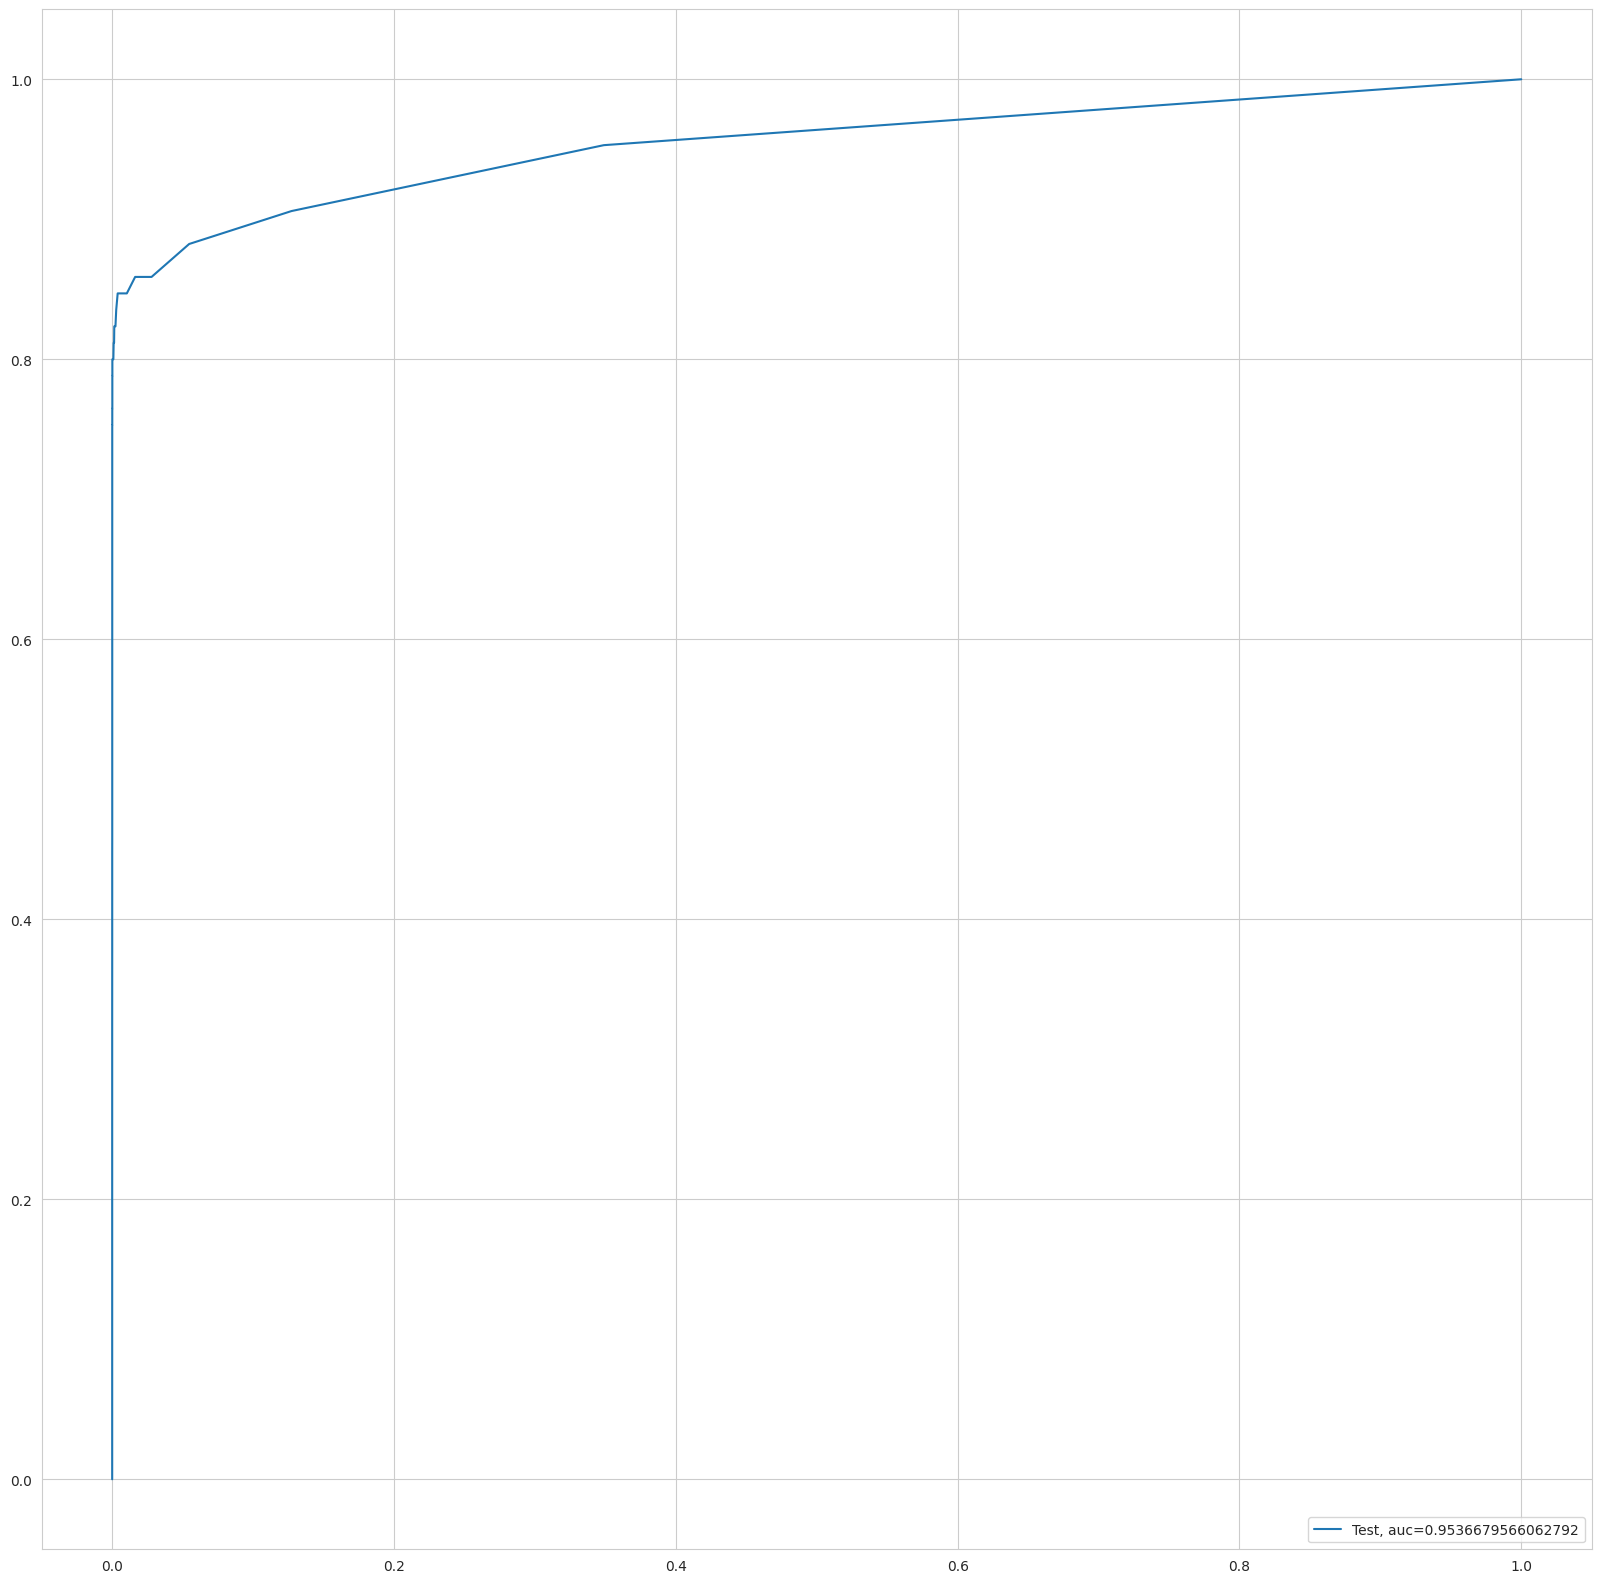

Time Taken by Model: --- 381.58549976348877 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9993543110498903
Confusion Matrix


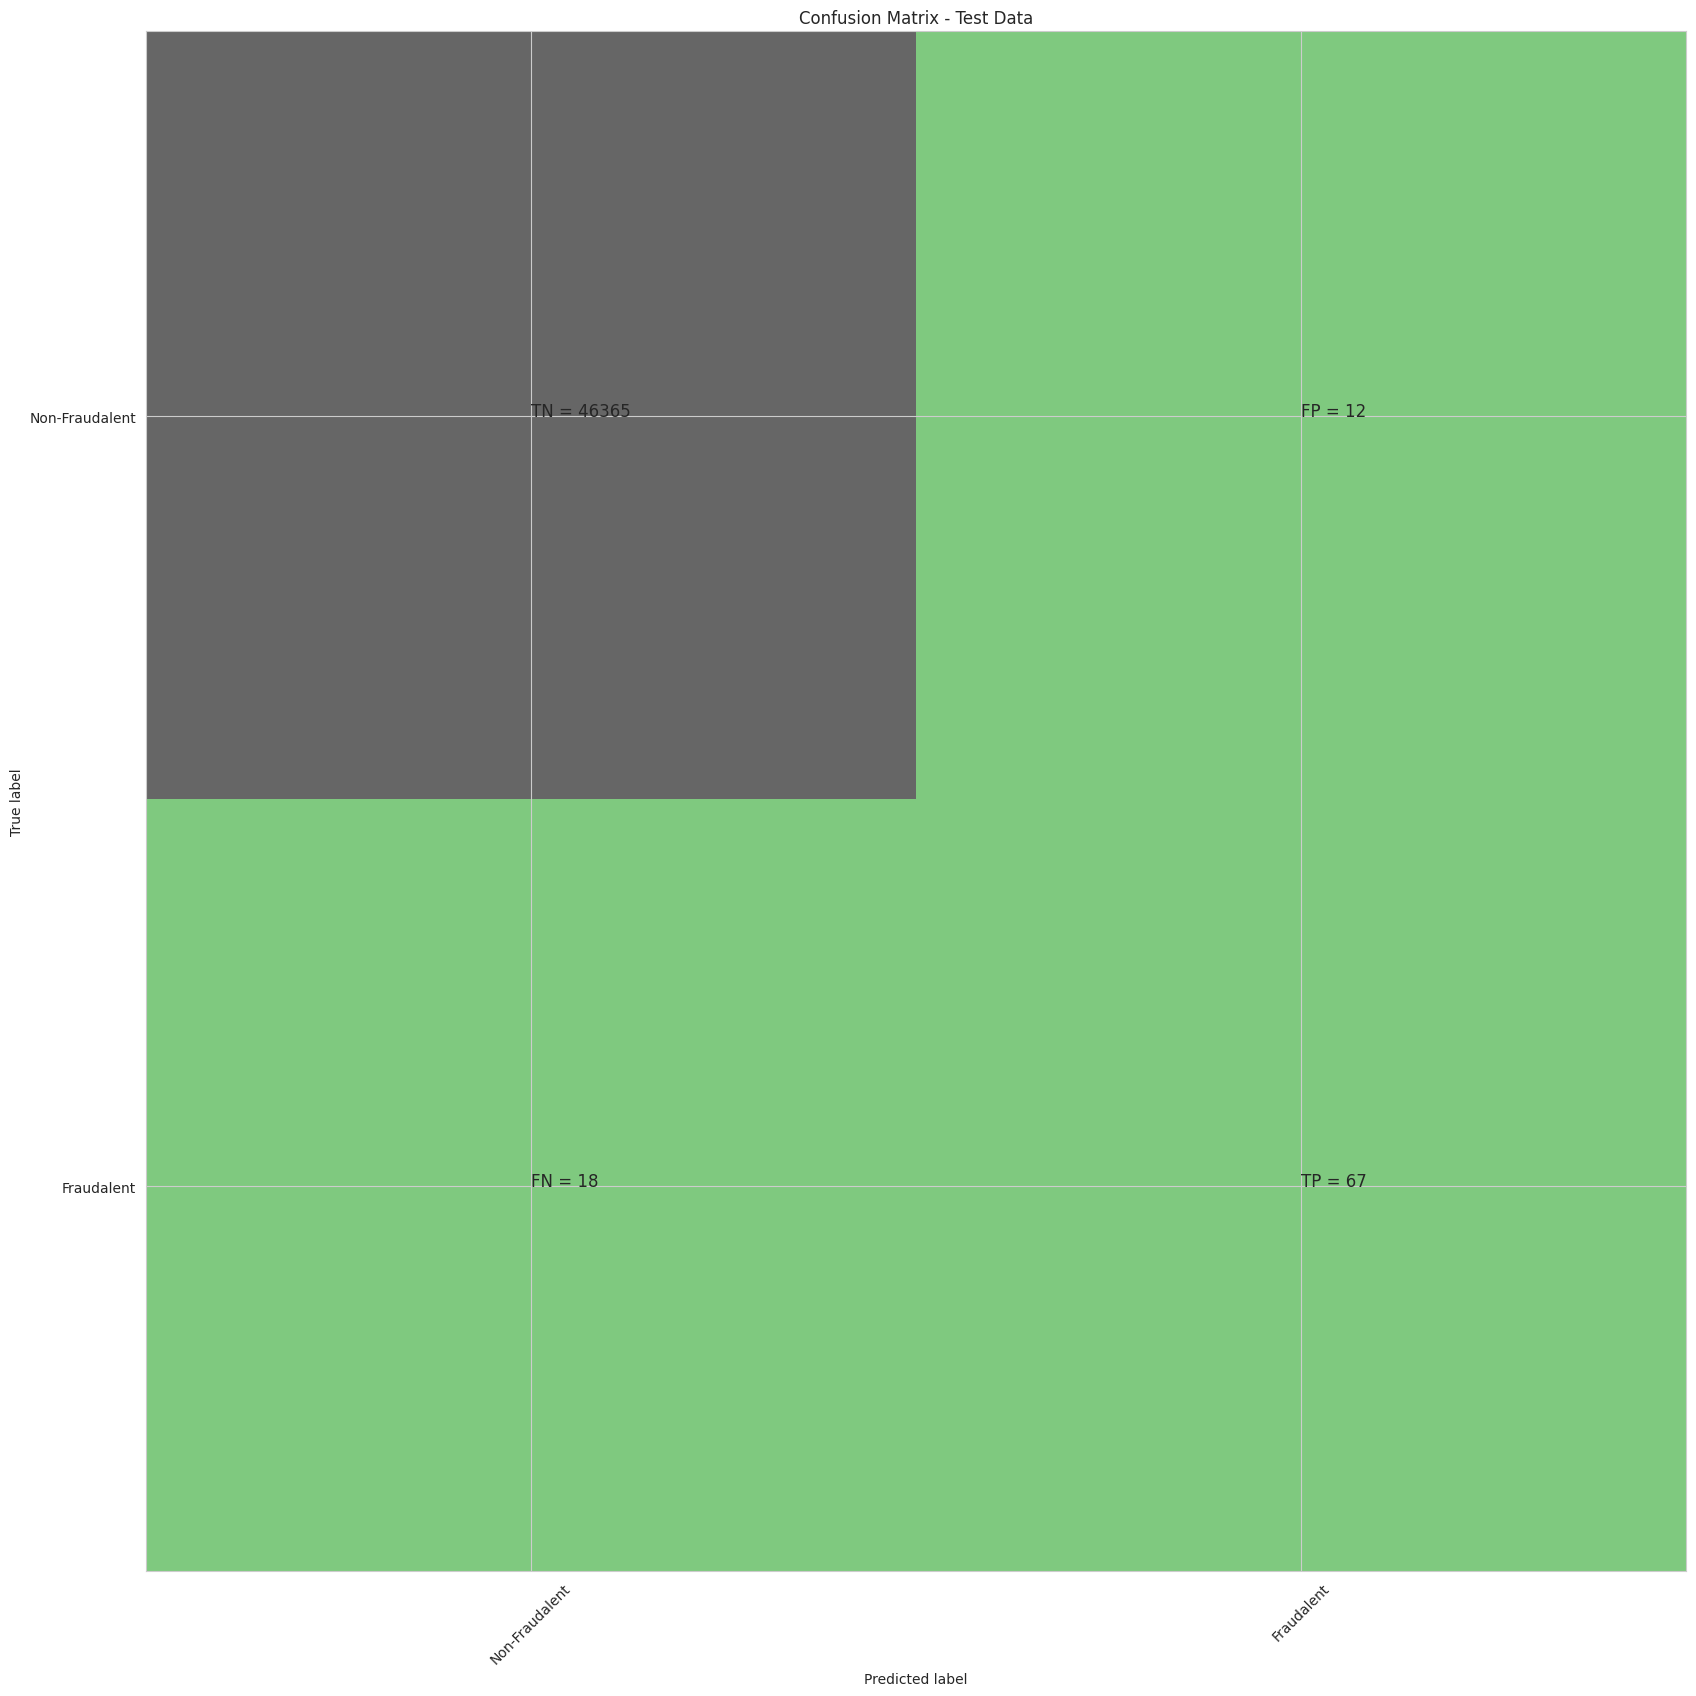

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46377
         1.0       0.85      0.79      0.82        85

    accuracy                           1.00     46462
   macro avg       0.92      0.89      0.91     46462
weighted avg       1.00      1.00      1.00     46462

XGboost roc_value: 0.9644130140574245
XGBoost threshold: 0.00013591769675258547
ROC for the test dataset 96.4%


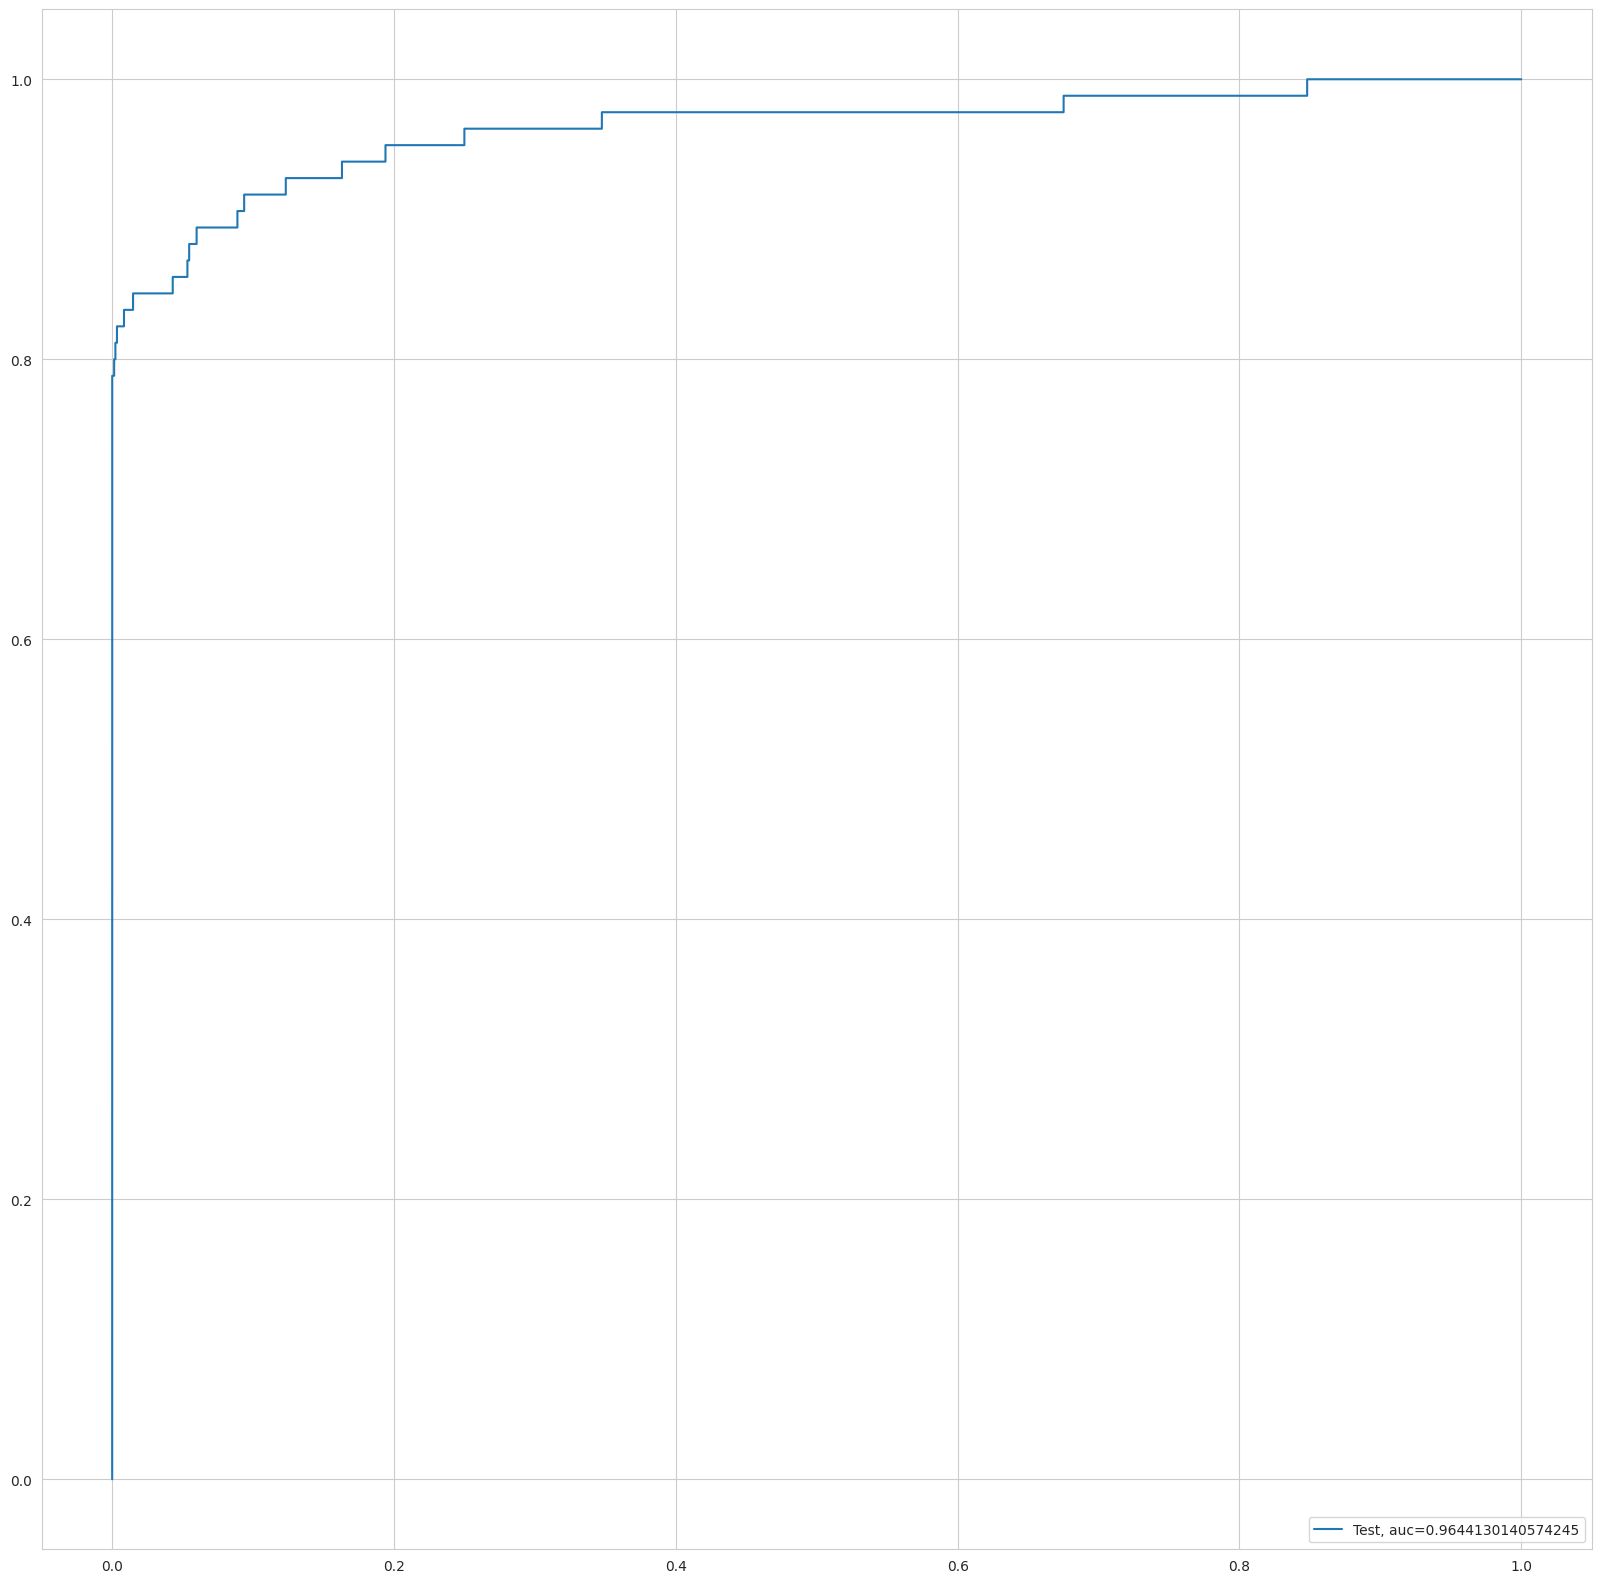

Time Taken by Model: --- 263.2753703594208 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#df_Results = buildAndRunSVMModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [33]:
df_Results

Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                 RepeatedKFold Cross Validation   
9                 RepeatedKFold Cross Validation   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16              StratifiedKFold Cross Validation   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21              StratifiedKFold Cross Validation   
22              StratifiedKFold Cross Validation   
23              StratifiedKFold Cross Validation   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28                          Random Undersampling   
29                          Random Undersampling   
30                          Random Undersampling   
31                          Random Undersampling   
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    
34  Random Oversampling with StratifiedKFold CV    
35  Random Oversampling with StratifiedKFold CV    
36  Random Oversampling with StratifiedKFold CV    
37  Random Oversampling with StratifiedKFold CV    
38  Random Oversampling with StratifiedKFold CV    
39  Random Oversampling with StratifiedKFold CV    
40  Random Oversampling with StratifiedKFold CV    
41  Random Oversampling with StratifiedKFold CV    
42  Random Oversampling with StratifiedKFold CV    
43  Random Oversampling with StratifiedKFold CV    
44  Random Oversampling with StratifiedKFold CV    
45  Random Oversampling with StratifiedKFold CV    
46   ADASYN Oversampling with StratifiedKFold CV   
47   ADASYN Oversampling with StratifiedKFold CV   
48   ADASYN Oversampling with StratifiedKFold CV   
49   ADASYN Oversampling with StratifiedKFold CV   
50   ADASYN Oversampling with StratifiedKFold CV   
51   ADASYN Oversampling with StratifiedKFold CV   
52   ADASYN Oversampling with StratifiedKFold CV   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998999   0.966806   0.001289  
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
2                                          KNN  0.999298   0.900851   0.200000  
3                Tree Model with gini criteria  0.998806   0.859015   1.000000  
4             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999456   0.972998   0.000051  
7                                          SVM  0.998560   0.891311   0.000893  
8   Logistic Regression with L2 Regularisation  0.999298   0.984187   0.002163  
9   Logistic Regression with L1 Regularisation  0.999210   0.838287   0.103159  
10                                         KNN  0.999333   0.873343   0.200000  
11               Tree Model with gini criteria  0.999245   0.867640   1.000000  
12            Tree Model with entropy criteria  0.999228   0.890585   1.000000  
13                               Random Forest  0.999631   0.940580   0.010000  


**Results for ADASYN Oversampling:**

Looking at Accuracy and ROC value we have XGBoost which has provided best results for ADASYN oversampling technique

# Overall conclusion after running models on Oversampled data:
Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results

**But looking at the results Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling**.
# Parameter Tuning for Final Model by Handling class imbalance

In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_ADASYN, y_train_ADASYN )

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9977353323268143
XGboost roc_value: 0.996010613494742
XGBoost threshold: 0.02022095024585724


In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)

In [ ]:
#Lets tune XGBoost Model for max_depth and min_child_weight
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 

param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(
    estimator=XGBClassifier(
        base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, colsample_bytree=1, gamma=0,
        learning_rate=0.1, max_delta_step=0, max_depth=3,
        min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
        nthread=None, objective='binary:logistic', random_state=42,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=None, subsample=1, verbosity=1
    ), 
    param_grid=param_test,
    scoring='roc_auc',
    n_jobs=4,
    cv=5
)

gsearch1.fit(X_train_ADASYN, y_train_ADASYN)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_


"from xgboost.sklearn import XGBClassifier\nfrom sklearn.model_selection import GridSearchCV \nparam_test = {\n 'max_depth':range(3,10,2),\n 'min_child_weight':range(1,6,2)\n}\ngsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1, gamma=0,\n              learning_rate=0.1, max_delta_step=0, max_depth=3,\n              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,\n              nthread=None, objective='binary:logistic', random_state=42,\n              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,\n              silent=None, subsample=1, verbosity=1), \n param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)\ngsearch1.fit(X_train_ADASYN, y_train_ADASYN)\ngsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_"

In [ ]:
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 

param_test = {
 'n_estimators':range(60,150,20)
}

gsearch1 = GridSearchCV(
    estimator=XGBClassifier(
        base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, colsample_bytree=1, gamma=0,
        learning_rate=0.1, max_delta_step=0, max_depth=3,
        min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
        nthread=None, objective='binary:logistic', random_state=42,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=None, subsample=1, verbosity=1
    ), 
    param_grid=param_test,
    scoring='roc_auc',
    n_jobs=3,
    cv=3
)

gsearch1.fit(X_train_ADASYN, y_train_ADASYN)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_


In [40]:
X_test.isnull().sum()

V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          0
V18          0
V19          0
V20          0
V21          0
V22          0
V23          0
V24          0
V25          0
V26          0
V27          0
V28          0
Amount       0
Time_Hour    0
dtype: int64

In [42]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9993855444953564
XGboost roc_value: 0.9852138347557161
XGBoost threshold: 0.005087878089398146


**Print the important features of the best model to understand the dataset**

Top var = 14
2nd Top var = 10
3rd Top var = 4


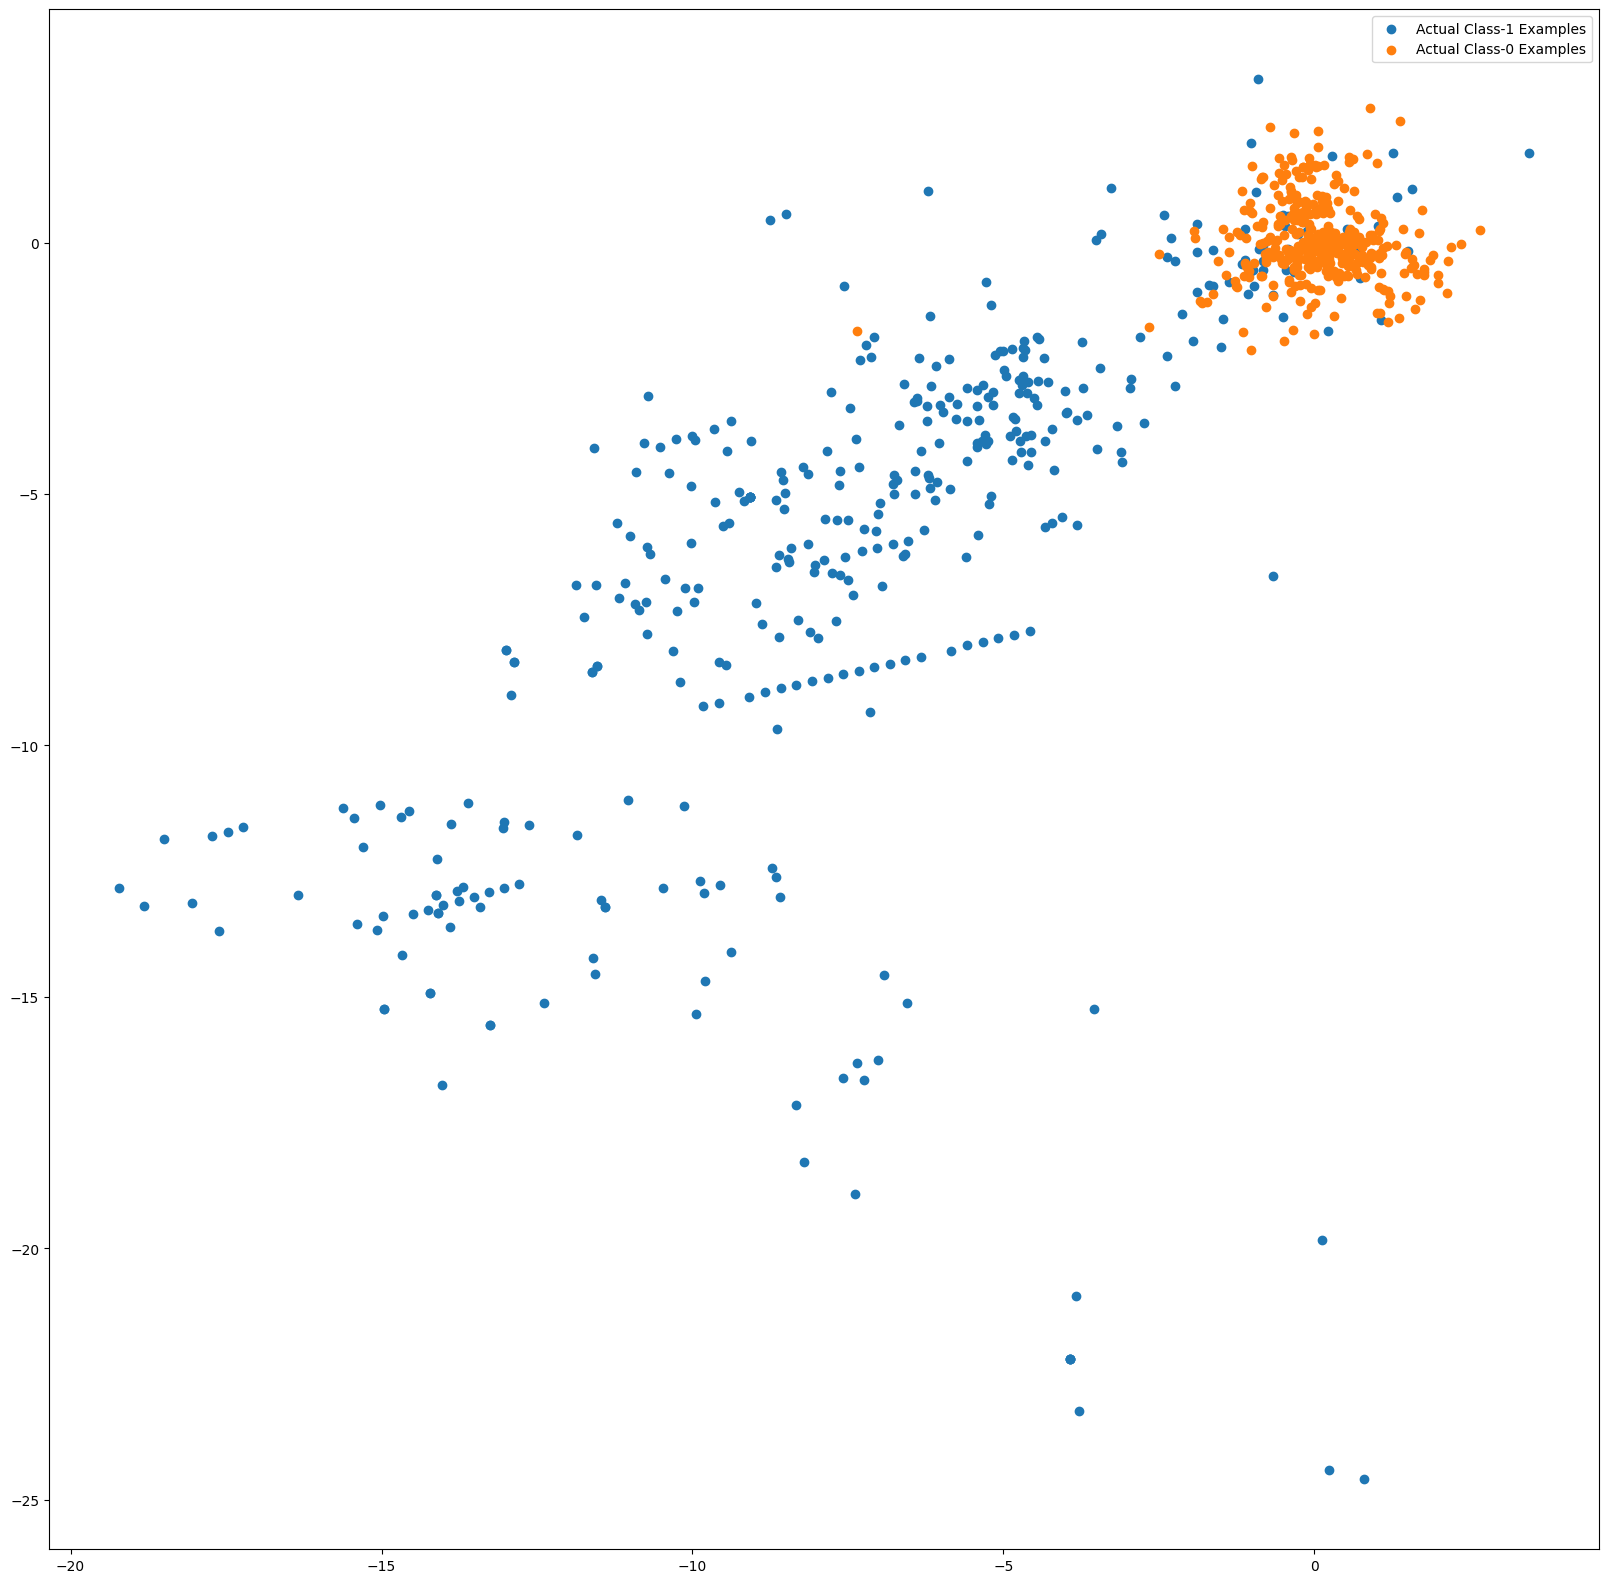

In [35]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [43]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9852138347557161
XGBoost threshold: 0.005087878089398146


# **Conclusion**
**Overall conclusion after running models on Oversampled data:**
Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results

We have selected XGBOOST model with Random Oversampling and StratifiedKFold CV

**Model Accuracy: 0.9993855444953564**

**XGboost roc_value: 0.9852138347557161**

XGBoost threshold: 0.005087878089398146

We also noticed by looking at the results Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.